Full FC Method plots -actively under development. Expected input is 15625 text files. One for each grid point containing 1k pseudo experiment results. My results will be saved at `/cluster/tufts/wongjiradlabnu/gen1_oscanalysis/SBNfitoutputs/FCResults`

In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate
from matplotlib import cm
from root_pandas import read_root
import scipy.stats
from matplotlib import gridspec
import matplotlib.lines as mlines
import ROOT
import scipy.stats
from matplotlib import gridspec
import matplotlib.lines as mlines
from scipy.stats import chi2
from scipy import interpolate
import pandas as pd
import math
import matplotlib.colors as colors
from os.path import exists
import pickle as pkl

Welcome to JupyROOT 6.16/00


Get the R_crit values from FC method

In [2]:
# initialize arr to fill
# set number of universes
num_uni= int(1000)

indices=[i for i in range(15625)]
# indices=[0]

# reformat indices to string format used to save files
for i in range(len(indices)):
    indices[i]=f'{indices[i]:05d}'

# -2lnL dicts for test point, bf from grid, and bf from min
RDict_pt = {}
RDict_min = {}

# loop through text files and save to dict
for k in indices:
#     print(k)
    filled=True
    pT_list=[]
    min_list=[]
    if exists("FCResults/chis_seek_"+k+".txt"):
        with open("FCResults/chis_seek_"+k+".txt","r") as chi:
            lines = chi.readlines()
            if(len(lines)<2000):
                print(k,len(lines))
            for i in range(int(len(lines)/2)):
                lines[i*2].strip() #pt
                lines[i*2+1].strip() #min

                vals0 = lines[i*2].split(" ")
                vals1 = lines[i*2+1].split(" ")

                for j in range(len(vals0)):
                    pT_list.append(float(vals0[j]))
                for j in range(len(vals1)):
                    min_list.append(float(vals1[j]))
    else: #default to wilks theorem for now if job failed
        for j in range(num_uni):
            min_list.append(float(6.25))
        for j in range(num_uni):
            pT_list.append(float(6.25))


#     save to dictionary        
    RDict_pt[k] = pT_list
    RDict_min[k] = min_list
    

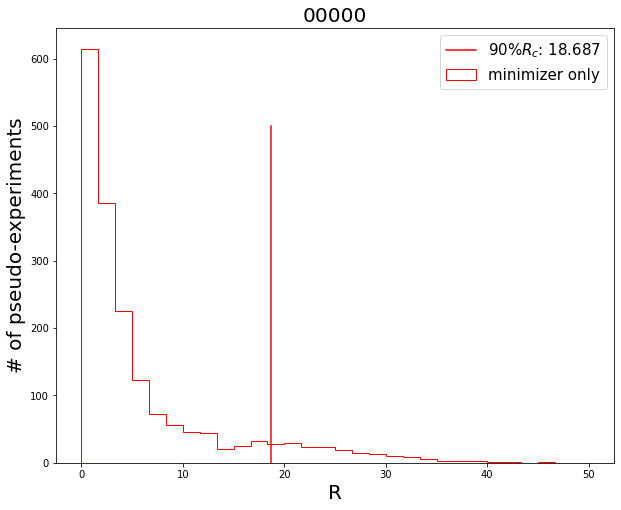

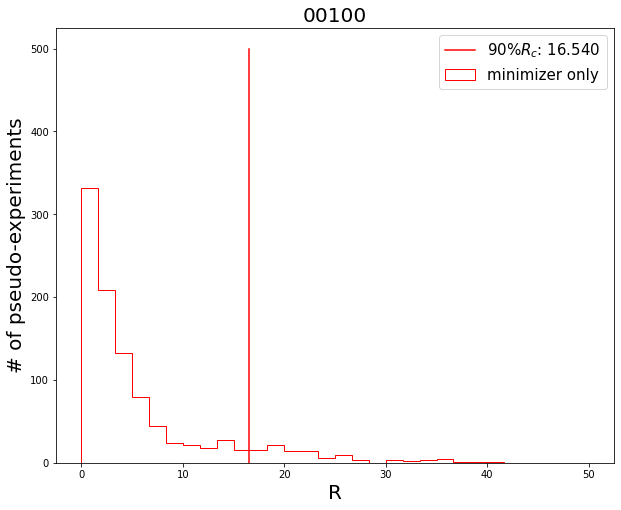

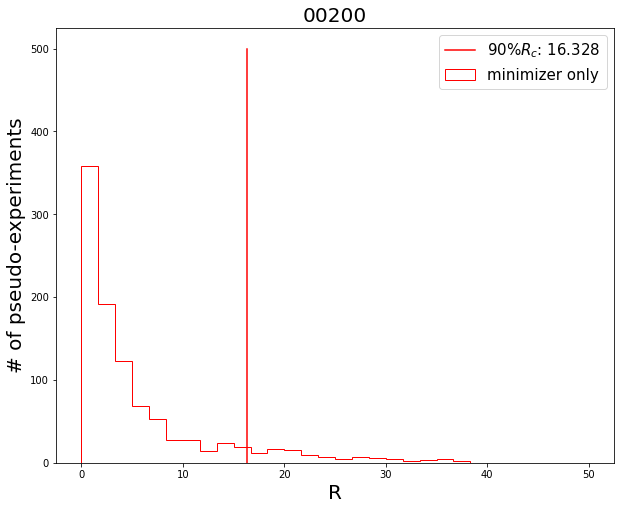

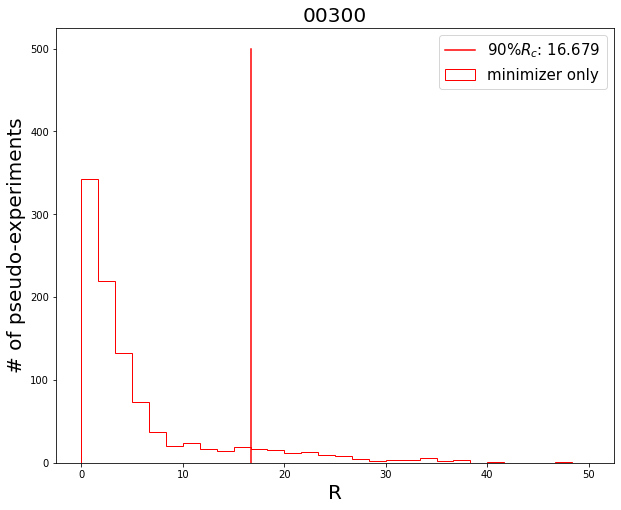

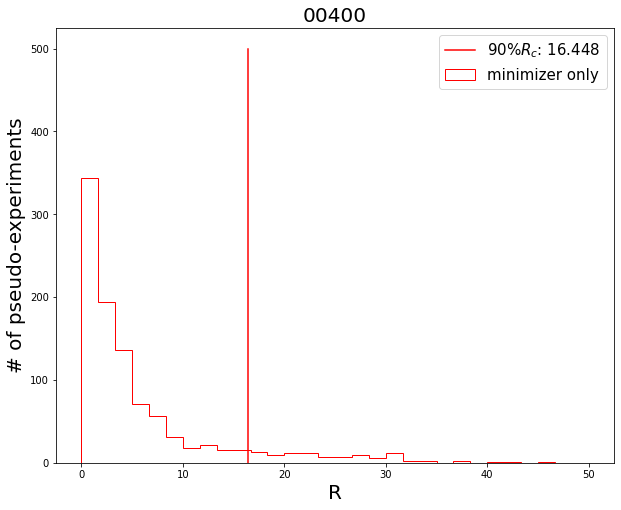

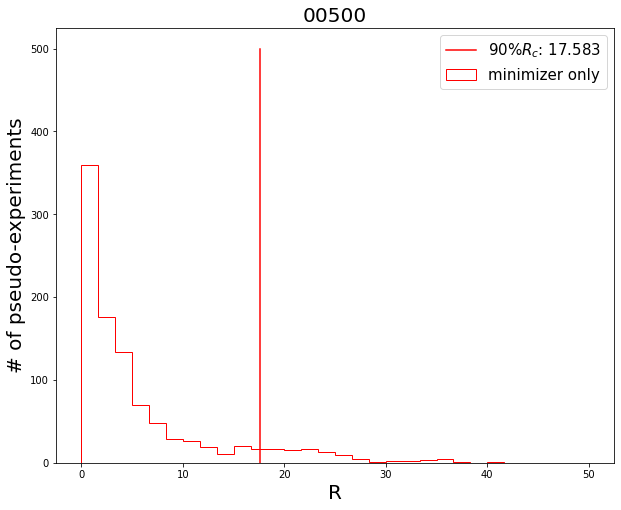

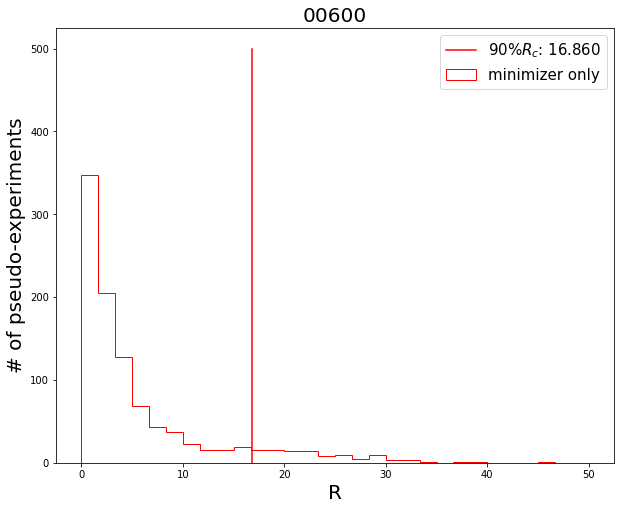

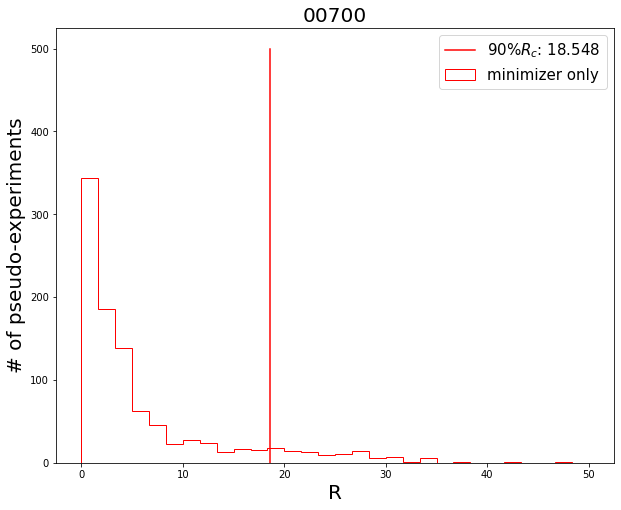

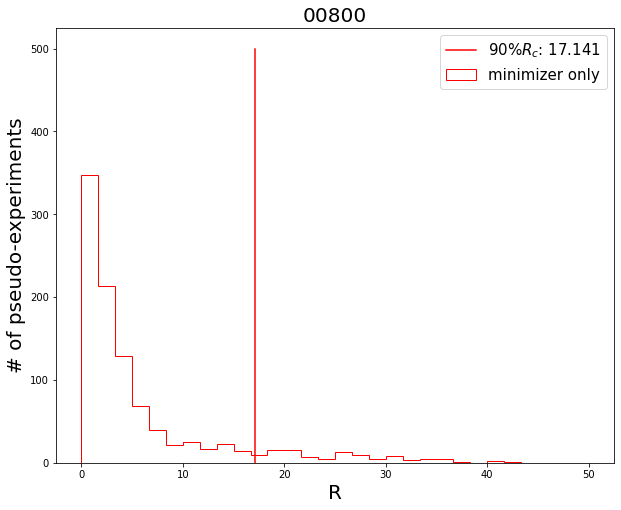

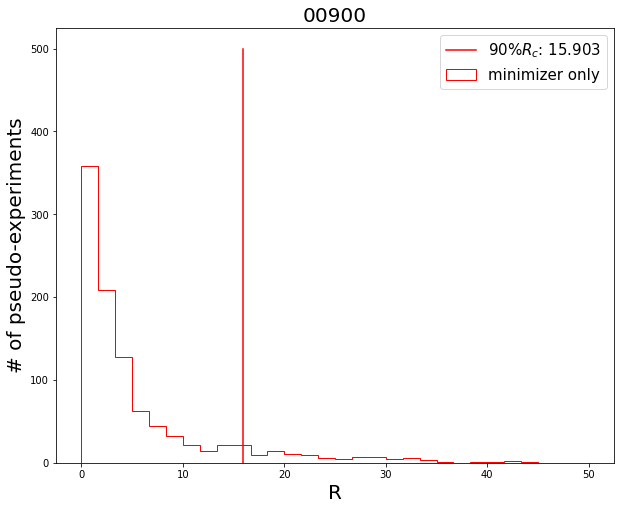

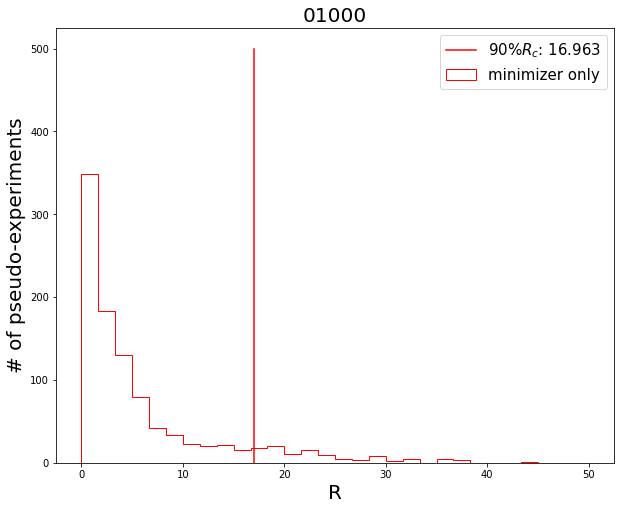

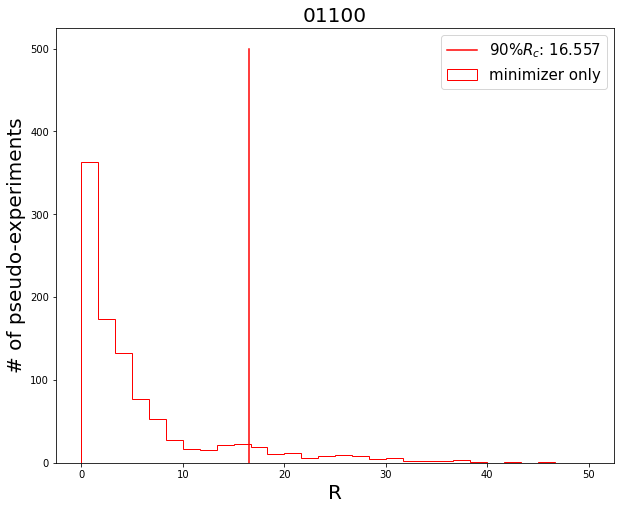

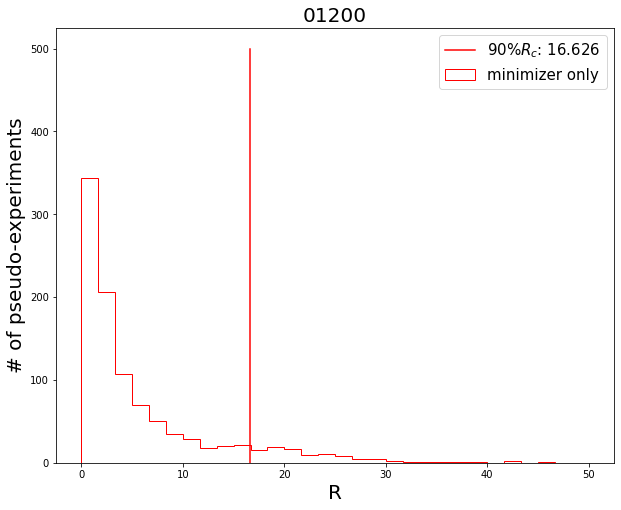

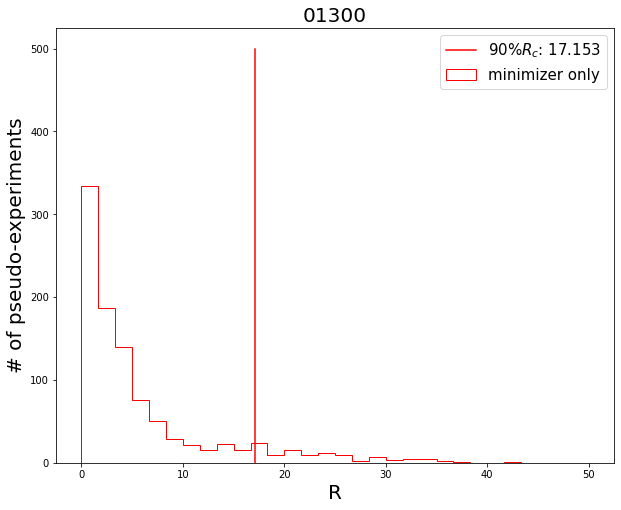

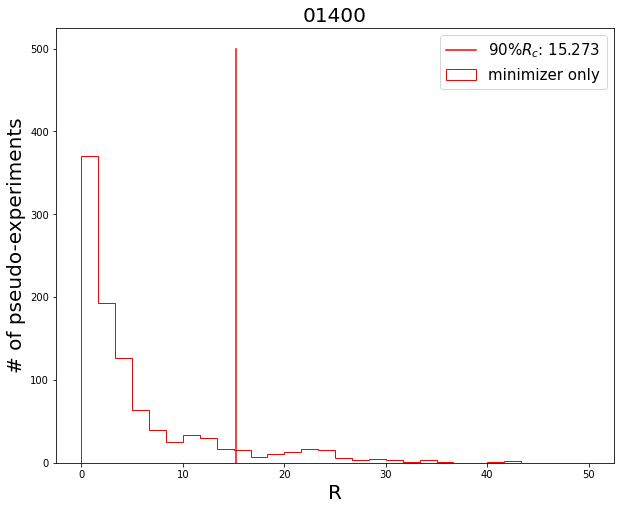

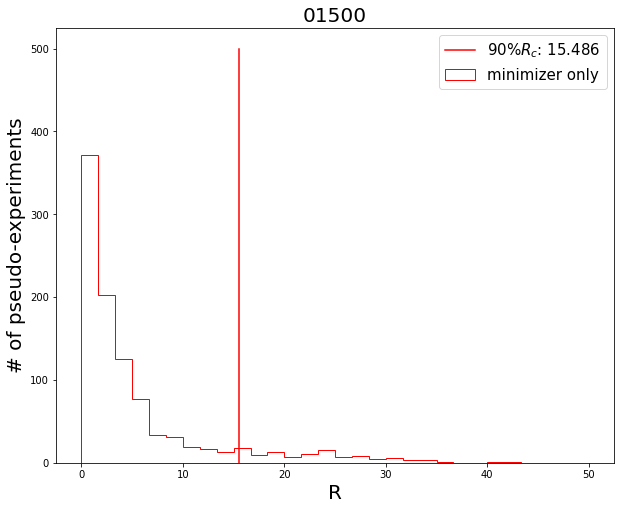

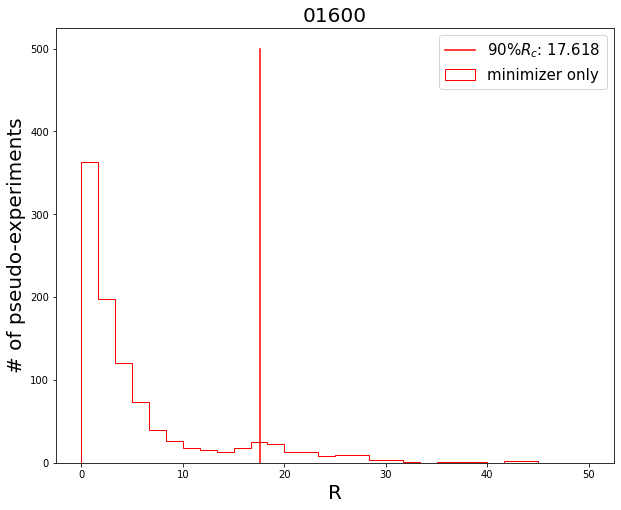

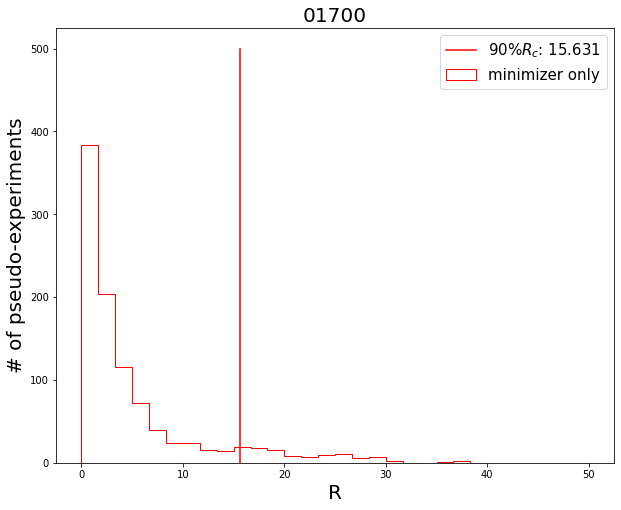

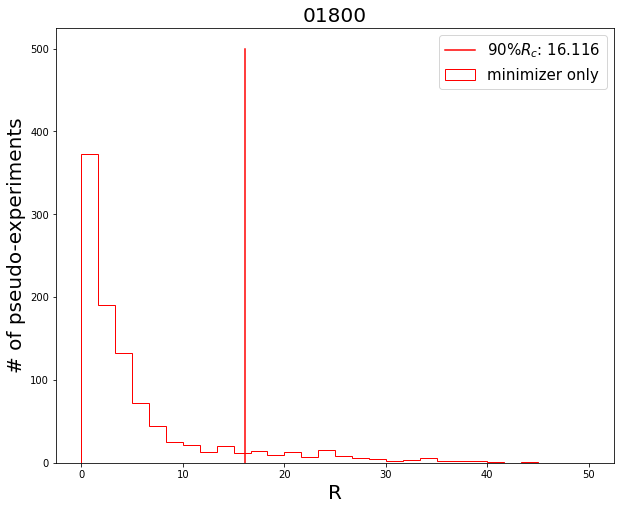

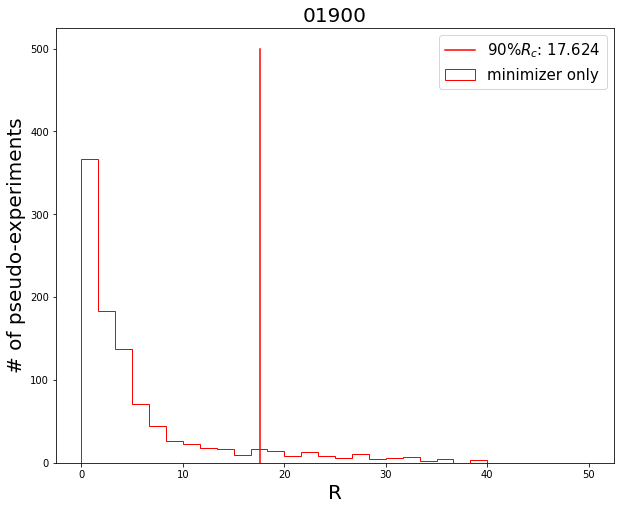

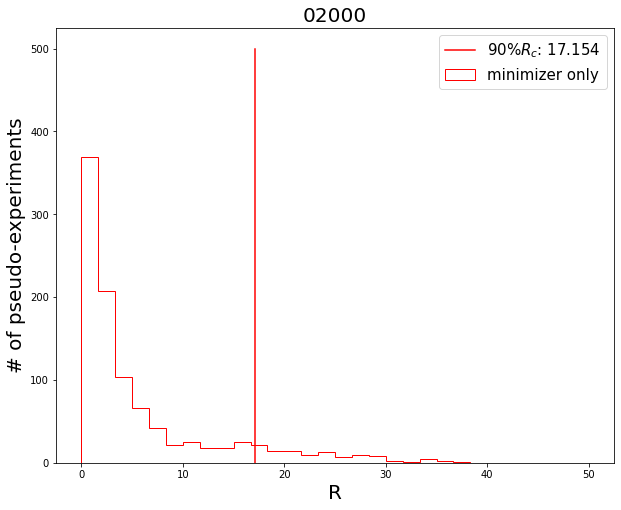

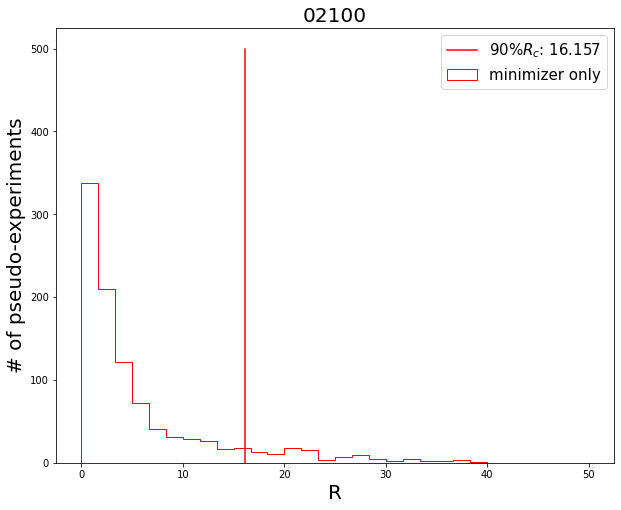

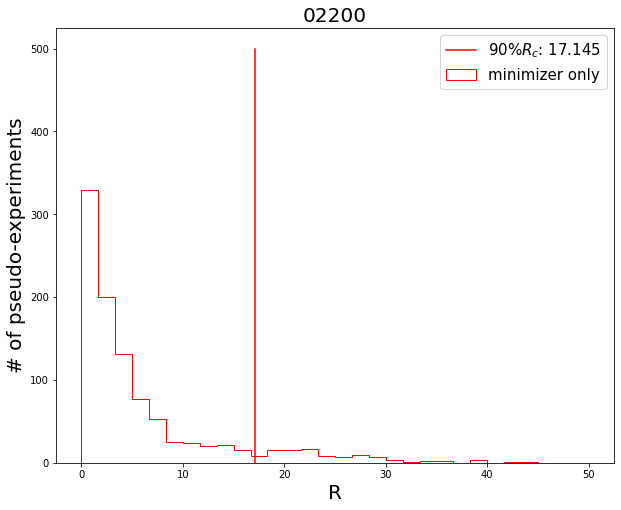

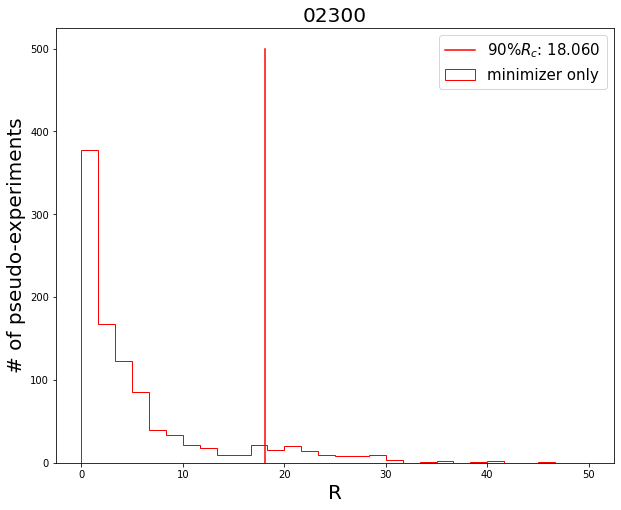

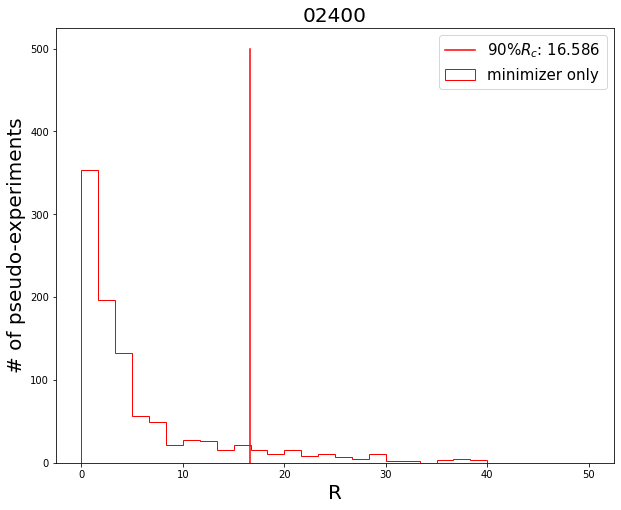

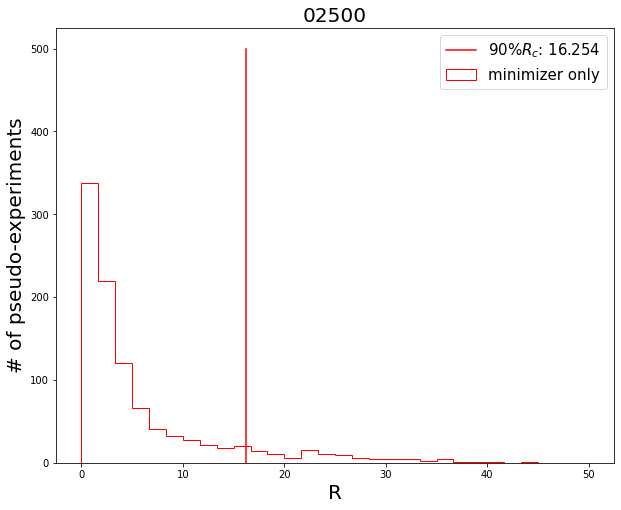

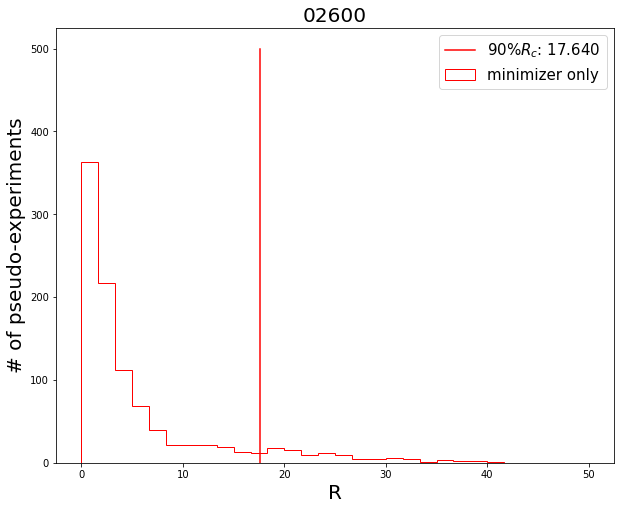

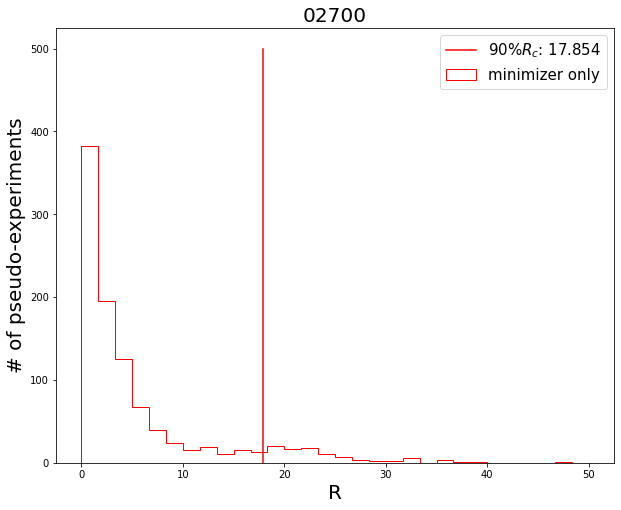

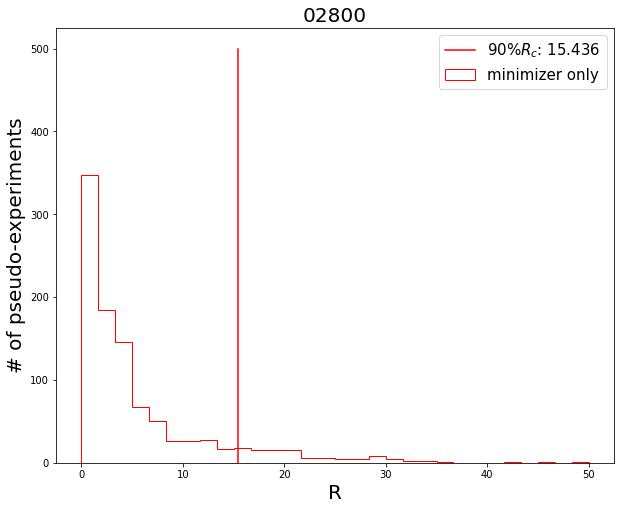

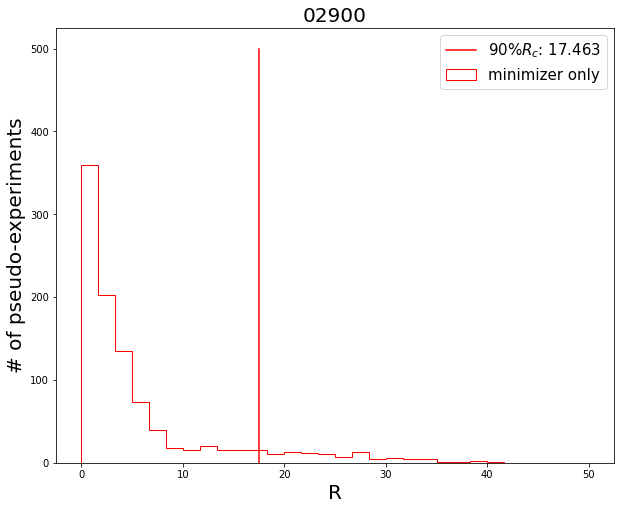

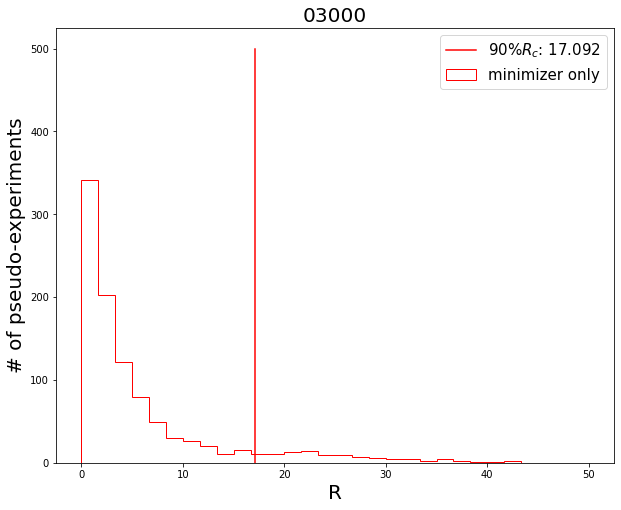

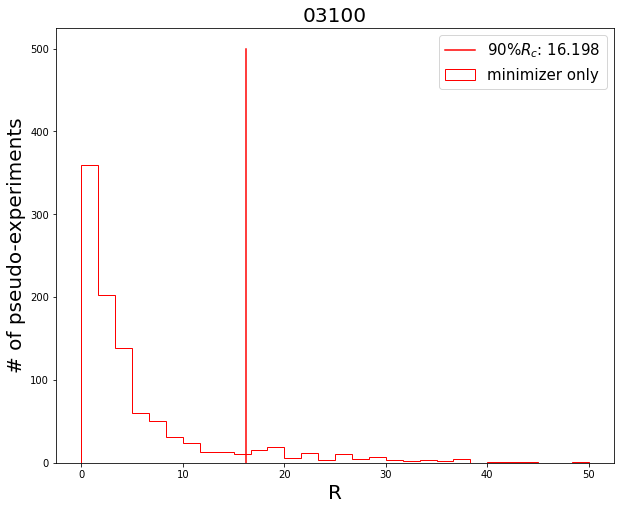

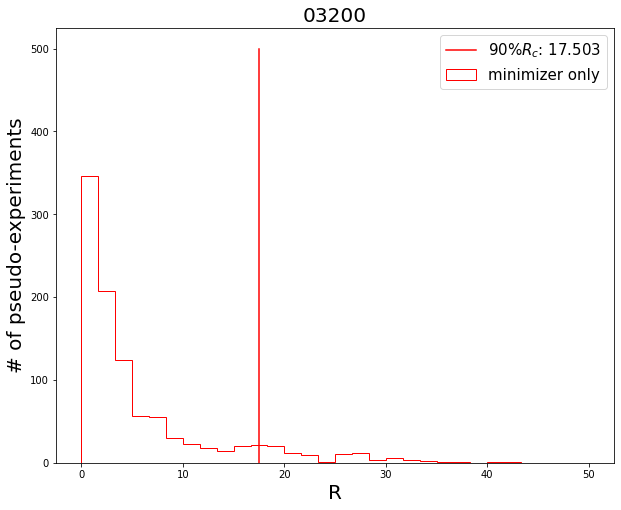

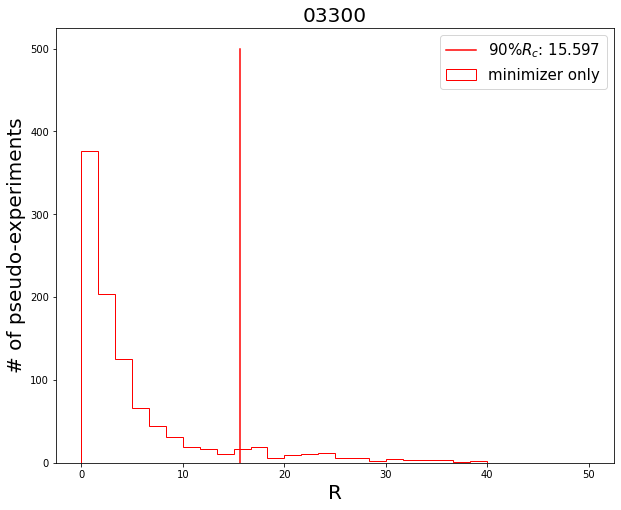

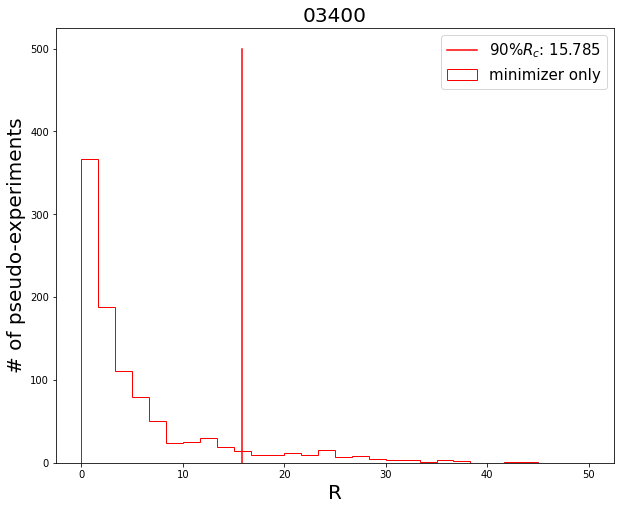

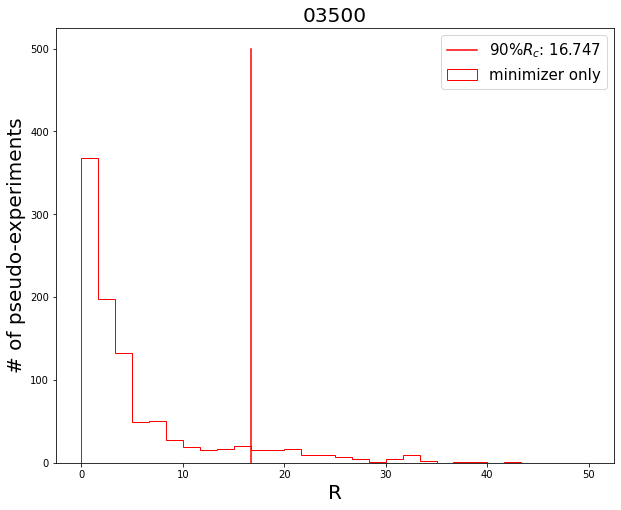

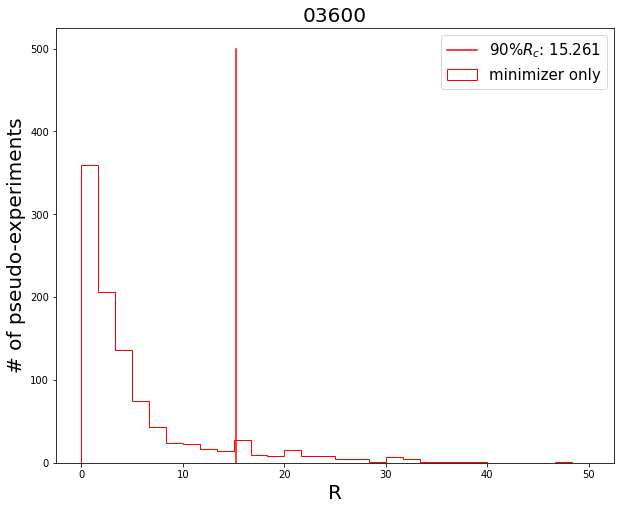

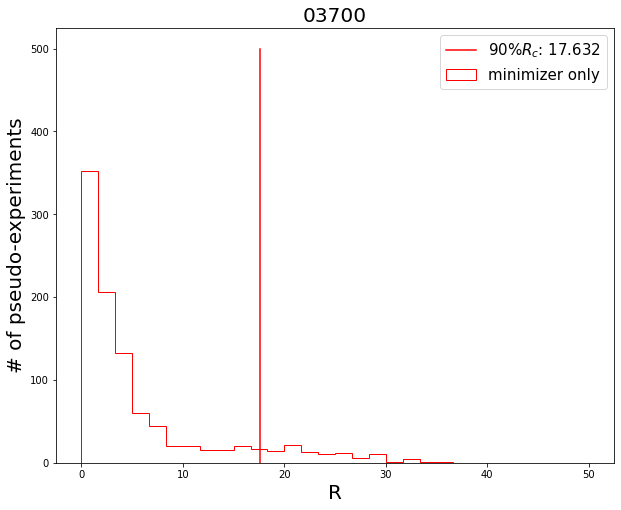

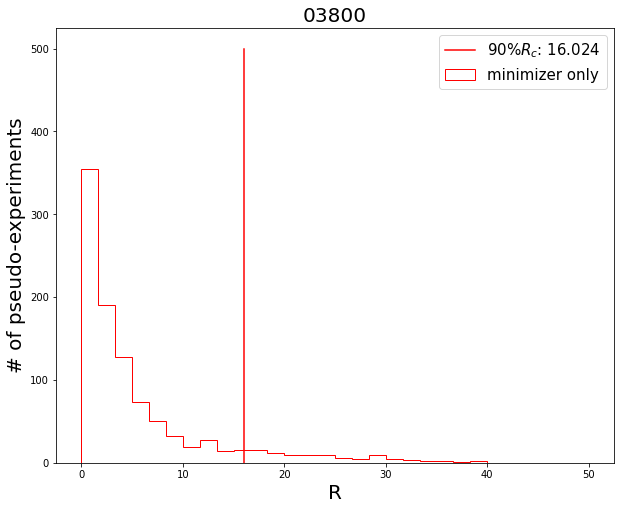

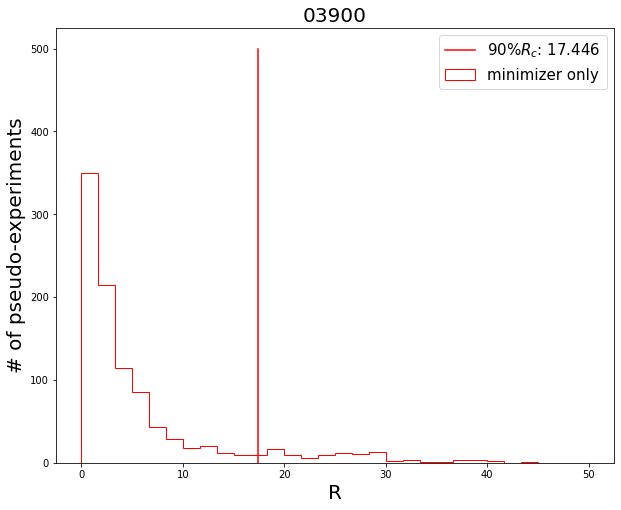

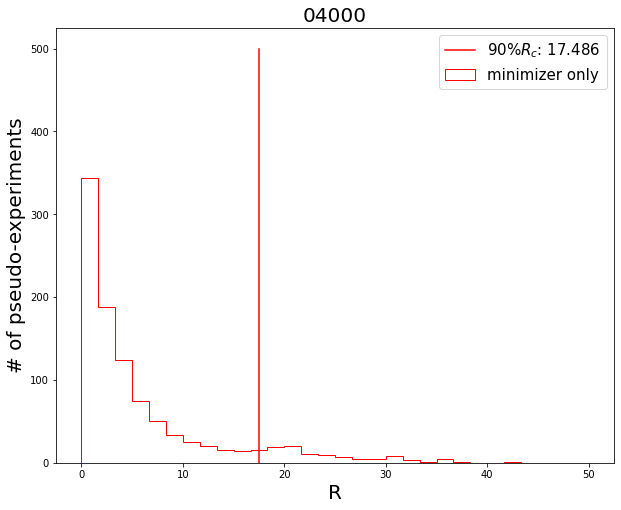

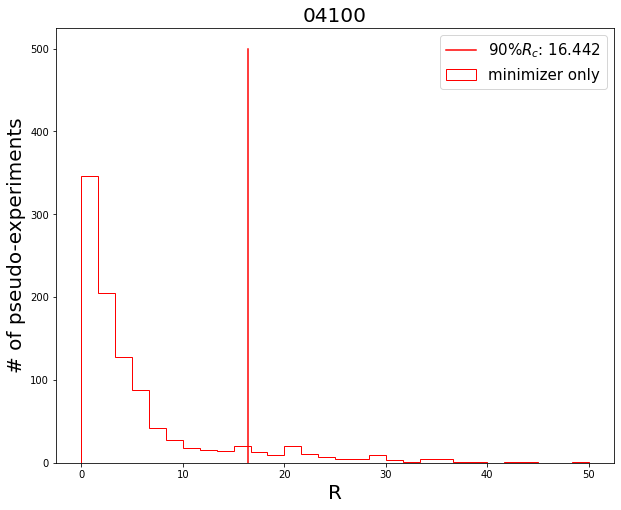

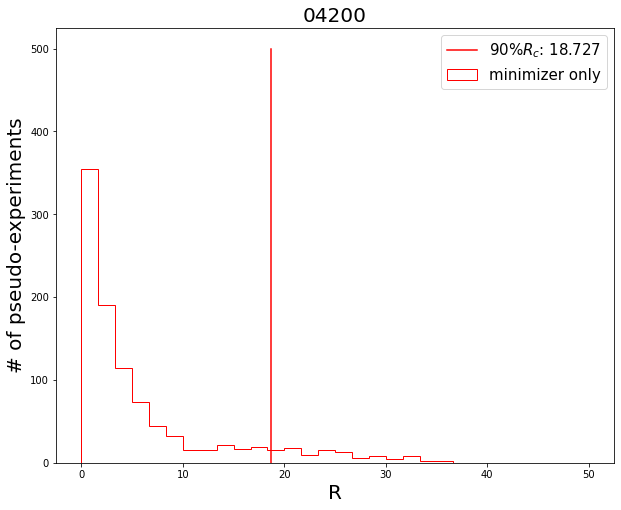

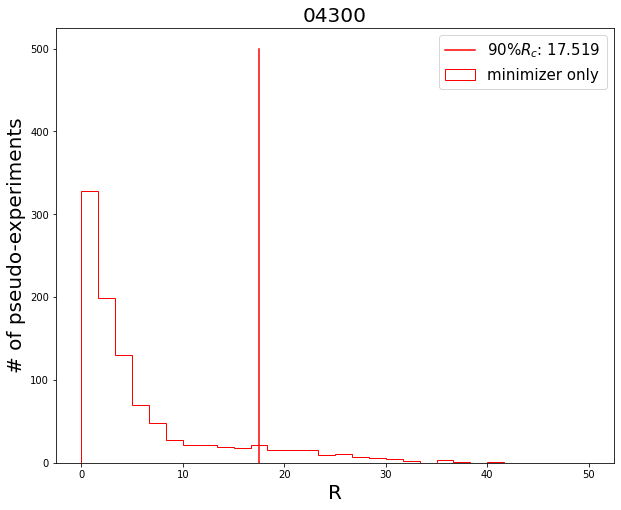

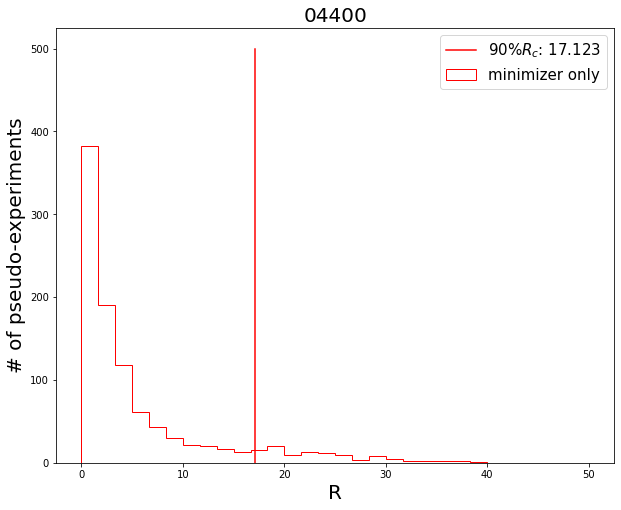

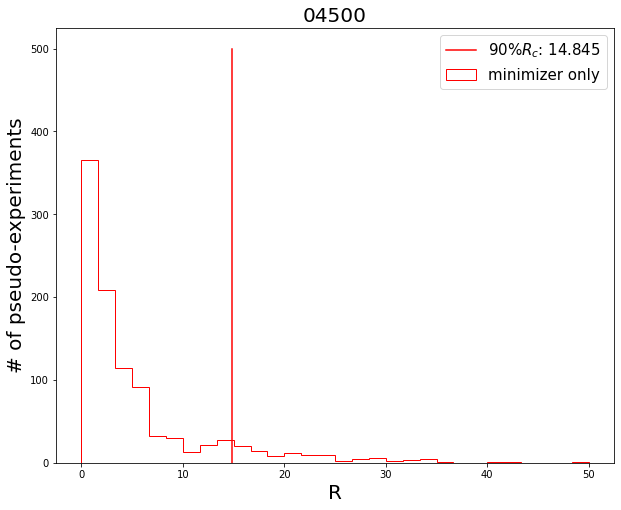

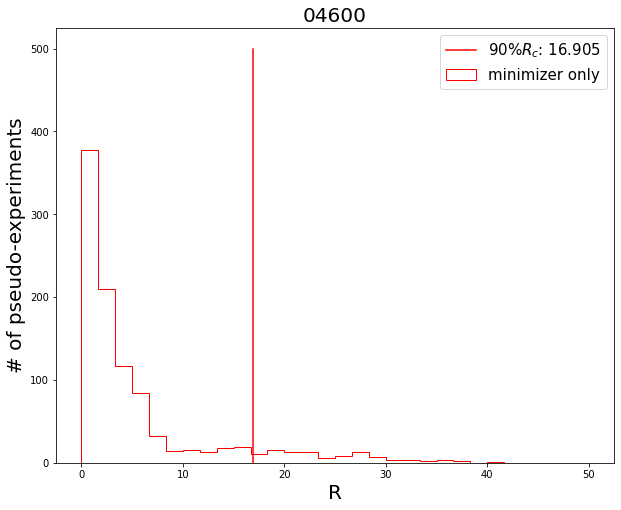

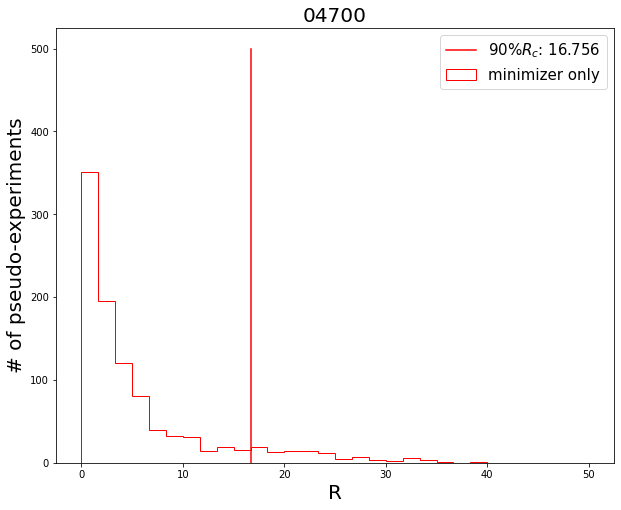

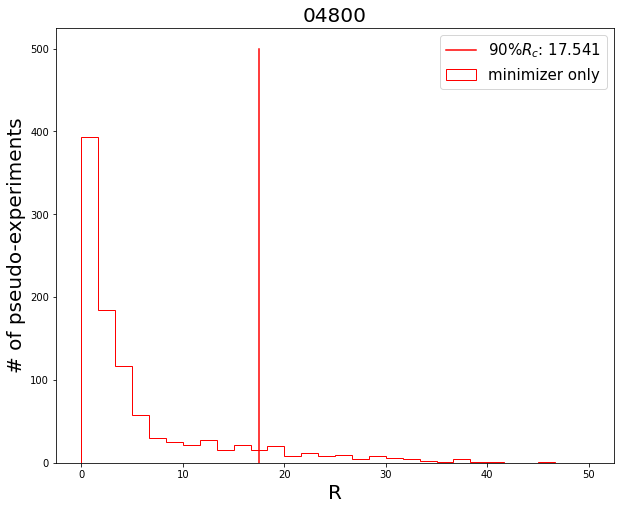

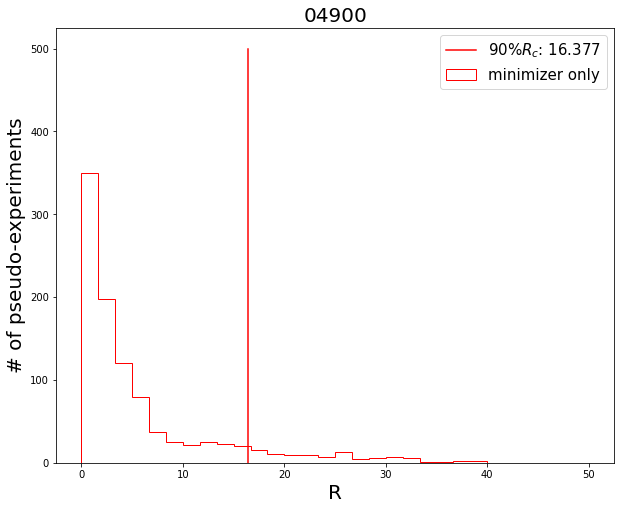

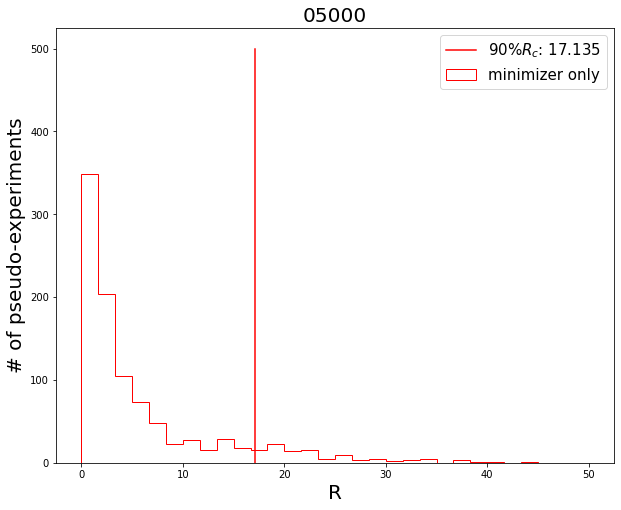

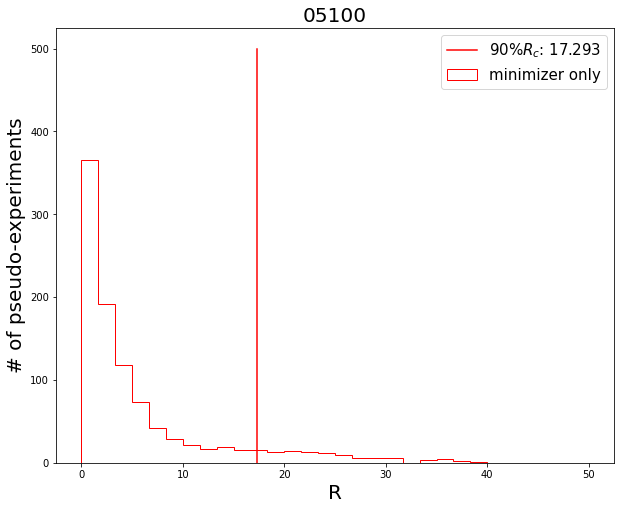

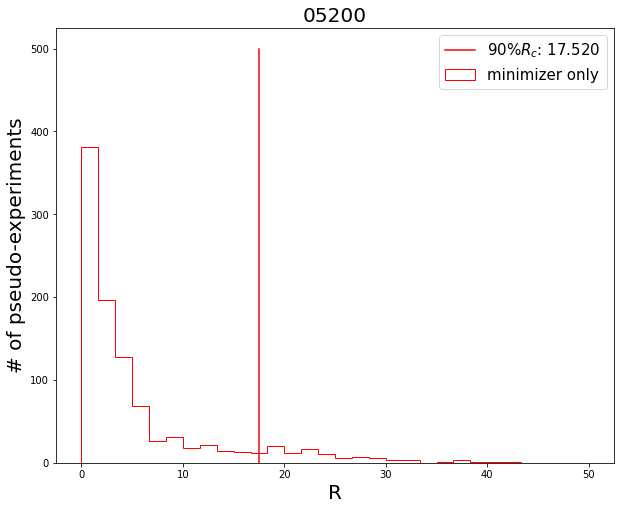

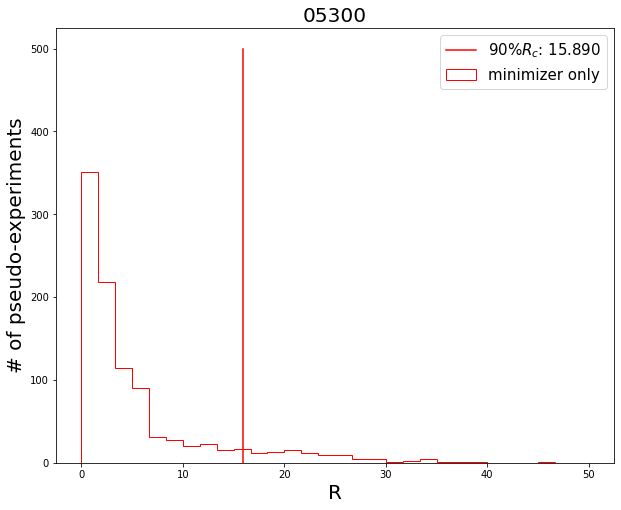

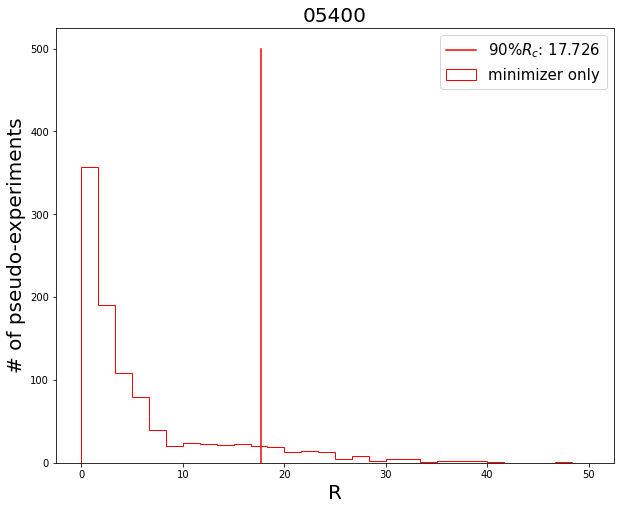

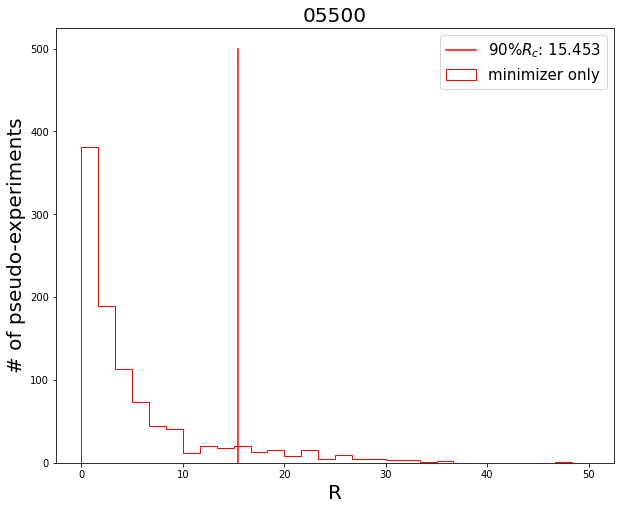

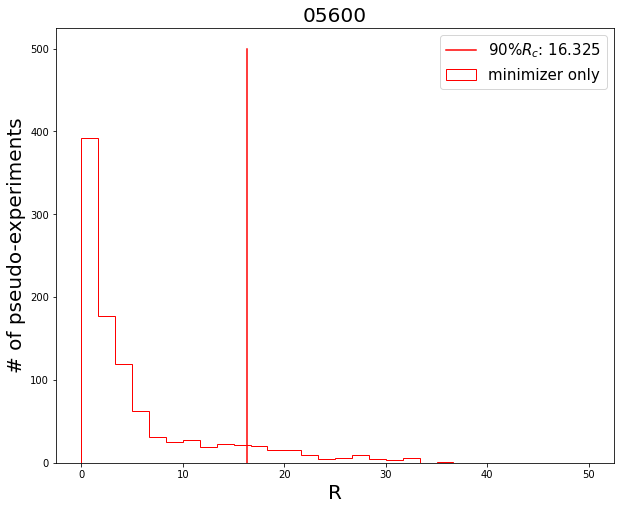

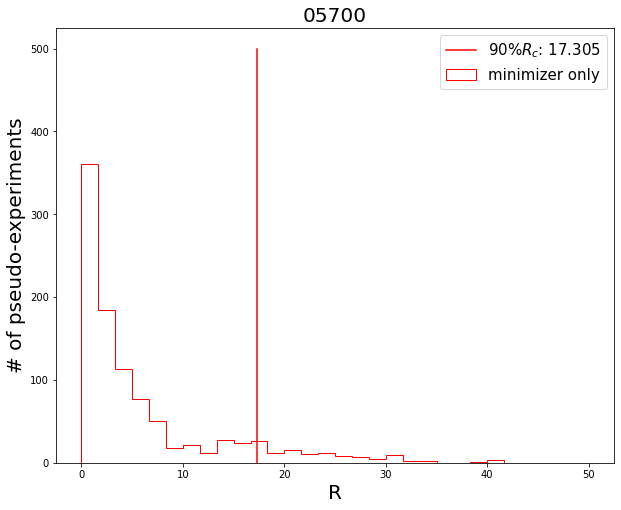

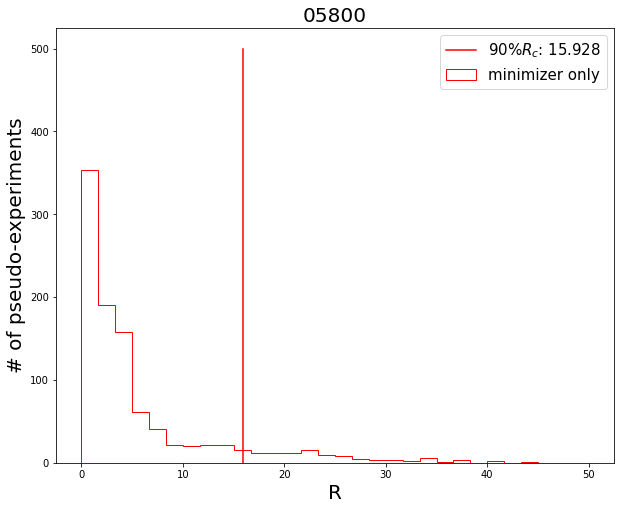

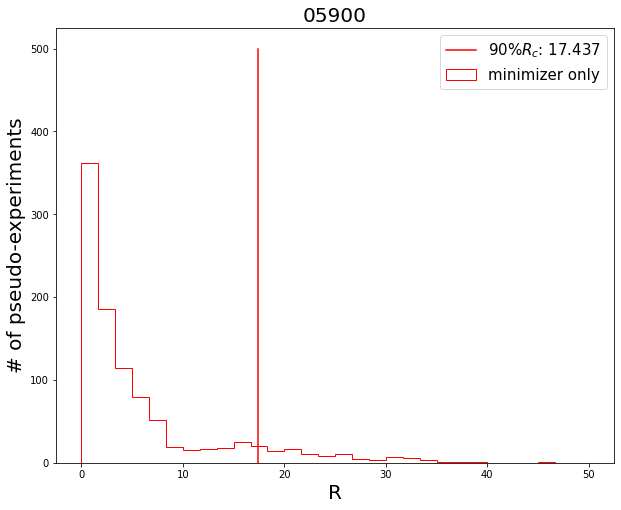

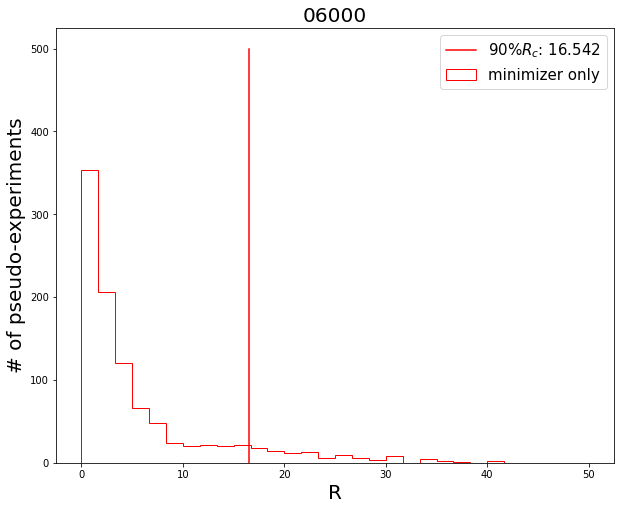

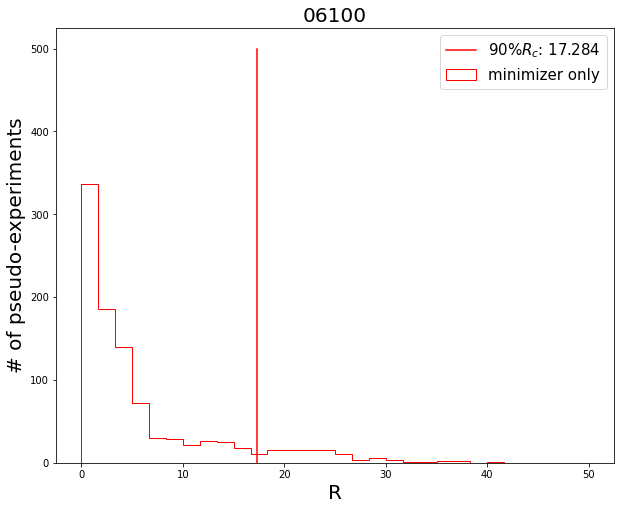

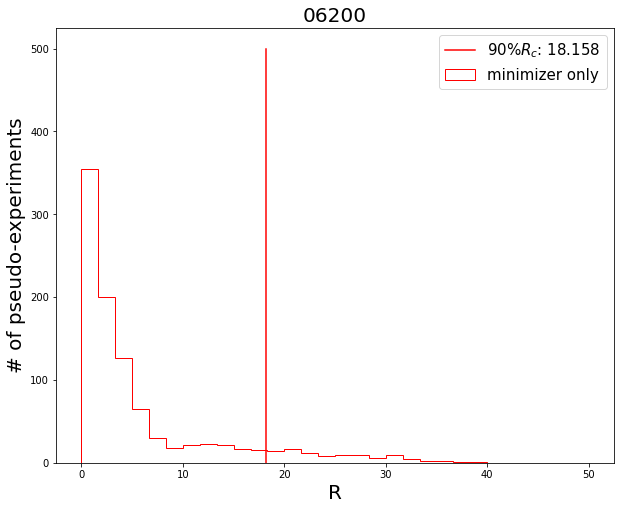

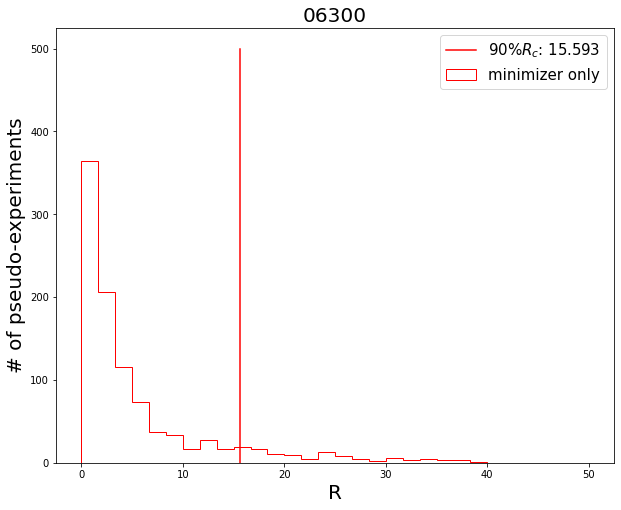

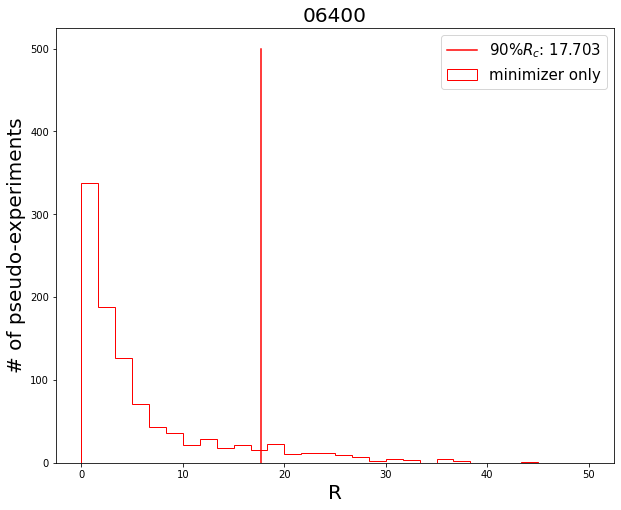

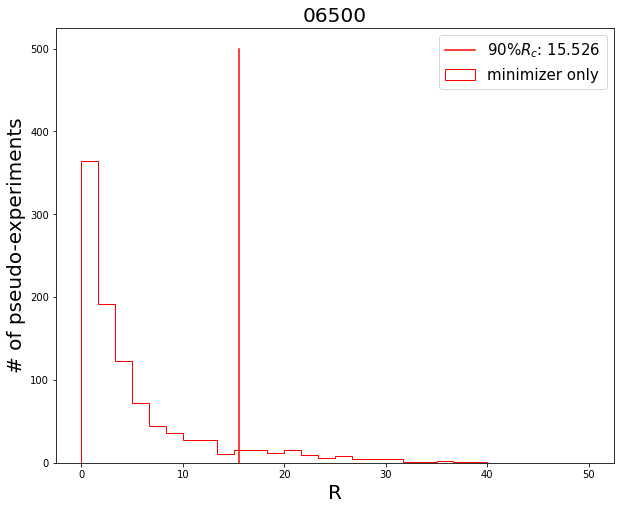

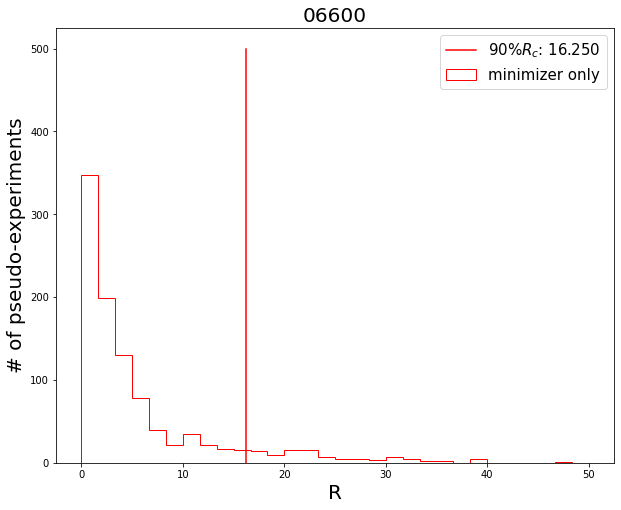

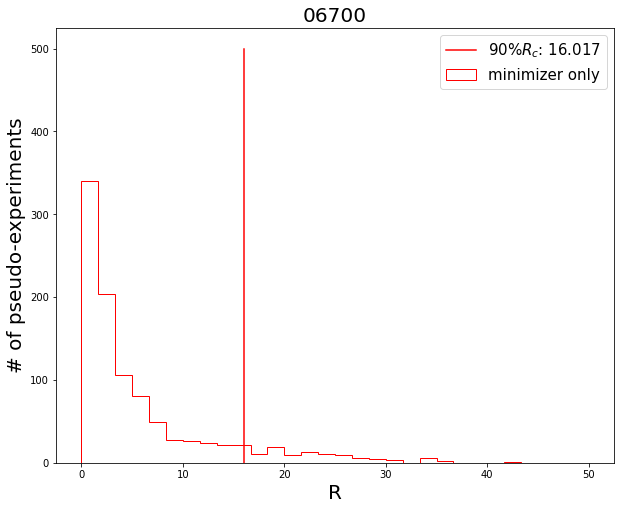

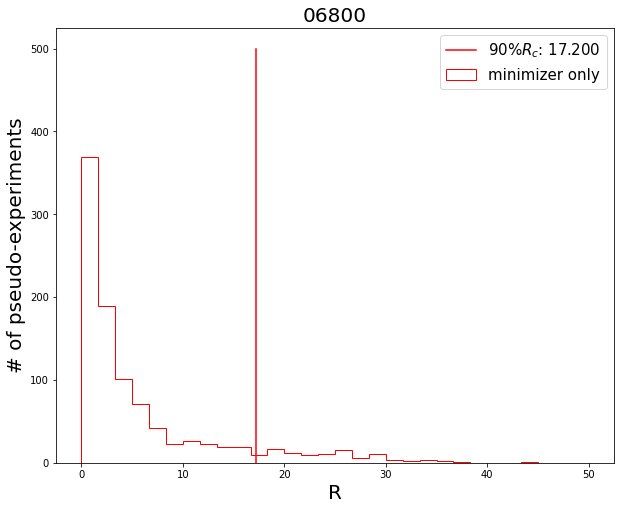

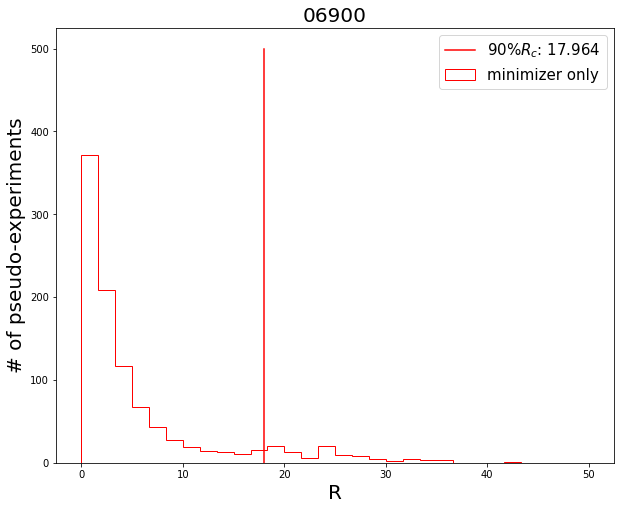

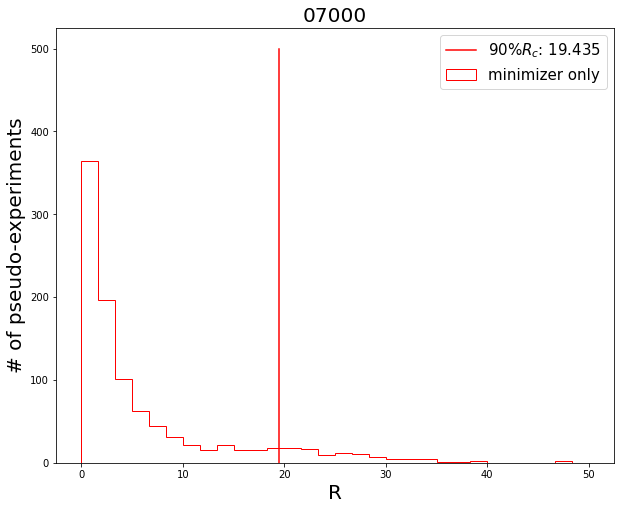

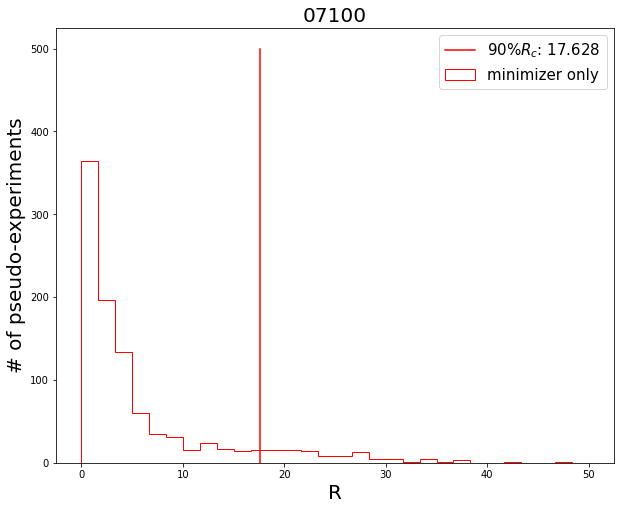

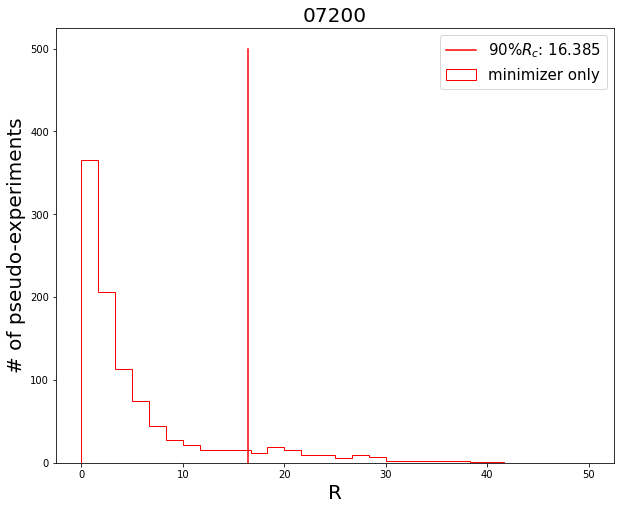

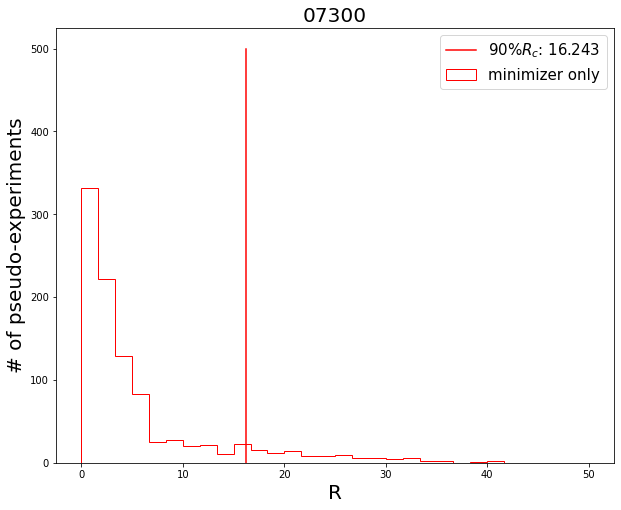

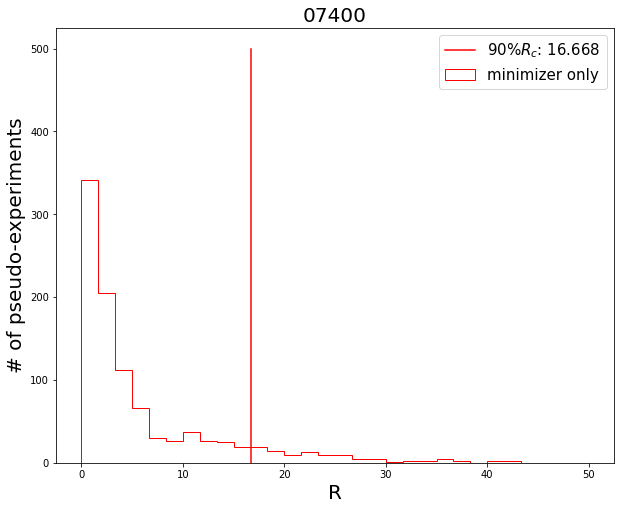

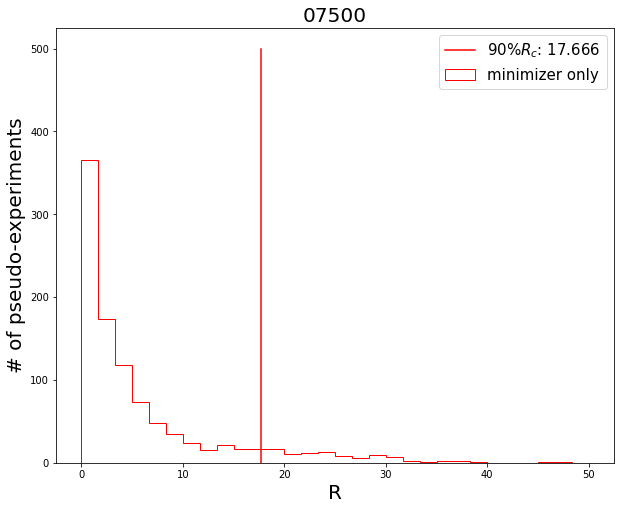

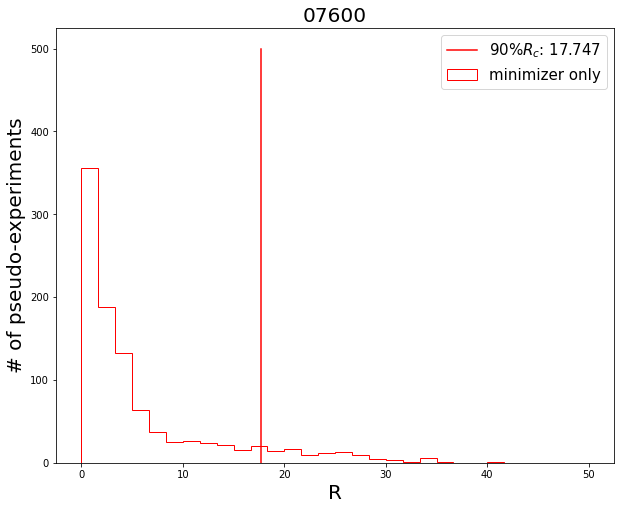

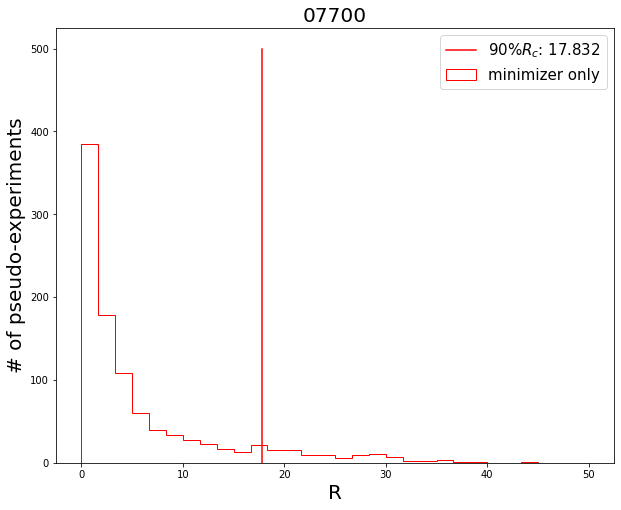

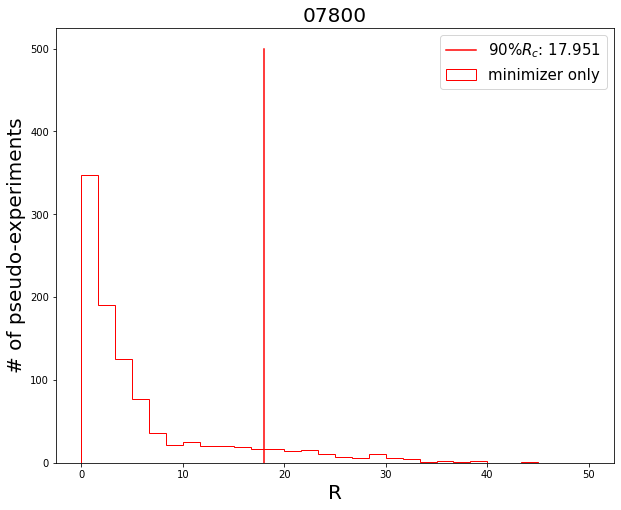

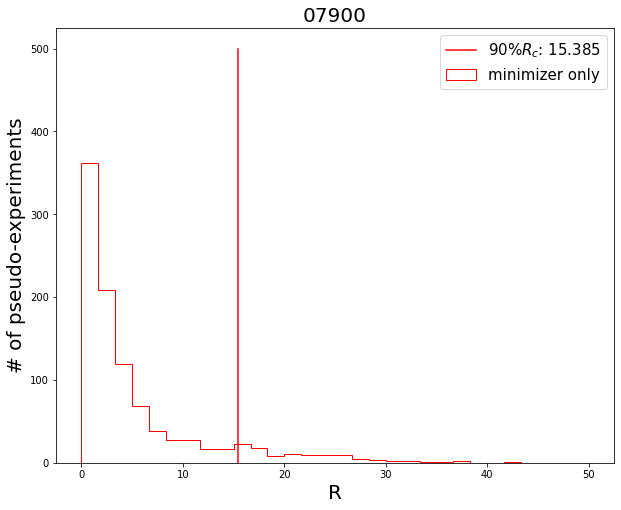

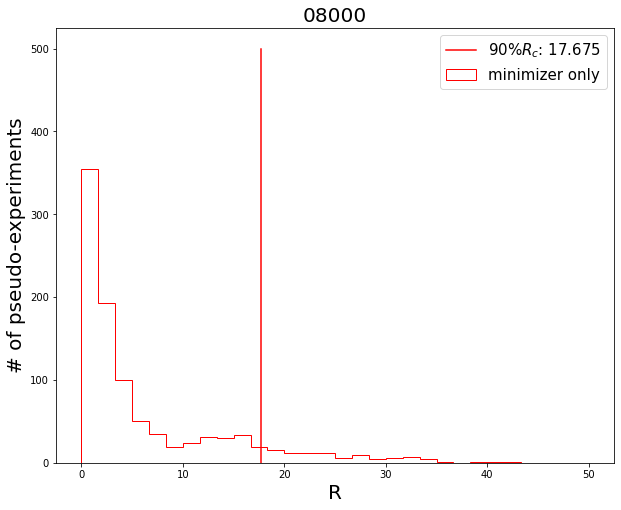

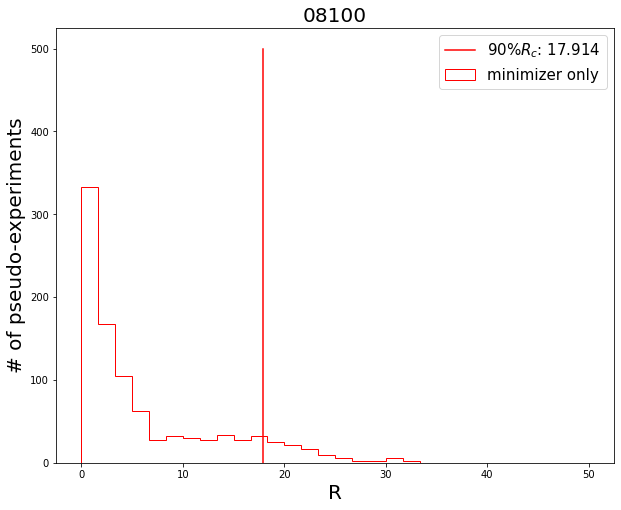

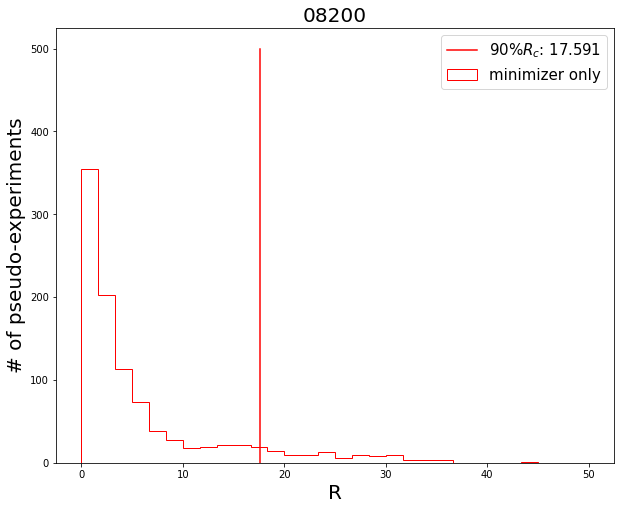

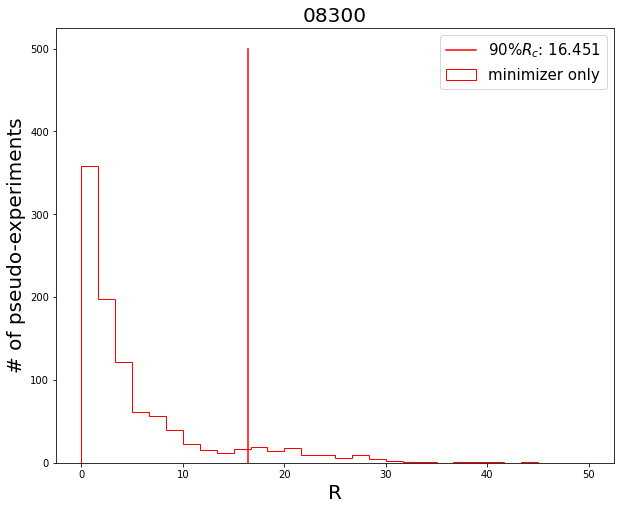

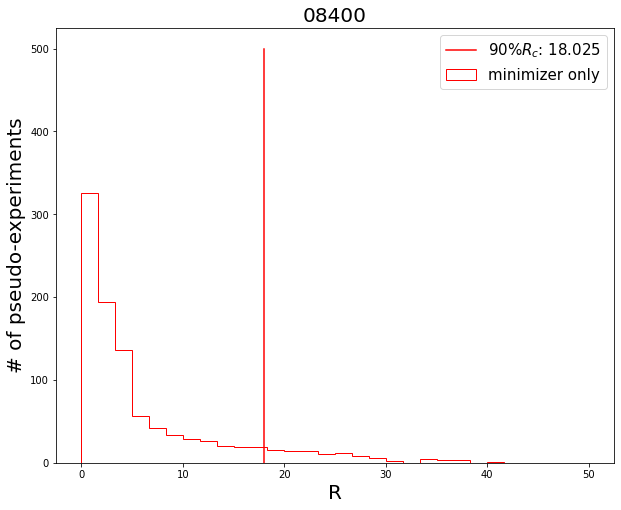

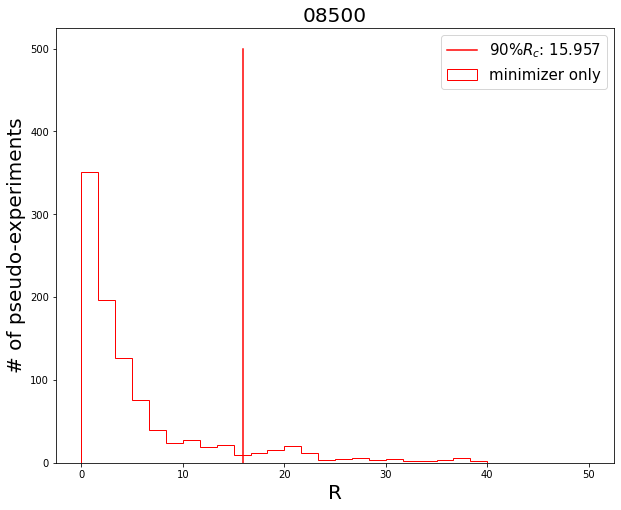

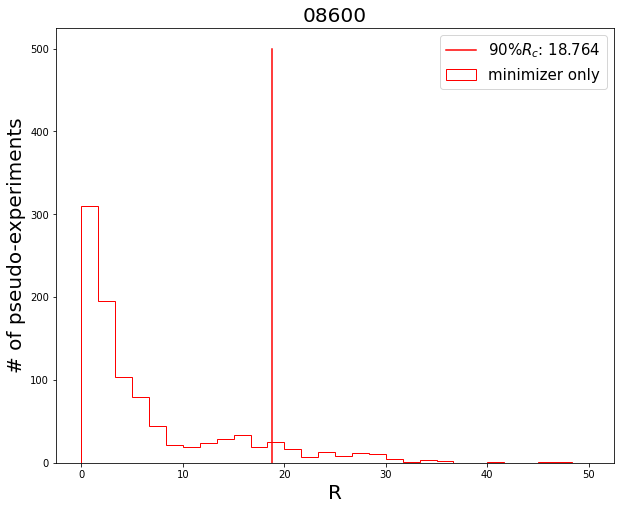

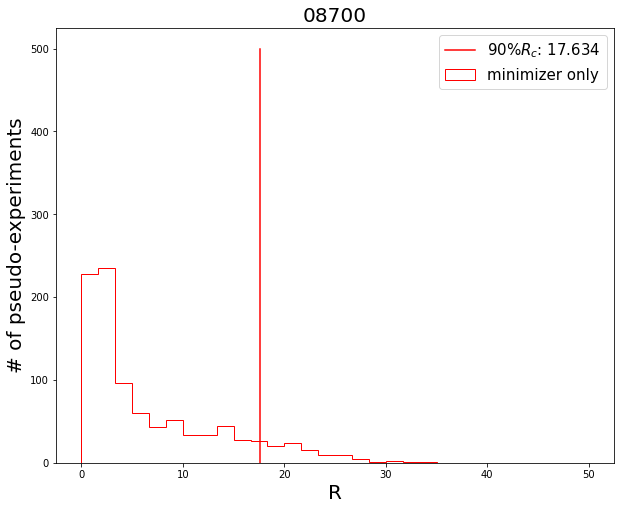

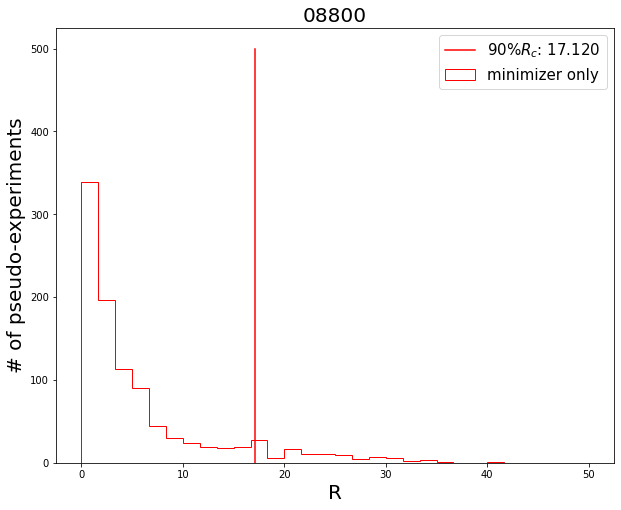

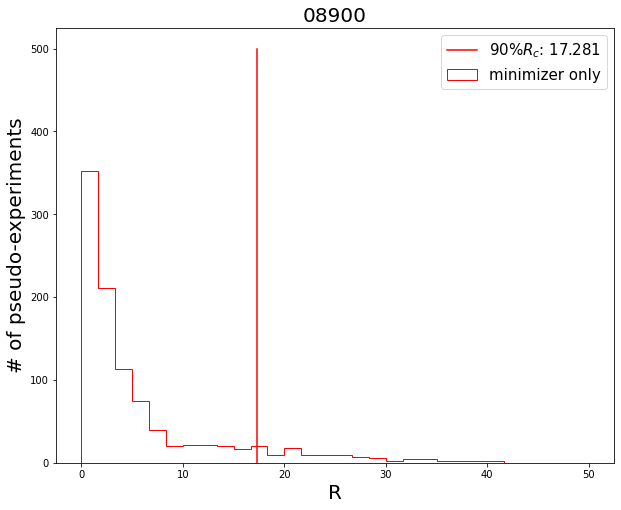

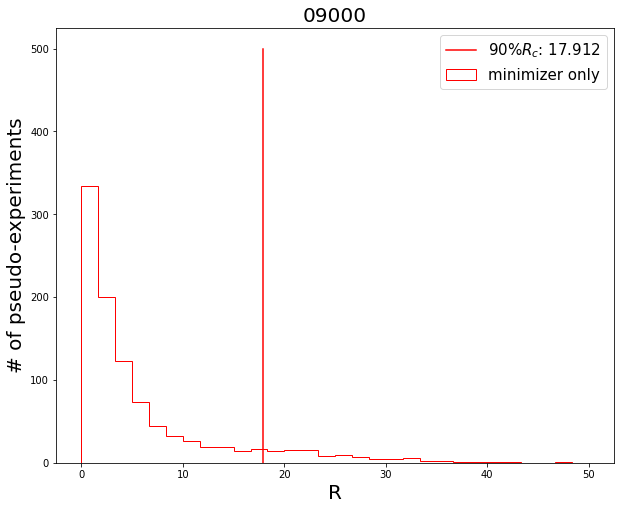

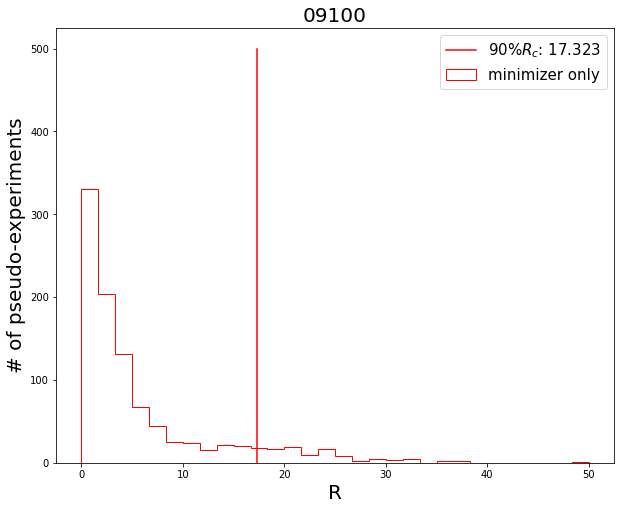

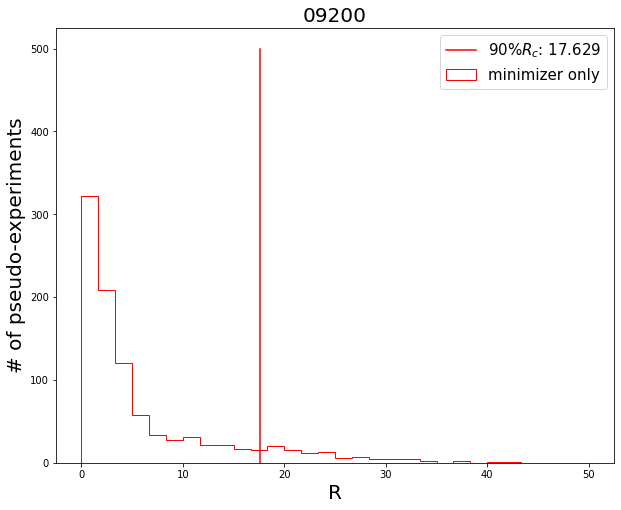

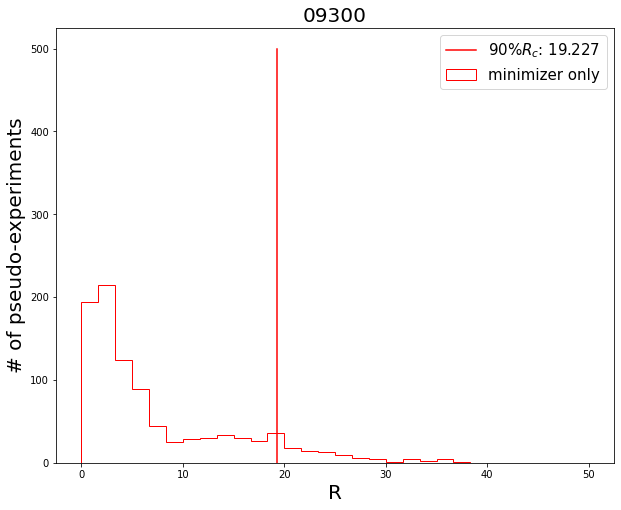

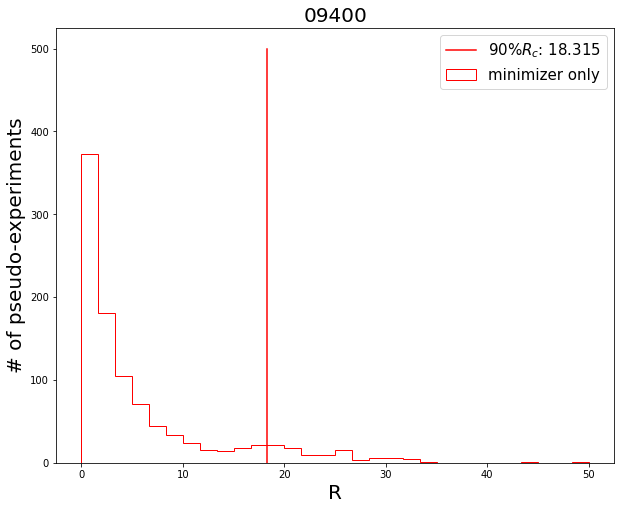

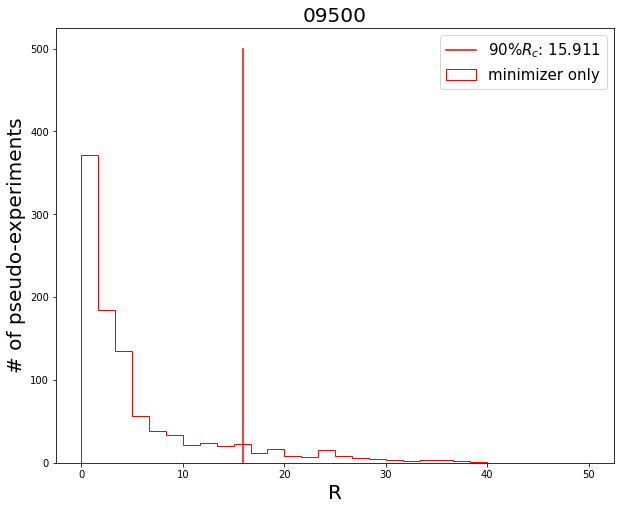

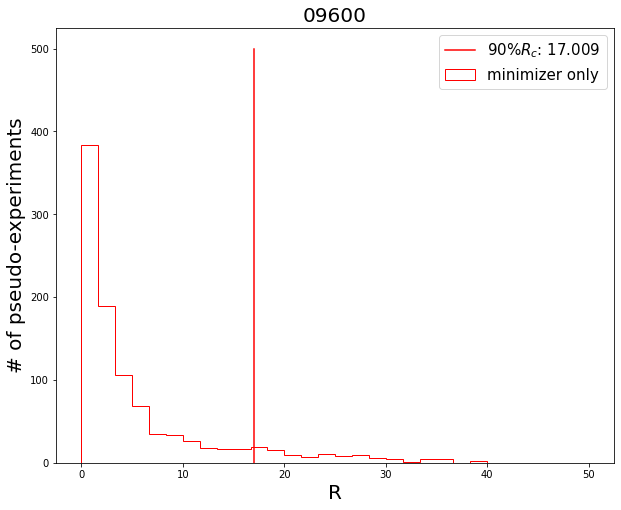

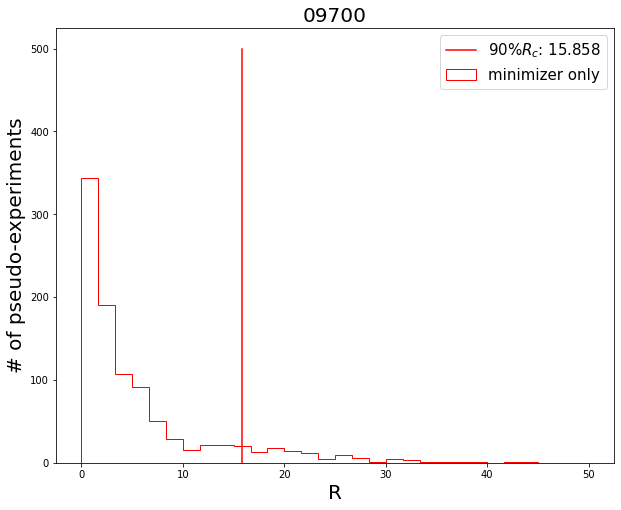

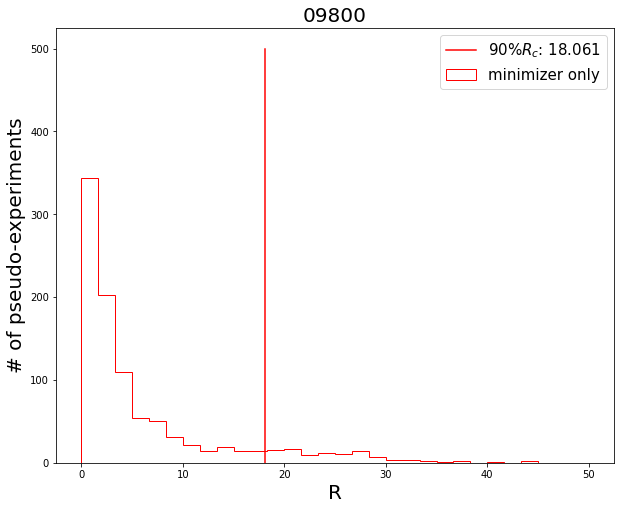

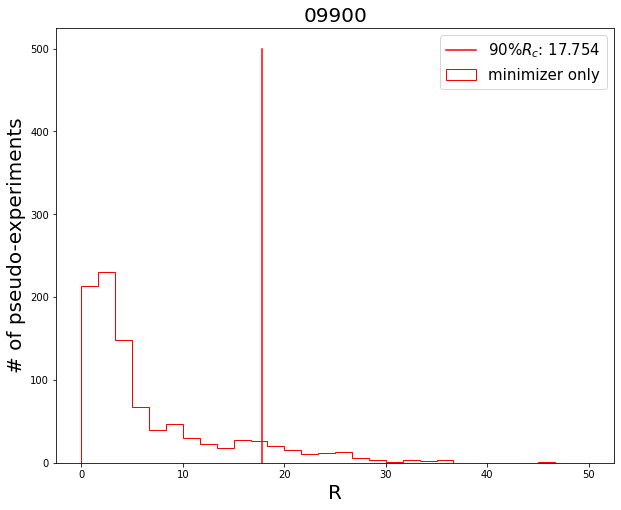

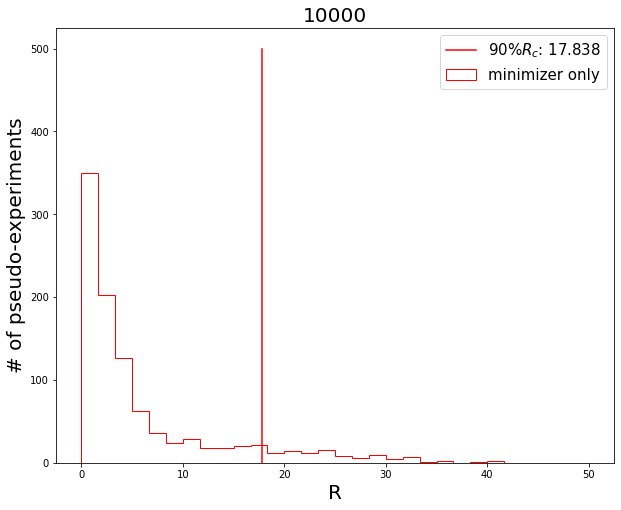

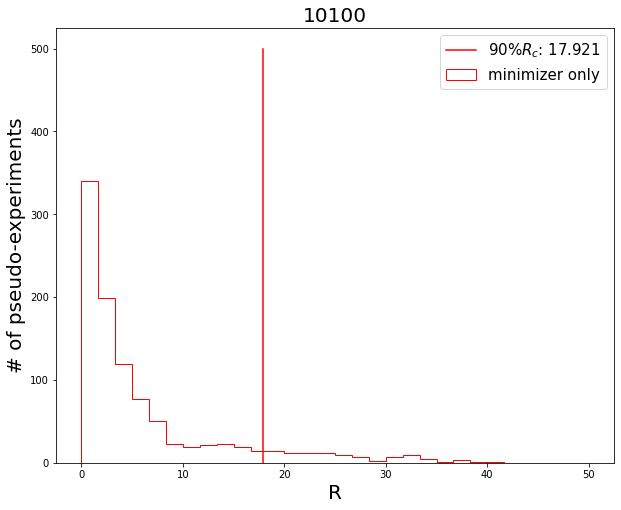

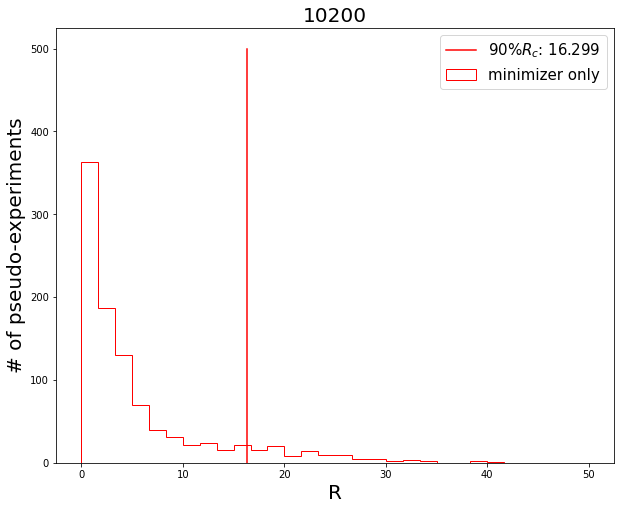

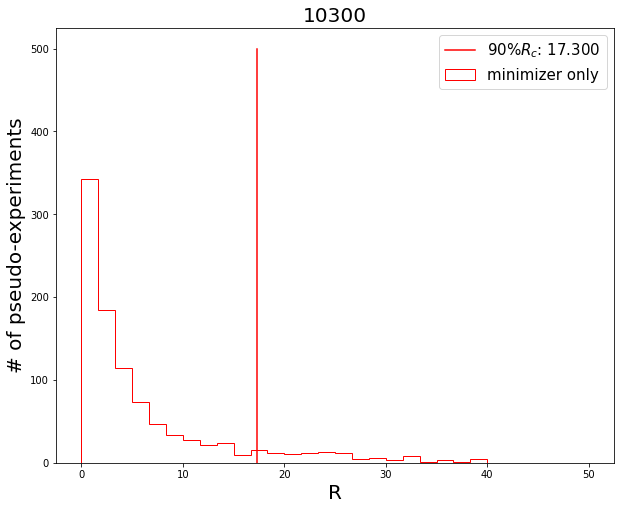

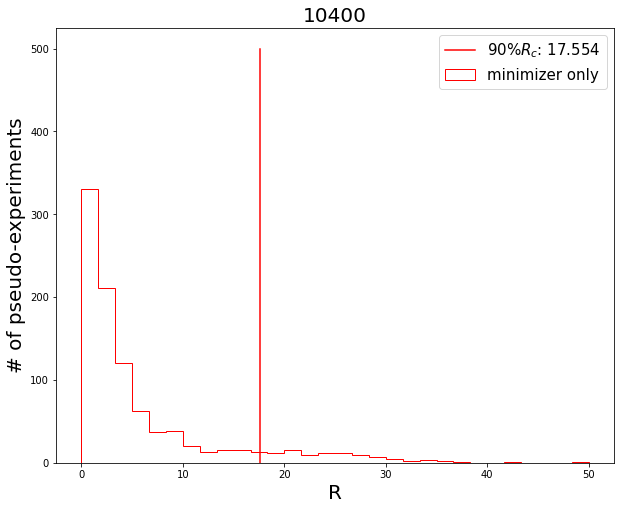

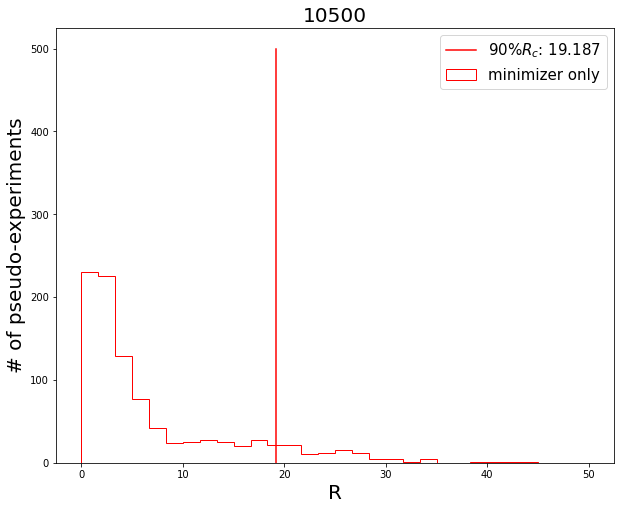

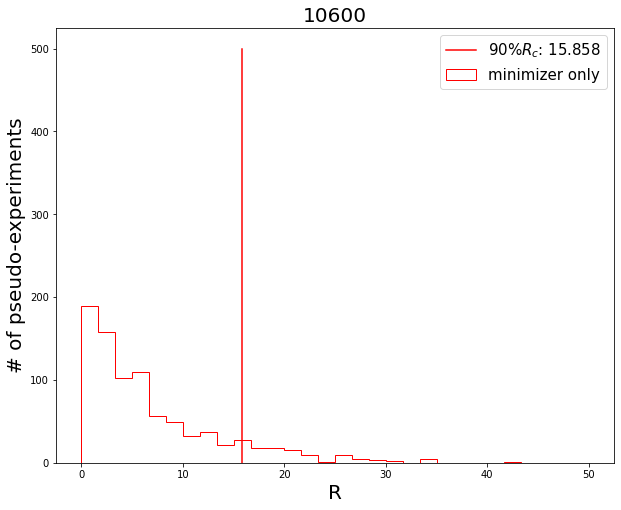

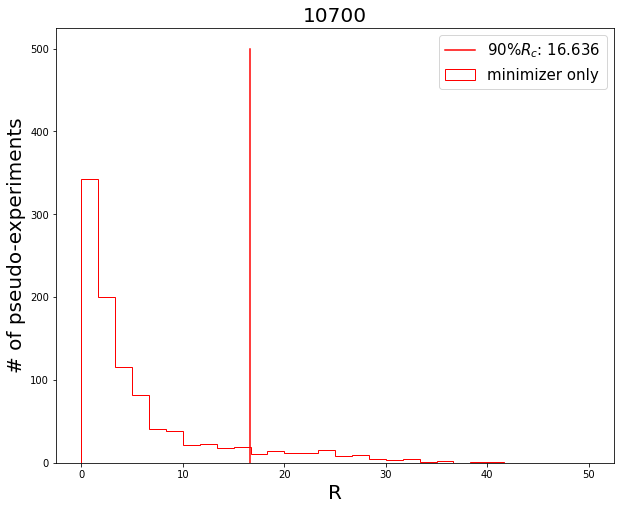

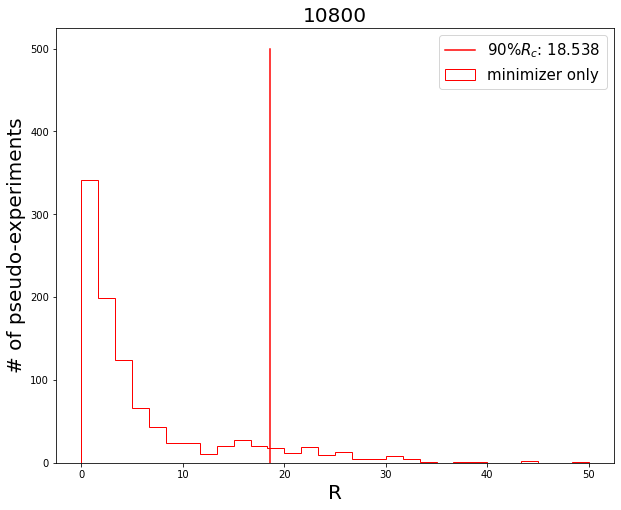

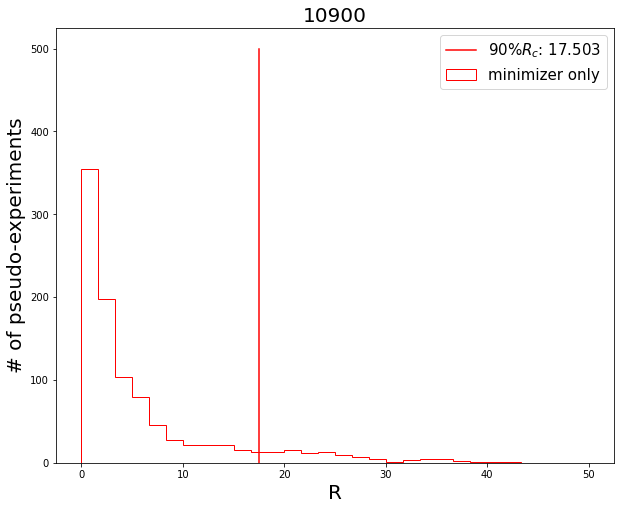

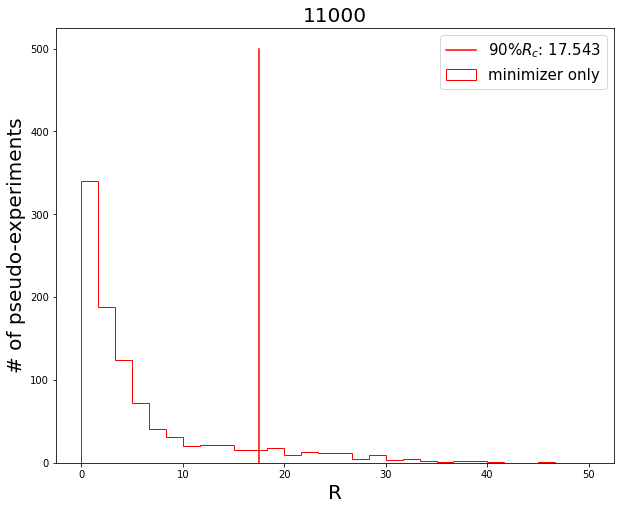

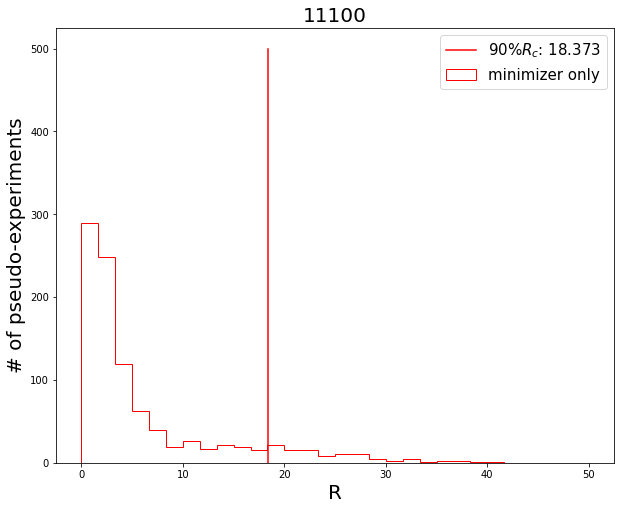

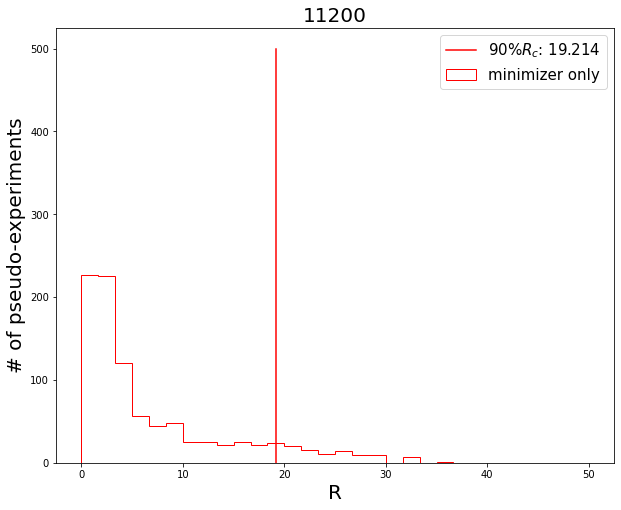

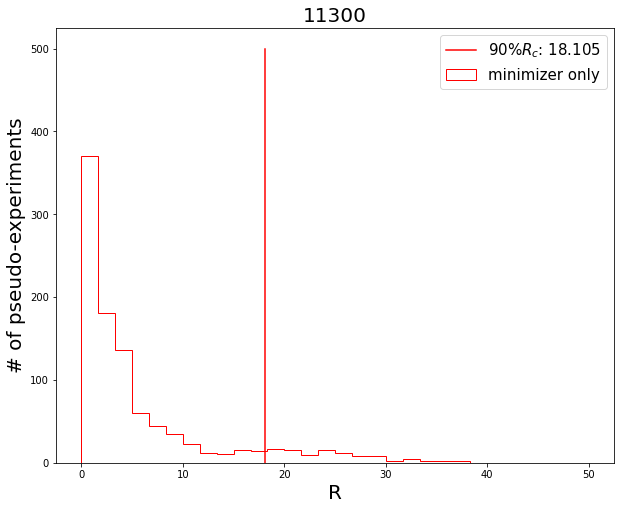

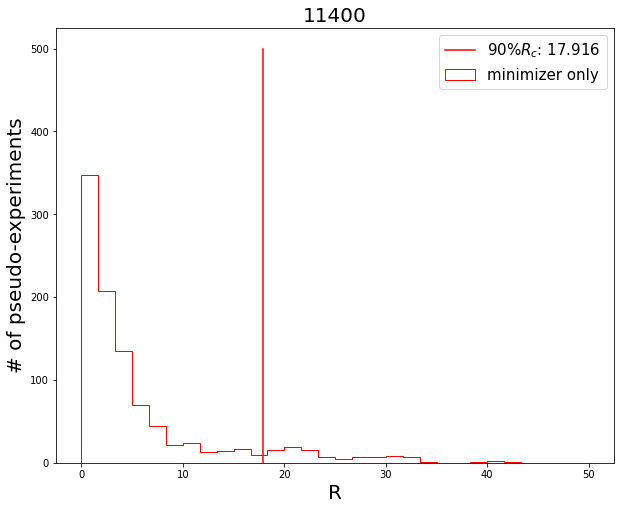

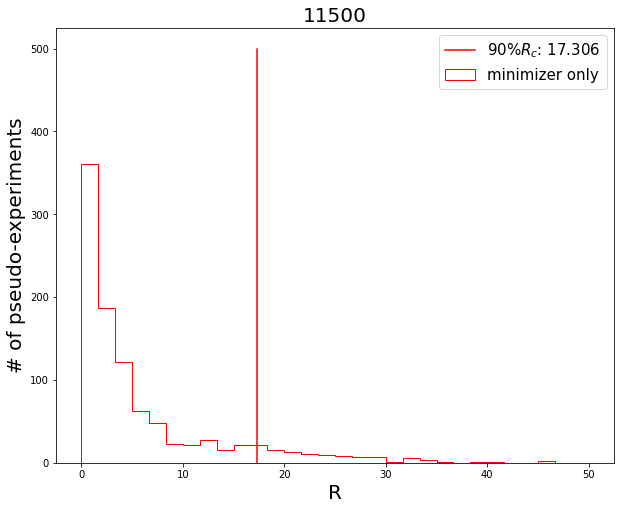

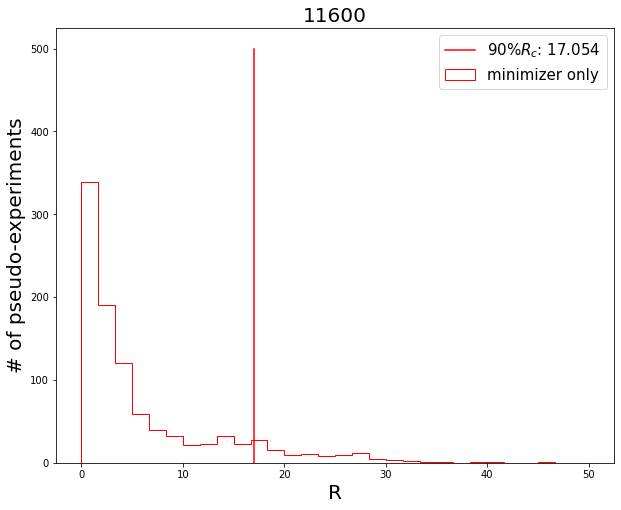

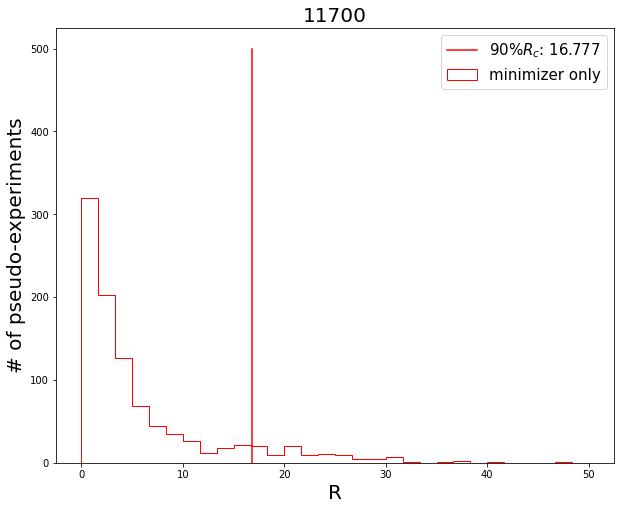

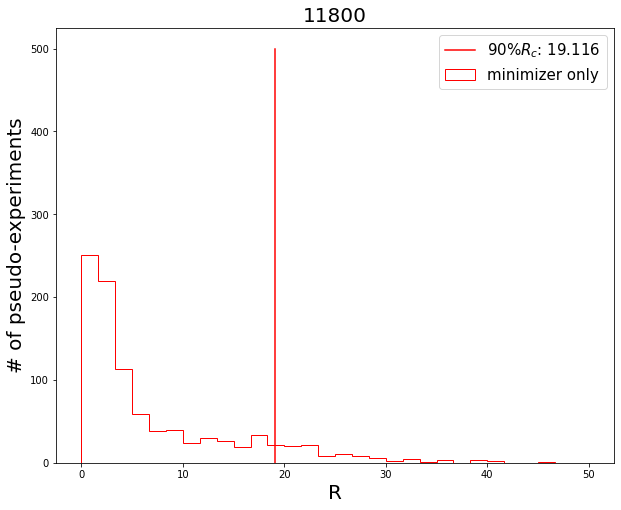

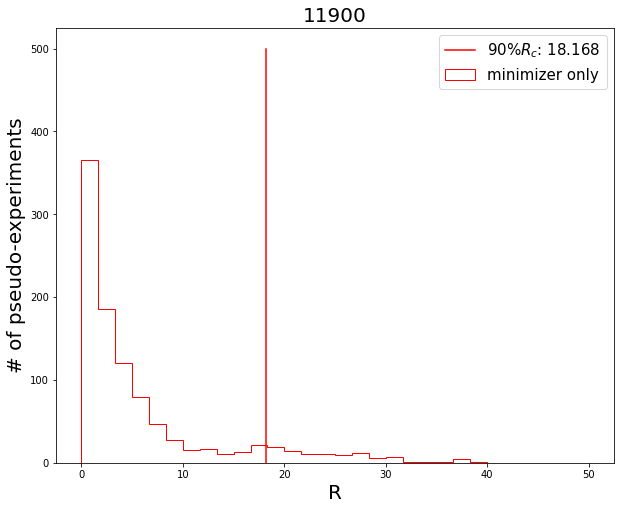

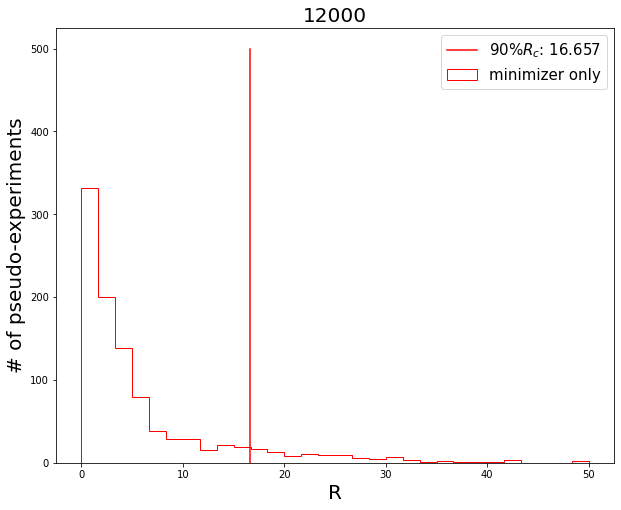

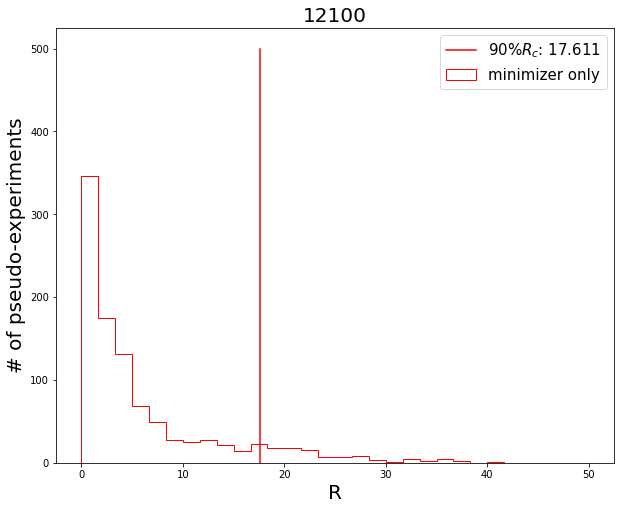

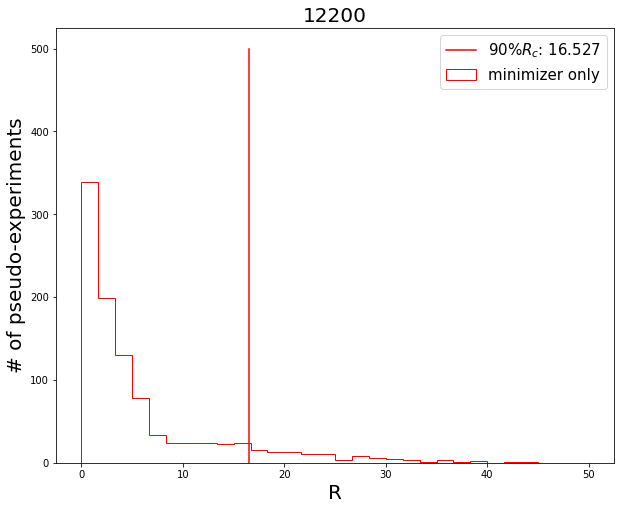

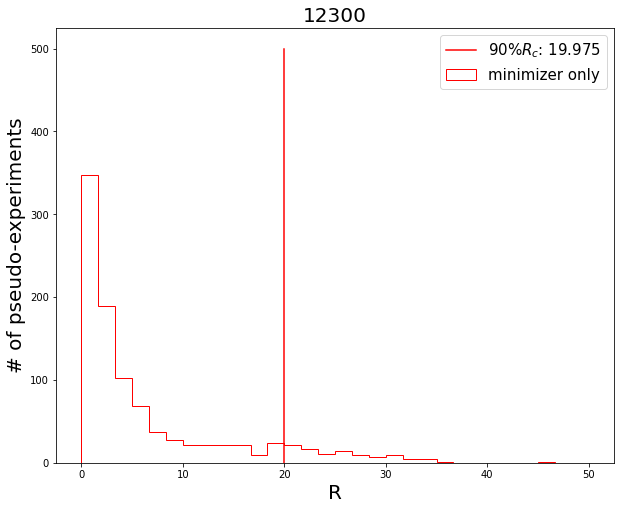

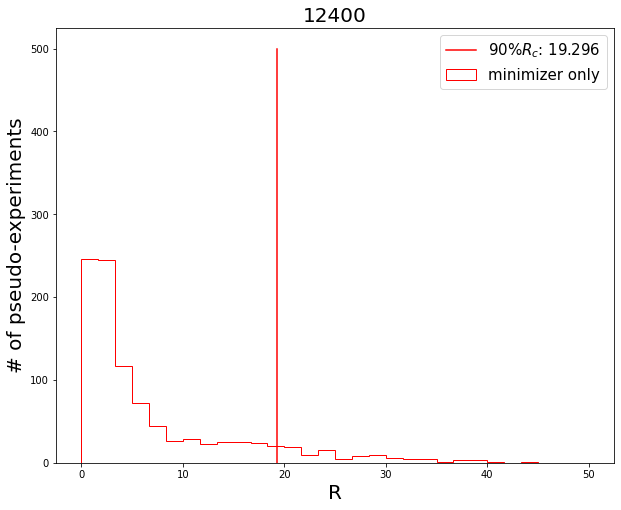

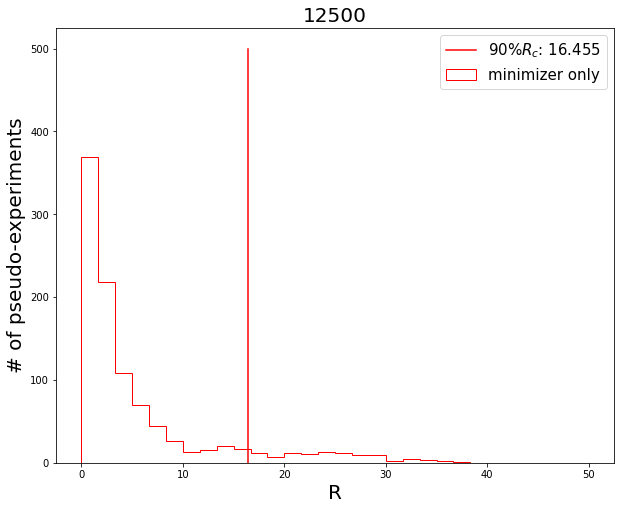

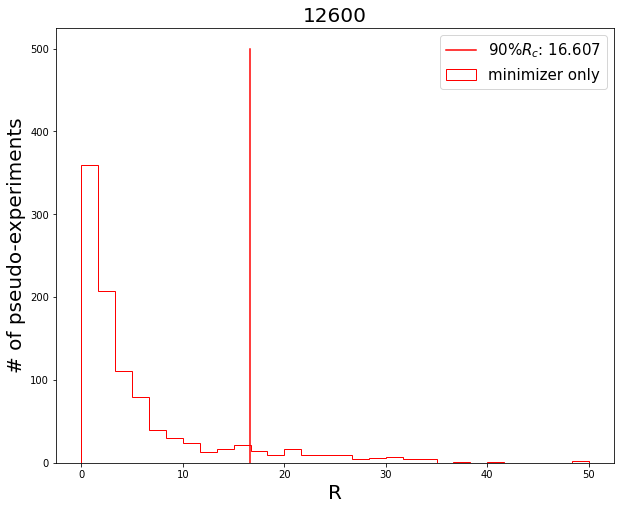

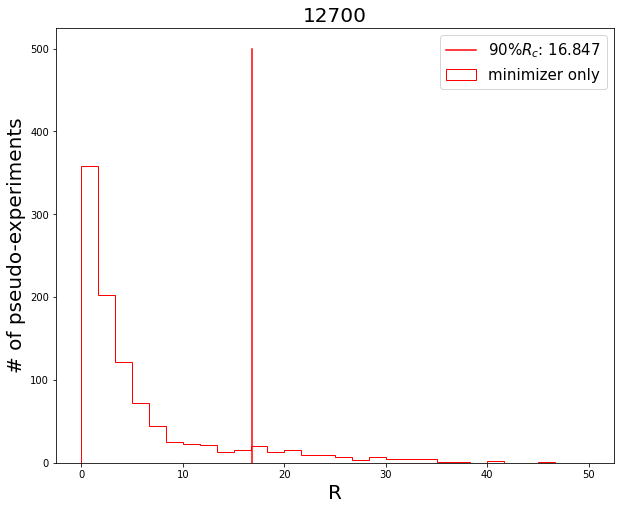

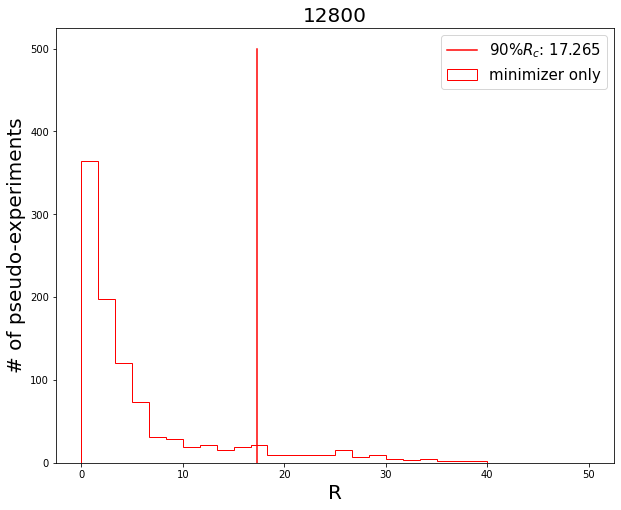

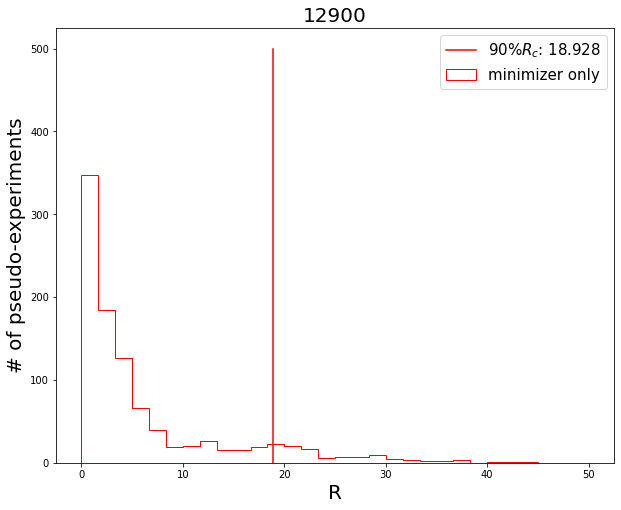

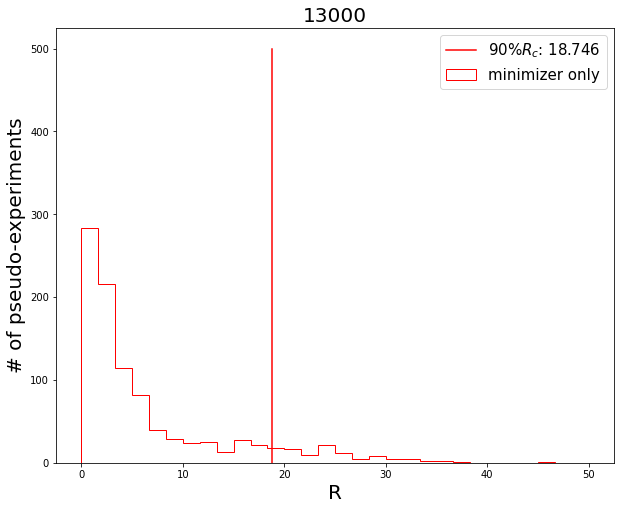

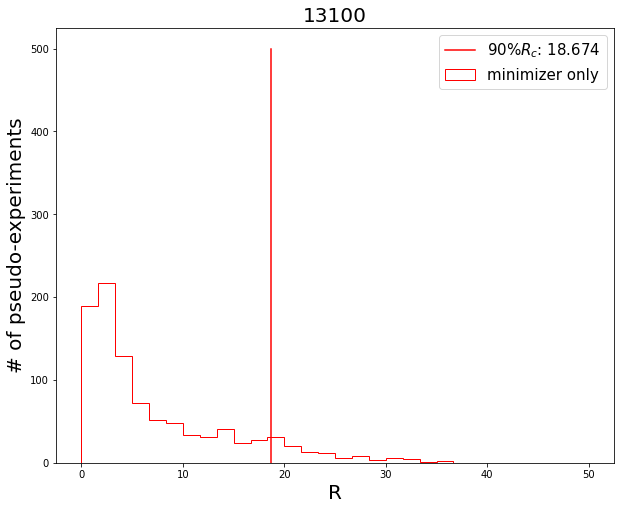

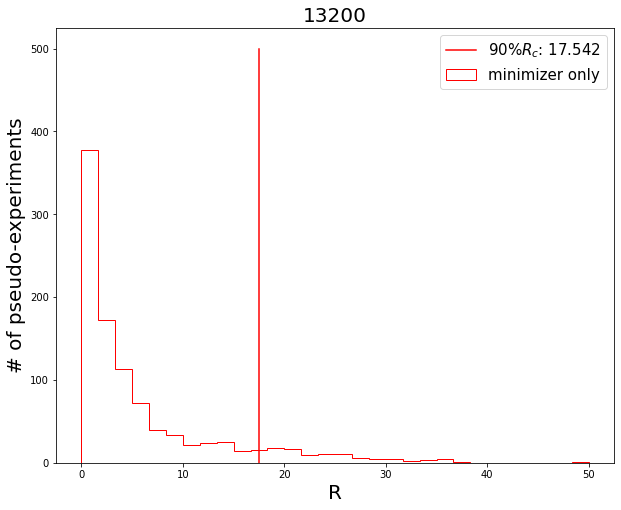

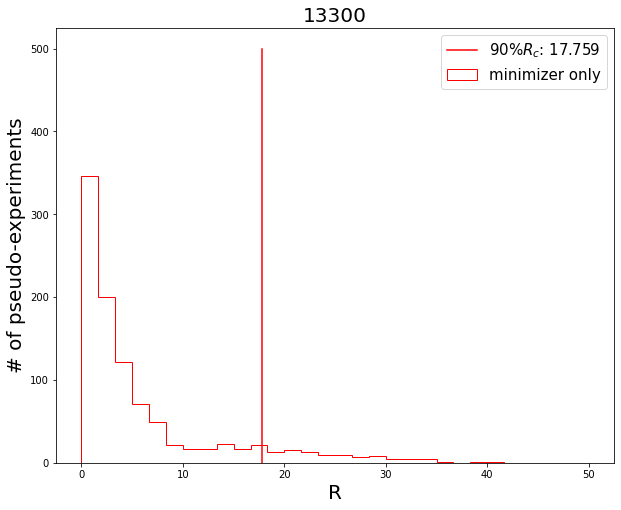

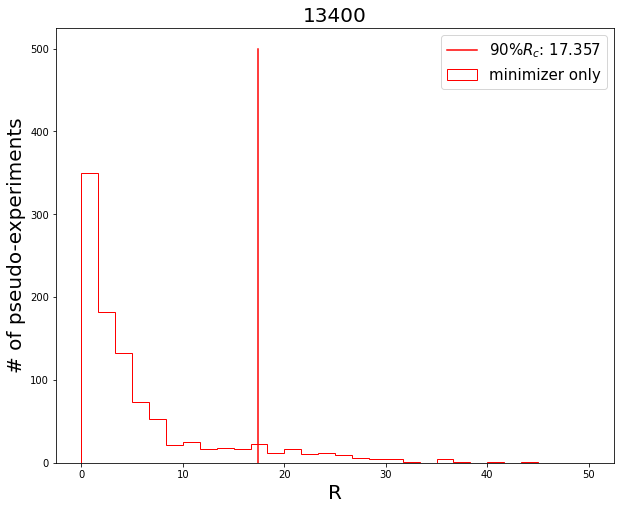

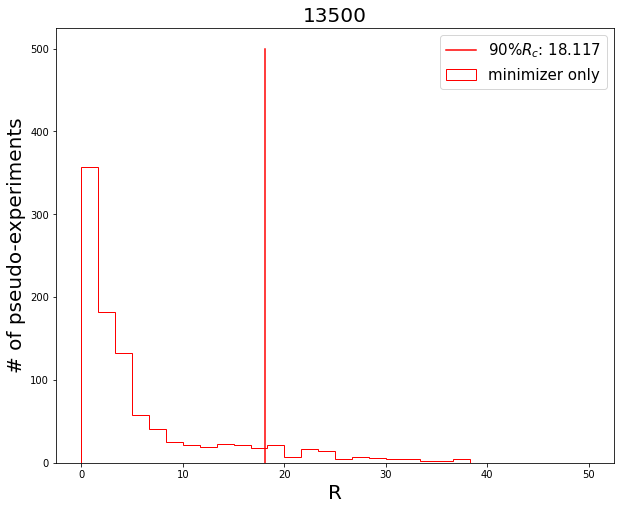

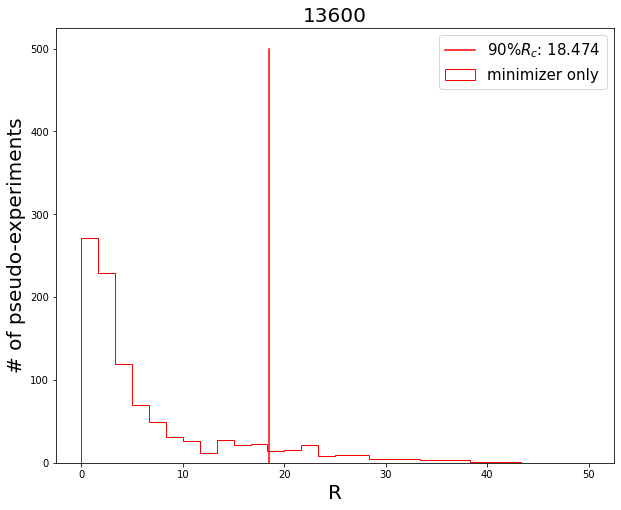

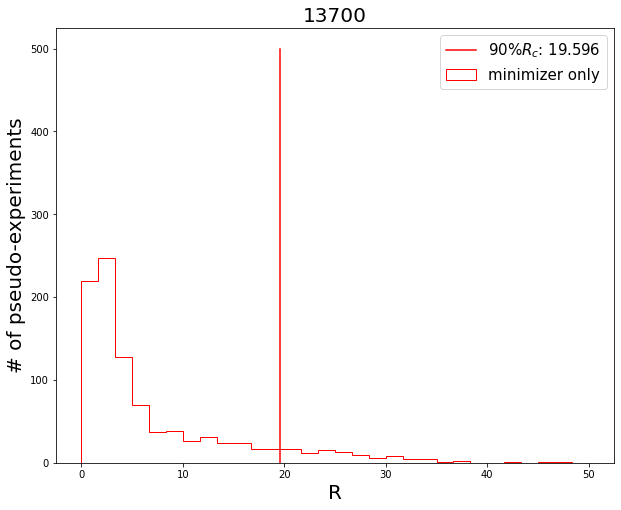

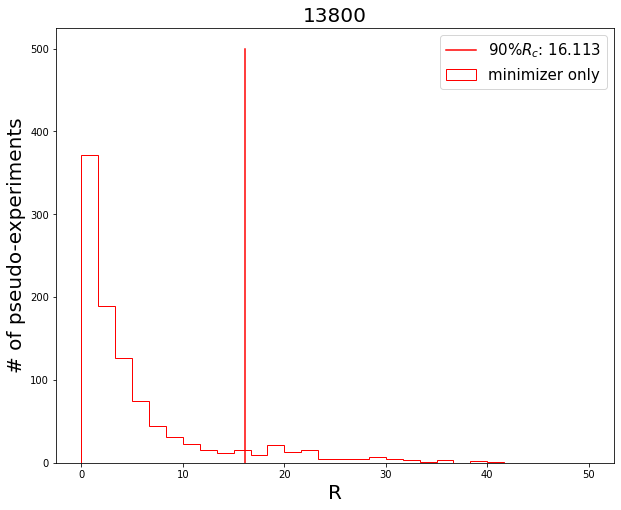

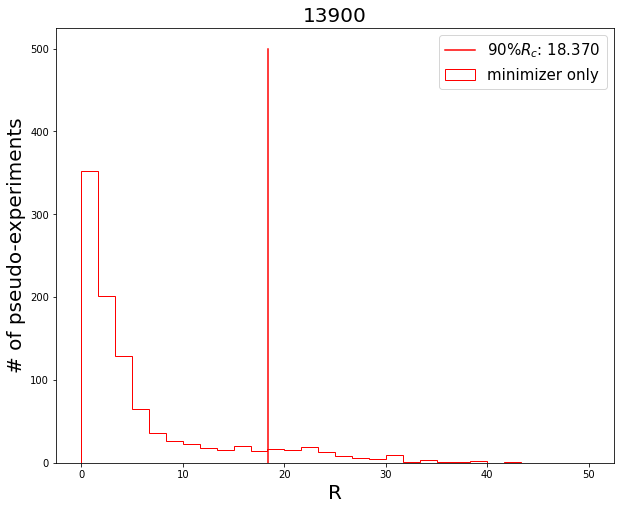

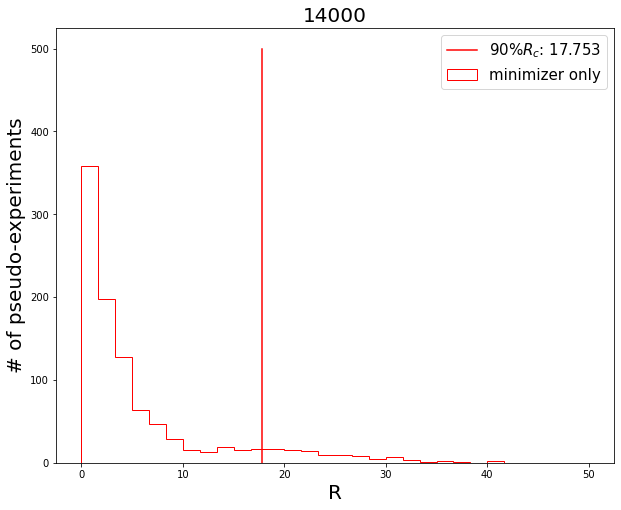

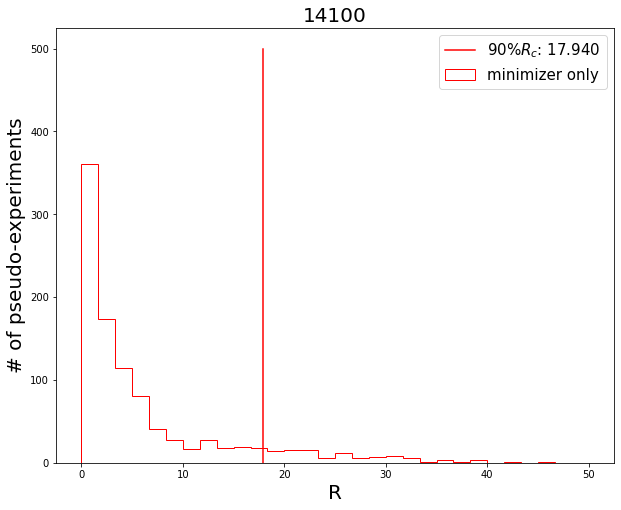

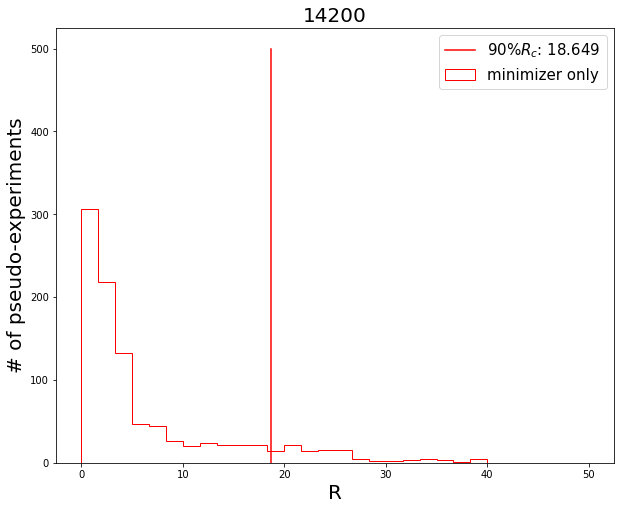

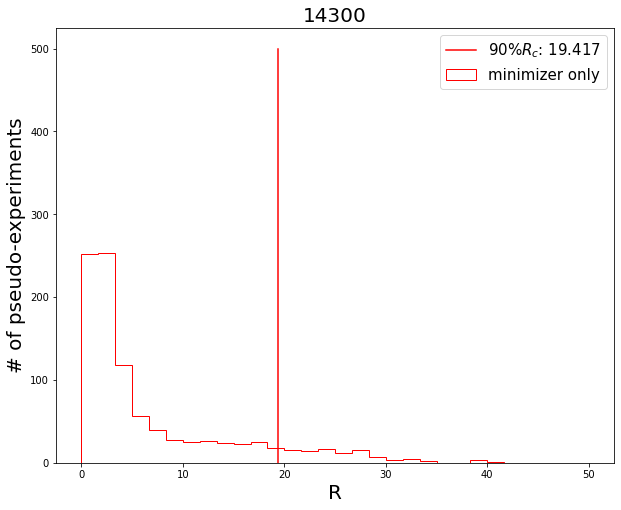

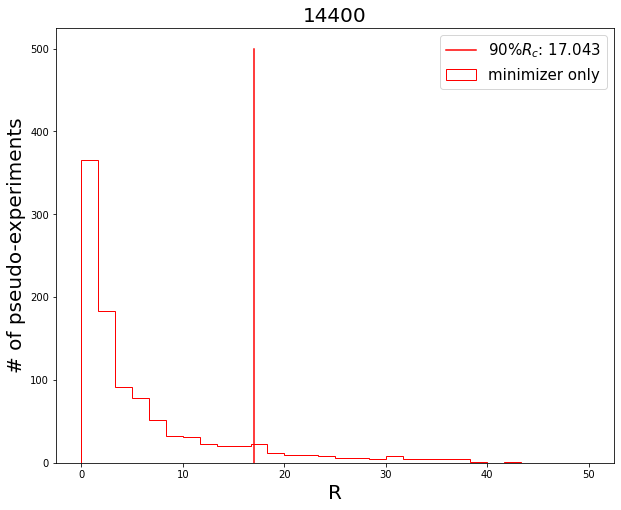

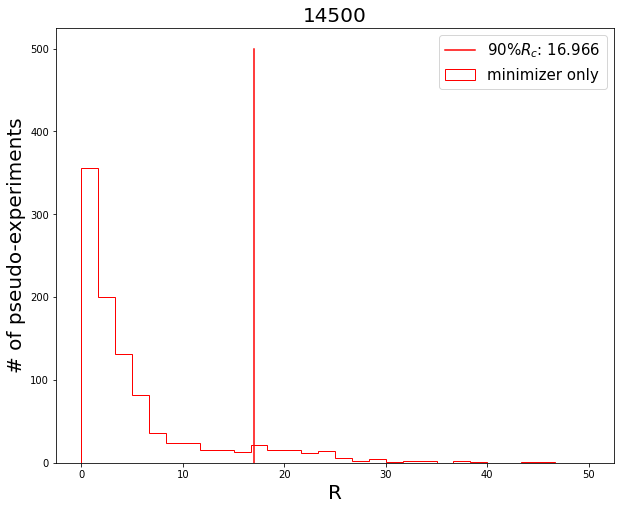

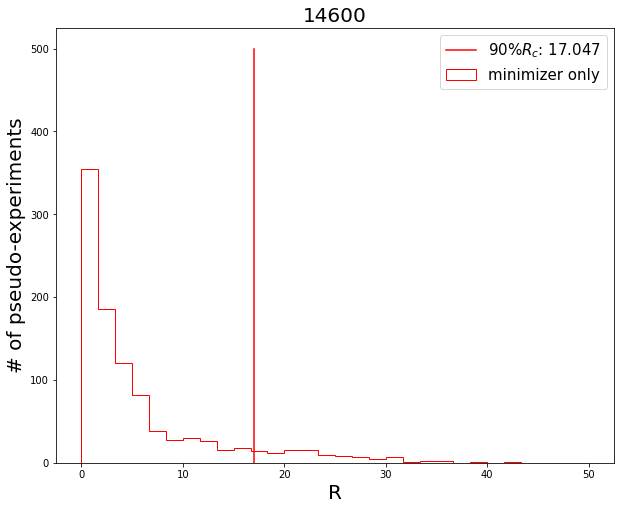

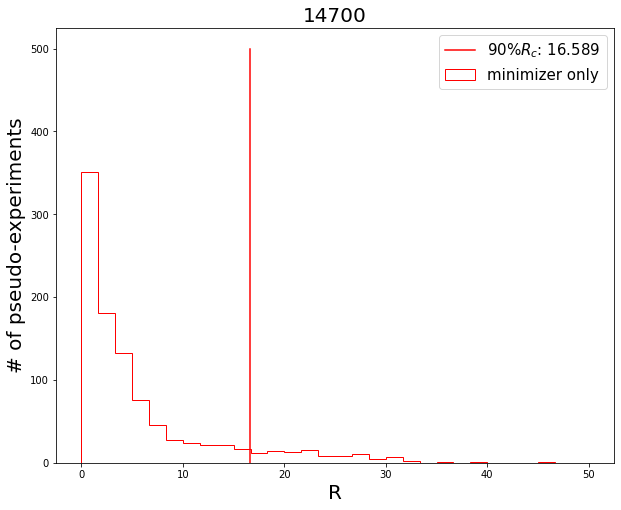

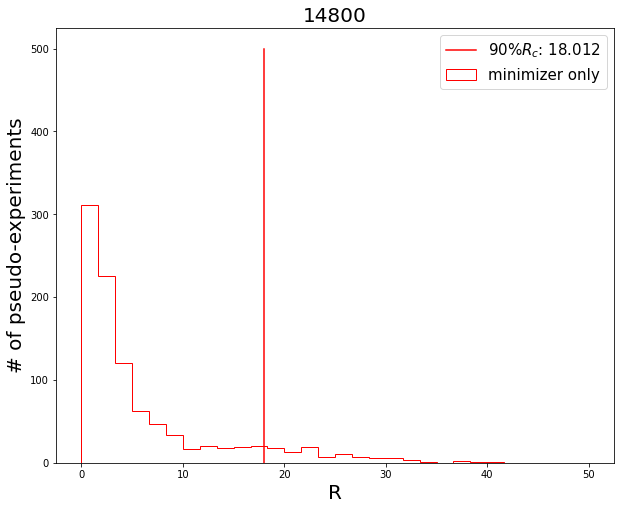

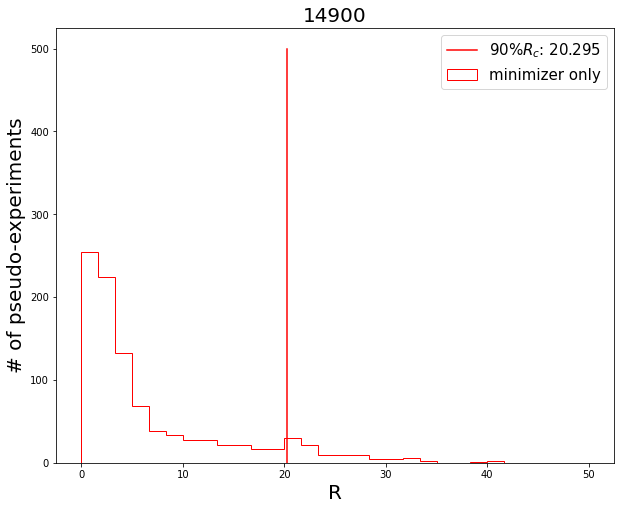

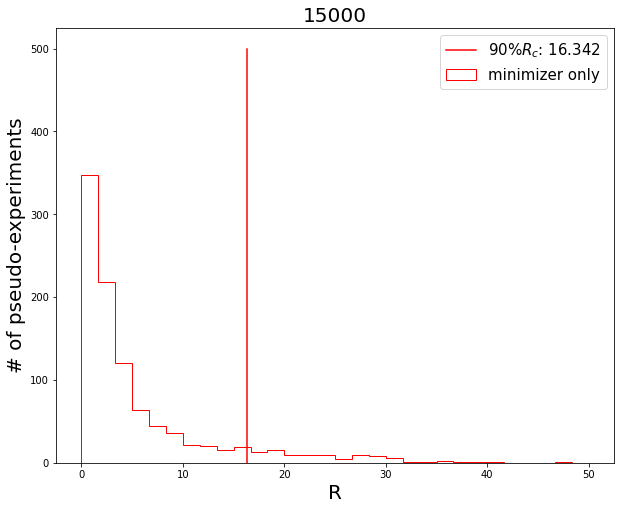

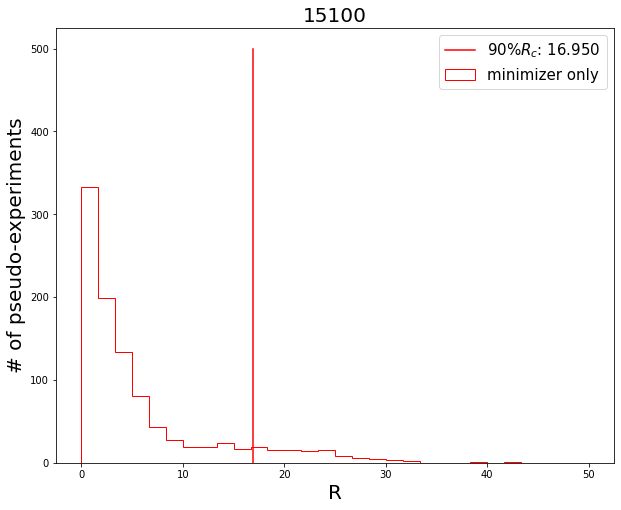

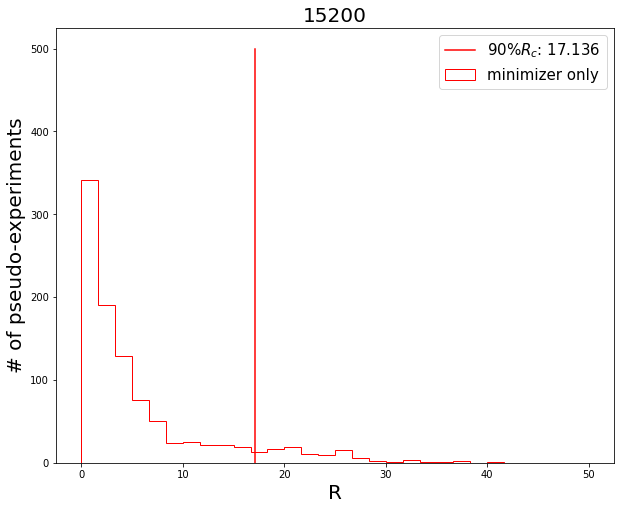

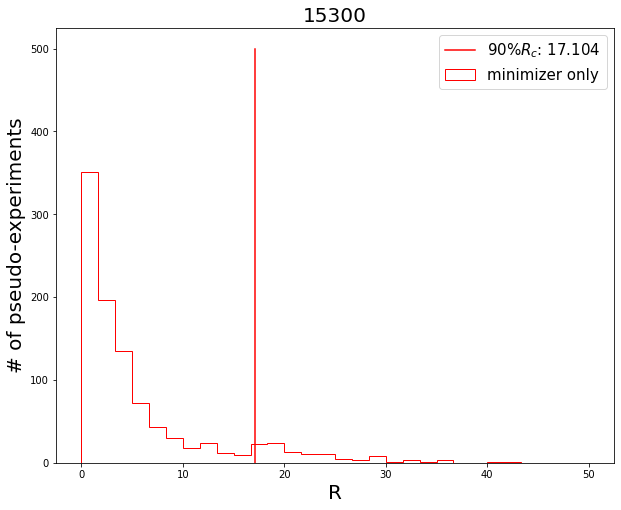

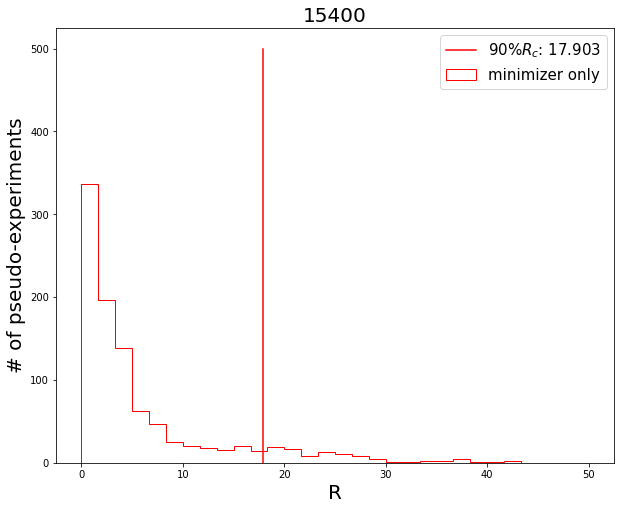

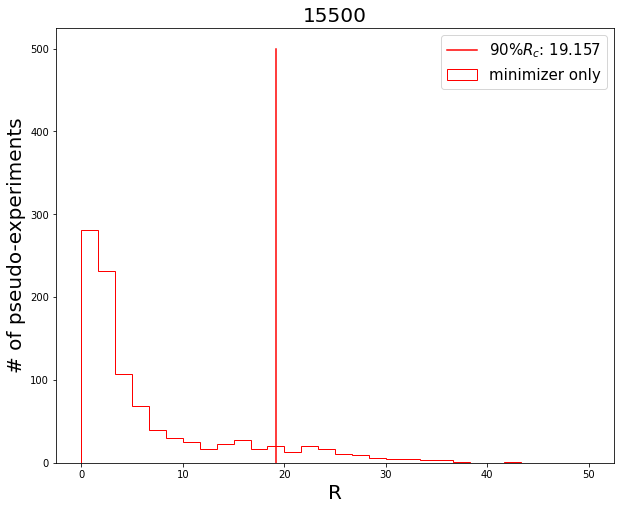

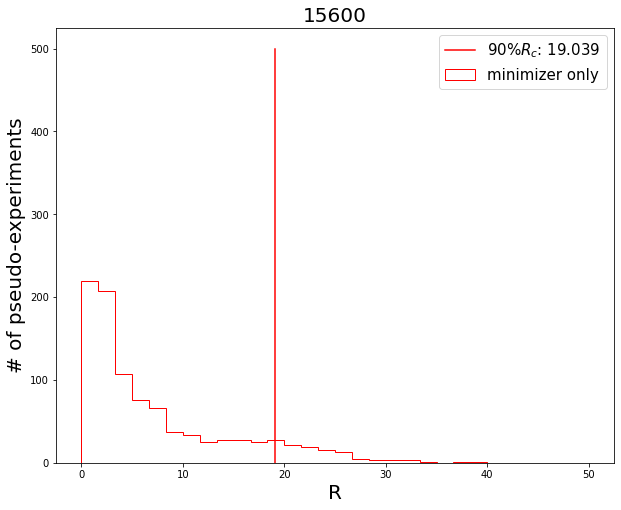

In [3]:
# look at each index individually
R_list=[]
num=0
for i in RDict_min:
    min_list=RDict_min[i]
    pT_list=RDict_pt[i]
    
    # make an R plot for each method
    delta_min=[]
    difference=[]

    for u in range(len(pT_list)):
        delta_min.append(pT_list[u]-min_list[u])

    delta_min.sort()
    val_90th_min =delta_min[math.floor(len(delta_min)*.9)]
    R_list.append(val_90th_min)
    
    # plot some examples
    if(num%100==0):
        # turn into histograms
        myrange=[0,50]
        fig,ax = plt.subplots(figsize=(10,8))
        plt.hist(delta_min,bins=30,range=myrange,histtype='step',label="minimizer only",color='red')
        plt.plot([val_90th_min,val_90th_min],[0,500],color='red',label=r'$90\% R_c$: '+str("%.3f" %val_90th_min))
#         plt.plot([6.25,6.25],[0,250],color='black',label='Wilks 3 dof 90%')
        plt.xlabel(r"R",fontsize=20)
        plt.ylabel(r"# of pseudo-experiments",fontsize=20)
        plt.title(str(i),fontsize=20)
        plt.legend(fontsize=15)
        pkl.dump(fig,open("FC_1dhist_"+str(num)+".p",'wb'))
        plt.savefig("FC_1dhist_"+str(num)+".png")
        plt.show()
        plt.close()
    
    num +=1

In [4]:
# load in the bins for the grid points
with open("bins_sens.txt","r") as bins:
    lines = bins.readlines()
    lines[0].strip()
    lines[1].strip()
    lines[2].strip()
    vals0 = lines[0].split(" ")
    vals1 = lines[1].split(" ")
    vals2 = lines[2].split(" ")
    m41_list= []
    ue4_list= []
    um4_list= []
    for v in range(len(vals0)-1):
        m41_list.append(float(vals0[v]))
    for v in range(len(vals1)-1):
        ue4_list.append(float(vals1[v]))
    for v in range(len(vals2)-1):
        um4_list.append(float(vals2[v]))
print("m values:", m41_list )
print("ue4 values:",ue4_list)
print("um4 values:",um4_list)

m values: [0.0120226, 0.017378, 0.0251189, 0.0363078, 0.0524807, 0.0758578, 0.109648, 0.158489, 0.229087, 0.331131, 0.47863, 0.691831, 1.0, 1.44544, 2.0893, 3.01995, 4.36516, 6.30957, 9.12011, 13.1826, 19.0546, 27.5423, 39.8107, 57.544, 83.1764, 120.226]
ue4 values: [0.01, 0.0116939, 0.0136747, 0.015991, 0.0186997, 0.0218672, 0.0255713, 0.0299028, 0.034968, 0.0408911, 0.0478176, 0.0559174, 0.0653891, 0.0764653, 0.0894176, 0.104564, 0.122276, 0.142988, 0.167209, 0.195532, 0.228653, 0.267384, 0.312675, 0.365639, 0.427574, 0.5]
um4 values: [0.01, 0.0116939, 0.0136747, 0.015991, 0.0186997, 0.0218672, 0.0255713, 0.0299028, 0.034968, 0.0408911, 0.0478176, 0.0559174, 0.0653891, 0.0764653, 0.0894176, 0.104564, 0.122276, 0.142988, 0.167209, 0.195532, 0.228653, 0.267384, 0.312675, 0.365639, 0.427574, 0.5]


In [5]:
# print out some test points
print("R_crit at null =", R_list[0])
print("R_crit at gbf =", R_list[8542])
print("R_crit at max =", R_list[15624])
print("R_crit at 12992 =", R_list[12992])
print("R_crit at 9799 =", R_list[9799])
print("R_crit at 9071 =", R_list[9071])
print("R_crit at 10565 =", R_list[10565])
print("R_crit at 7370 =", R_list[7370])

R_crit at null = 18.687000000000012
R_crit at gbf = 20.532999999999987
R_crit at max = 8.34099999999998
R_crit at 12992 = 19.932999999999993
R_crit at 9799 = 5.194999999999993
R_crit at 9071 = 24.826999999999998
R_crit at 10565 = 15.369
R_crit at 7370 = 16.41900000000001


In [6]:
# change into 3d array of grid values
Rcrit_arr=np.zeros((25,25,25))

for pt in range(len(R_list)):
    #this is a mess, but works. Didn't want to hardcode any numbers
    m_id = math.floor(pt/((25*25)))
    # need the subtraction term so that it resets everytime m41 increases
    ue4_id = math.floor((pt-m_id*25*25)/(25))
    um4_id = pt % (25)
#     print(pt,m_id,ue4_id,um4_id)
    Rcrit_arr[ue4_id][m_id][um4_id]=R_list[pt]

In [7]:
# switch to bin centers for plotting
def getbincenters( fulllist):
    newlist =[]
    for i in range(len(fulllist)-1):
        topval = fulllist[i+1]
        botval = fulllist[i]
        center = (topval+botval)/float(2.0)
        newlist.append(center)
    return newlist

m41_center = getbincenters(m41_list)
ue4_center = getbincenters(ue4_list)
um4_center = getbincenters(um4_list)

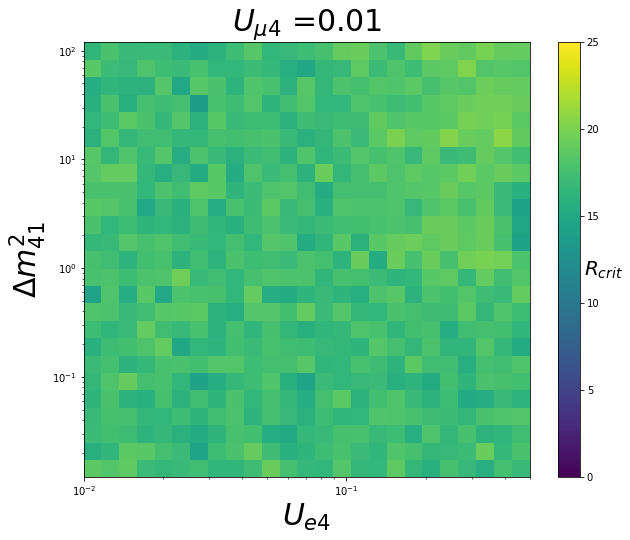

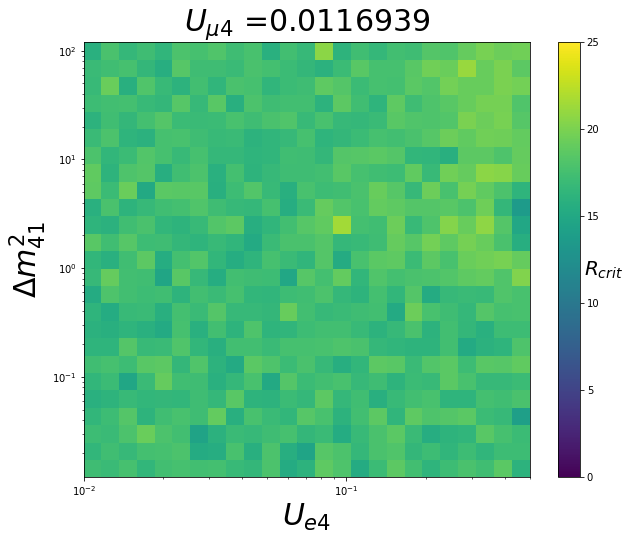

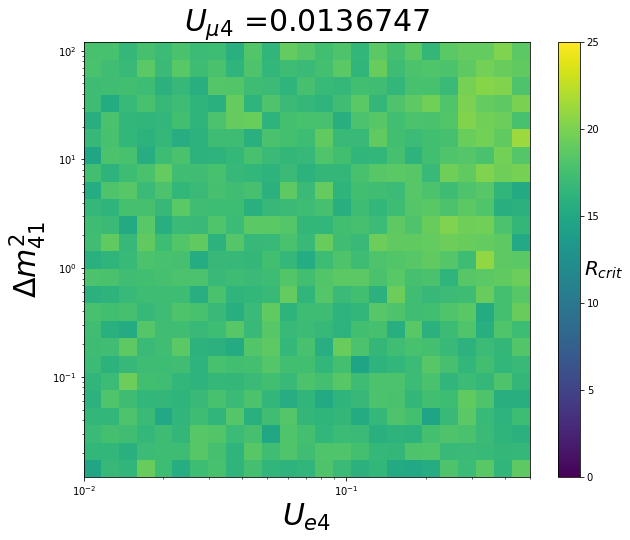

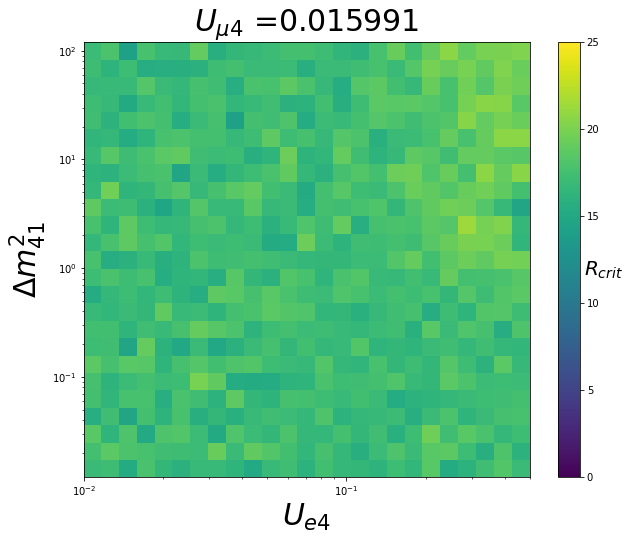

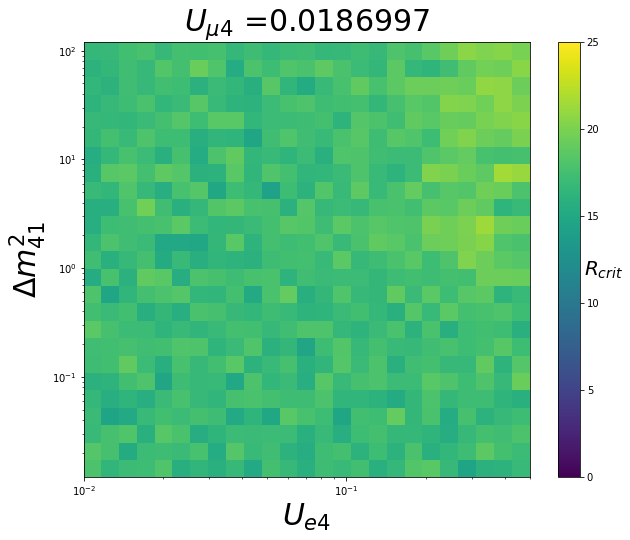

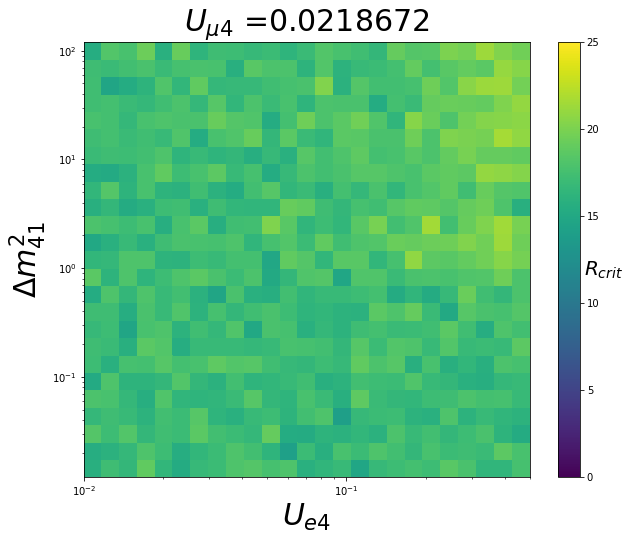

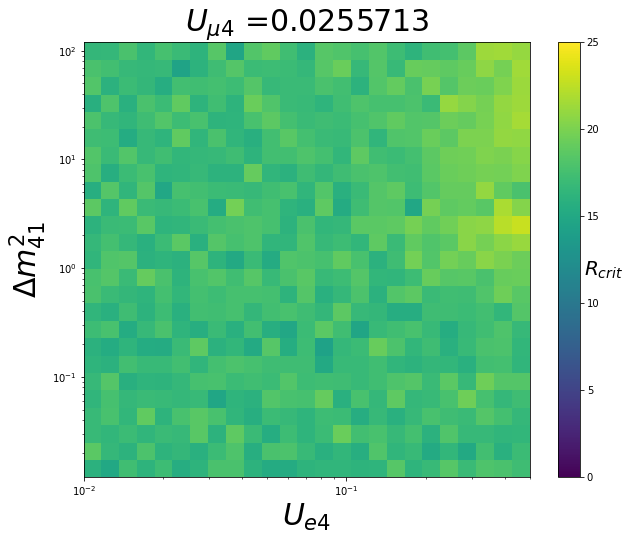

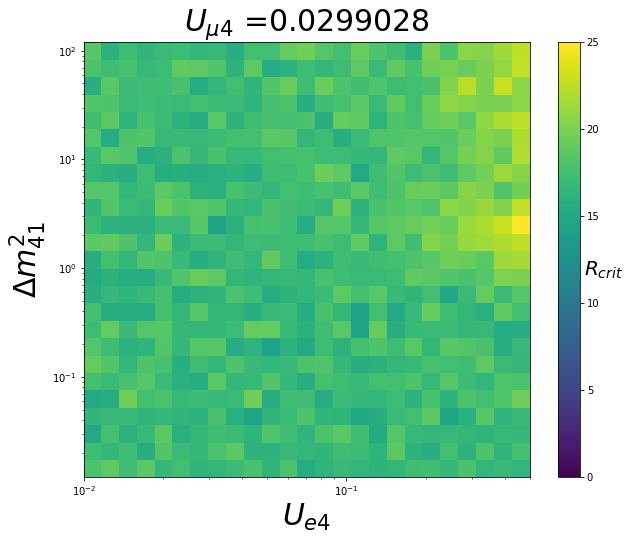

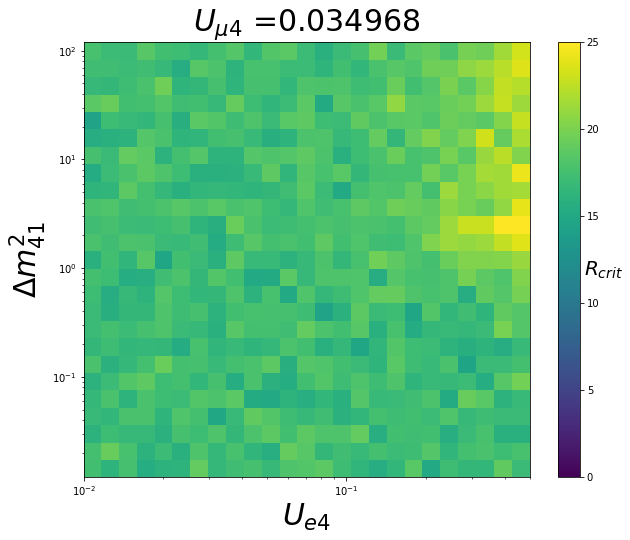

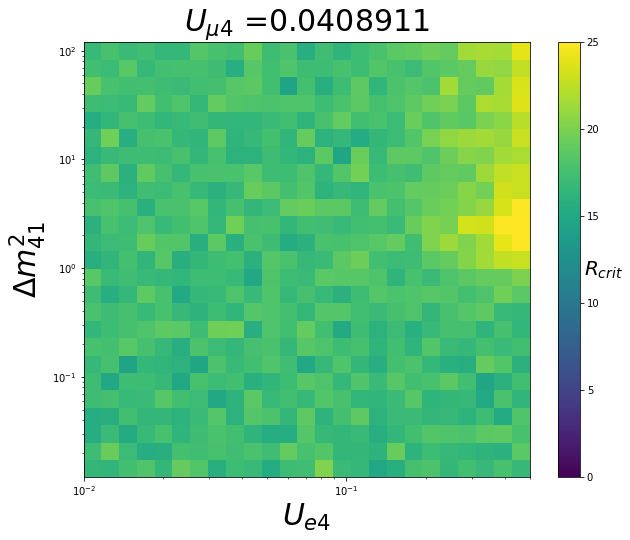

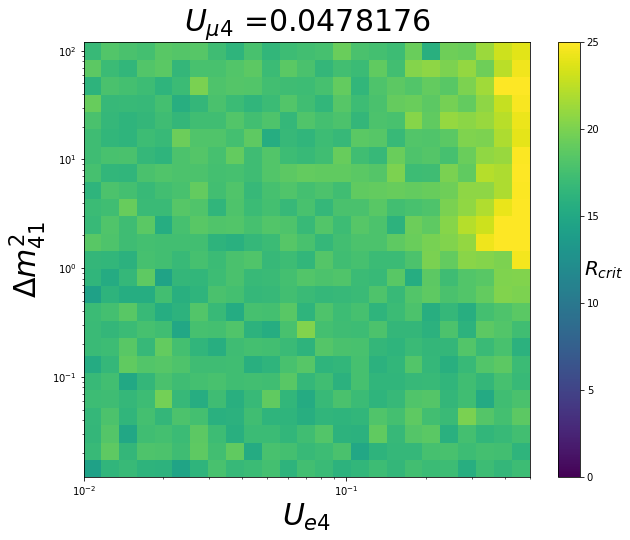

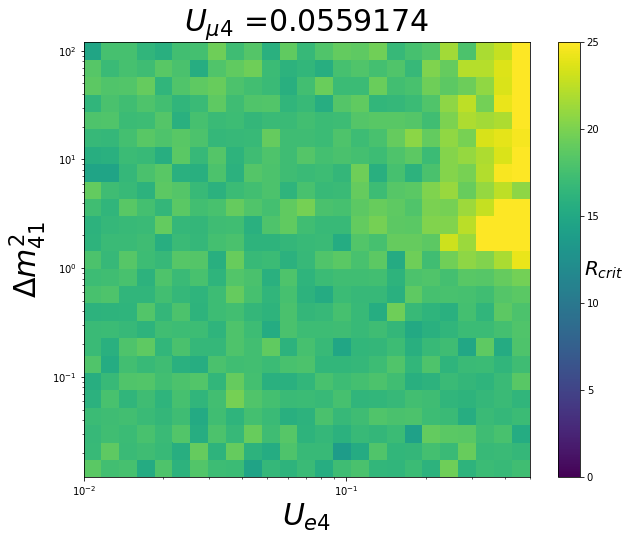

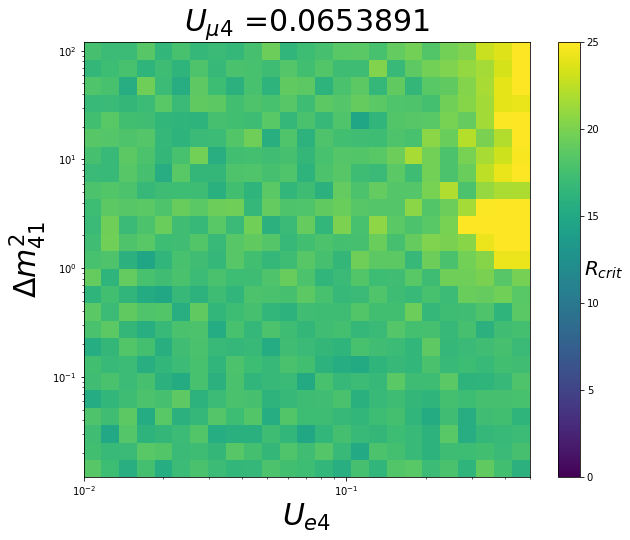

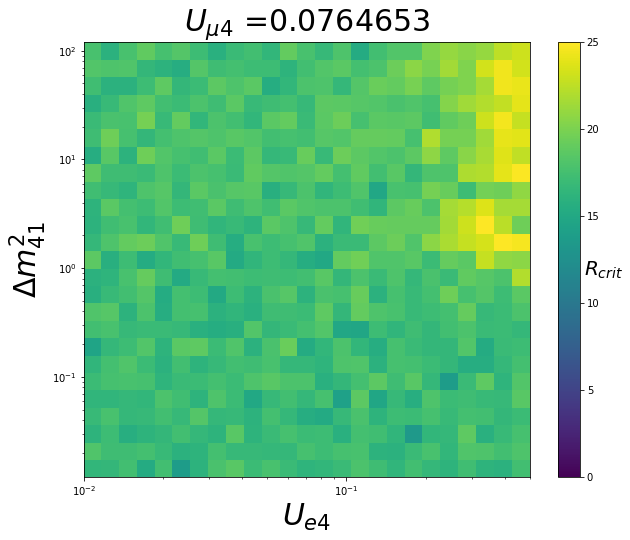

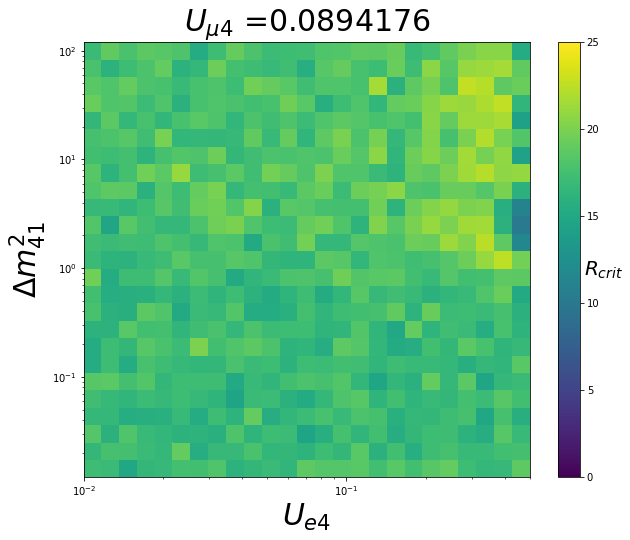

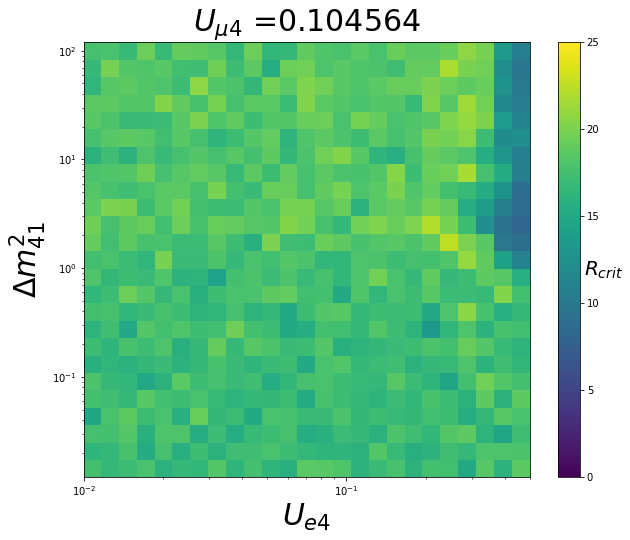

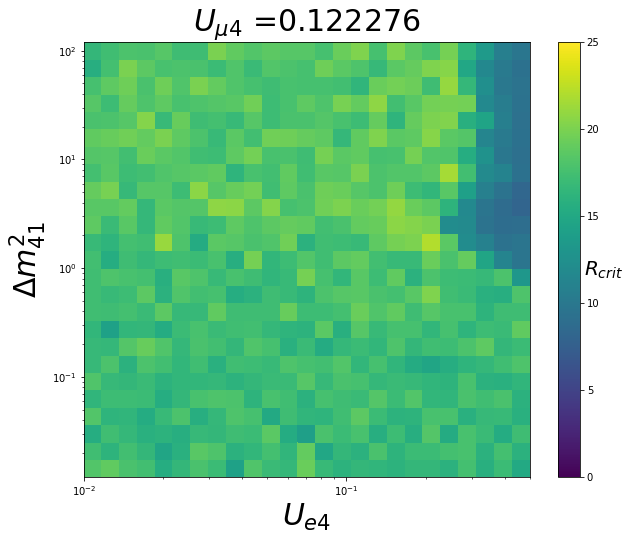

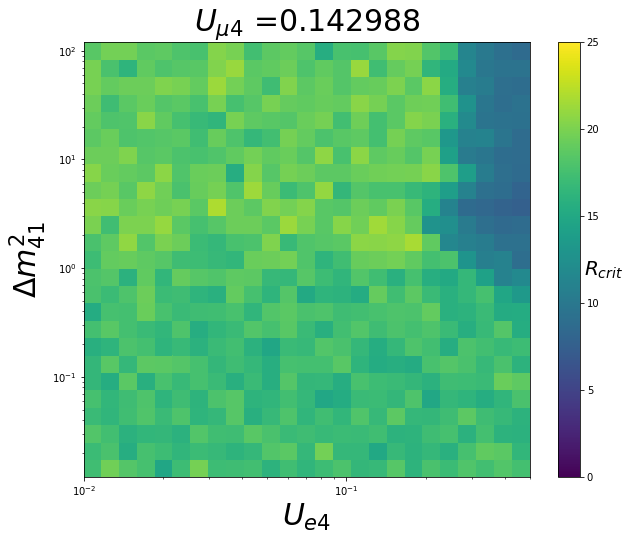

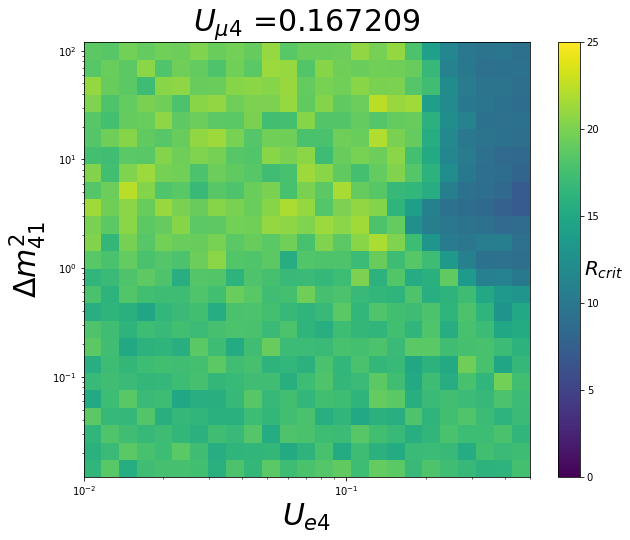

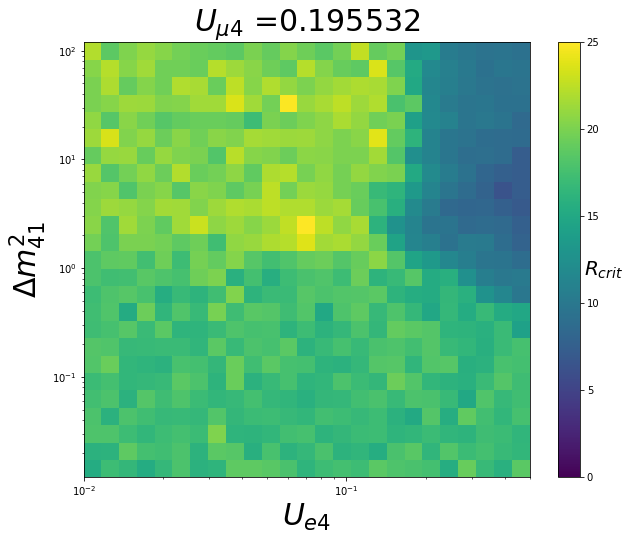

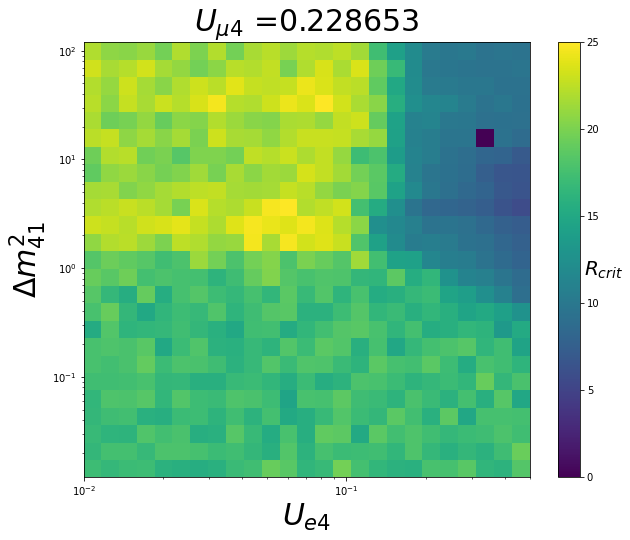

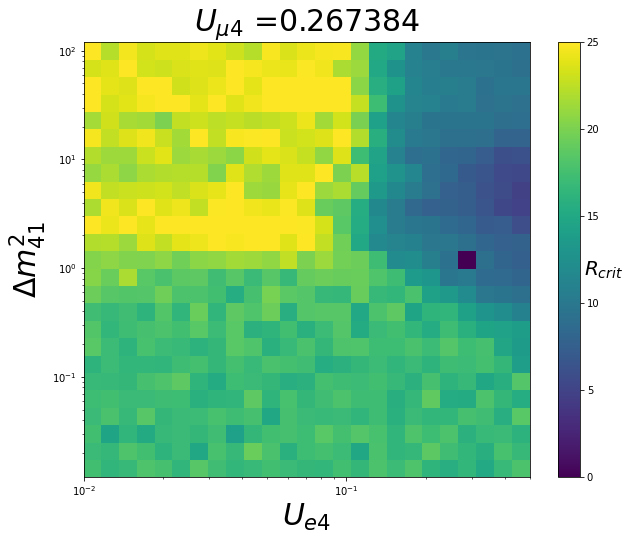

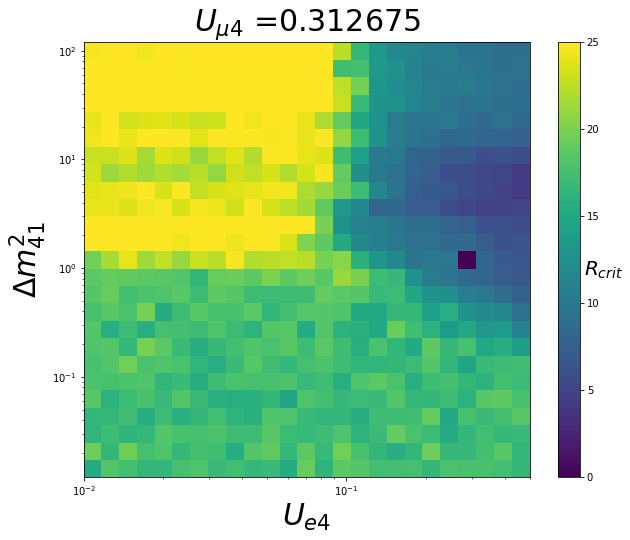

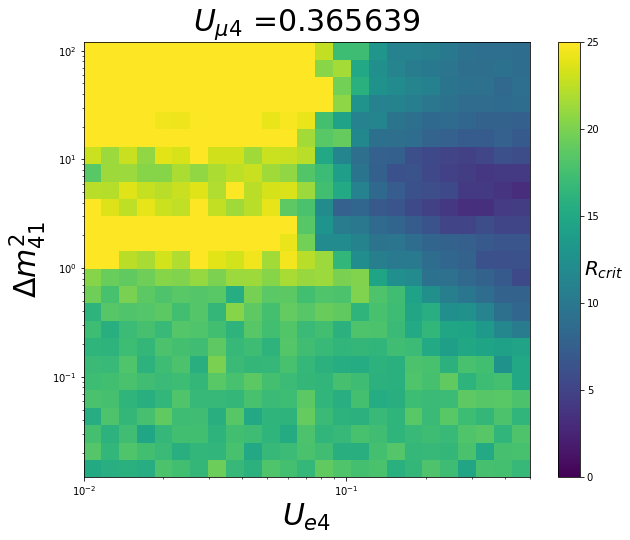

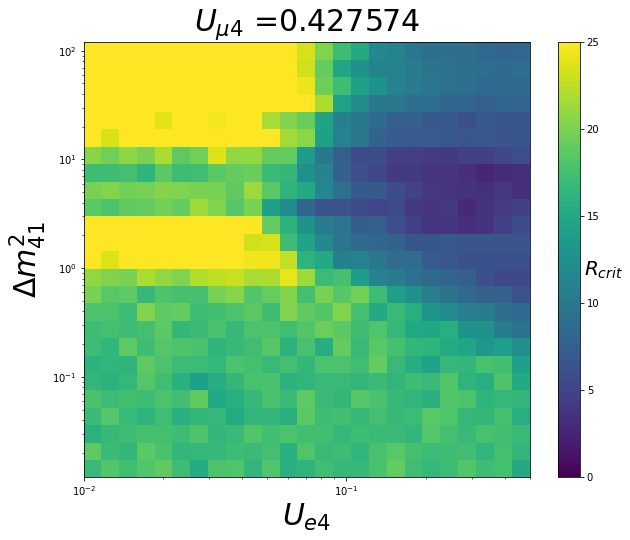

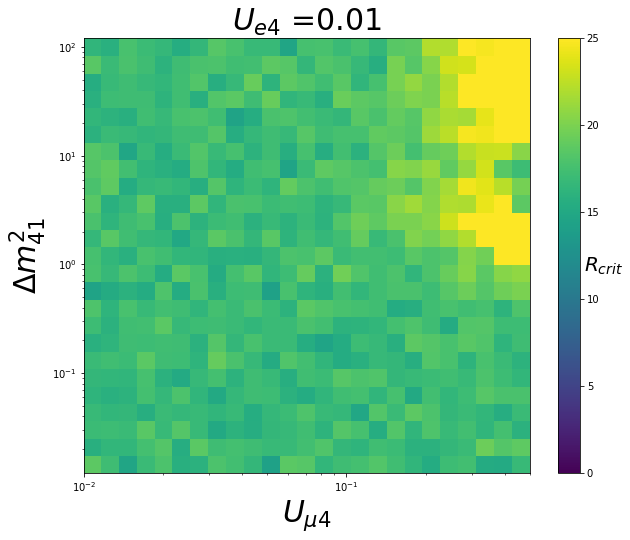

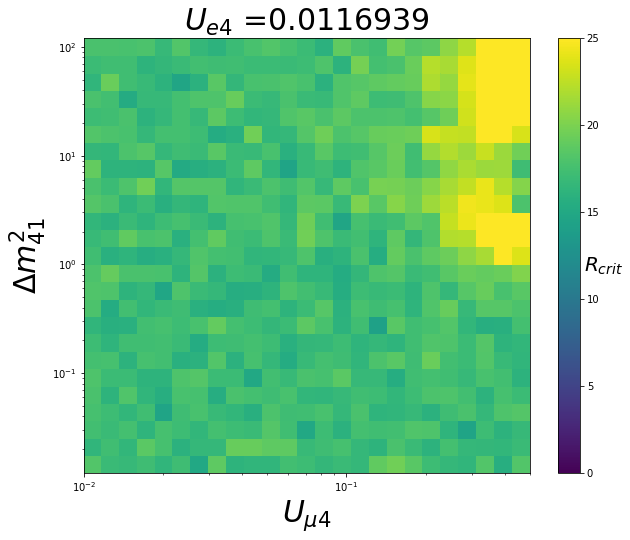

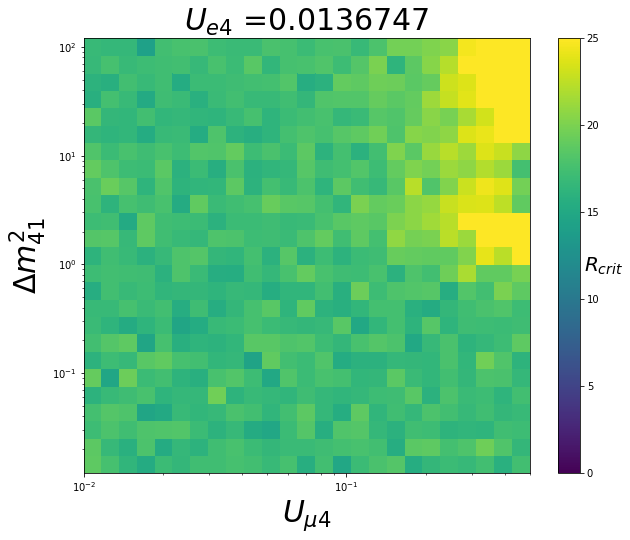

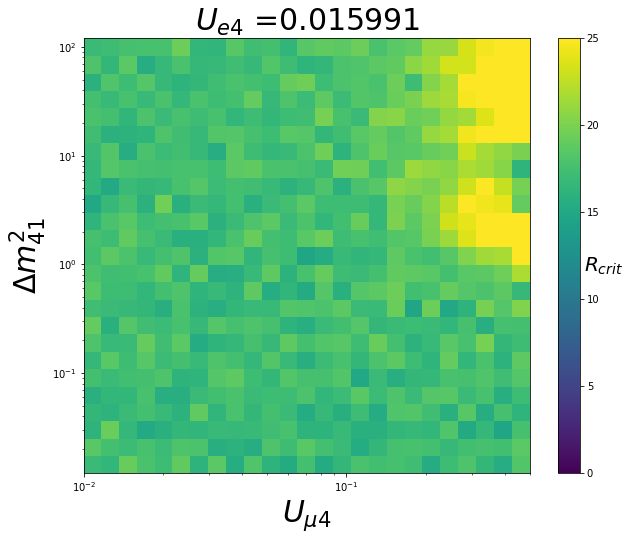

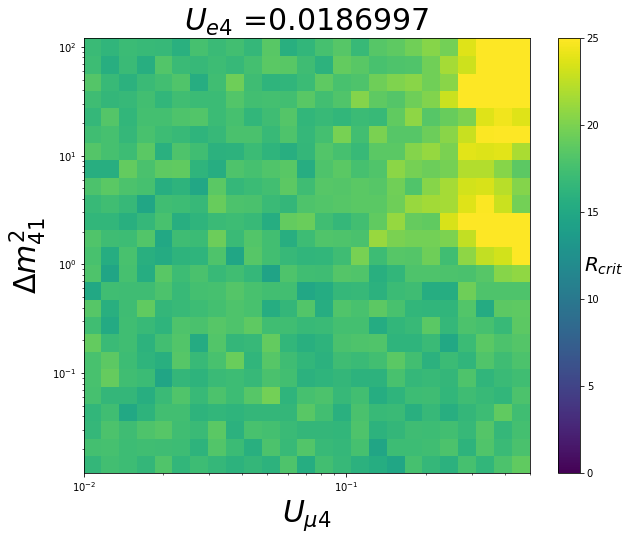

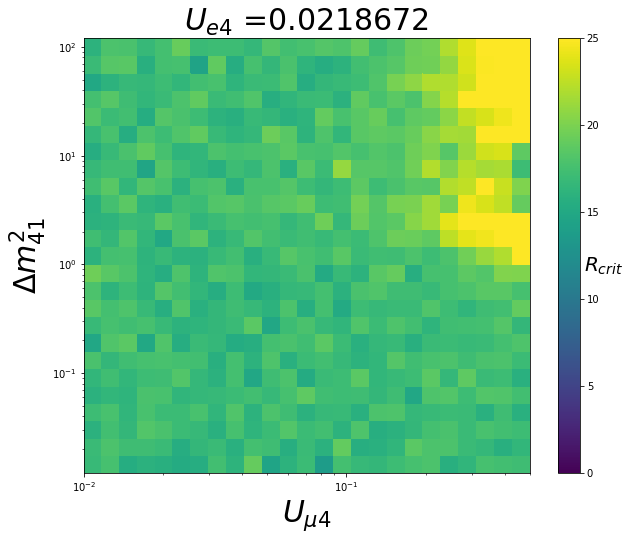

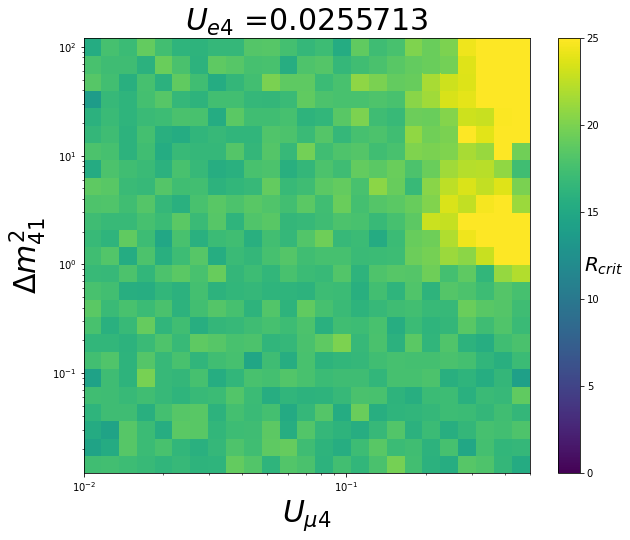

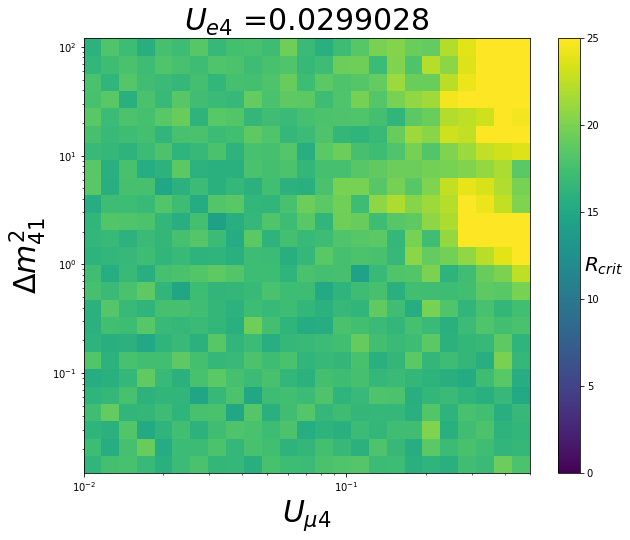

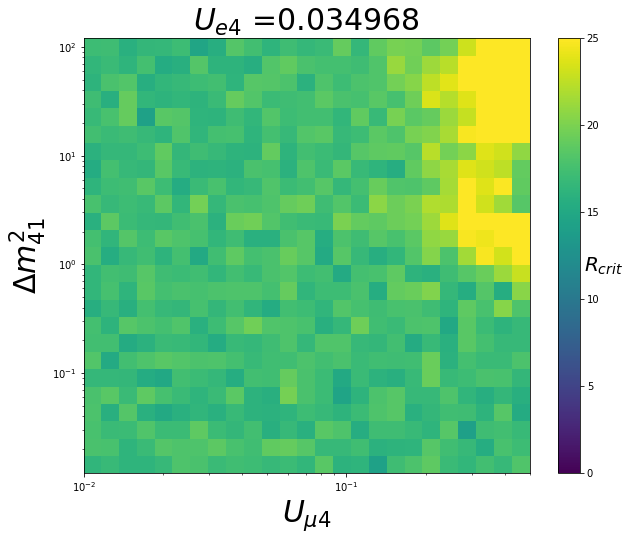

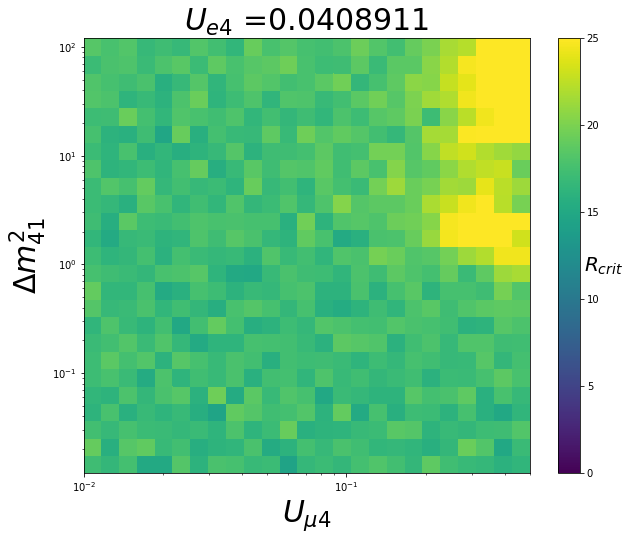

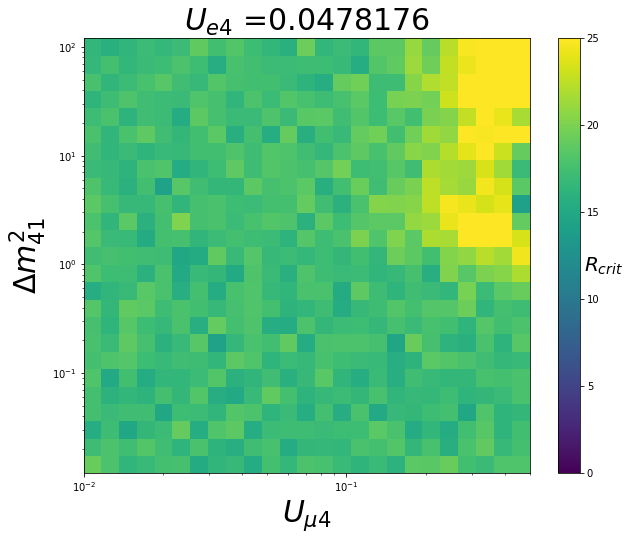

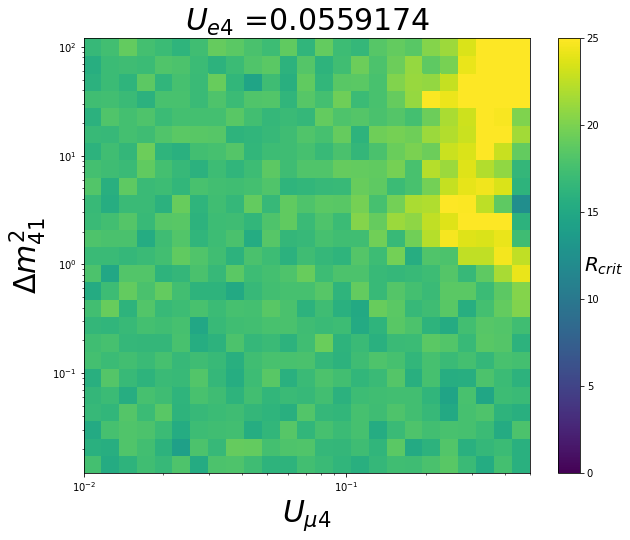

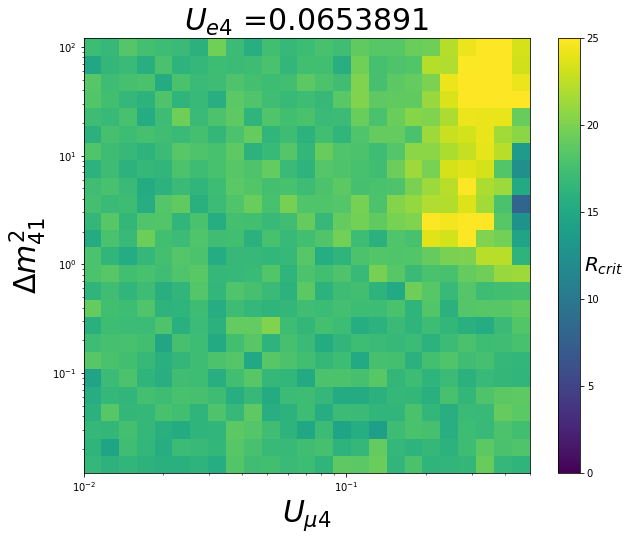

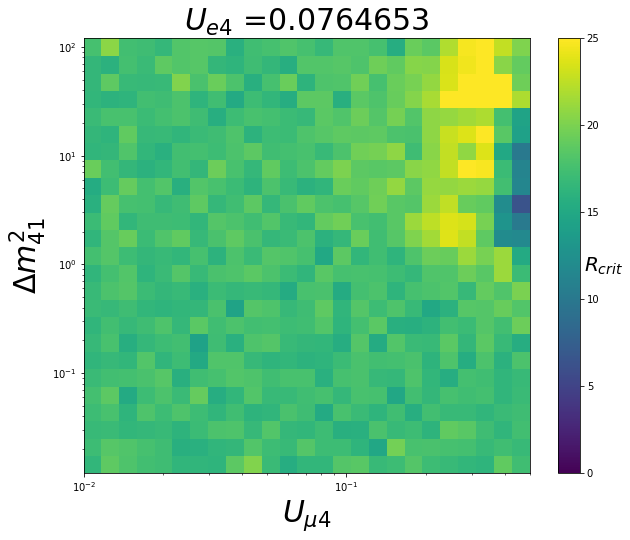

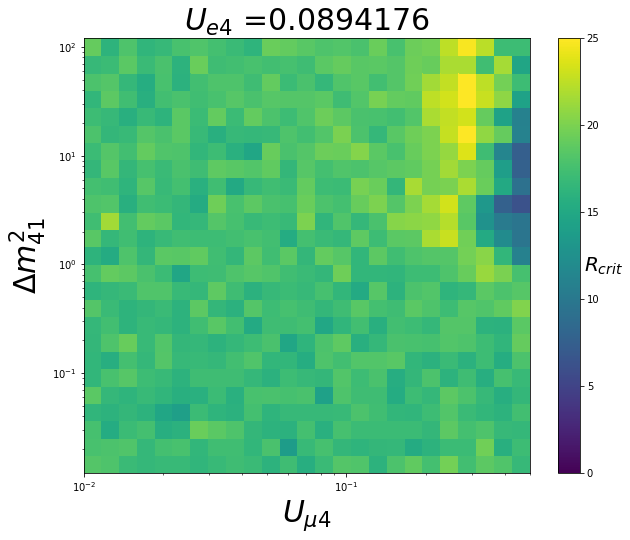

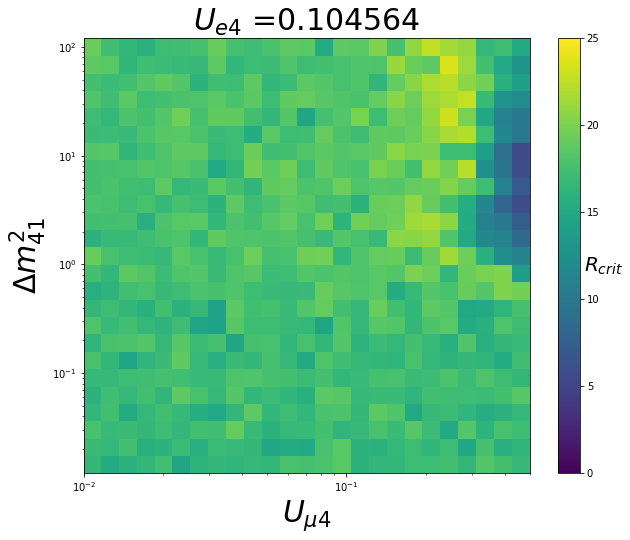

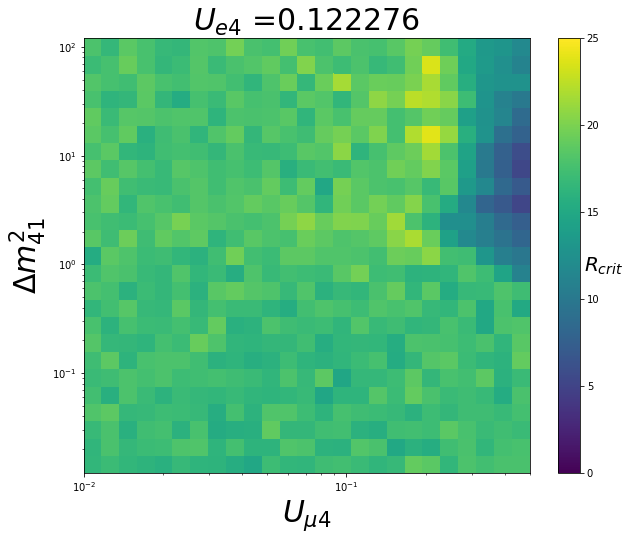

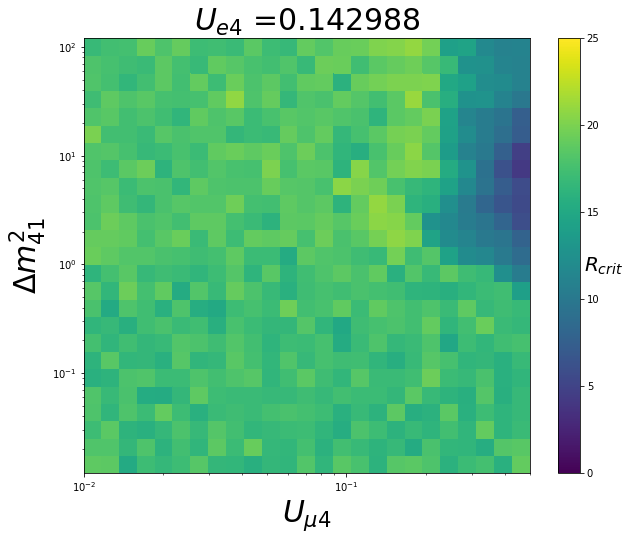

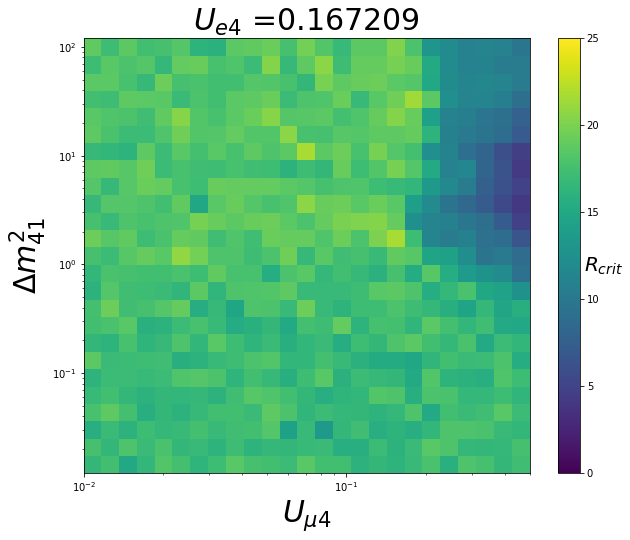

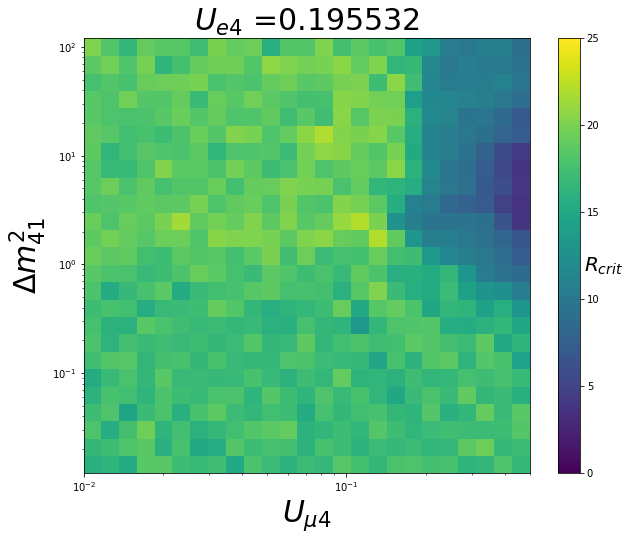

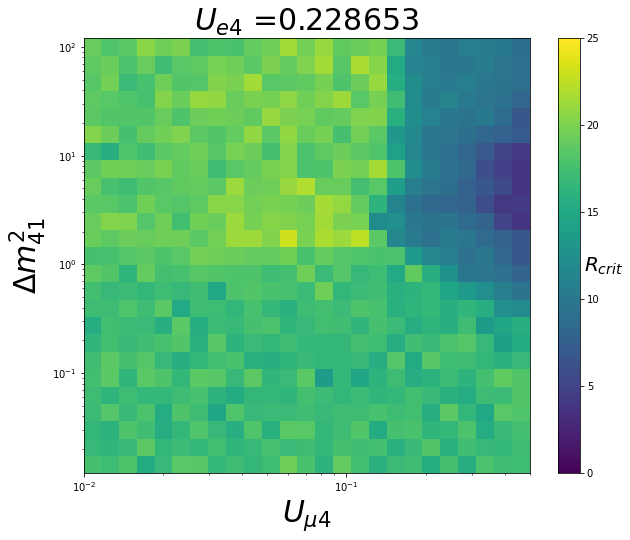

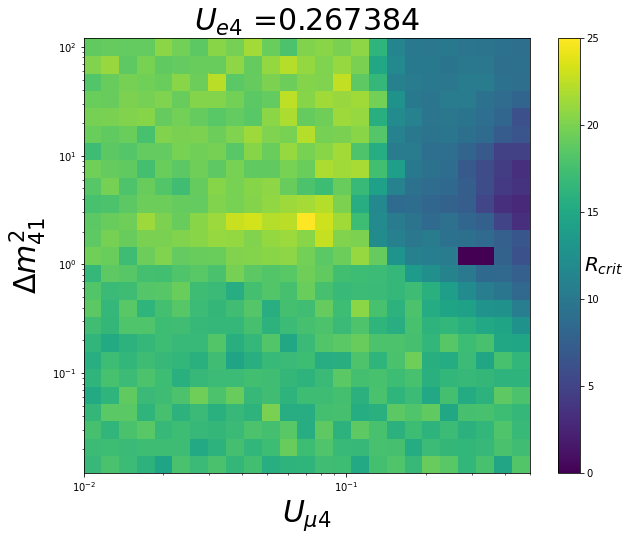

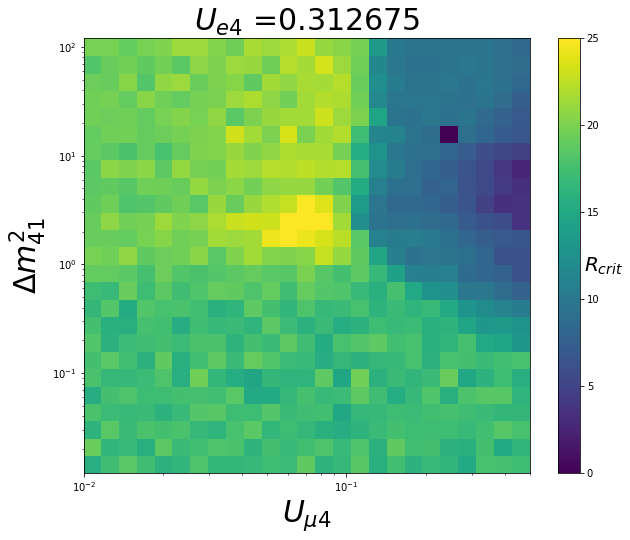

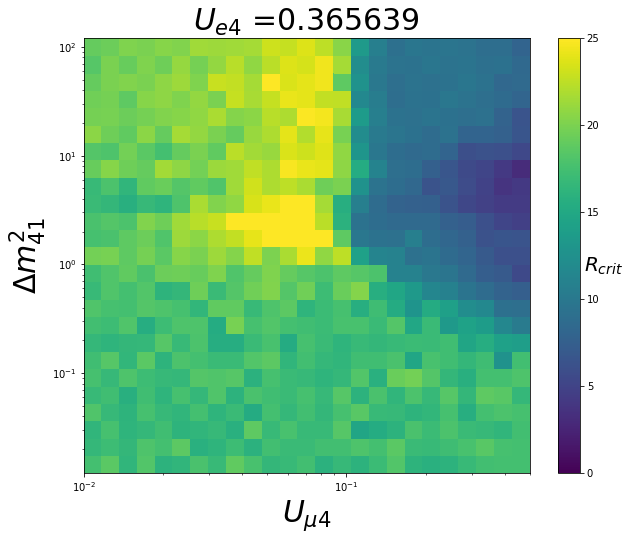

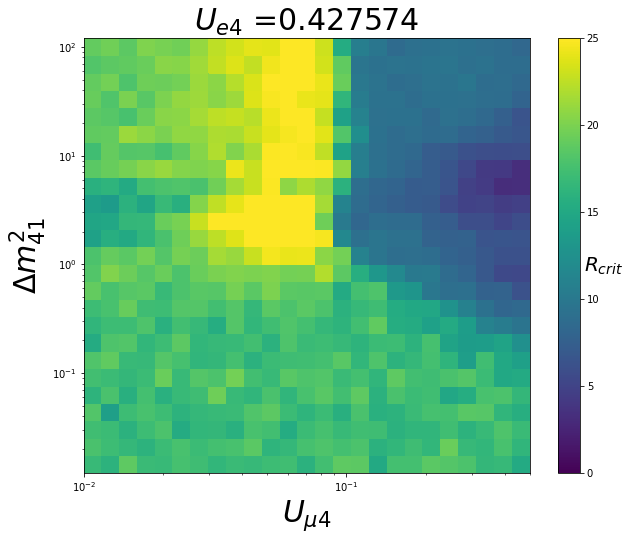

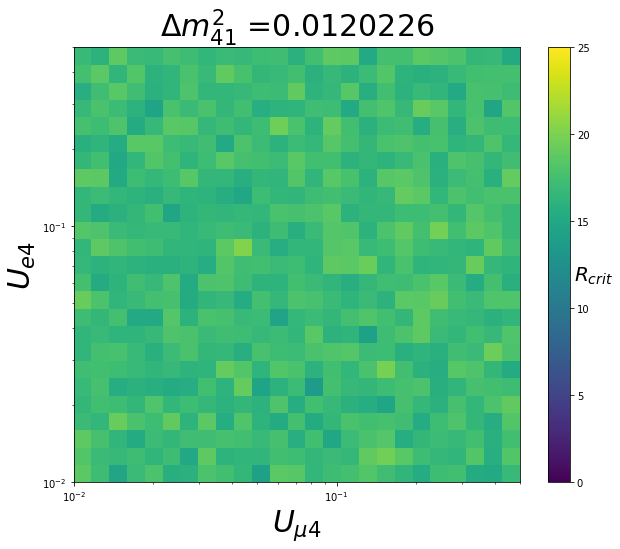

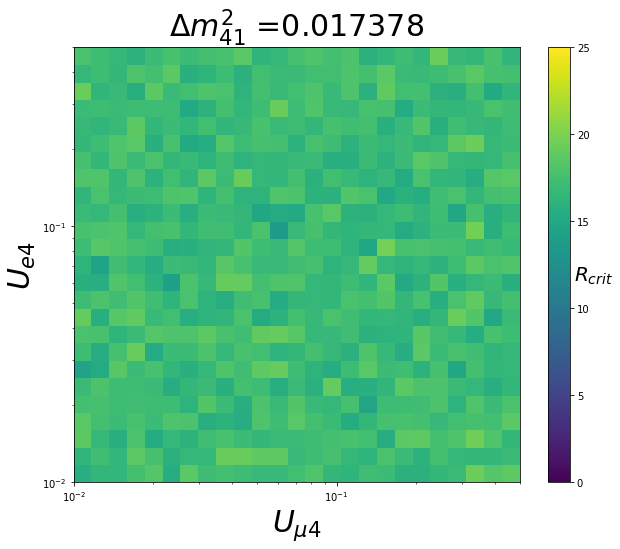

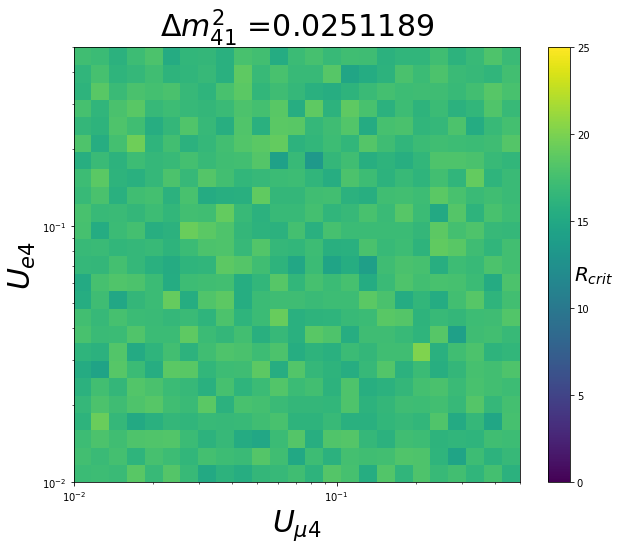

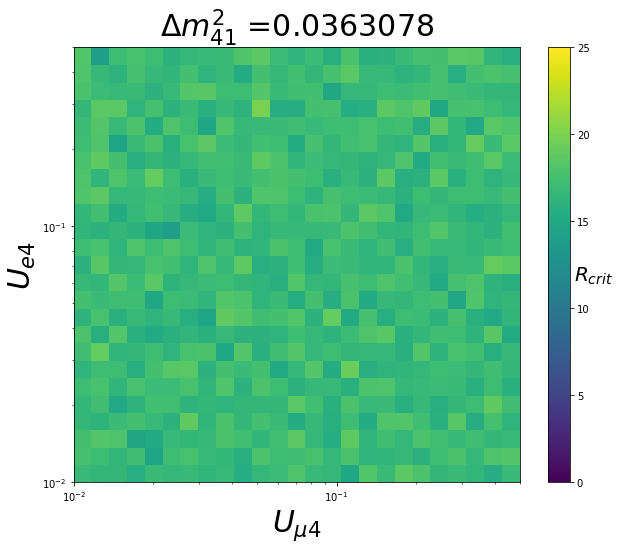

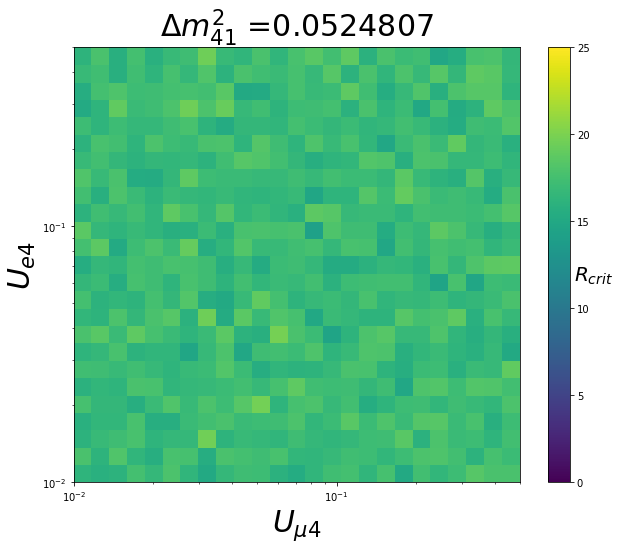

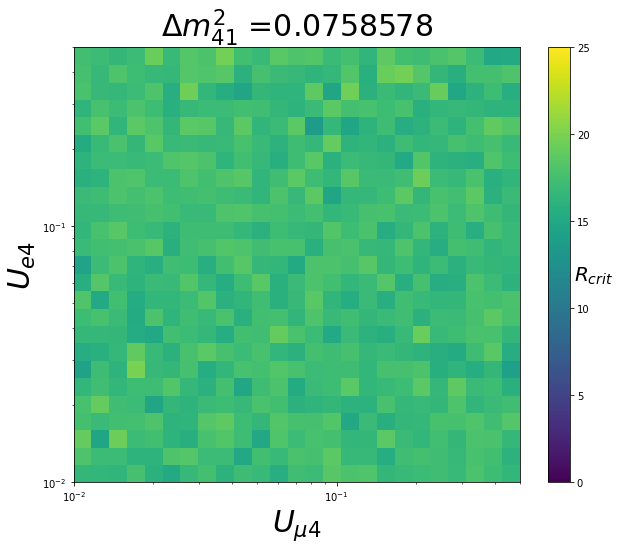

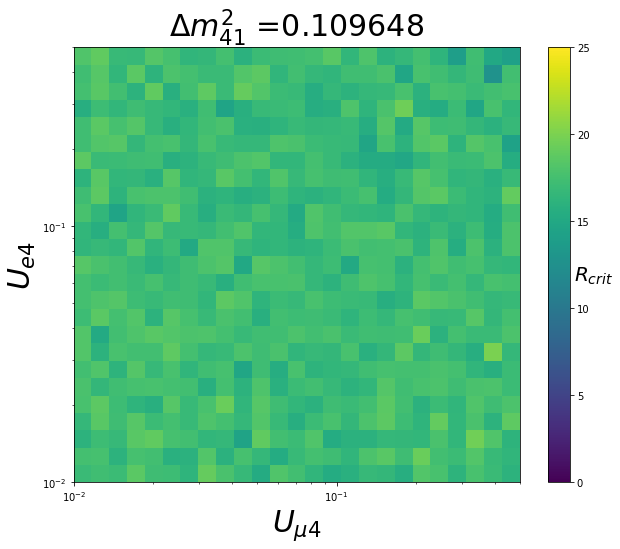

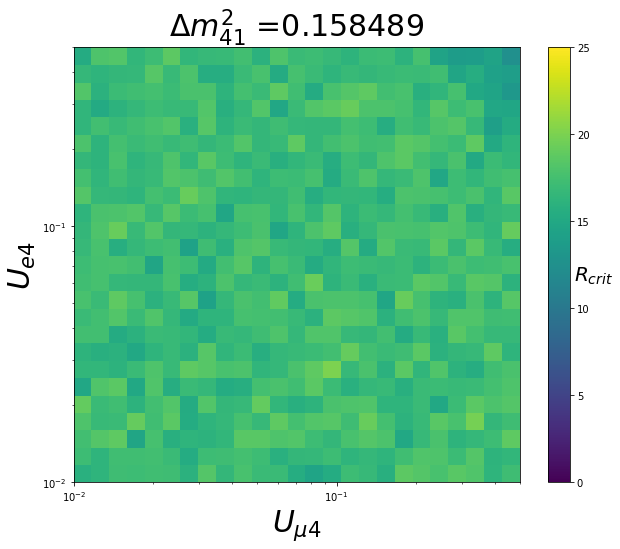

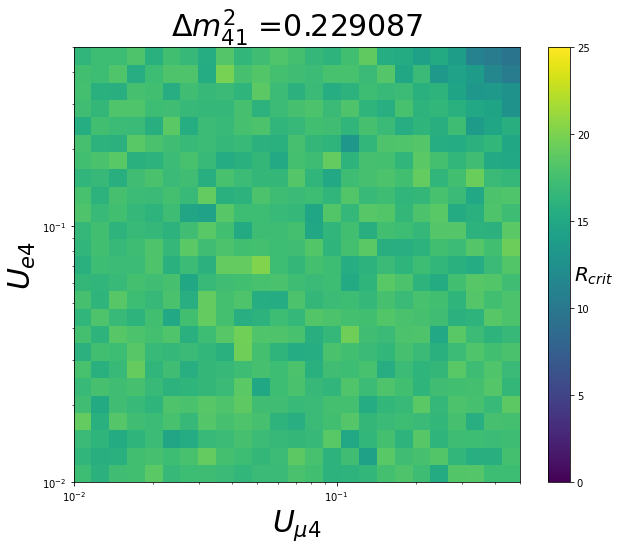

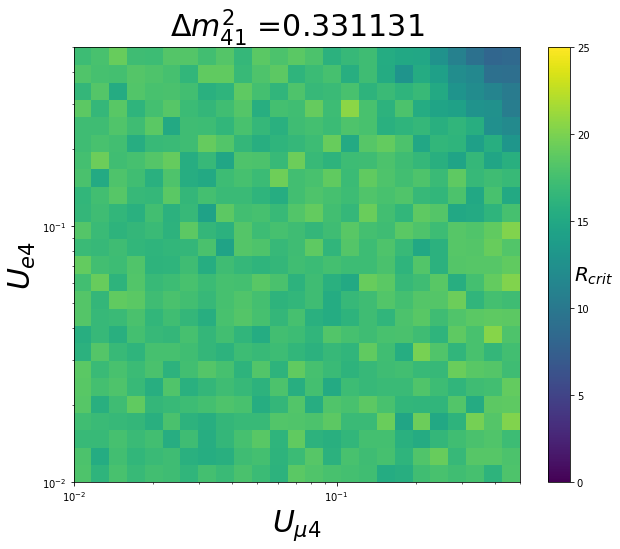

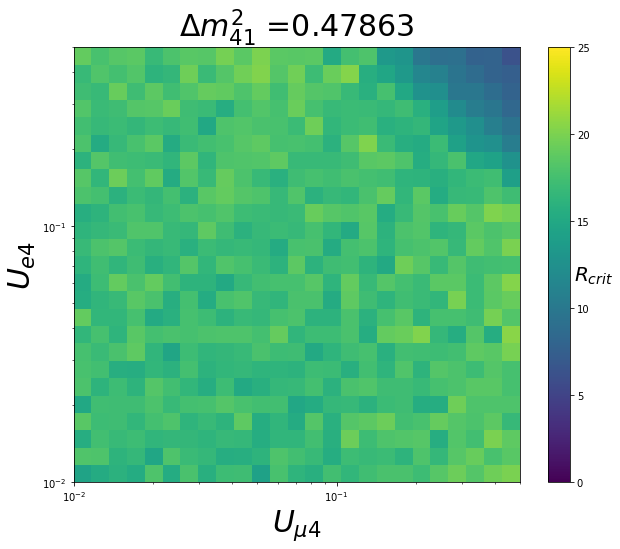

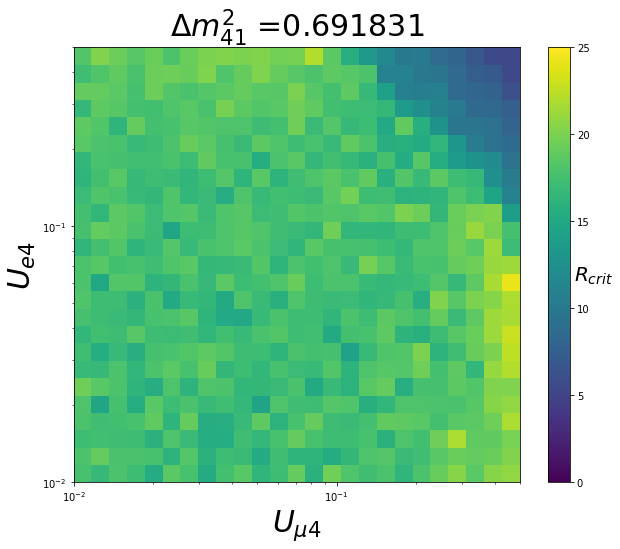

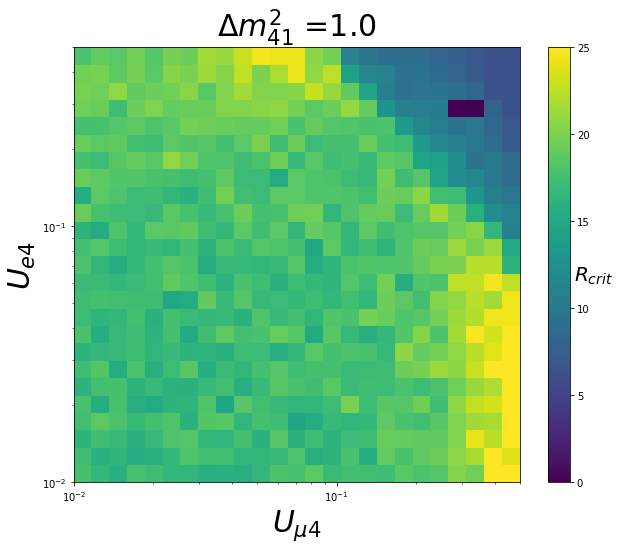

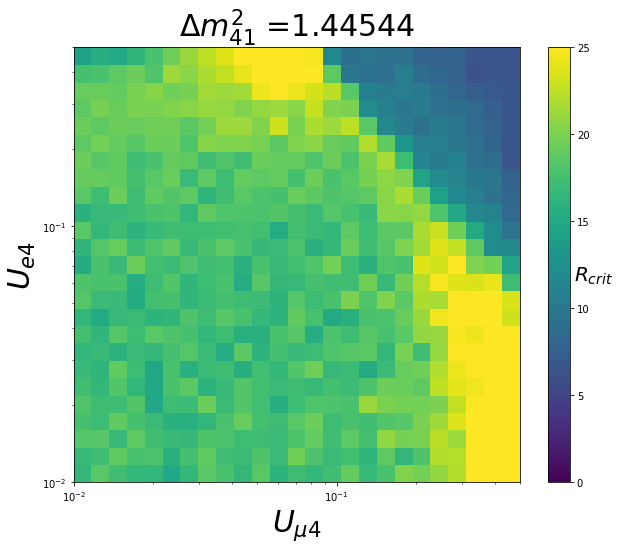

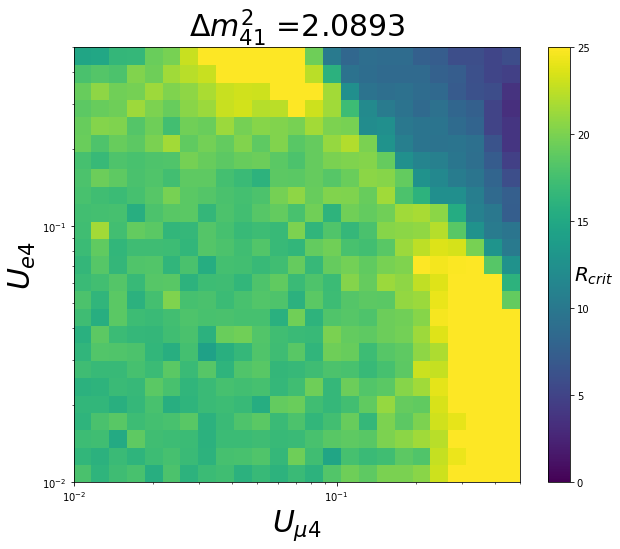

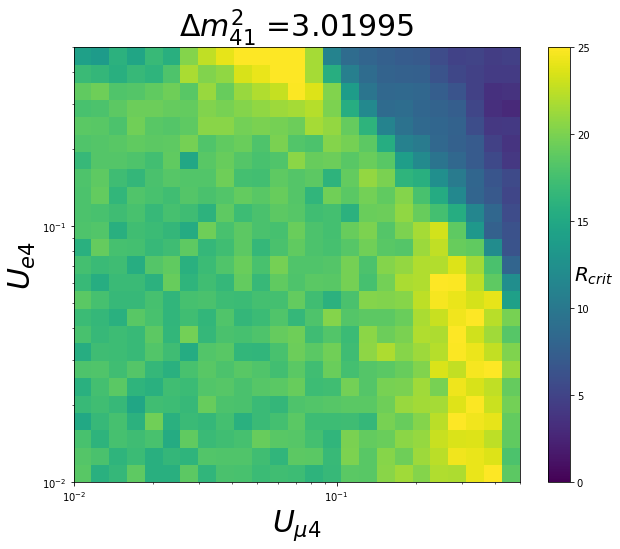

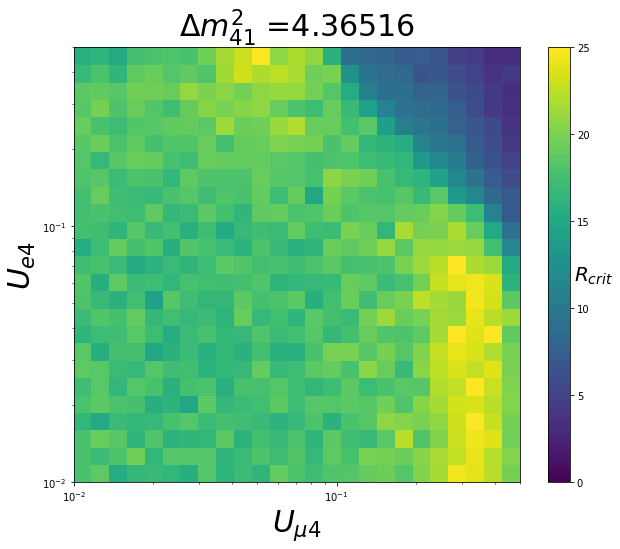

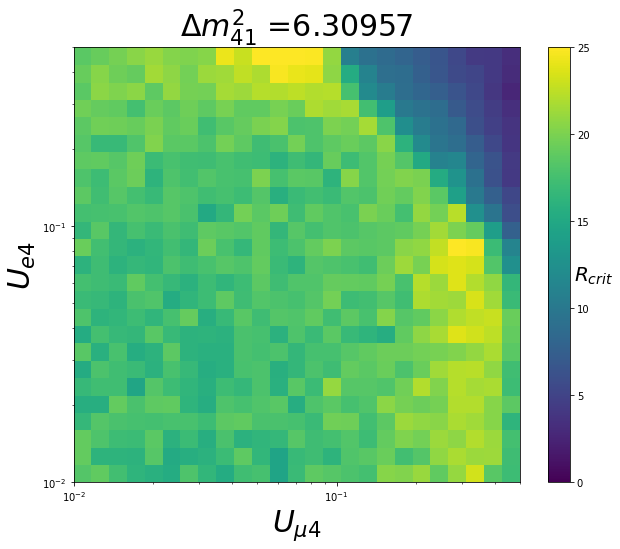

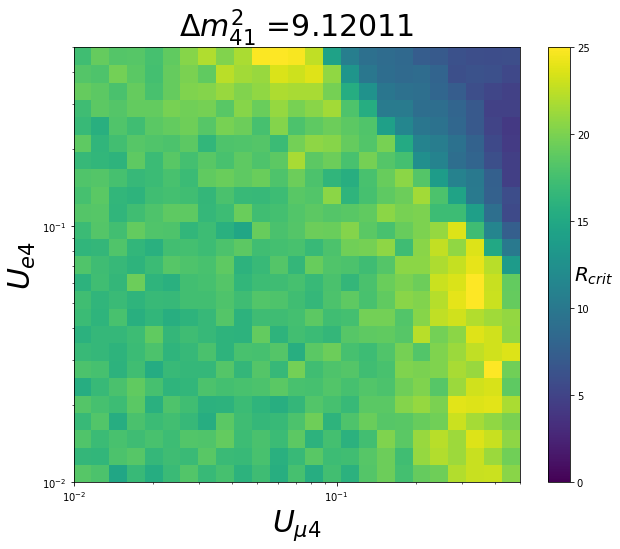

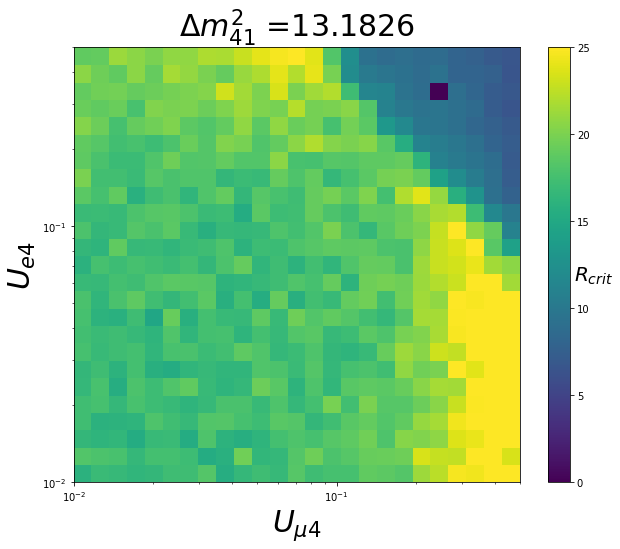

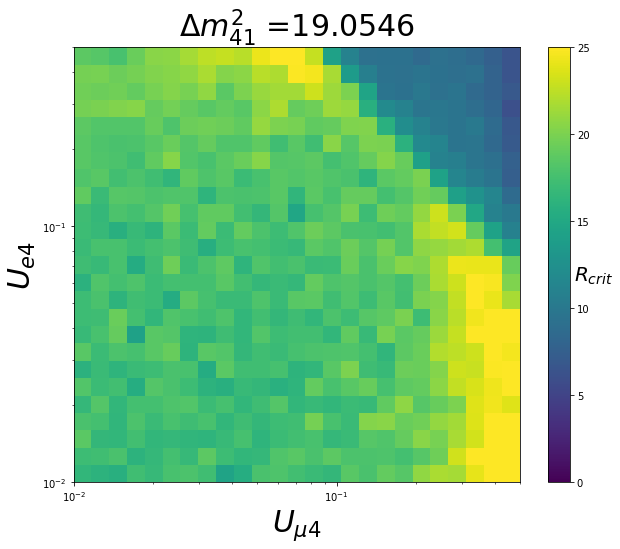

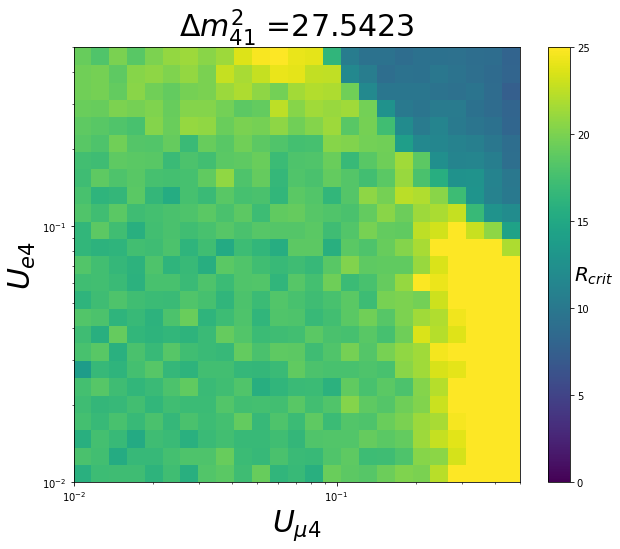

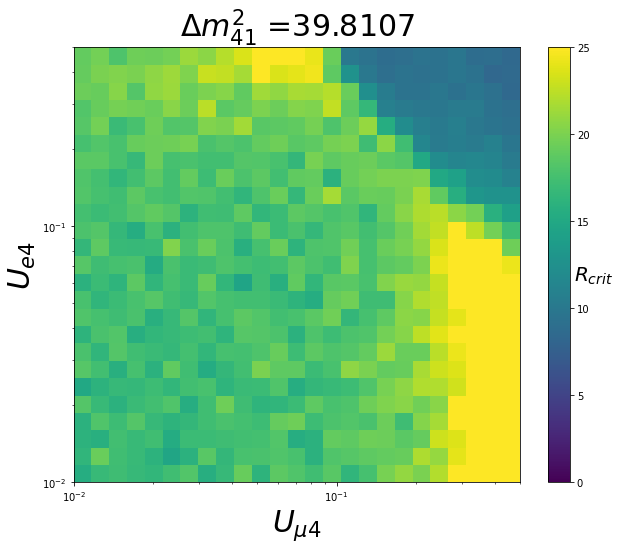

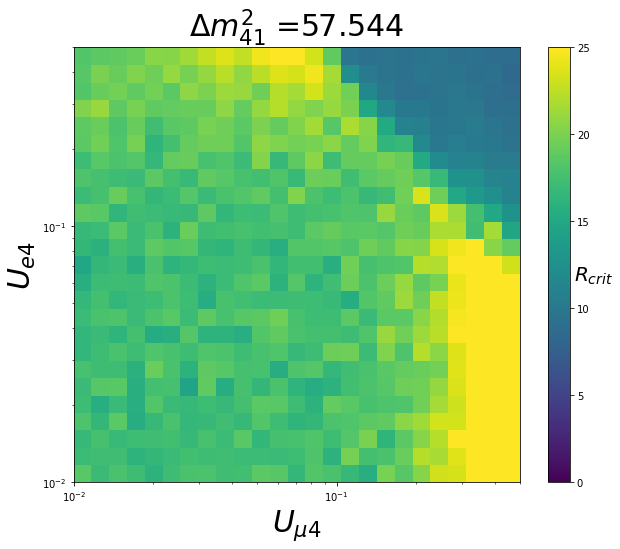

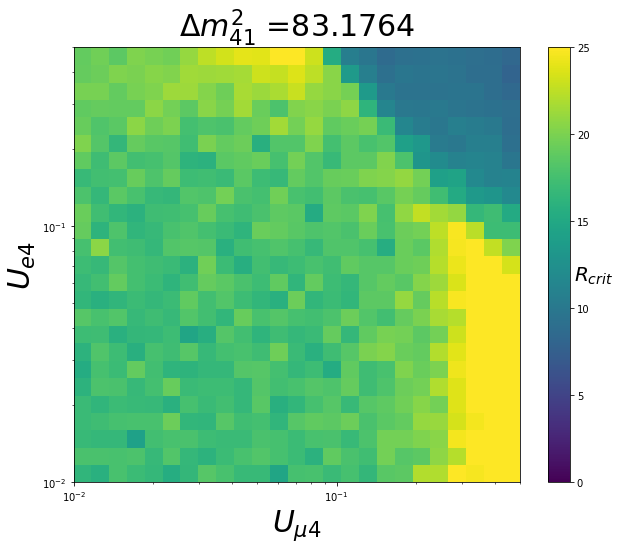

In [8]:
# make all the 3d slices of the Rcrit values
# norm=colors.Normalize(vmin=1e-13, vmax=20)
y,x = np.meshgrid(m41_list, ue4_list)
for i in range(len(um4_center)):
    fig,ax = plt.subplots(figsize=(10,8))
    plt.pcolormesh(x, y, Rcrit_arr[:,:,i],norm=colors.Normalize(vmin=1e-13, vmax=25))
    cbar = plt.colorbar()
    cbar.set_label(r'$R_{crit}$',rotation=0,fontsize=20)
    plt.xlabel(r"$U_{e4}$",fontsize=30)
    plt.ylabel(r"$\Delta m^2_{41}$",fontsize=30)
    plt.title(r"$U_{\mu4}$ ="+str(um4_list[i]),fontsize=30)
    plt.xscale("log")
    plt.yscale("log")
    pkl.dump(fig,open("FC_Rcrit_umu4_"+str(i)+".p",'wb'))
    plt.savefig("FC_Rcrit_umu4_"+str(i)+".png")
    plt.show()
    plt.close()
    
# at ue4
y,x = np.meshgrid(m41_list, um4_list)
for i in range(len(ue4_center)):
    fig,ax = plt.subplots(figsize=(10,8))
    plt.pcolormesh(x, y, Rcrit_arr[i,:,:].transpose(),norm=colors.Normalize(vmin=1e-13, vmax=25))
    cbar = plt.colorbar()
    cbar.set_label(r'$R_{crit}$',rotation=0,fontsize=20)
    plt.xlabel(r"$U_{\mu 4}$",fontsize=30)
    plt.ylabel(r"$\Delta m^2_{41}$",fontsize=30)
    plt.title(r"$U_{e4}$ ="+str(ue4_list[i]),fontsize=30)
    plt.xscale("log")
    plt.yscale("log")
    pkl.dump(fig,open("FC_Rcrit_ue4_"+str(i)+".p",'wb'))
    plt.savefig("FC_Rcrit_ue4_"+str(i)+".png")
    plt.show()
    plt.close()


x,y = np.meshgrid(ue4_list, um4_list)
for i in range(len(ue4_center)):
    fig,ax = plt.subplots(figsize=(10,8))
    plt.pcolormesh(x, y, Rcrit_arr[:,i,:],norm=colors.Normalize(vmin=1e-13, vmax=25))
    cbar = plt.colorbar()
    cbar.set_label(r'$R_{crit}$',rotation=0,fontsize=20)
    plt.ylabel(r"$U_{e4}$",fontsize=30)
    plt.xlabel(r"$U_{\mu4}$",fontsize=30)
    plt.title(r"$\Delta m^2_{41}$ ="+str(m41_list[i]),fontsize=30)
    plt.xscale("log")
    plt.yscale("log")
    pkl.dump(fig,open("FC_Rcrit_m41_"+str(i)+".p",'wb'))
    plt.savefig("FC_Rcrit_m41_"+str(i)+".png")
    plt.show()
    plt.close()


Get Sensitivity results

In [9]:
# load in sensitivity results (data==null)
# each row represents a grid point
chi2_arr=[]
with open("chis_sens.txt","r") as chis:
    lines = chis.readlines()
    for line in lines:
        chi2_arr.append(float(line))
                        
# change chi2 arr to 25x25x25 for 3d plot
chi_arr_sens=np.zeros((25,25,25))
minpt =1000000
for pt in range(len(chi2_arr)):
    if chi2_arr[pt]<minpt: 
        minpt = chi2_arr[pt]
print(minpt)

sumex=0
for i in range(len(chi2_arr)):
    chi2_arr[i]=chi2_arr[i]-minpt
    val = chi2_arr[i]
    if (val > R_list[i]):
        sumex+=1
        
print("excluded grid points(FC)",sumex,float(sumex)/float(len(chi2_arr)))

for pt in range(len(chi2_arr)):
    #this is a mess, but works. Didn't want to hardcode any numbers
    m_id = math.floor(pt/((25)*(25)))
    ue4_id = math.floor((pt-m_id*(25)*(25))/(25))
    um4_id = pt % (25)
    chi_arr_sens[ue4_id][m_id][um4_id]=chi2_arr[pt]

130.157
excluded grid points(FC) 998 0.063872


In [10]:
confidence_arr=np.copy(chi_arr_sens)
confidence_arr_w=np.copy(chi_arr_sens)
for i in range(25):
    for j in range(25):
        for k in range(25):
            delta=chi_arr_sens[i][j][k]
#             print(i,j,k,delta)
            # FC excluded?
            if delta < Rcrit_arr[i][j][k]:
                confidence_arr[i][j][k] = 0
            else:
                confidence_arr[i][j][k] = 1 
            # Wilks' excluded?
            if delta < 6.25:
                confidence_arr_w[i][j][k] = 0
            else:
                confidence_arr_w[i][j][k] = 1 
            

/usr/lib/python3/dist-packages/ipykernel_launcher.py:14: UserWarning: The following kwargs were not used by contour: 'fontsize', 'label'
  
/usr/lib/python3/dist-packages/ipykernel_launcher.py:15: UserWarning: The following kwargs were not used by contour: 'fontsize', 'label'
  from ipykernel import kernelapp as app


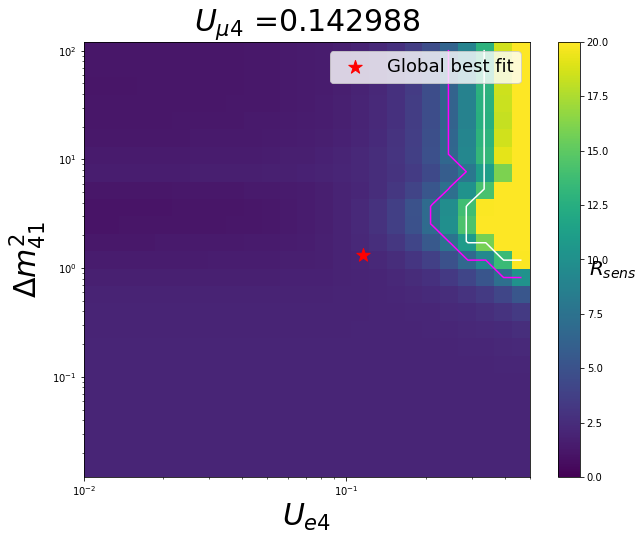

/usr/lib/python3/dist-packages/ipykernel_launcher.py:36: UserWarning: The following kwargs were not used by contour: 'fontsize'
/usr/lib/python3/dist-packages/ipykernel_launcher.py:37: UserWarning: The following kwargs were not used by contour: 'fontsize', 'label'


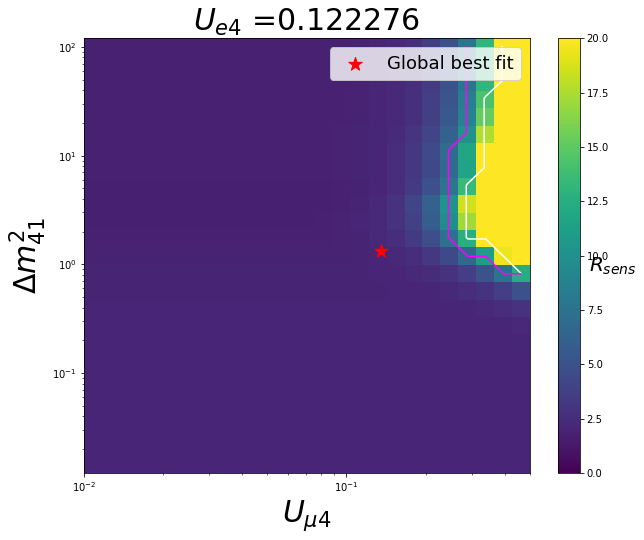

/usr/lib/python3/dist-packages/ipykernel_launcher.py:58: UserWarning: The following kwargs were not used by contour: 'fontsize'
/usr/lib/python3/dist-packages/ipykernel_launcher.py:59: UserWarning: The following kwargs were not used by contour: 'fontsize', 'label'


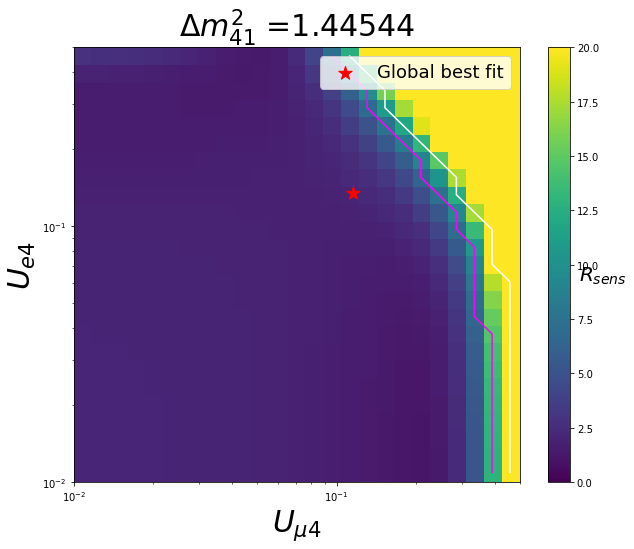

In [11]:
# make projections at global best fit
def fmt(x):
    s = f"{x*100:.0f}"
    return rf"{s} \%" if plt.rcParams["text.usetex"] else f"{s} %"

# at umu4: 
y,x = np.meshgrid(m41_list, ue4_list)
fig,ax = plt.subplots(figsize=(10,8))
plt.pcolormesh(x, y, chi_arr_sens[:,:,17],norm=colors.Normalize(vmin=1e-13, vmax=20))
cbar = plt.colorbar()
cbar.set_label(r'$R_{sens}$',rotation=0,fontsize=20)
#contour plots
y,x = np.meshgrid(m41_center, ue4_center)
contours = plt.contour(x, y, confidence_arr[:,:,17],[.9], colors='white',fontsize=20,label="FC 90% CL")
contours = plt.contour(x, y, confidence_arr_w[:,:,17],[.9], colors='magenta',fontsize=20,label="wilks 90% CL")
plt.scatter([.116],[1.32],marker="*",color ="red",label="Global best fit",s=200)
plt.xlabel(r"$U_{e4}$",fontsize=30)
plt.ylabel(r"$\Delta m^2_{41}$",fontsize=30)
plt.title(r"$U_{\mu4}$ ="+str(um4_list[17]),fontsize=30)
plt.xscale("log")
plt.yscale("log")
plt.legend(fontsize=18)
pkl.dump(fig,open("FC_sens_umu4_bf.p",'wb'))
plt.savefig("FC_sens_umu4_bf.png")
plt.show()
plt.close()

# at ue4
y,x = np.meshgrid(m41_list, um4_list)
fig,ax = plt.subplots(figsize=(10,8))
plt.pcolormesh(x, y, chi_arr_sens[16,:,:].transpose(),norm=colors.Normalize(vmin=1e-13, vmax=20))
cbar = plt.colorbar()
cbar.set_label(r'$R_{sens}$',rotation=0,fontsize=20)
#contour plots
y,x= np.meshgrid(m41_center, um4_center)
contours = plt.contour(x, y, confidence_arr[16,:,:].transpose(),[.9], colors='white',fontsize=20)
contours = plt.contour(x, y, confidence_arr_w[16,:,:].transpose(),[.9], colors='magenta',fontsize=20,label="wilks 90% CL")
plt.scatter([.135],[1.32],marker="*",color ="red",label="Global best fit",s=200)
plt.xlabel(r"$U_{\mu 4}$",fontsize=30)
plt.ylabel(r"$\Delta m^2_{41}$",fontsize=30)
plt.title(r"$U_{e4}$ ="+str(ue4_list[16]),fontsize=30)
plt.xscale("log")
plt.yscale("log")
plt.legend(fontsize=18)
pkl.dump(fig,open("FC_sens_ue4_bf.p",'wb'))
plt.savefig("FC_sens_ue4_bf.png")
plt.show()
plt.close()


x,y = np.meshgrid(ue4_list, um4_list)
fig,ax = plt.subplots(figsize=(10,8))
plt.pcolormesh(x, y, chi_arr_sens[:,13,:],norm=colors.Normalize(vmin=1e-13, vmax=20))
cbar = plt.colorbar()
cbar.set_label(r'$R_{sens}$',rotation=0,fontsize=20)
#contour plots
x,y = np.meshgrid(ue4_center, um4_center)
contours = plt.contour(x, y, confidence_arr[:,13,:],[.9], colors='white',fontsize=20)
contours = plt.contour(x, y, confidence_arr_w[:,13,:],[.9], colors='magenta',fontsize=20,label="wilks 90% CL")
plt.scatter([.116],[.135],marker="*",color ="red",label="Global best fit",s=200)
plt.ylabel(r"$U_{e4}$",fontsize=30)
plt.xlabel(r"$U_{\mu4}$",fontsize=30)
plt.title(r"$\Delta m^2_{41}$ ="+str(m41_list[13]),fontsize=30)
plt.xscale("log")
plt.yscale("log")
plt.legend(fontsize=18)
pkl.dump(fig,open("FC_sens_m41_bf.p",'wb'))
plt.savefig("FC_sens_m41_bf.png")
plt.show()
plt.close()

/usr/lib/python3/dist-packages/ipykernel_launcher.py:9: UserWarning: No contour levels were found within the data range.
  if __name__ == '__main__':
/usr/lib/python3/dist-packages/ipykernel_launcher.py:9: UserWarning: The following kwargs were not used by contour: 'fontsize', 'label'
  if __name__ == '__main__':
/usr/lib/python3/dist-packages/ipykernel_launcher.py:10: UserWarning: No contour levels were found within the data range.
  # Remove the CWD from sys.path while we load stuff.
/usr/lib/python3/dist-packages/ipykernel_launcher.py:10: UserWarning: The following kwargs were not used by contour: 'fontsize', 'label'
  # Remove the CWD from sys.path while we load stuff.


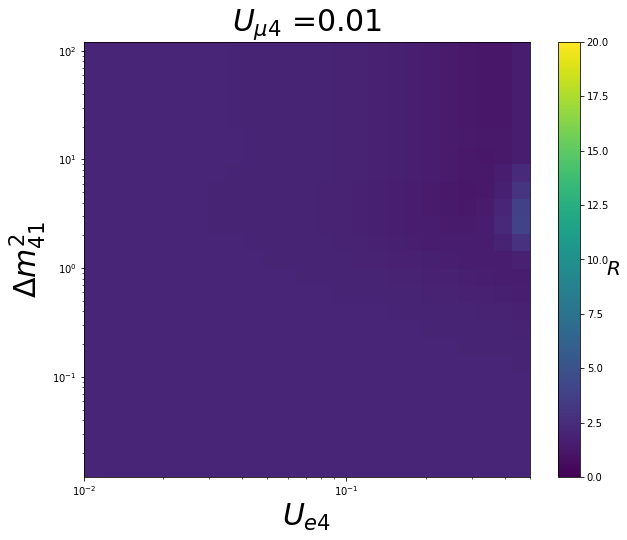

/usr/lib/python3/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  after removing the cwd from sys.path.


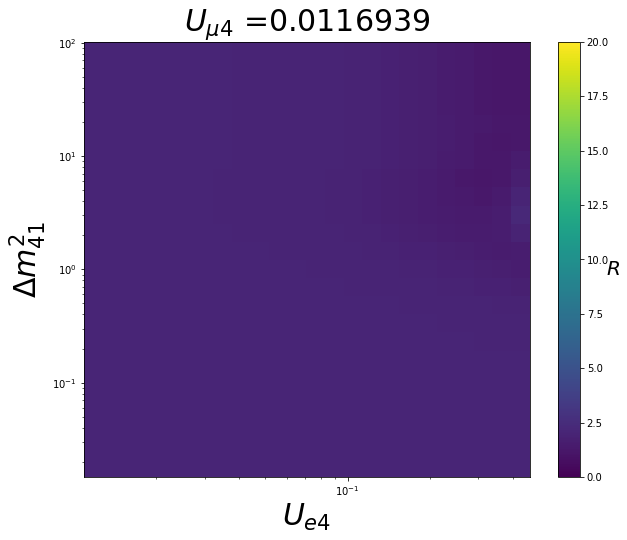

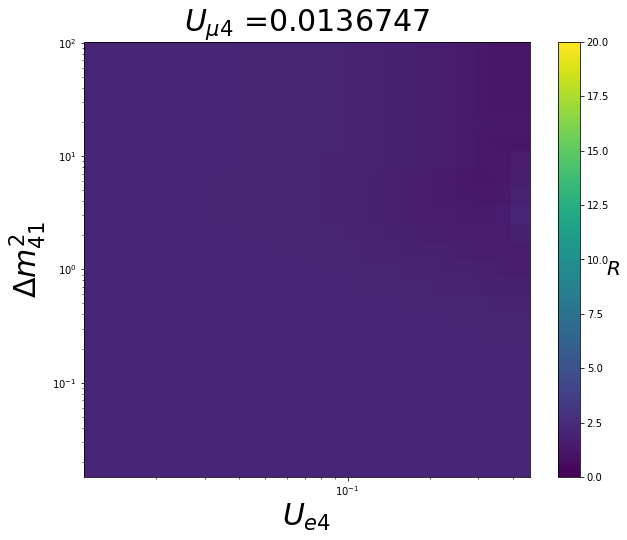

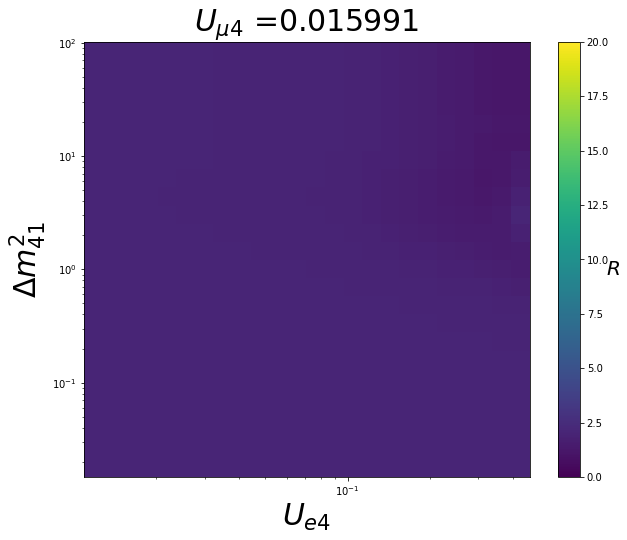

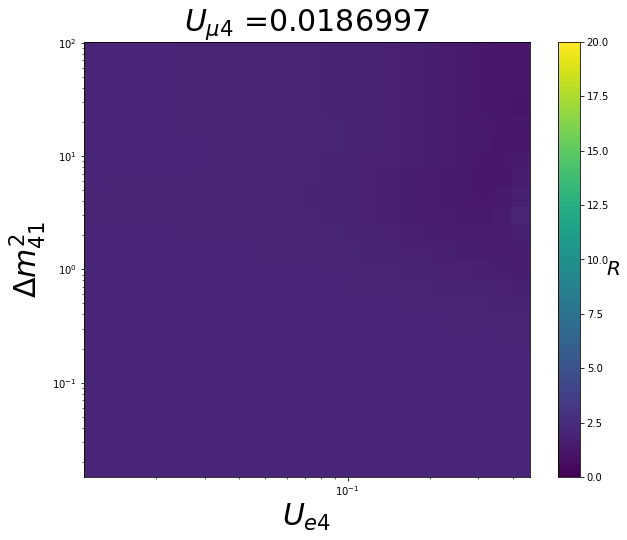

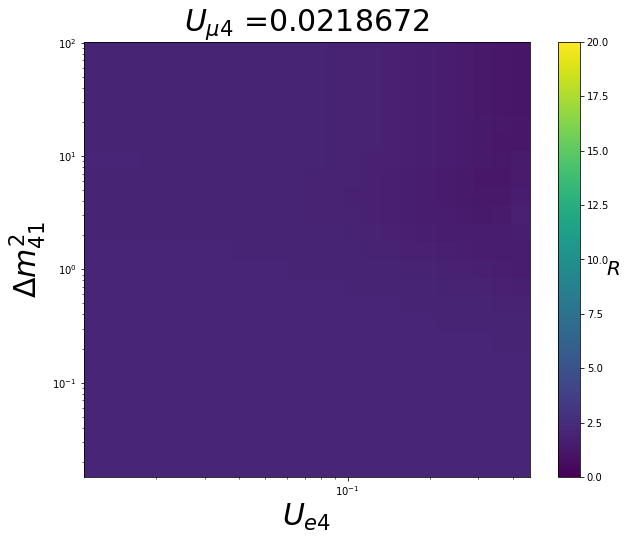

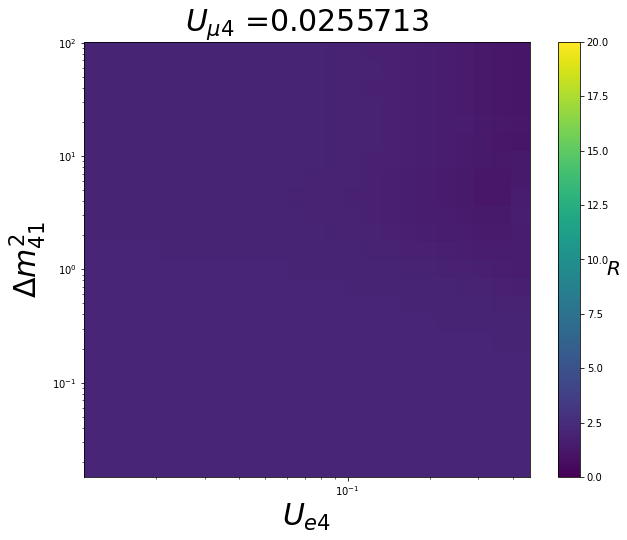

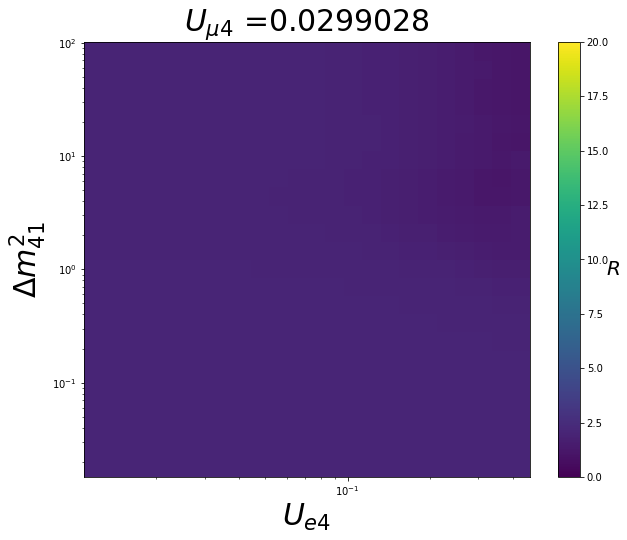

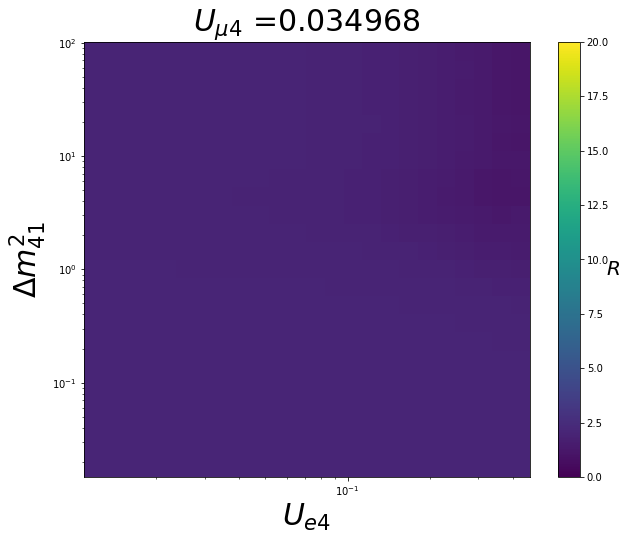

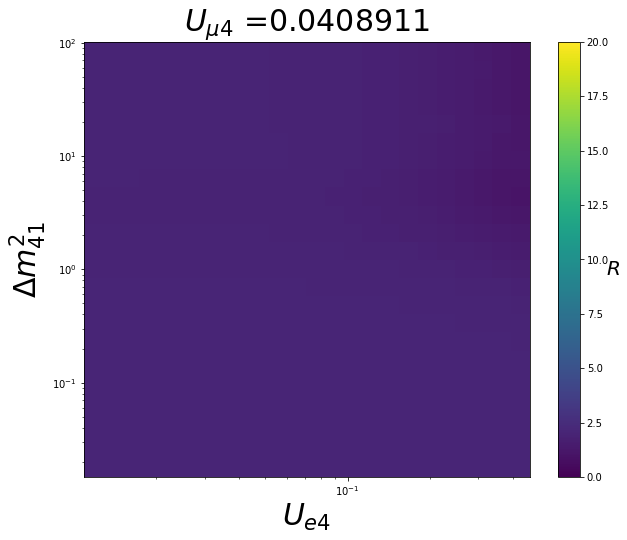

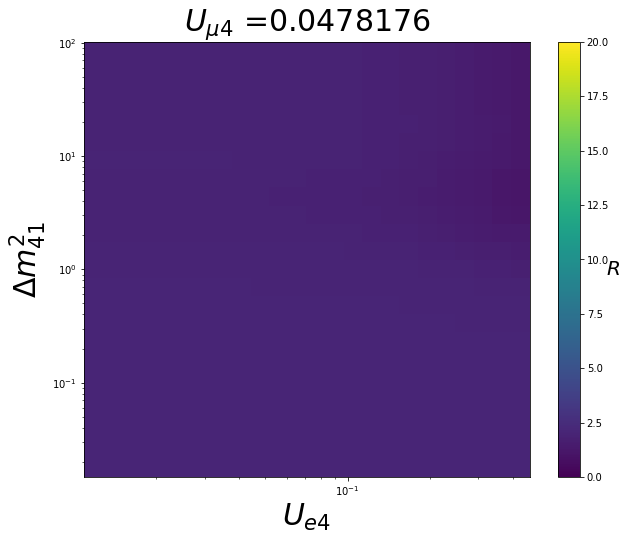

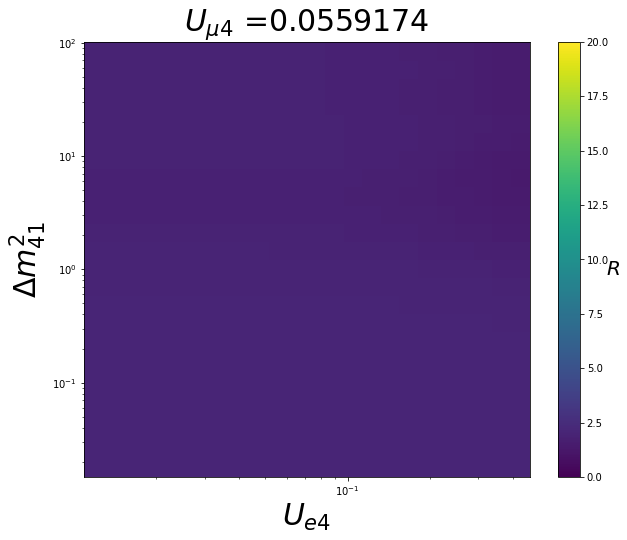

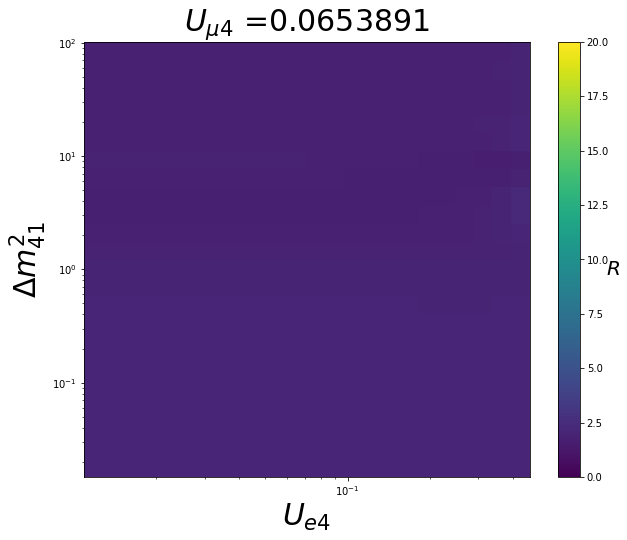

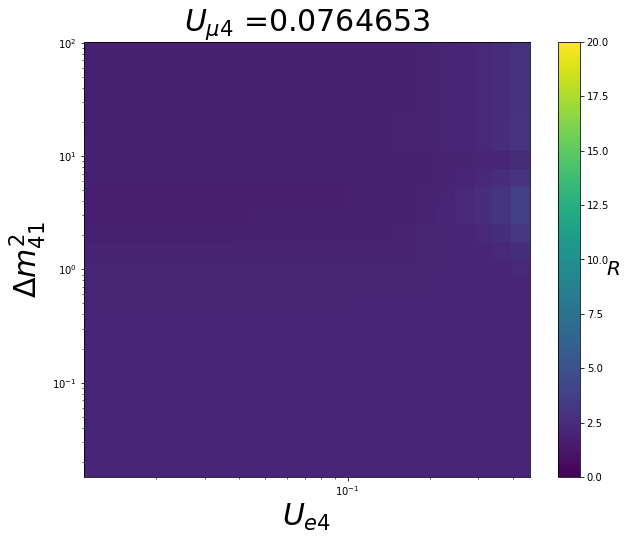

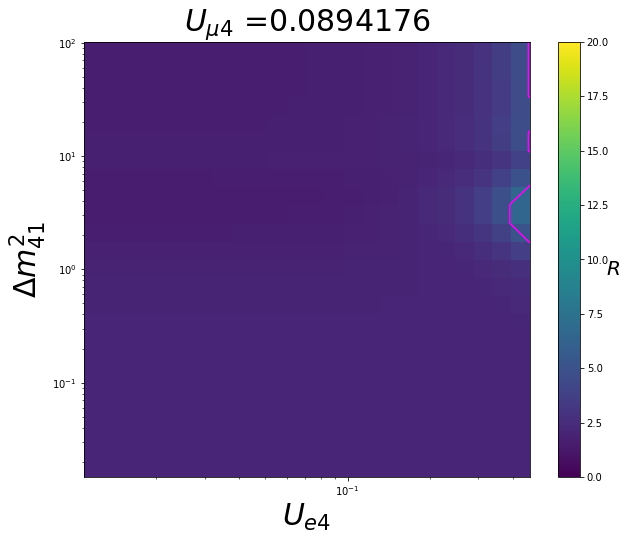

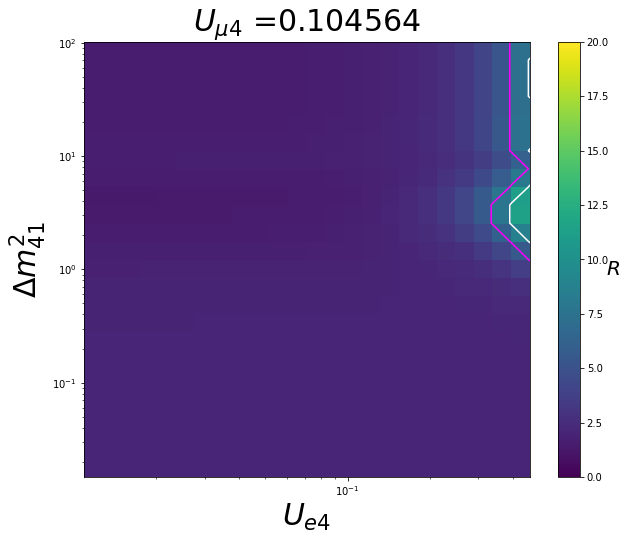

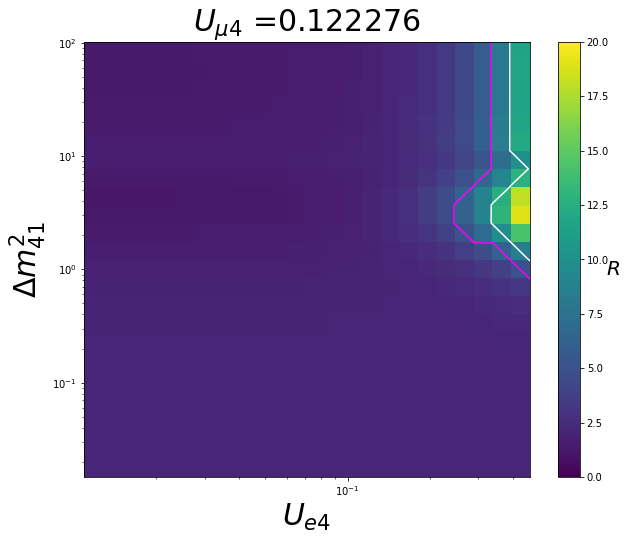

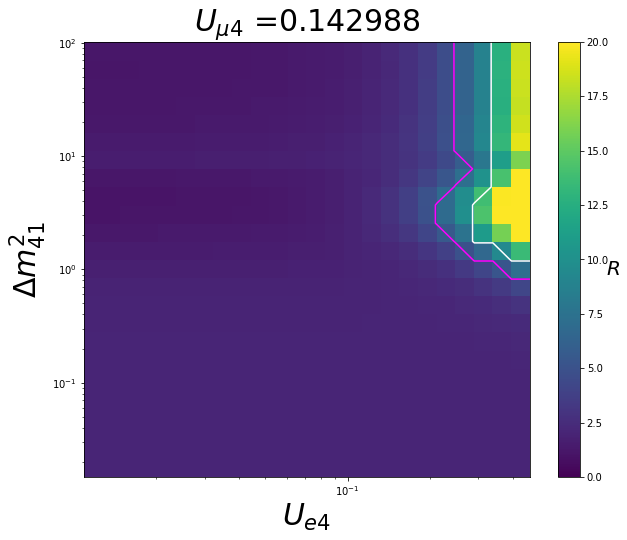

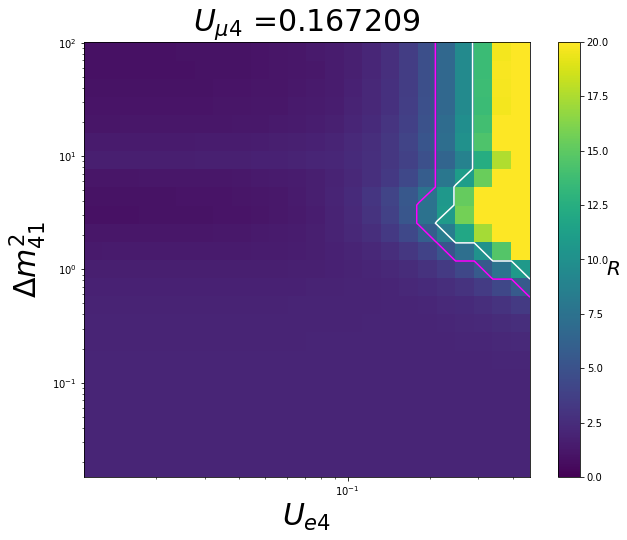

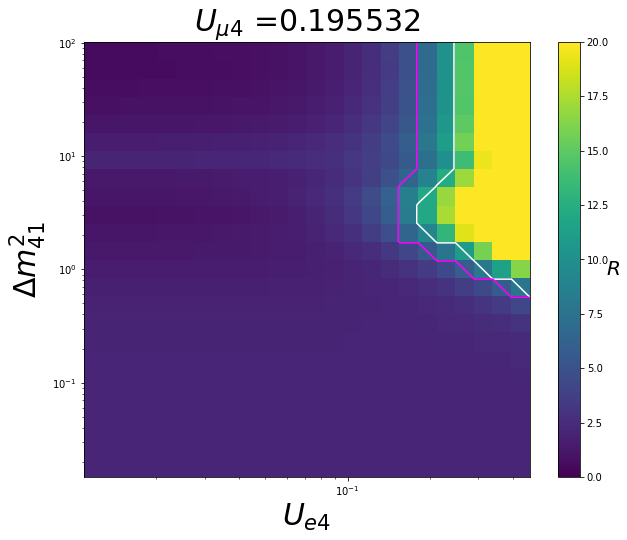

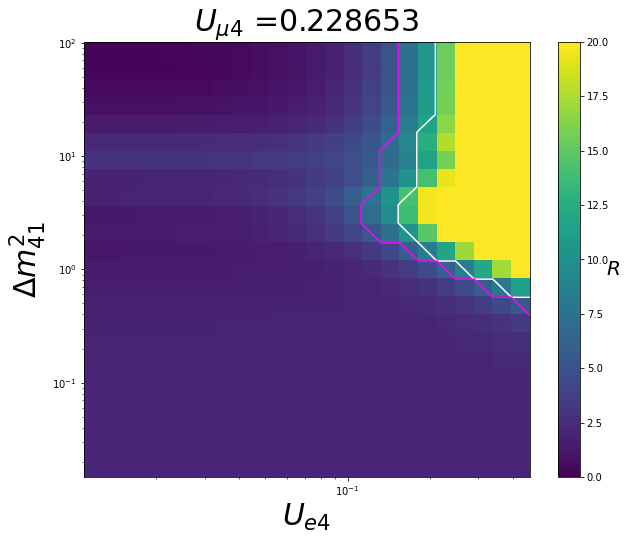

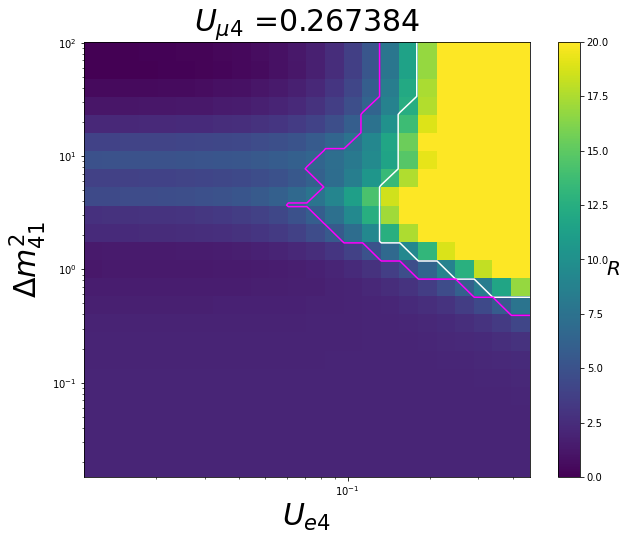

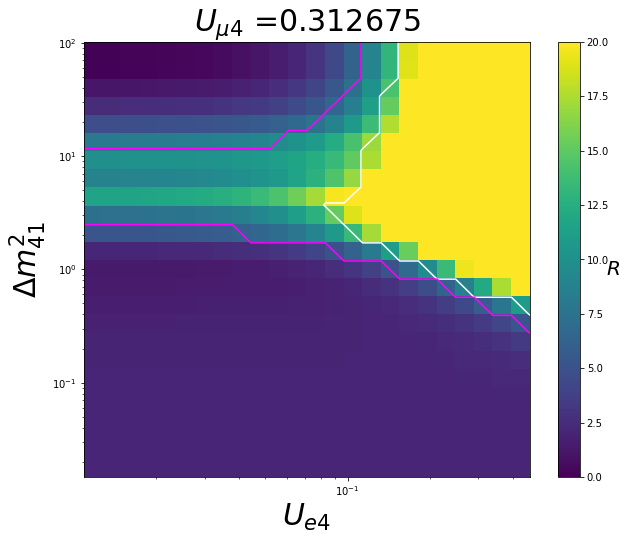

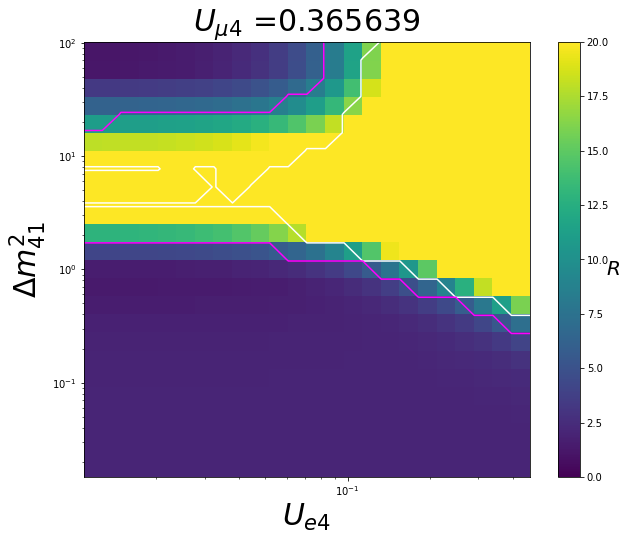

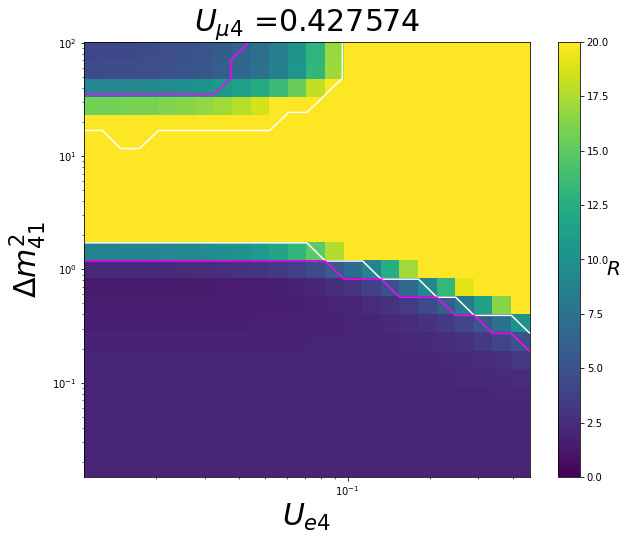

/usr/lib/python3/dist-packages/ipykernel_launcher.py:30: UserWarning: The following kwargs were not used by contour: 'fontsize'
/usr/lib/python3/dist-packages/ipykernel_launcher.py:31: UserWarning: The following kwargs were not used by contour: 'fontsize', 'label'


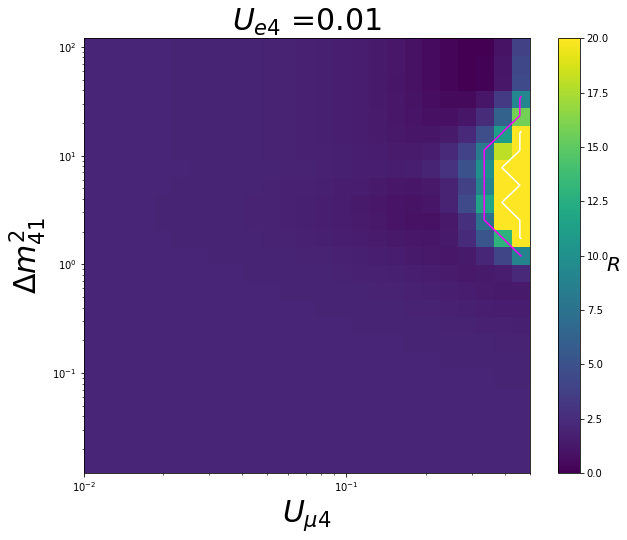

/usr/lib/python3/dist-packages/ipykernel_launcher.py:25: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


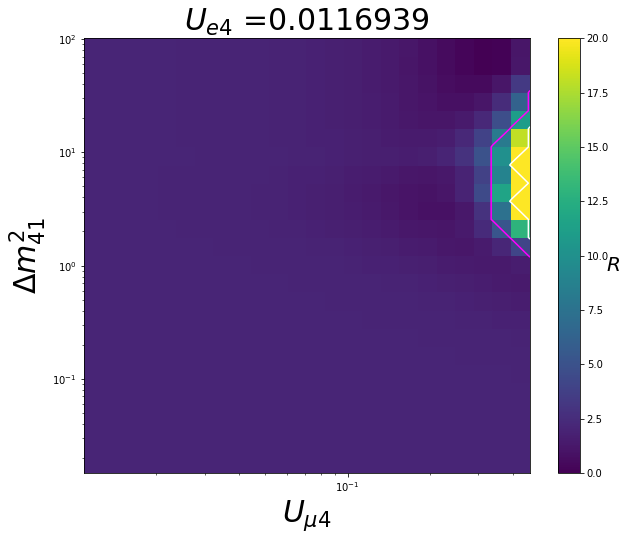

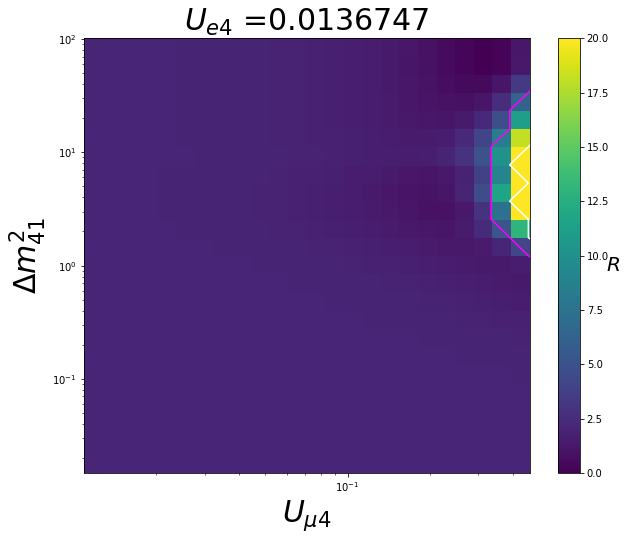

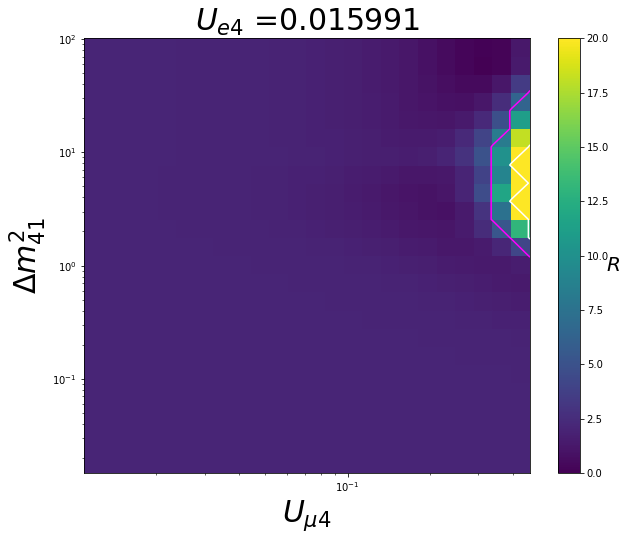

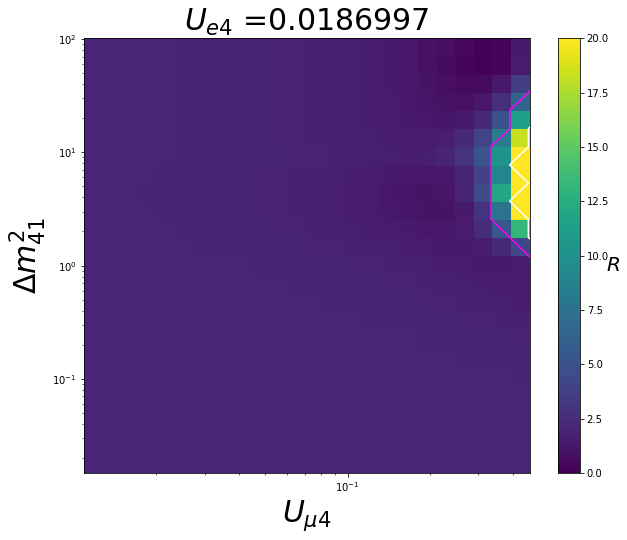

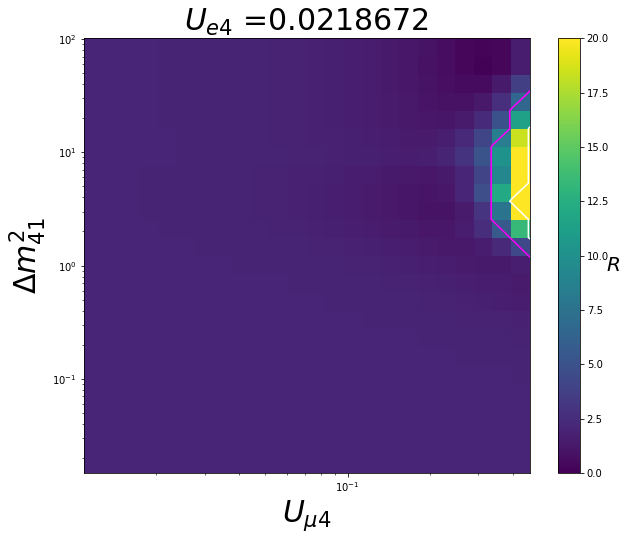

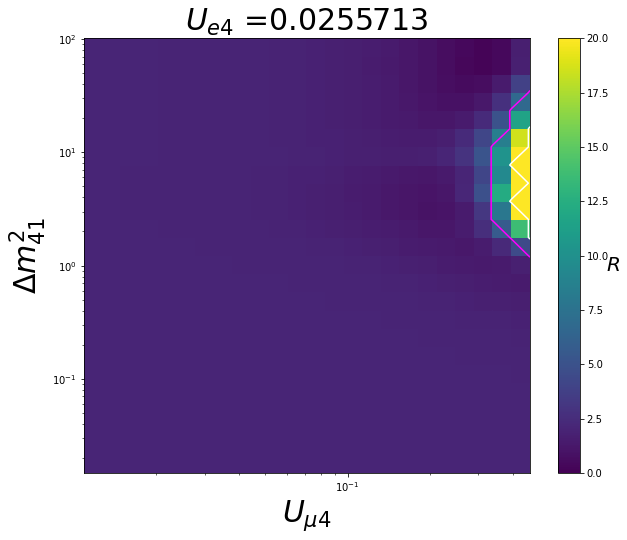

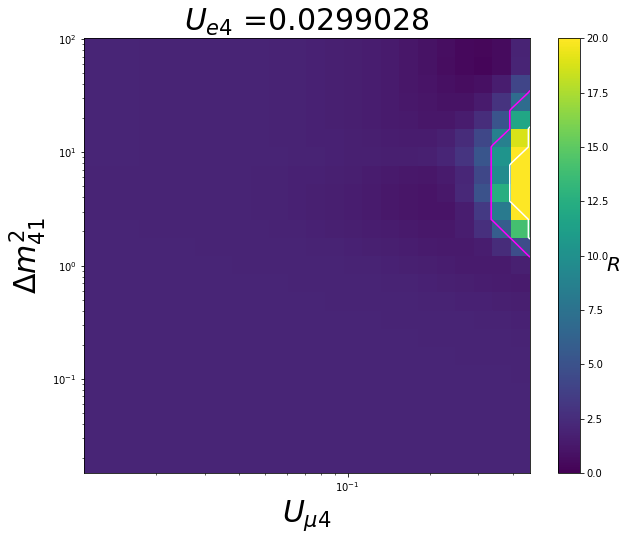

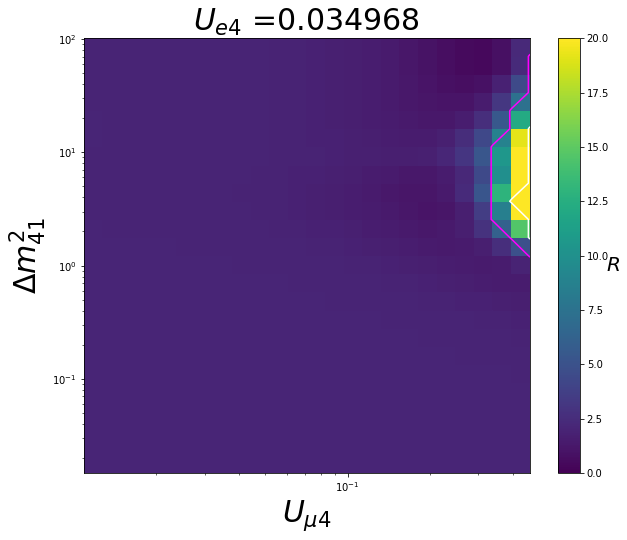

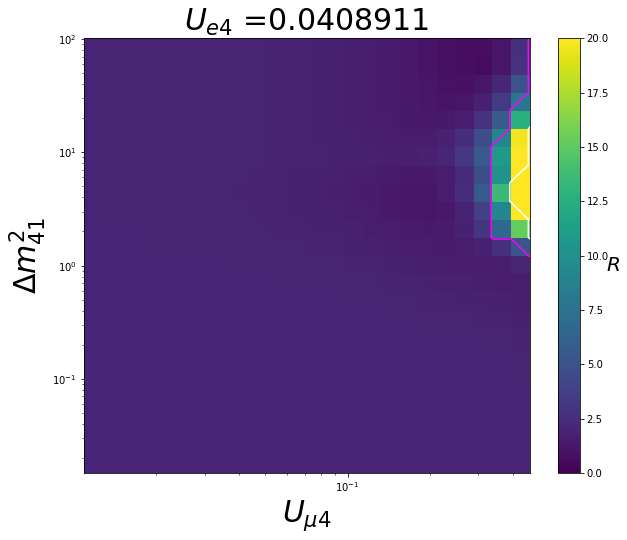

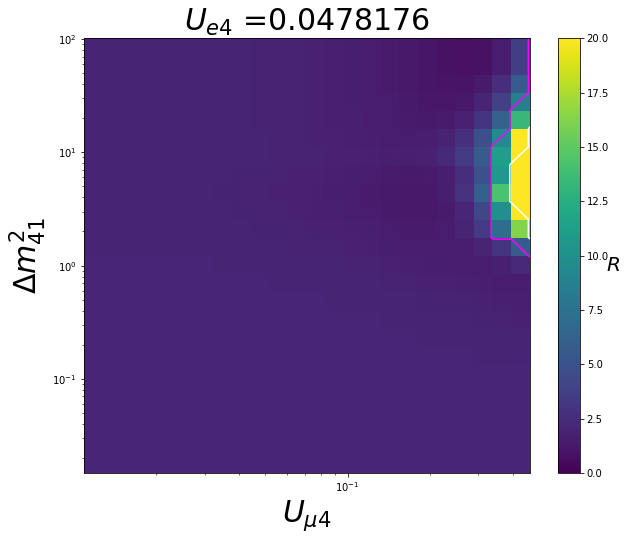

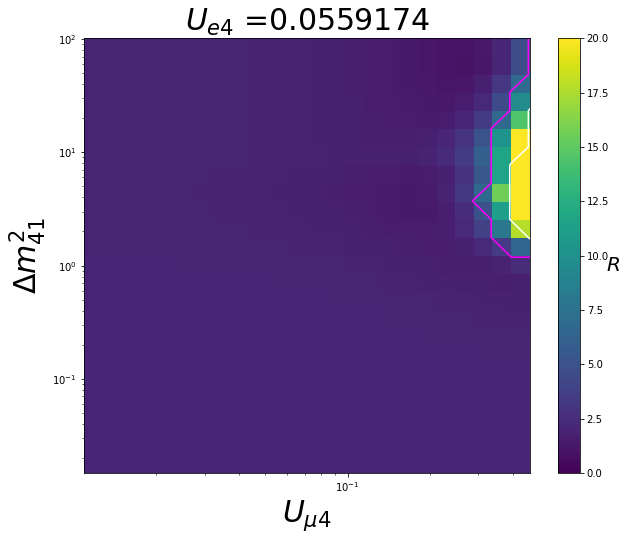

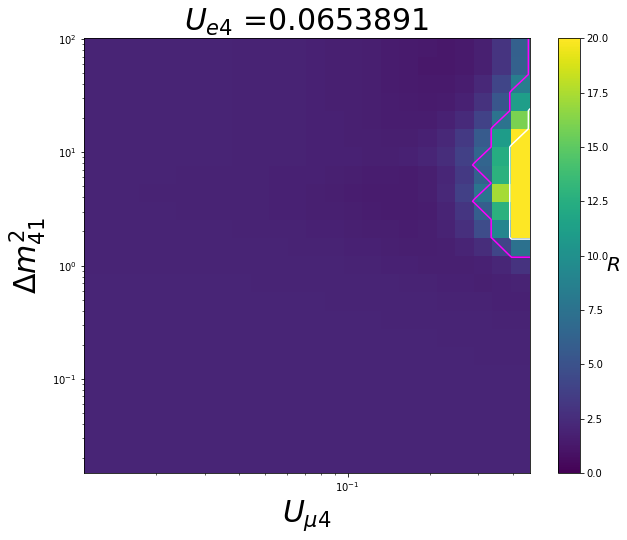

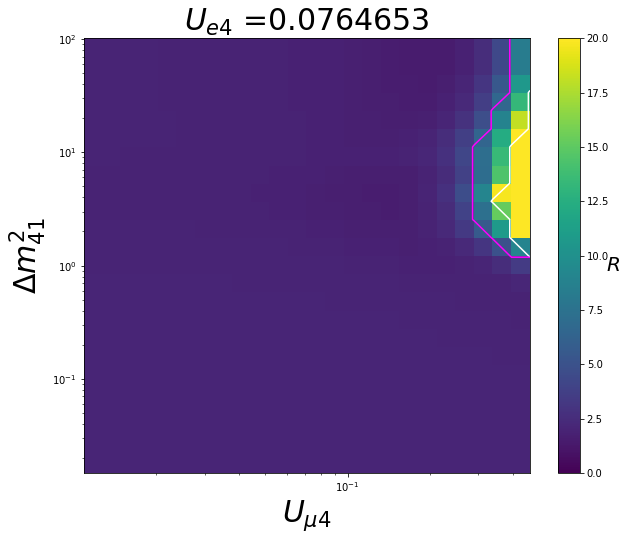

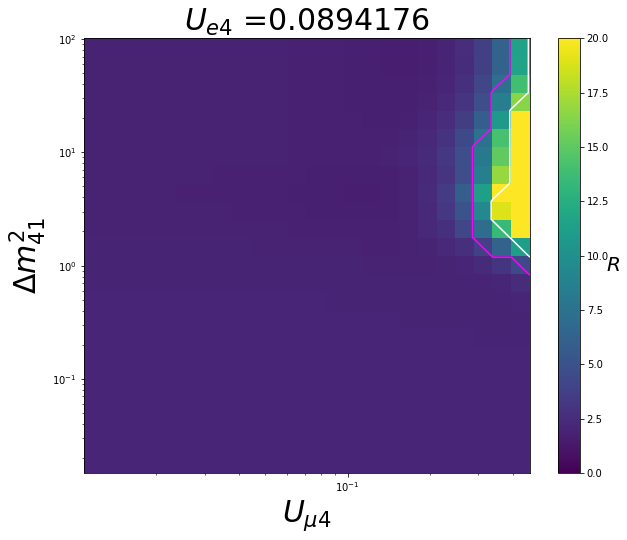

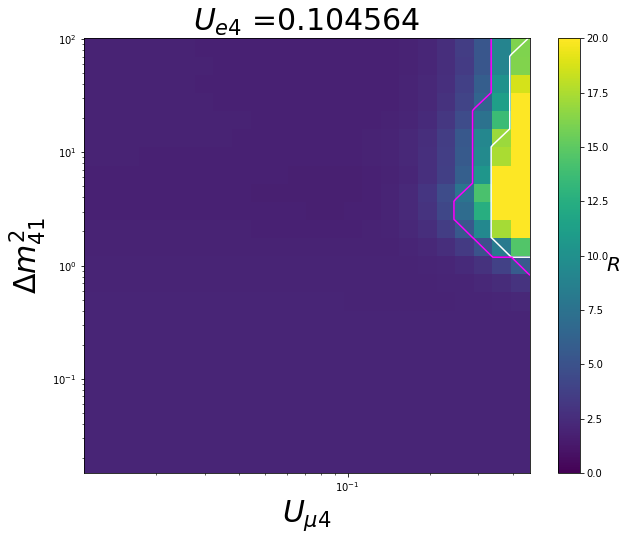

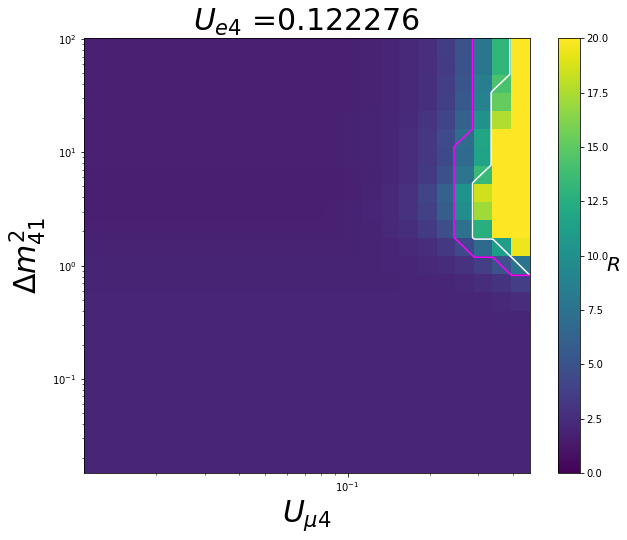

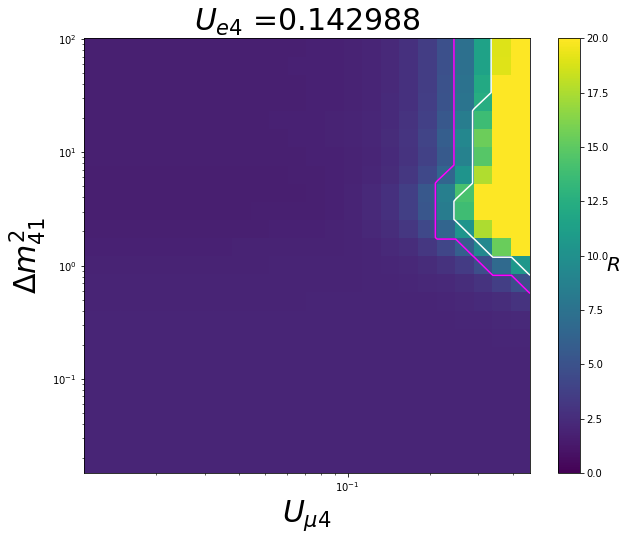

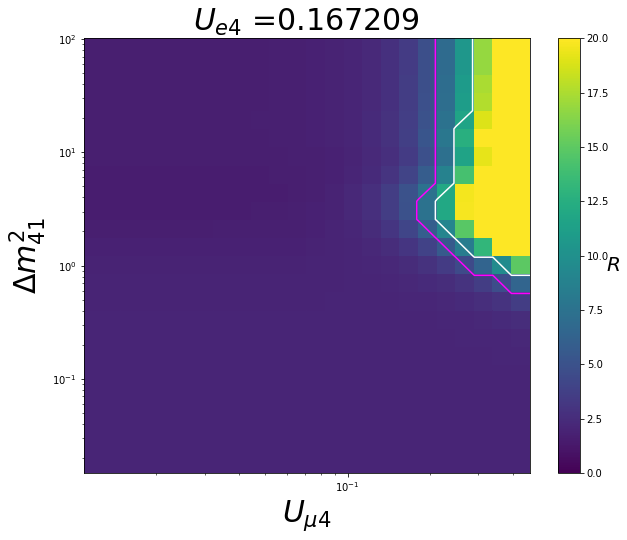

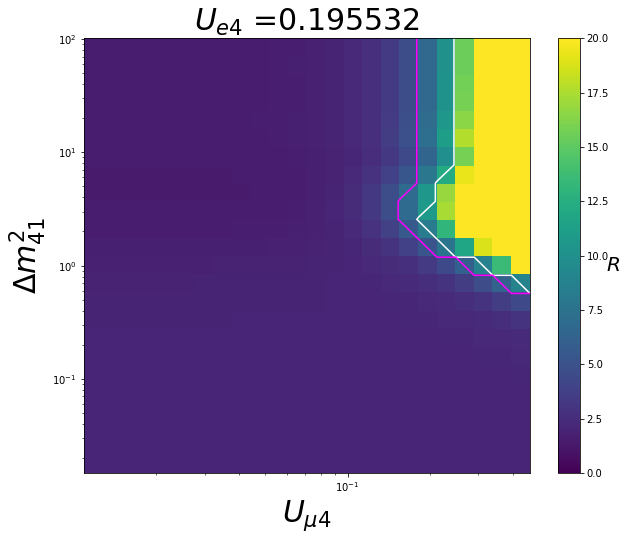

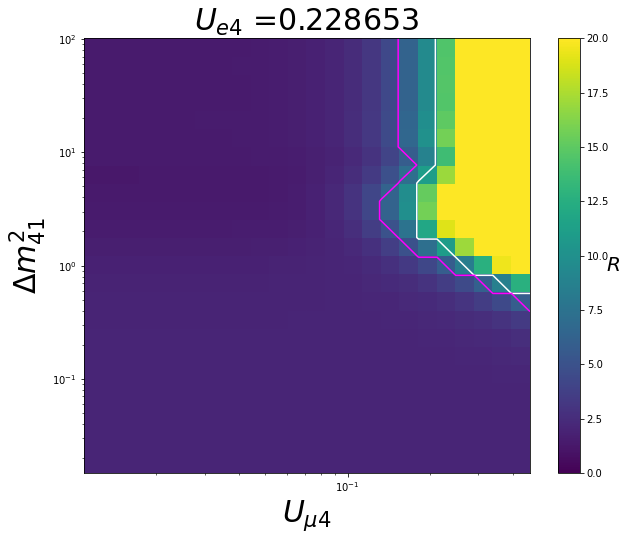

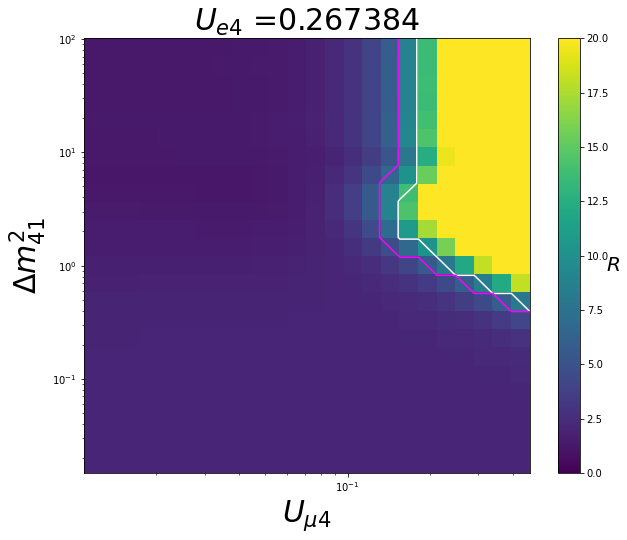

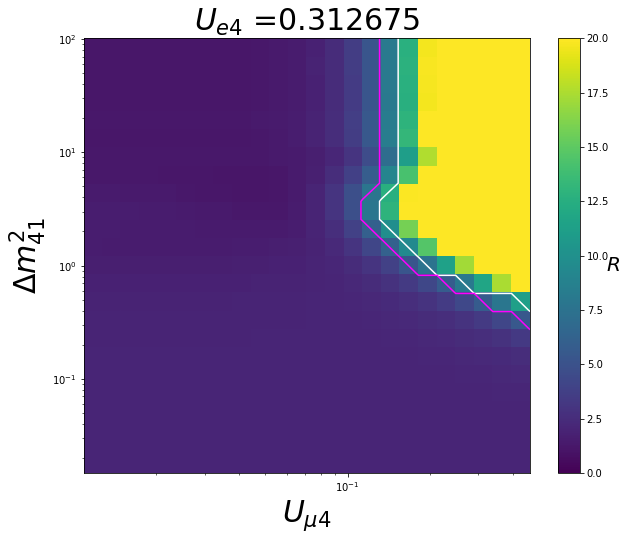

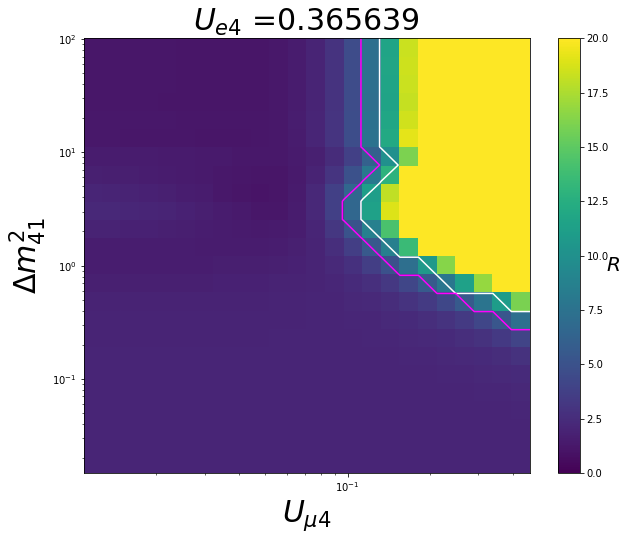

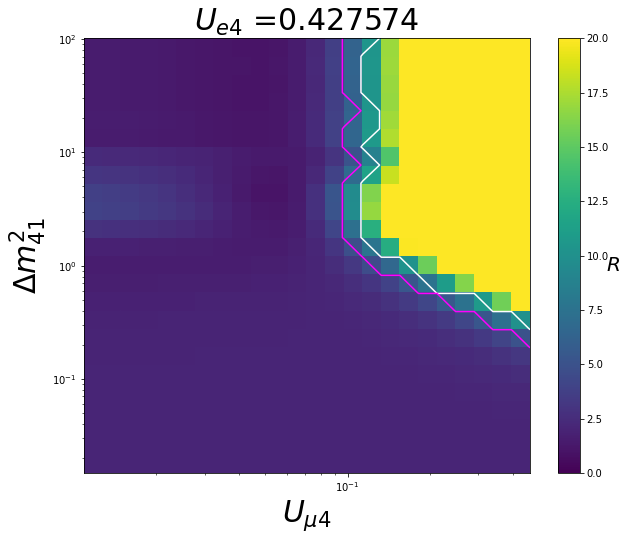

/usr/lib/python3/dist-packages/ipykernel_launcher.py:51: UserWarning: No contour levels were found within the data range.
/usr/lib/python3/dist-packages/ipykernel_launcher.py:51: UserWarning: The following kwargs were not used by contour: 'fontsize'
/usr/lib/python3/dist-packages/ipykernel_launcher.py:52: UserWarning: No contour levels were found within the data range.
/usr/lib/python3/dist-packages/ipykernel_launcher.py:52: UserWarning: The following kwargs were not used by contour: 'fontsize', 'label'


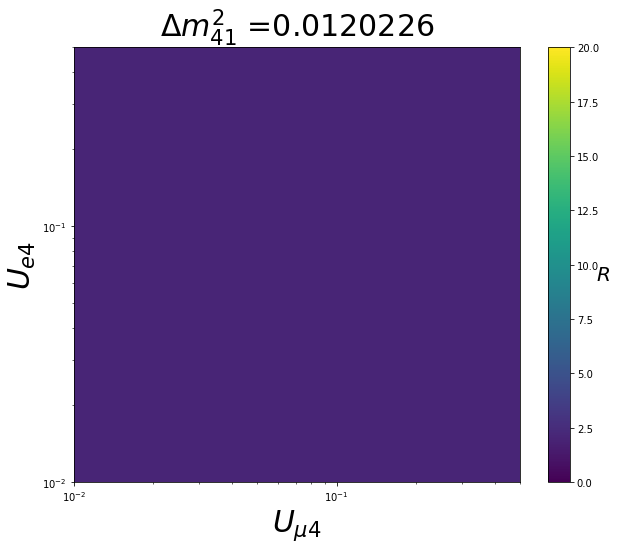

/usr/lib/python3/dist-packages/ipykernel_launcher.py:46: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


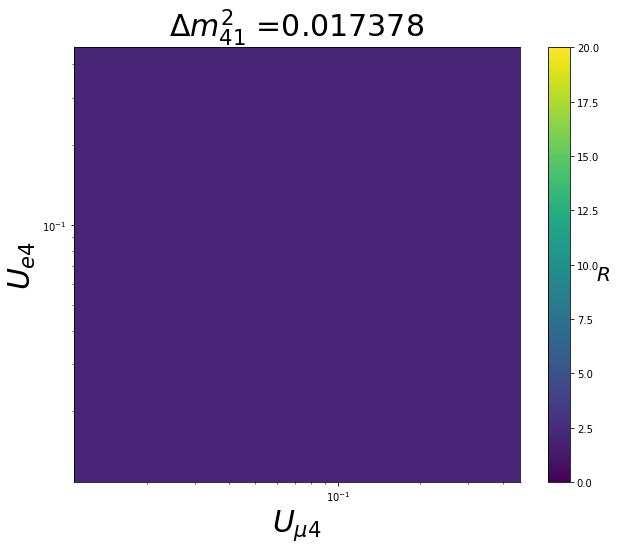

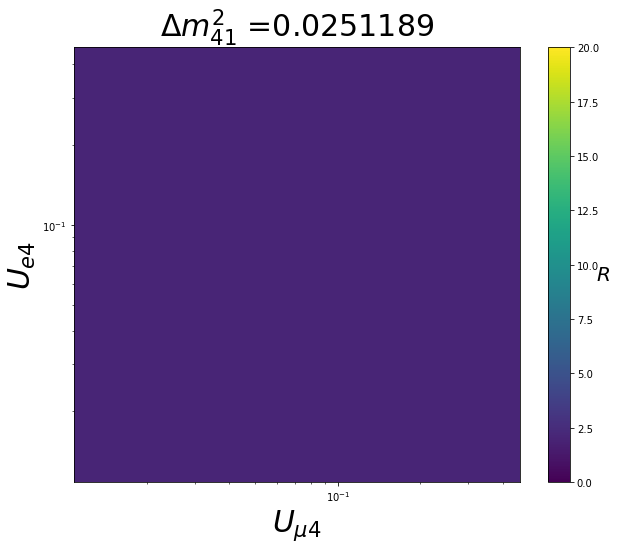

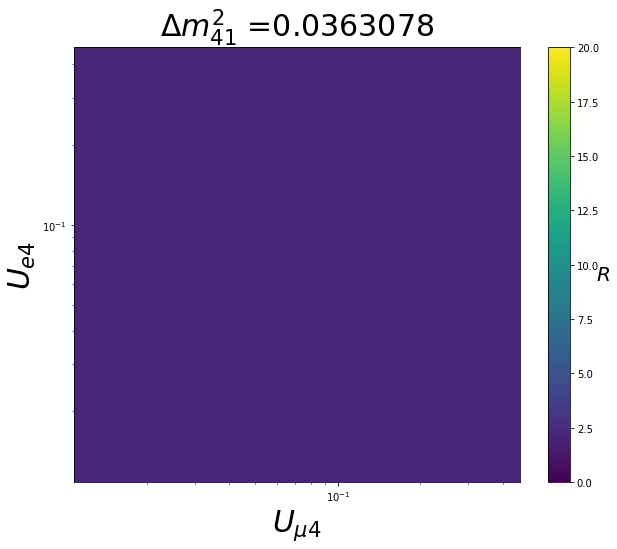

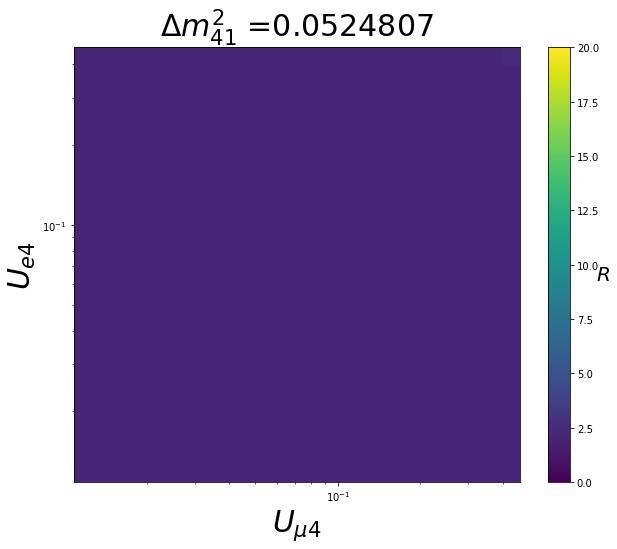

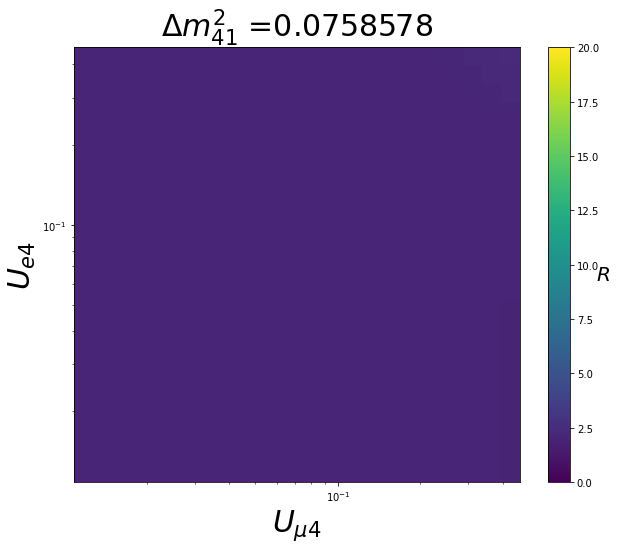

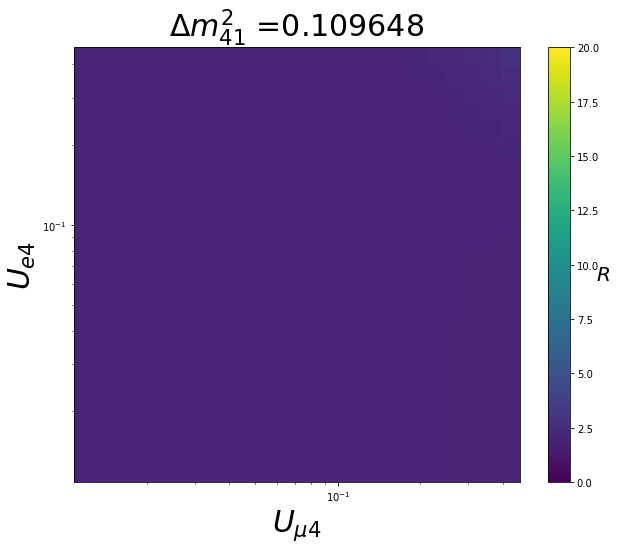

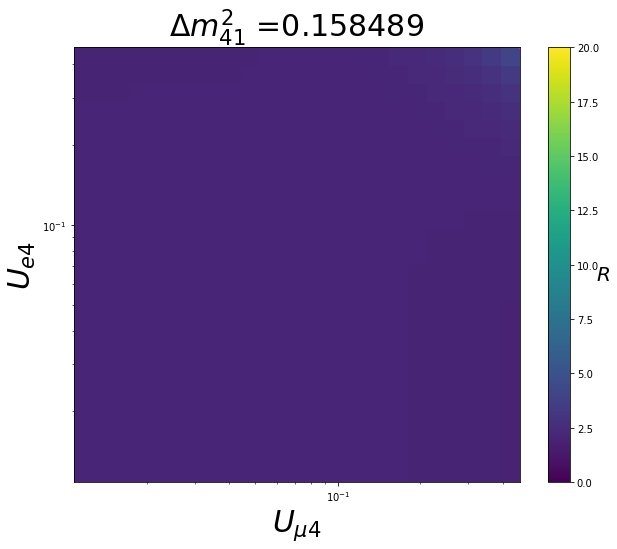

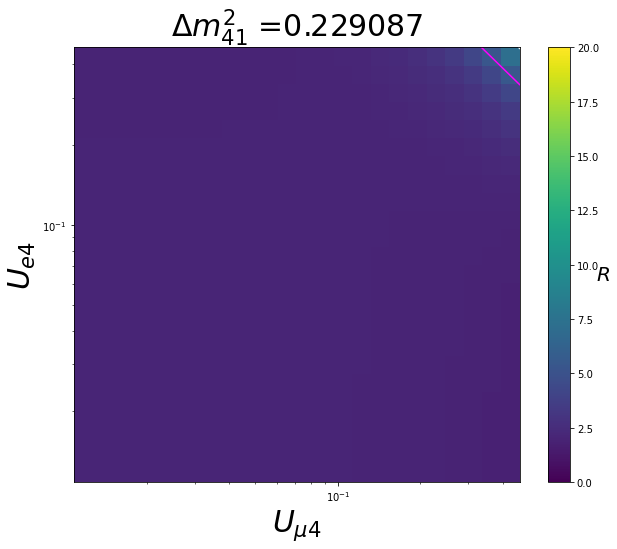

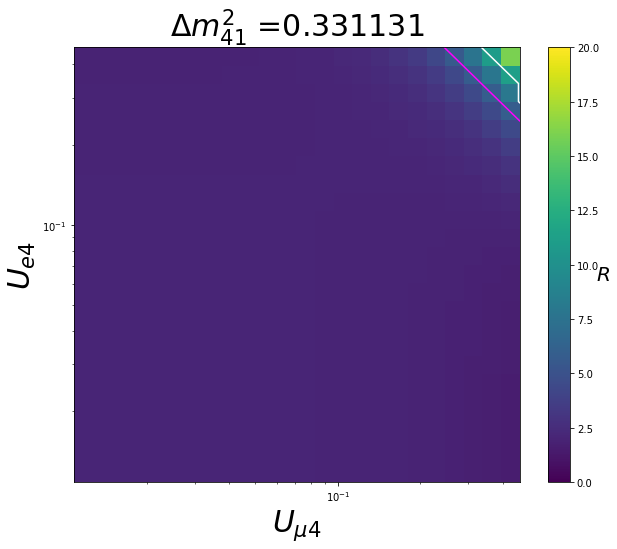

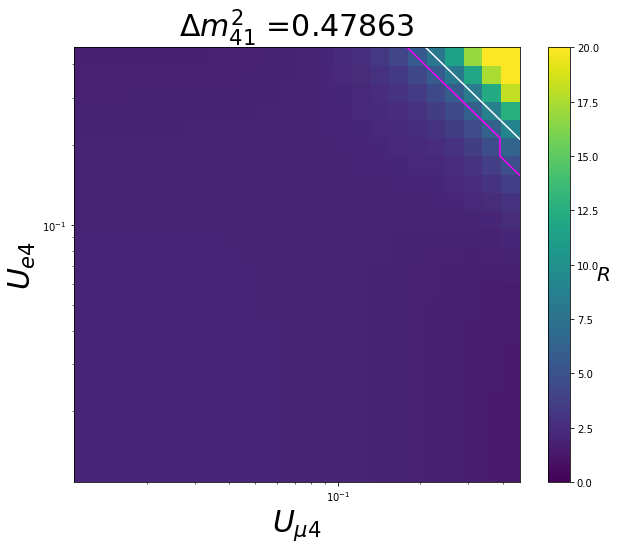

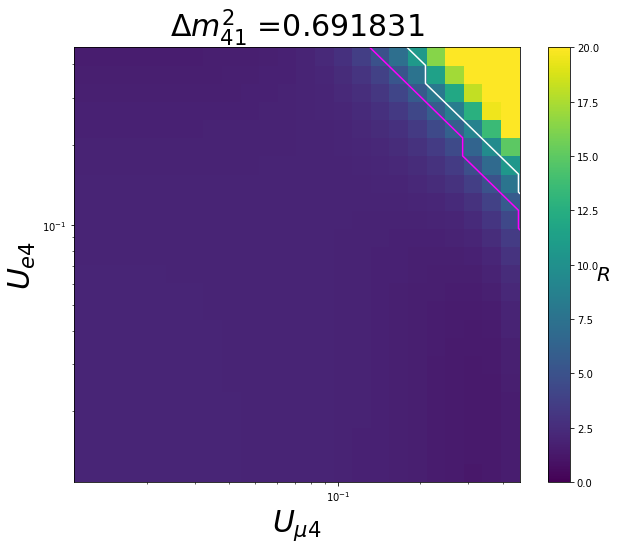

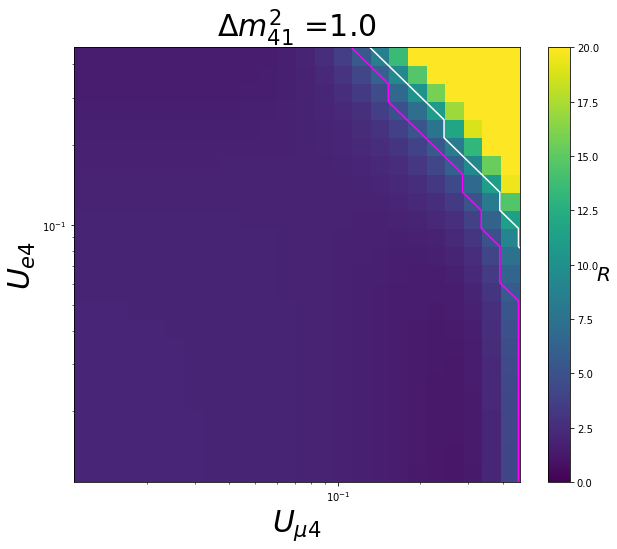

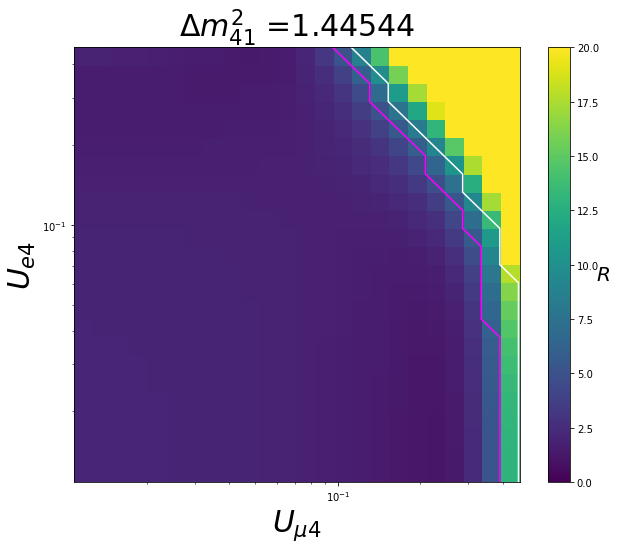

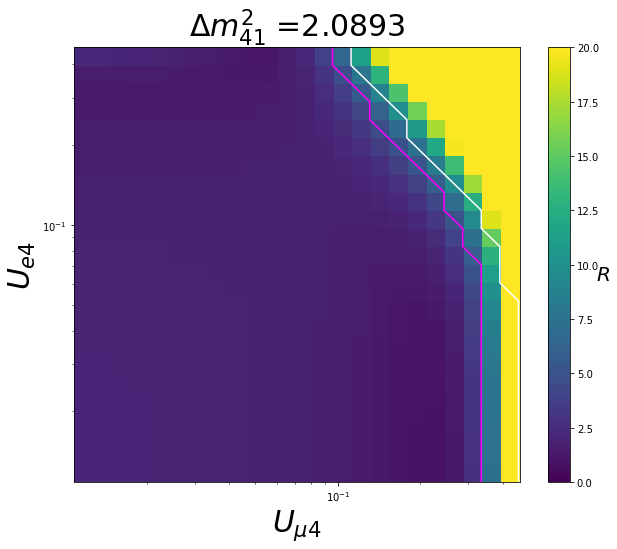

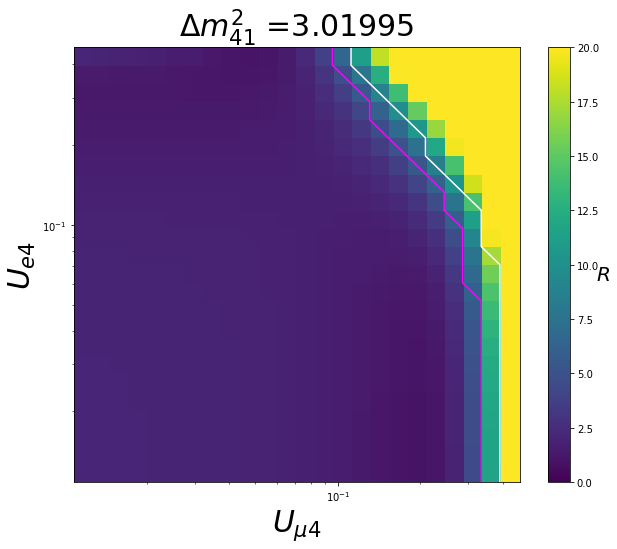

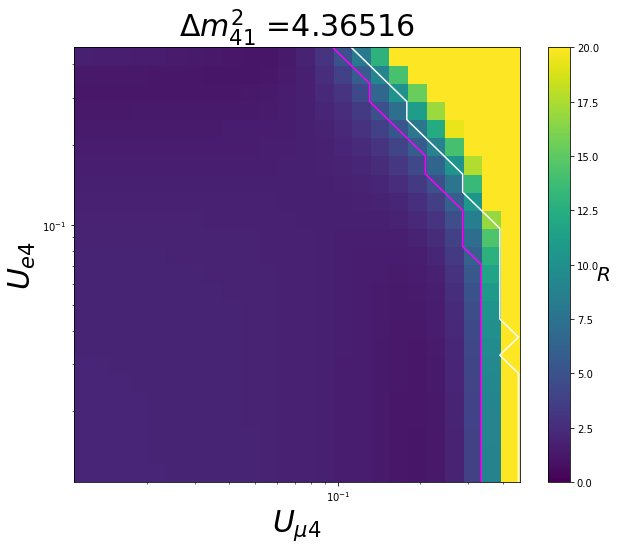

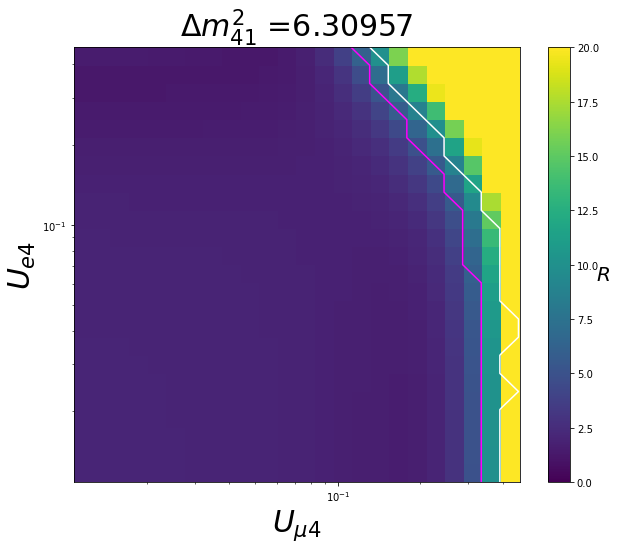

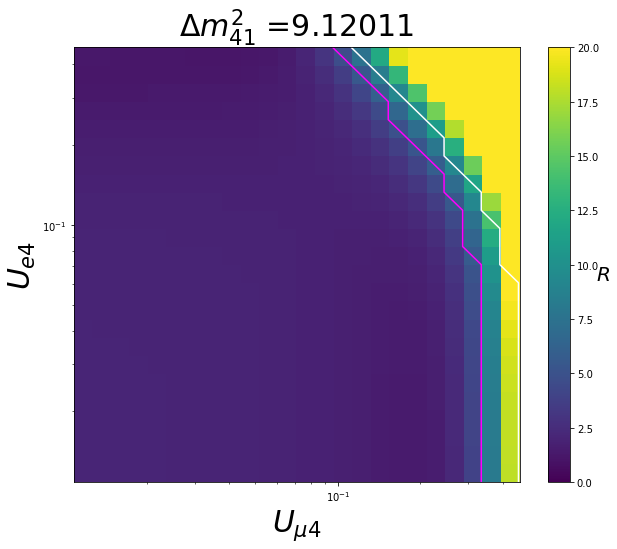

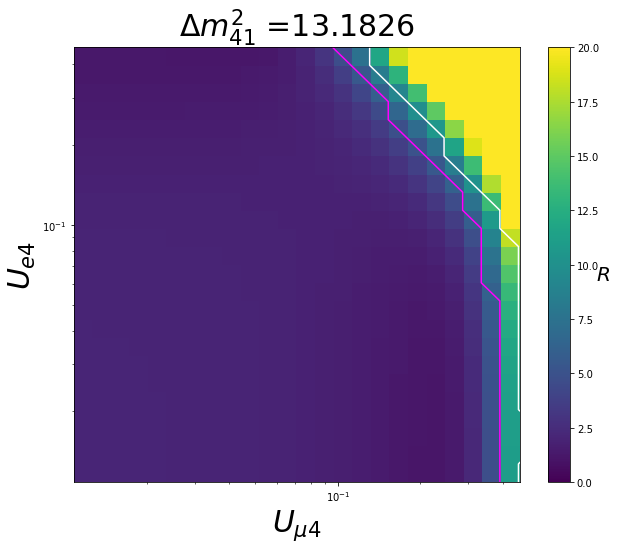

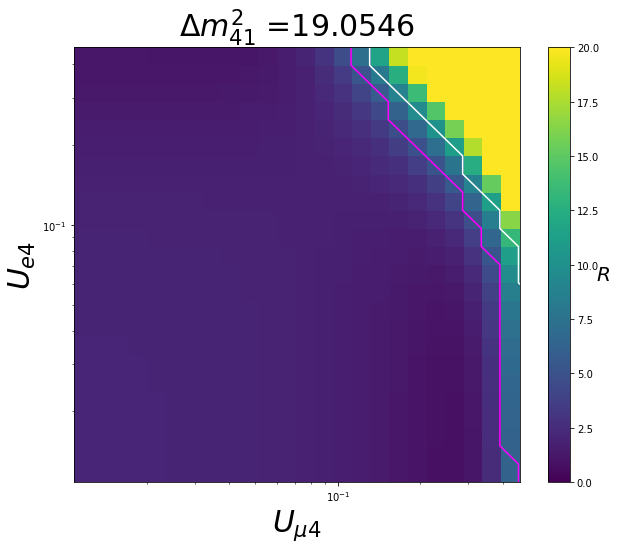

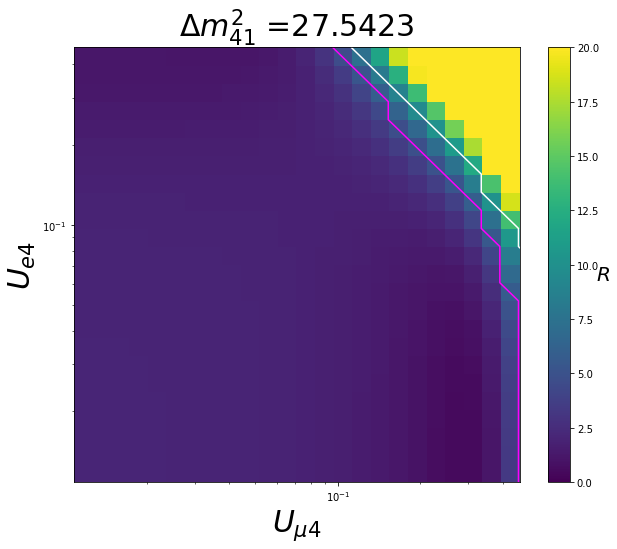

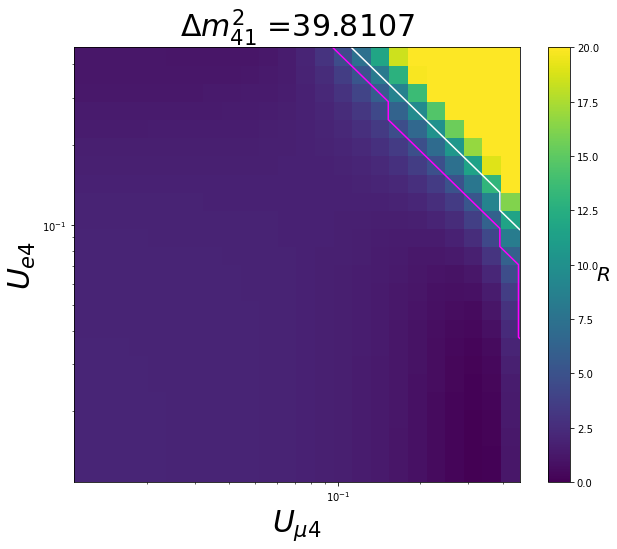

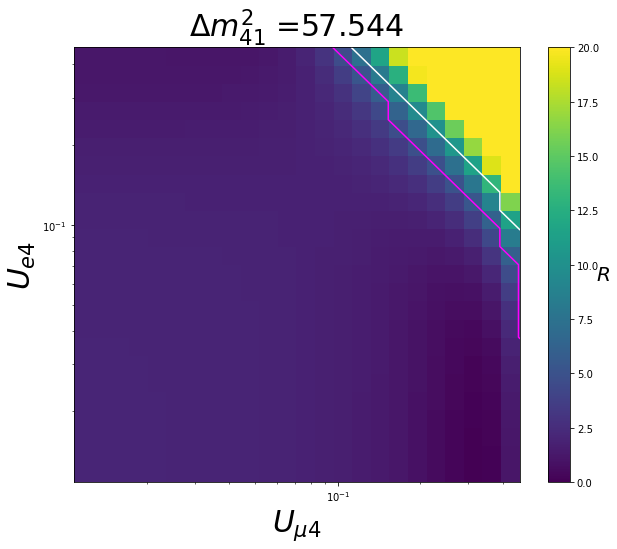

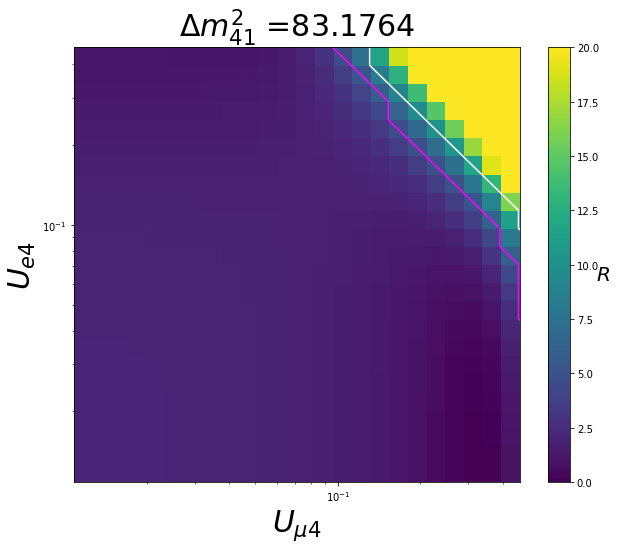

In [12]:
y,x = np.meshgrid(m41_list, ue4_list)
for i in range(len(um4_center)):
    fig,ax = plt.subplots(figsize=(10,8))
    plt.pcolormesh(x, y, chi_arr_sens[:,:,i],norm=colors.Normalize(vmin=1e-13, vmax=20))
    cbar = plt.colorbar()
    cbar.set_label(r'$R$',rotation=0,fontsize=20)
    #contour plots
    y,x = np.meshgrid(m41_center, ue4_center)
    contours = plt.contour(x, y, confidence_arr[:,:,i],[.9], colors='white',fontsize=20,label="wilks 90% CL")
    contours = plt.contour(x, y, confidence_arr_w[:,:,i],[.9], colors='magenta',fontsize=20,label="wilks 90% CL")
    plt.xlabel(r"$U_{e4}$",fontsize=30)
    plt.ylabel(r"$\Delta m^2_{41}$",fontsize=30)
    plt.title(r"$U_{\mu4}$ ="+str(um4_list[i]),fontsize=30)
    plt.xscale("log")
    plt.yscale("log")
    pkl.dump(fig,open("FC_sens_umu4_"+str(i)+".p",'wb'))
    plt.savefig("FC_sens_umu4_"+str(i)+".png")
    plt.show()
    plt.close()
    
# at ue4
y,x = np.meshgrid(m41_list, um4_list)
for i in range(len(ue4_center)):
    fig,ax = plt.subplots(figsize=(10,8))
    plt.pcolormesh(x, y, chi_arr_sens[i,:,:].transpose(),norm=colors.Normalize(vmin=1e-13, vmax=20))
    cbar = plt.colorbar()
    cbar.set_label(r'$R$',rotation=0,fontsize=20)
    #contour plots
    y,x= np.meshgrid(m41_center, um4_center)
    contours = plt.contour(x, y, confidence_arr[i,:,:].transpose(),[.9], colors='white',fontsize=20)
    contours = plt.contour(x, y, confidence_arr_w[i,:,:].transpose(),[.9], colors='magenta',fontsize=20,label="wilks 90% CL")
    plt.xlabel(r"$U_{\mu 4}$",fontsize=30)
    plt.ylabel(r"$\Delta m^2_{41}$",fontsize=30)
    plt.title(r"$U_{e4}$ ="+str(ue4_list[i]),fontsize=30)
    plt.xscale("log")
    plt.yscale("log")
    pkl.dump(fig,open("FC_sens_ue4_"+str(i)+".p",'wb'))
    plt.savefig("FC_sens_ue4_"+str(i)+".png")
    plt.show()
    plt.close()


x,y = np.meshgrid(ue4_list, um4_list)
for i in range(len(ue4_center)):
    fig,ax = plt.subplots(figsize=(10,8))
    plt.pcolormesh(x, y, chi_arr_sens[:,i,:],norm=colors.Normalize(vmin=1e-13, vmax=20))
    cbar = plt.colorbar()
    cbar.set_label(r'$R$',rotation=0,fontsize=20)
    #contour plots
    x,y = np.meshgrid(ue4_center, um4_center)
    contours = plt.contour(x, y, confidence_arr[:,i,:],[.9], colors='white',fontsize=20)
    contours = plt.contour(x, y, confidence_arr_w[:,i,:],[.9], colors='magenta',fontsize=20,label="wilks 90% CL")
    plt.ylabel(r"$U_{e4}$",fontsize=30)
    plt.xlabel(r"$U_{\mu4}$",fontsize=30)
    plt.title(r"$\Delta m^2_{41}$ ="+str(m41_list[i]),fontsize=30)
    plt.xscale("log")
    plt.yscale("log")
    pkl.dump(fig,open("FC_sens_m41_"+str(i)+".p",'wb'))
    plt.savefig("FC_sens_m41_"+str(i)+".png")
    plt.show()
    plt.close()

Finally get FC data contour

In [13]:
# initialize arr to fill
chi2_data=[]
chi2_min_data = []
with open("chis_data.txt","r") as chis:
    lines = chis.readlines()
    for line in range(len(lines)):
        if line==len(lines)-1:
            chi2_min = lines[line].split(" ")
        else:
            chi2_data.append(float(lines[line]))
            
for i in range(len(chi2_min)):
    chi2_min_data.append(float(chi2_min[i]))
# chi2_min_data = [208.94,2.18,.499,0.01]

print("data best fit:",chi2_min_data)
print("R at null =", chi2_data[0]-chi2_min_data[0])
print("R at gbf =", chi2_data[8542]-chi2_min_data[0])
print("R at max =", chi2_data[15624]-chi2_min_data[0])
print("R at 12992 =", chi2_data[12992]-chi2_min_data[0])
print("R at 9799 =", chi2_data[9799]-chi2_min_data[0])
print("R at 9071 =", chi2_data[9071]-chi2_min_data[0])
print("R at 10565 =", chi2_data[10565]-chi2_min_data[0])
print("R at 7370 =", chi2_data[7370]-chi2_min_data[0])

data best fit: [203.85, 3.69939, 0.499866, 0.0100238]
R at null = 11.230000000000018
R at gbf = 18.818000000000012
R at max = 217.355
R at 12992 = 22.930000000000007
R at 9799 = 223.19700000000003
R at 9071 = 49.903999999999996
R at 10565 = 22.51600000000002
R at 7370 = 22.903999999999996


In [14]:
# change chi2 arr to 25x25x25 for 3d plot
chi_arr_data=np.zeros((25,25,25))
minpt1 =1000000
for pt in range(len(chi2_data)):
    if chi2_data[pt]<minpt1: 
        minpt1 = chi2_data[pt]
print("grid search min:",minpt1,"minimizer min:",chi2_min_data[0])

sumex1=0
print(len(chi2_data))
for i in range(len(chi2_data)):
    chi2_data[i]=chi2_data[i]-chi2_min_data[0]
    val = chi2_data[i]-chi2_min_data[0]
    if (val > R_list[i]):
        sumex1+=1
        
print("size of excluded region:",sumex1,float(sumex1)/float(len(chi2_data)))

for pt in range(len(chi2_data)):
    #this is a mess, but works. Didn't want to hardcode any numbers
    m_id = math.floor(pt/((25*25)))
    # need the subtraction term so that it resets everytime m41 increases
    ue4_id = math.floor((pt-m_id*25*25)/(25))
    um4_id = pt % (25)
#     print(pt,m_id,ue4_id,um4_id)
    chi_arr_data[ue4_id][m_id][um4_id]=chi2_data[pt]
    
# print(chi_arr_data)

grid search min: 206.474 minimizer min: 203.85
15625
size of excluded region: 61 0.003904


In [15]:
confidence_arr_data=np.zeros((25,25,25))
# print(Rcrit_arr)
for i in range(25):
    for j in range(25):
        for k in range(25):
            delta=chi_arr_data[i][j][k]
            if delta < Rcrit_arr[i][j][k]:
                confidence_arr_data[i][j][k] = 0
            else:
                confidence_arr_data[i][j][k] = 1 
# print(confidence_arr_data)

/usr/lib/python3/dist-packages/ipykernel_launcher.py:9: UserWarning: No contour levels were found within the data range.
  if __name__ == '__main__':


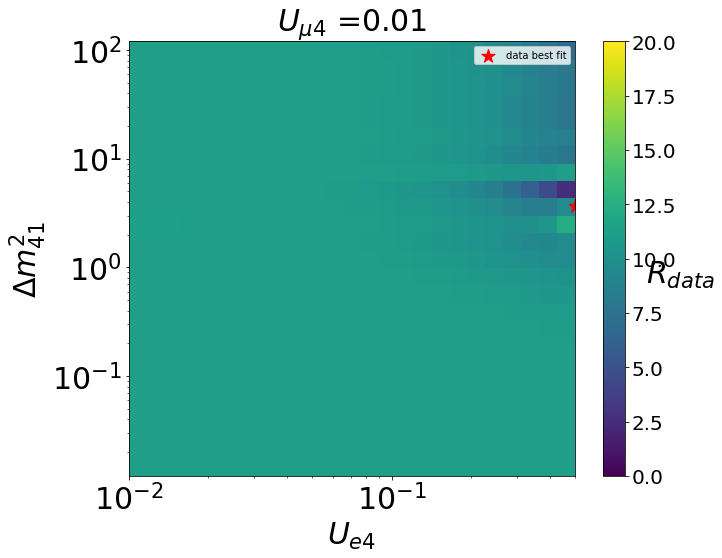

/usr/lib/python3/dist-packages/ipykernel_launcher.py:33: UserWarning: The following kwargs were not used by contour: 'fontsize'


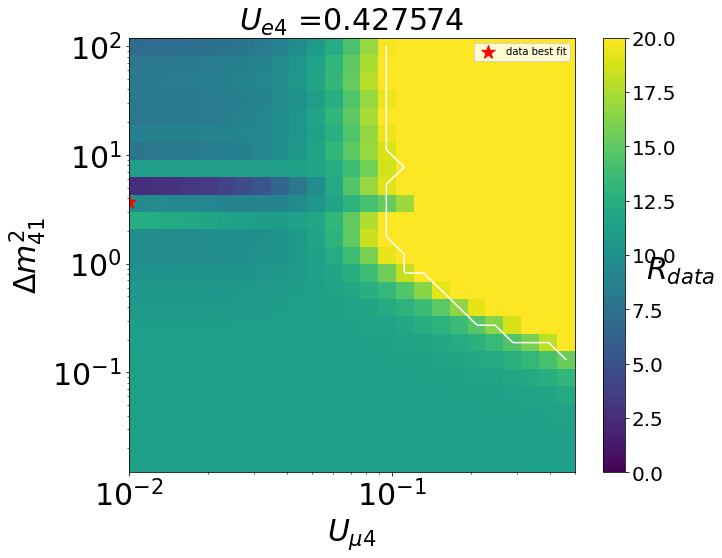

/usr/lib/python3/dist-packages/ipykernel_launcher.py:57: UserWarning: The following kwargs were not used by contour: 'fontsize'


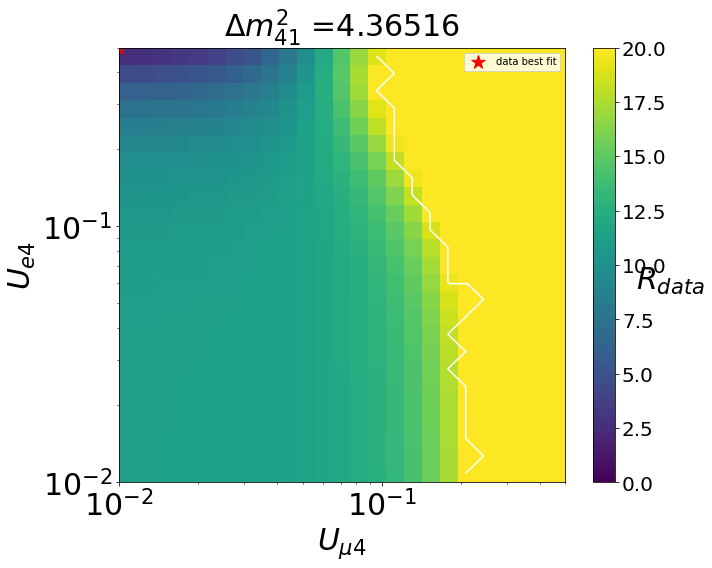

In [16]:
# make projections at data best fit
y,x = np.meshgrid(m41_list, ue4_list)
fig,ax = plt.subplots(figsize=(10,8))
plt.pcolormesh(x, y, chi_arr_data[:,:,0],norm=colors.Normalize(vmin=1e-13, vmax=20))
cbar = plt.colorbar()
cbar.set_label(r'$R_{data}$',rotation=0,fontsize=30)
#contour plots
y,x = np.meshgrid(m41_center, ue4_center)
contours = plt.contour(x, y, confidence_arr_data[:,:,0],[.9], colors='white')
plt.scatter(chi2_min_data[2],chi2_min_data[1],marker="*",color ="red",label="data best fit",s=200)
plt.xlabel(r"$U_{e4}$",fontsize=30)
plt.ylabel(r"$\Delta m^2_{41}$",fontsize=30)
plt.title(r"$U_{\mu4}$ ="+str(um4_list[0]),fontsize=30)
plt.xscale("log")
plt.yscale("log")
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
cbar.ax.tick_params(labelsize=20)
plt.legend()
pkl.dump(fig,open("FC_data_umu4_bf.p",'wb'))
plt.savefig("FC_data_umu4_bf.png")
plt.show()
plt.close()

# at ue4
y,x = np.meshgrid(m41_list, um4_list)
fig,ax = plt.subplots(figsize=(10,8))
plt.pcolormesh(x, y, chi_arr_data[24,:,:].transpose(),norm=colors.Normalize(vmin=1e-13, vmax=20))
cbar = plt.colorbar()
cbar.set_label(r'$R_{data}$',rotation=0,fontsize=30)
#contour plots
y,x= np.meshgrid(m41_center, um4_center)
contours = plt.contour(x, y, confidence_arr_data[24,:,:].transpose(),[.9], colors='white',fontsize=20)
plt.scatter(chi2_min_data[3],chi2_min_data[1],marker="*",color ="red",label="data best fit",s=200)
plt.xlabel(r"$U_{\mu 4}$",fontsize=30)
plt.ylabel(r"$\Delta m^2_{41}$",fontsize=30)
plt.title(r"$U_{e4}$ ="+str(ue4_list[24]),fontsize=30)
plt.xscale("log")
plt.yscale("log")
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
cbar.ax.tick_params(labelsize=20)
plt.legend()
pkl.dump(fig,open("FC_data_ue4_bf.p",'wb'))
plt.savefig("FC_data_ue4_bf.png")
plt.show()
plt.close()


x,y = np.meshgrid(ue4_list, um4_list)
fig,ax = plt.subplots(figsize=(10,8))
plt.pcolormesh(x, y, chi_arr_data[:,16,:],norm=colors.Normalize(vmin=1e-13, vmax=20))
cbar = plt.colorbar()
cbar.set_label(r'$R_{data}$',rotation=0,fontsize=30)
#contour plots
x,y = np.meshgrid(ue4_center, um4_center)
contours = plt.contour(x, y, confidence_arr_data[:,16,:],[.9], colors='white',fontsize=20);
plt.scatter(chi2_min_data[3],chi2_min_data[2],marker="*",color ="red",label="data best fit",s=200)
plt.ylabel(r"$U_{e4}$",fontsize=30)
plt.xlabel(r"$U_{\mu4}$",fontsize=30)
plt.title(r"$\Delta m^2_{41}$ ="+str(m41_list[16]),fontsize=30)
plt.yscale("log")
plt.xscale("log")
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
cbar.ax.tick_params(labelsize=20)
plt.legend()
pkl.dump(fig,open("FC_data_m41_bf.p",'wb'))
plt.savefig("FC_data_m41_bf.png")
plt.show()
plt.close()


/usr/lib/python3/dist-packages/ipykernel_launcher.py:9: UserWarning: The following kwargs were not used by contour: 'fontsize'
  if __name__ == '__main__':


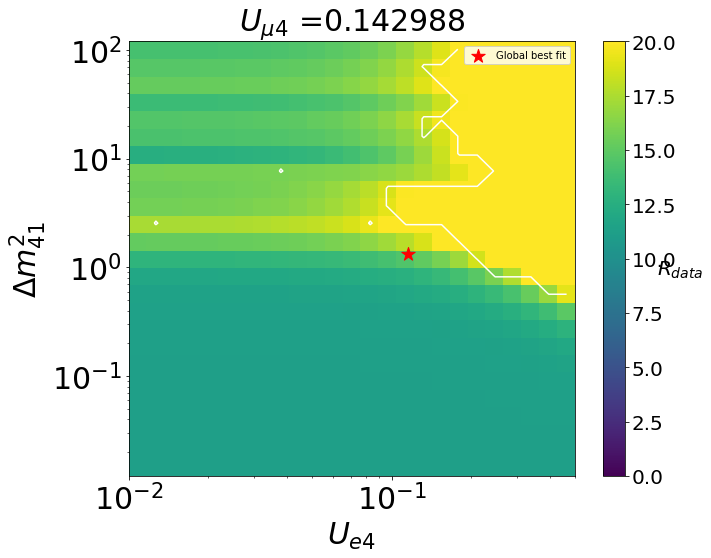

/usr/lib/python3/dist-packages/ipykernel_launcher.py:33: UserWarning: The following kwargs were not used by contour: 'fontsize'


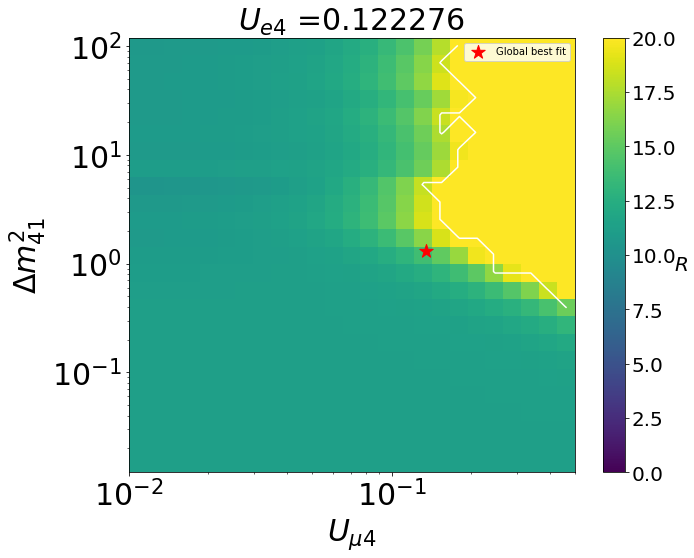

/usr/lib/python3/dist-packages/ipykernel_launcher.py:57: UserWarning: The following kwargs were not used by contour: 'fontsize'


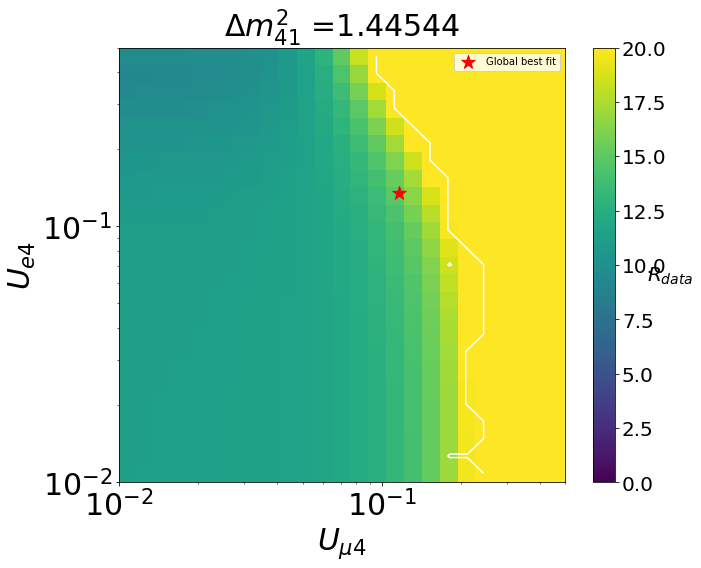

In [17]:
# repeat for global best fit
y,x = np.meshgrid(m41_list, ue4_list)
fig,ax = plt.subplots(figsize=(10,8))
plt.pcolormesh(x, y, chi_arr_data[:,:,17],norm=colors.Normalize(vmin=1e-13, vmax=20))
cbar = plt.colorbar()
cbar.set_label(r'$R_{data}$',rotation=0,fontsize=20)
#contour plots
y,x = np.meshgrid(m41_center, ue4_center)
contours = plt.contour(x, y, confidence_arr_data[:,:,17],[.9], colors='white',fontsize=20)
plt.scatter([.116],[1.32],marker="*",color ="red",label="Global best fit",s=200)
plt.xlabel(r"$U_{e4}$",fontsize=30)
plt.ylabel(r"$\Delta m^2_{41}$",fontsize=30)
plt.title(r"$U_{\mu4}$ ="+str(um4_list[17]),fontsize=30)
plt.xscale("log")
plt.yscale("log")
plt.legend()
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
cbar.ax.tick_params(labelsize=20)
pkl.dump(fig,open("FC_data_umu4_gbf.p",'wb'))
plt.savefig("FC_data_umu4_gbf.png")
plt.show()
plt.close()

# at ue4
y,x = np.meshgrid(m41_list, um4_list)
fig,ax = plt.subplots(figsize=(10,8))
plt.pcolormesh(x, y, chi_arr_data[16,:,:].transpose(),norm=colors.Normalize(vmin=1e-13, vmax=20))
cbar = plt.colorbar()
cbar.set_label(r'$R$',rotation=0,fontsize=20)
#contour plots
y,x= np.meshgrid(m41_center, um4_center)
contours = plt.contour(x, y, confidence_arr_data[16,:,:].transpose(),[.9], colors='white',fontsize=20)
plt.scatter([.135],[1.32],marker="*",color ="red",label="Global best fit",s=200)
plt.xlabel(r"$U_{\mu 4}$",fontsize=30)
plt.ylabel(r"$\Delta m^2_{41}$",fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
cbar.ax.tick_params(labelsize=20)
plt.title(r"$U_{e4}$ ="+str(ue4_list[16]),fontsize=30)
plt.xscale("log")
plt.yscale("log")
plt.legend()
pkl.dump(fig,open("FC_data_ue4_gbf.p",'wb'))
plt.savefig("FC_data_ue4_gbf.png")
plt.show()
plt.close()


x,y = np.meshgrid(ue4_list, um4_list)
fig,ax = plt.subplots(figsize=(10,8))
plt.pcolormesh(x, y, chi_arr_data[:,13,:],norm=colors.Normalize(vmin=1e-13, vmax=20))
cbar = plt.colorbar()
cbar.set_label(r'$R_{data}$',rotation=0,fontsize=20)
#contour plots
x,y = np.meshgrid(ue4_center, um4_center)
contours = plt.contour(x, y, confidence_arr_data[:,13,:],[.9], colors='white',fontsize=20);
plt.scatter([.116],[.135],marker="*",color ="red",label="Global best fit",s=200)
plt.ylabel(r"$U_{e4}$",fontsize=30)
plt.xlabel(r"$U_{\mu4}$",fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
cbar.ax.tick_params(labelsize=20)
plt.title(r"$\Delta m^2_{41}$ ="+str(m41_list[13]),fontsize=30)
plt.yscale("log")
plt.xscale("log")
plt.legend()
pkl.dump(fig,open("FC_data_m41_gbf.p",'wb'))
plt.savefig("FC_data_m41_gbf.png")
plt.show()
plt.close()


/usr/lib/python3/dist-packages/ipykernel_launcher.py:10: UserWarning: No contour levels were found within the data range.
  # Remove the CWD from sys.path while we load stuff.
/usr/lib/python3/dist-packages/ipykernel_launcher.py:10: UserWarning: The following kwargs were not used by contour: 'fontsize'
  # Remove the CWD from sys.path while we load stuff.


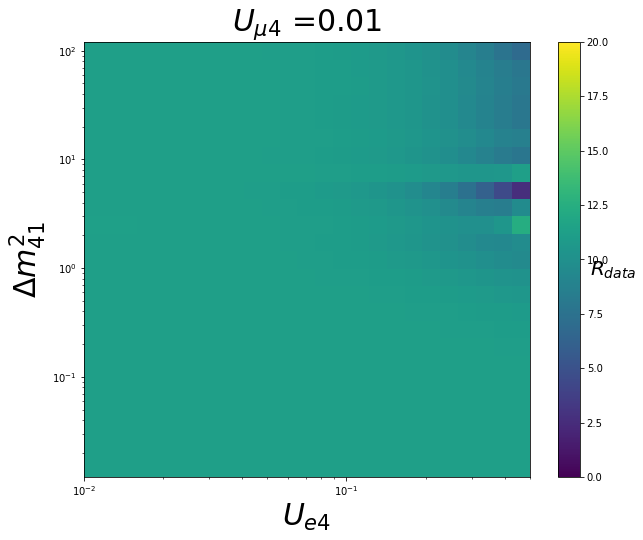

/usr/lib/python3/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  """


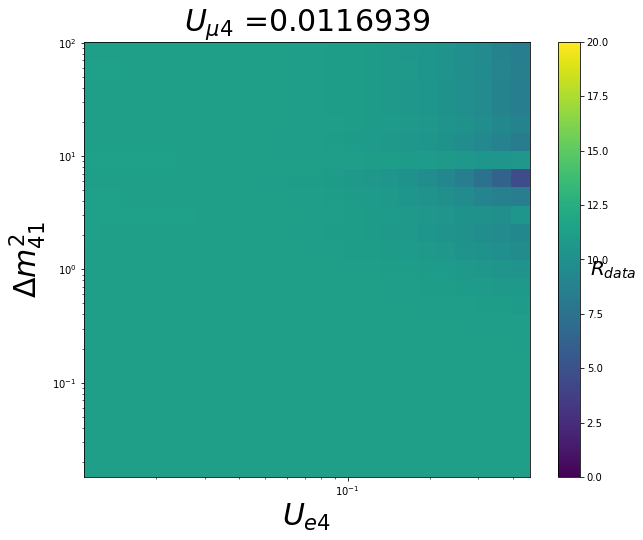

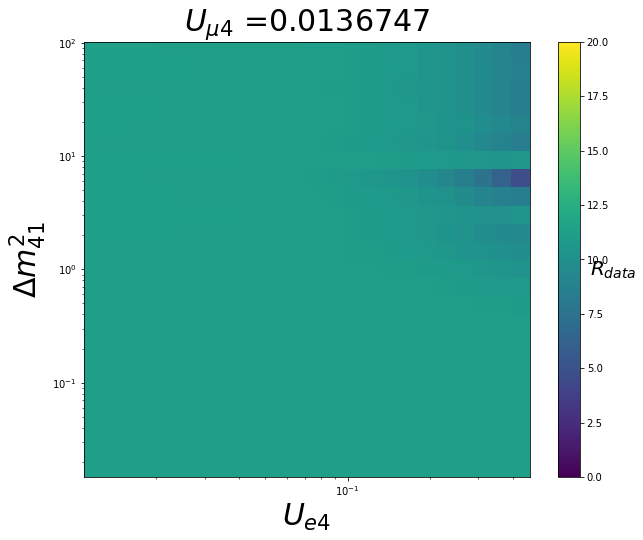

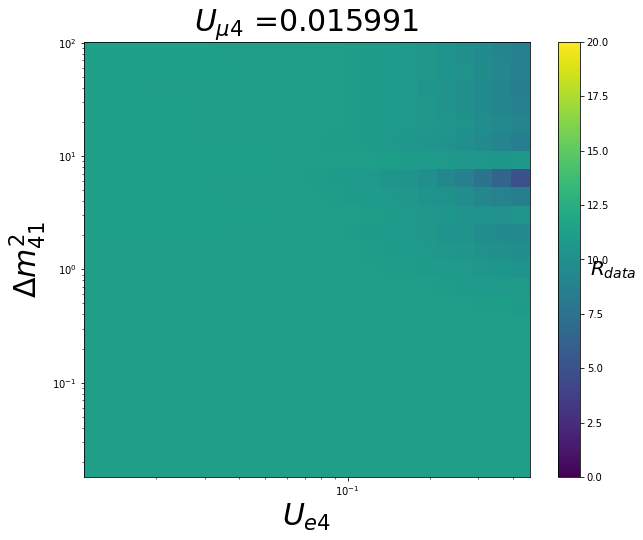

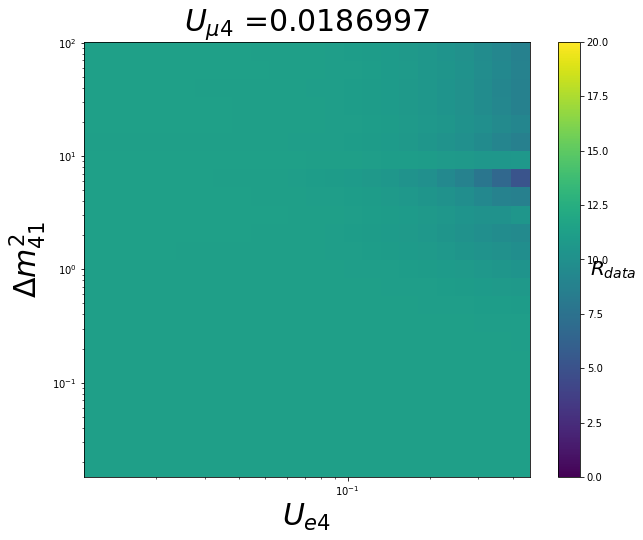

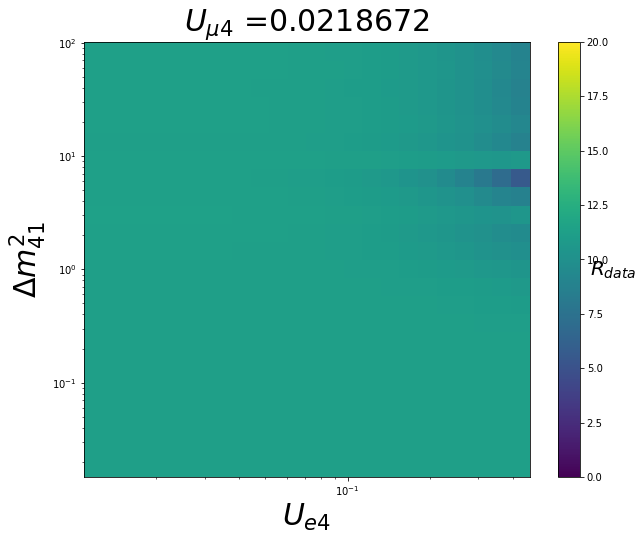

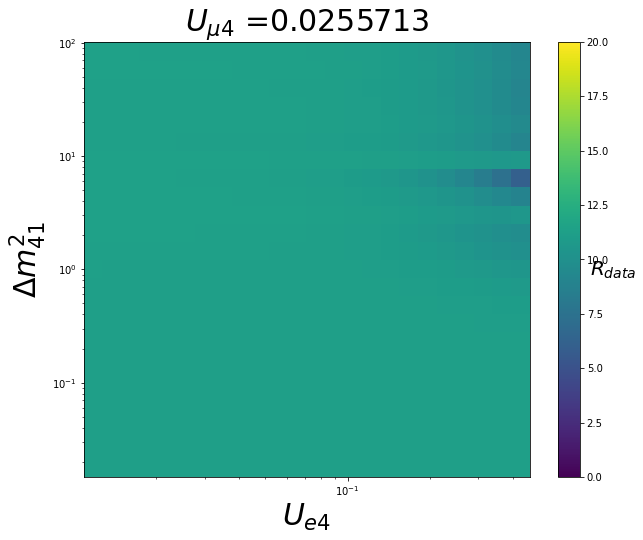

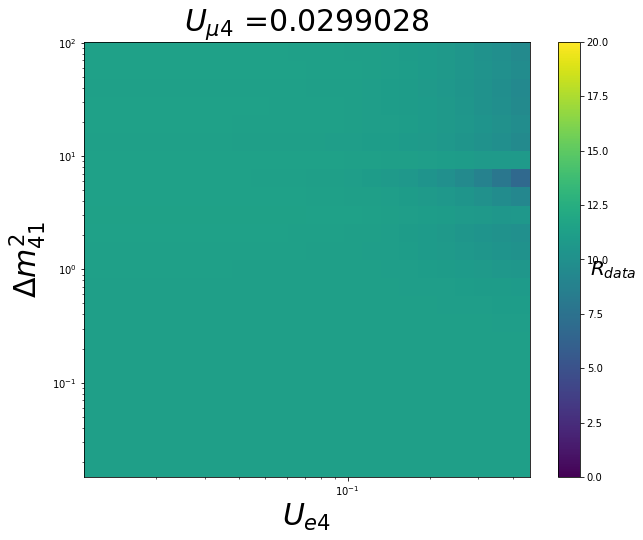

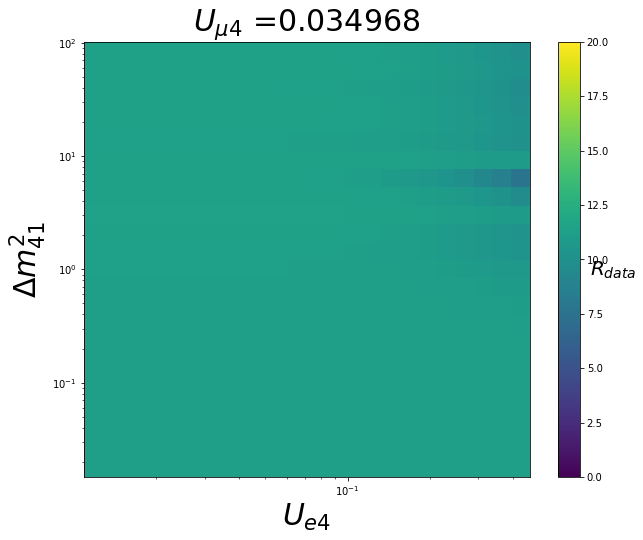

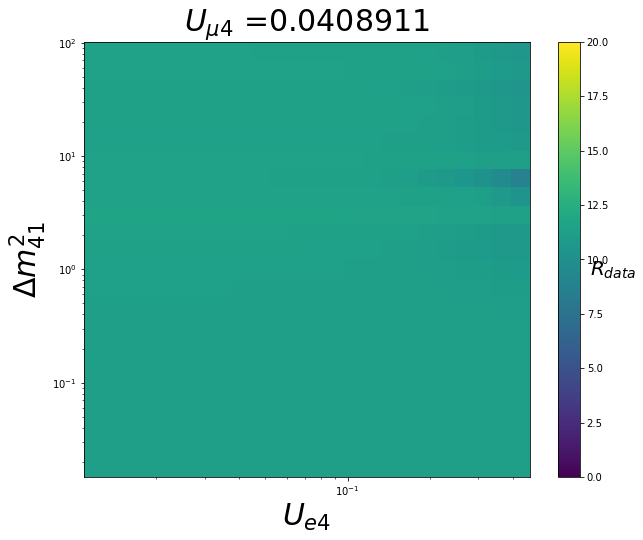

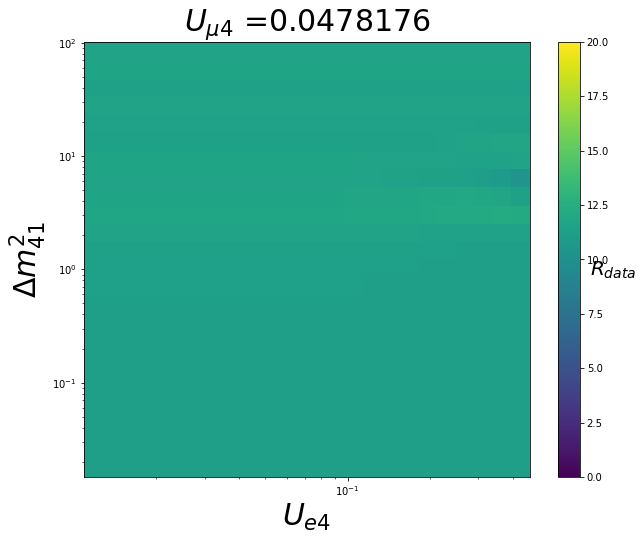

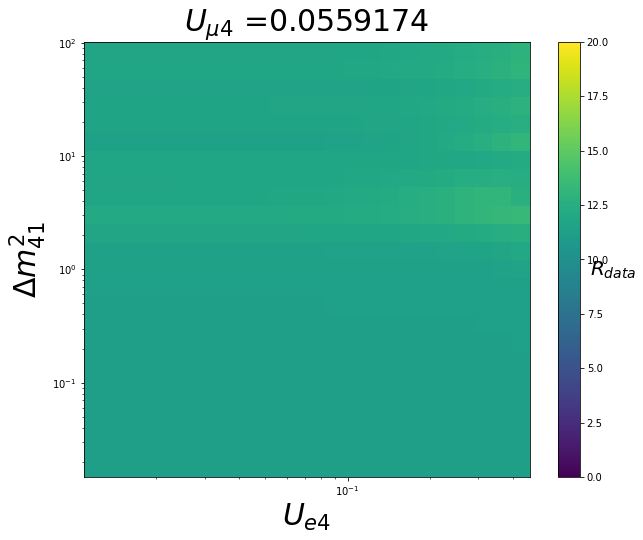

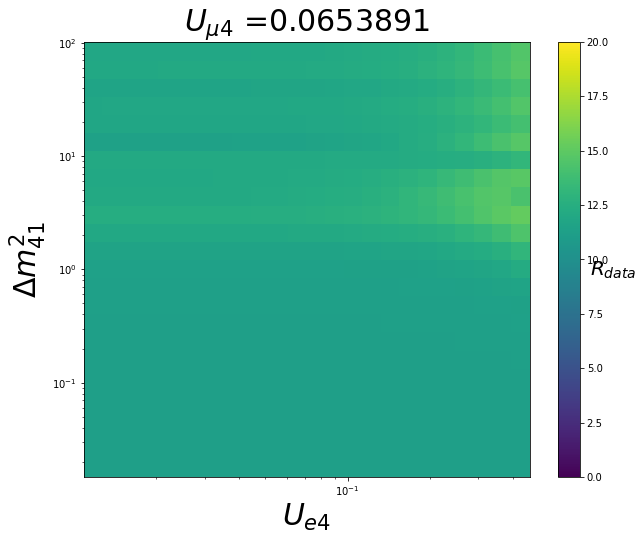

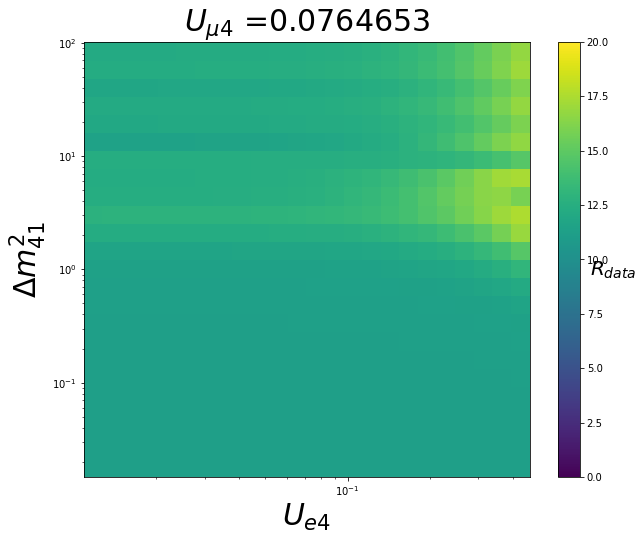

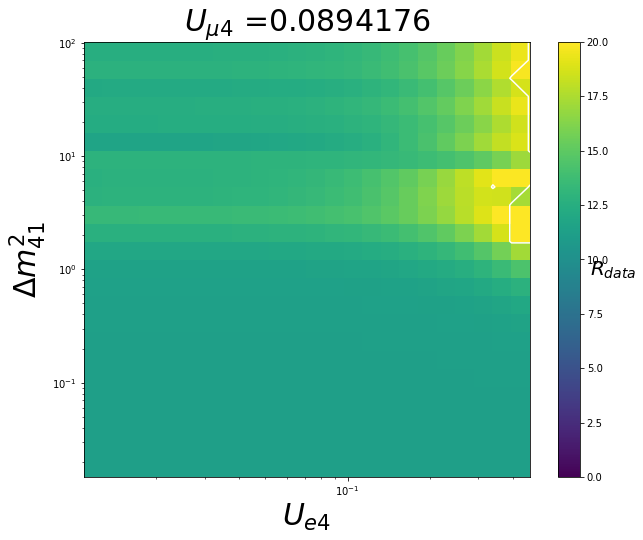

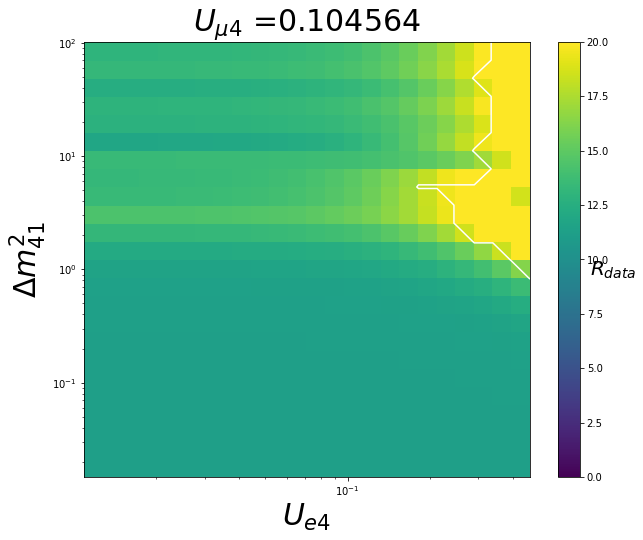

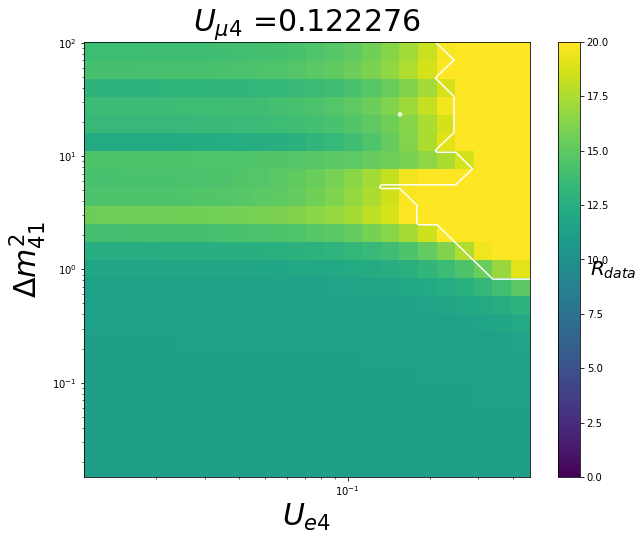

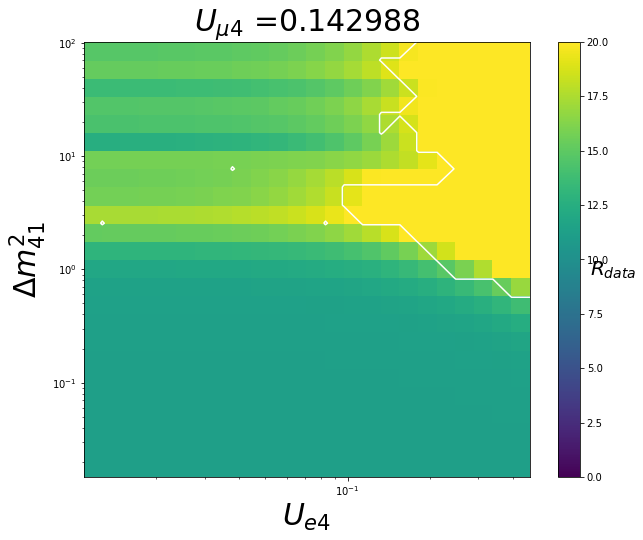

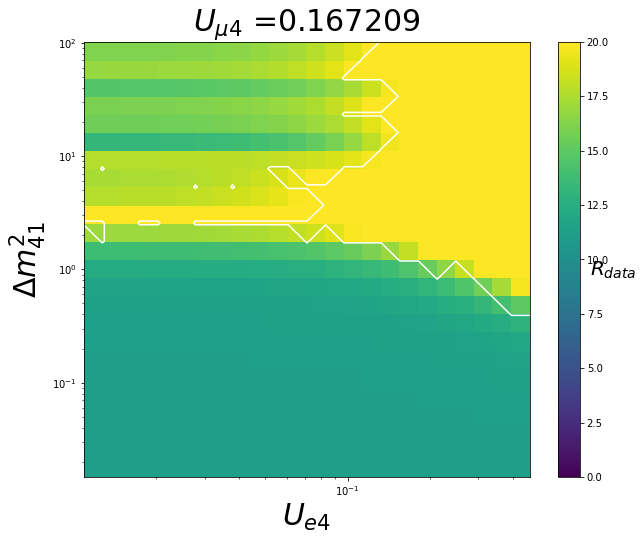

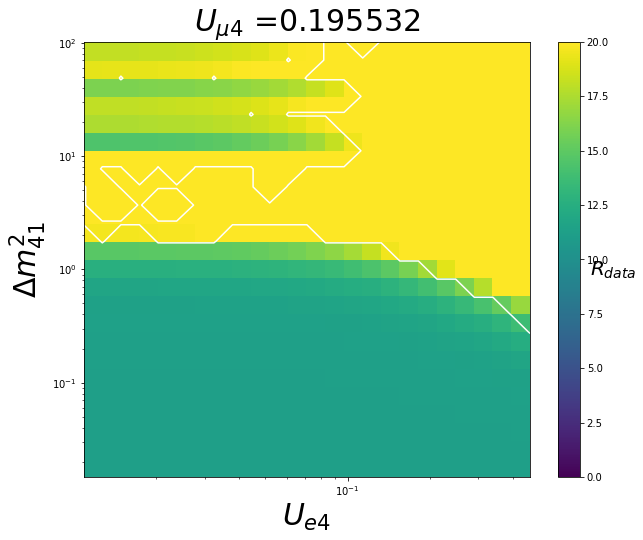

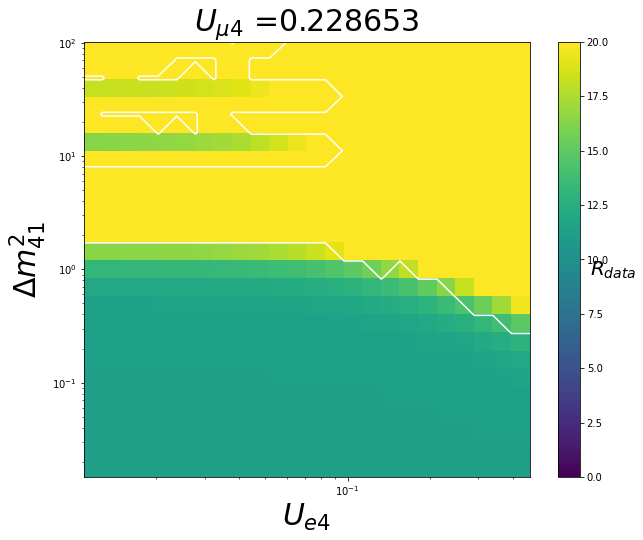

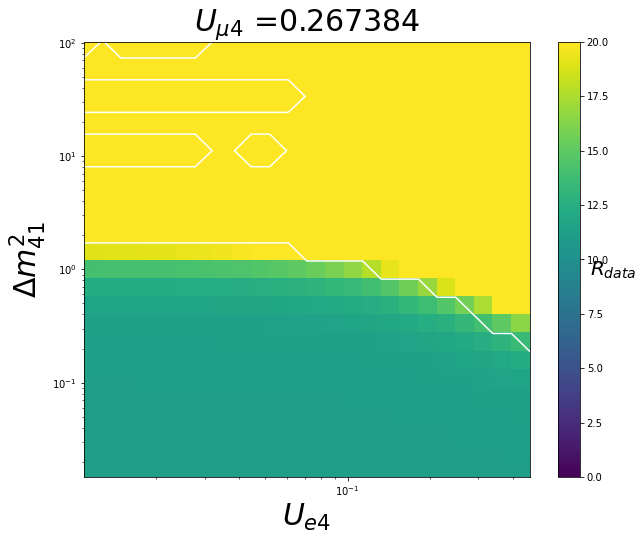

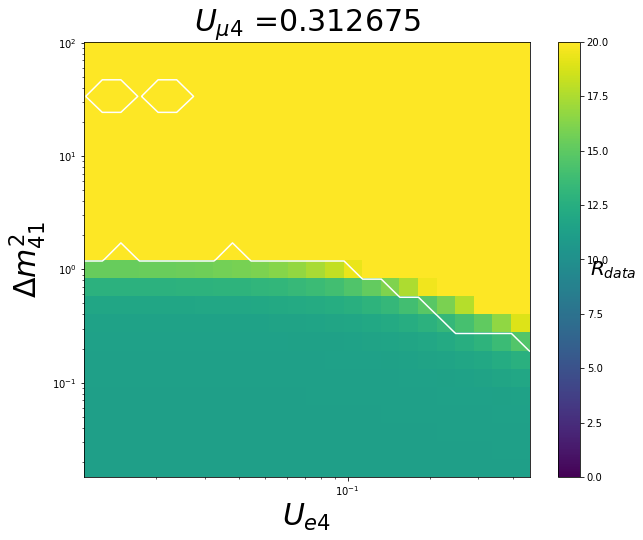

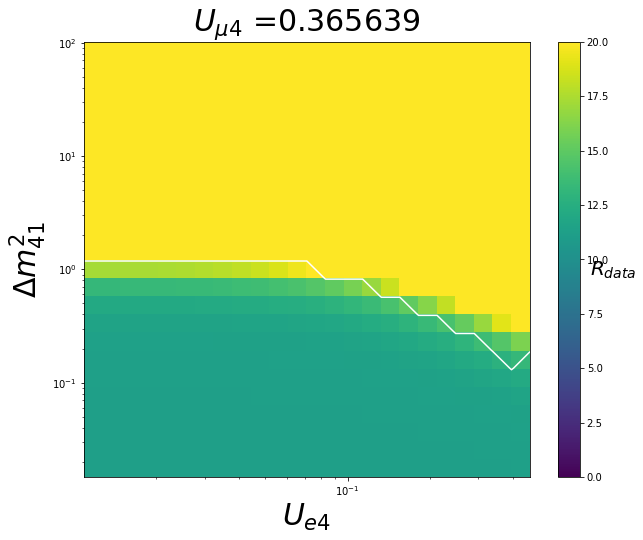

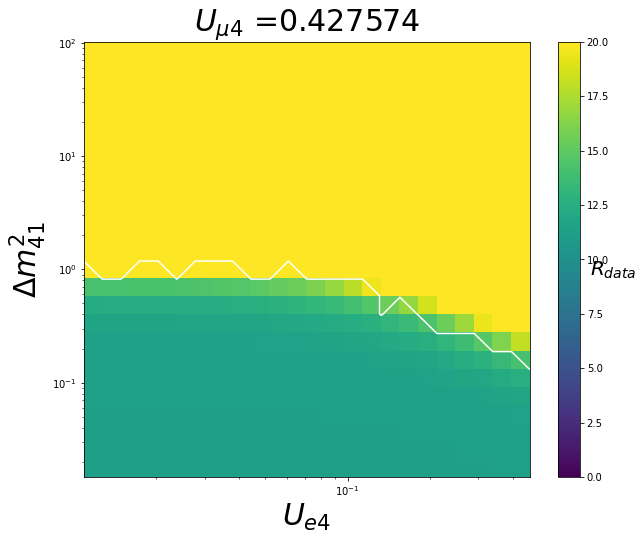

/usr/lib/python3/dist-packages/ipykernel_launcher.py:30: UserWarning: The following kwargs were not used by contour: 'fontsize'


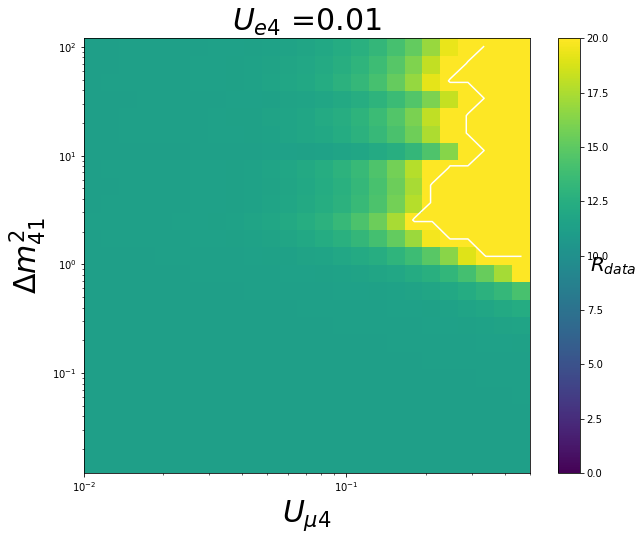

/usr/lib/python3/dist-packages/ipykernel_launcher.py:25: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


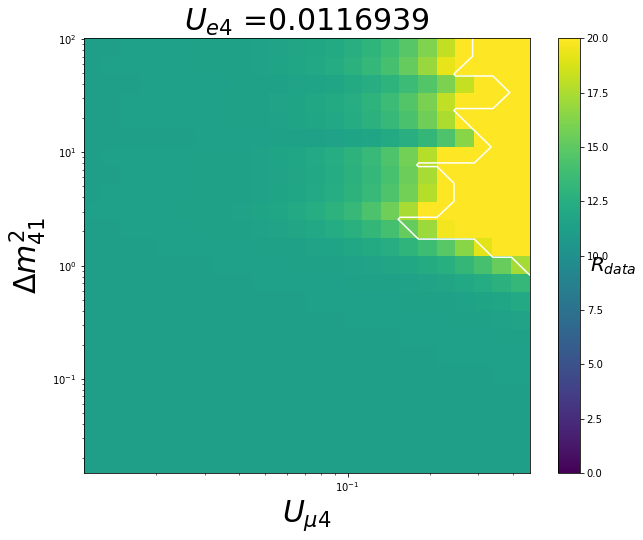

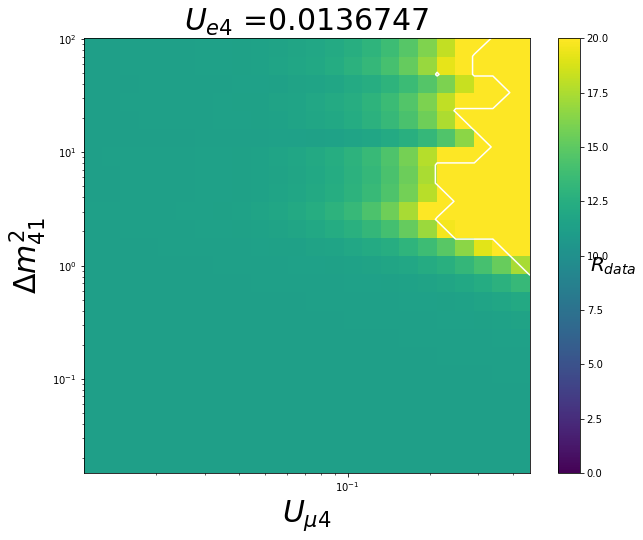

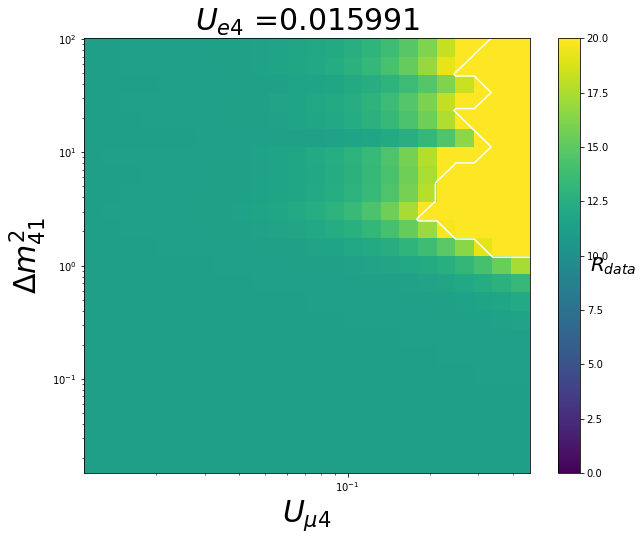

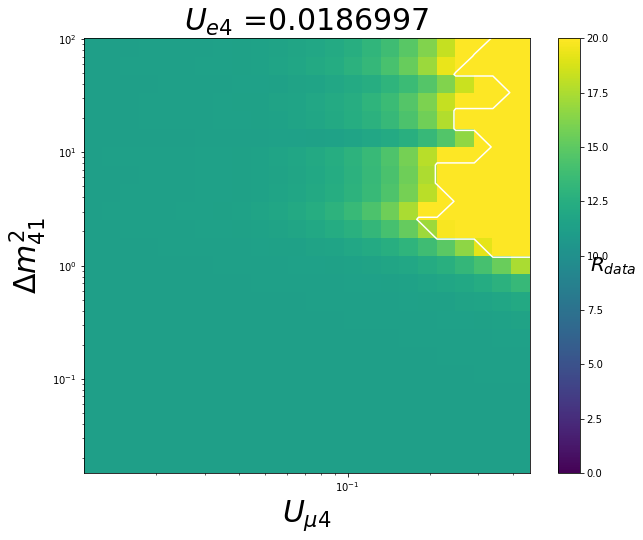

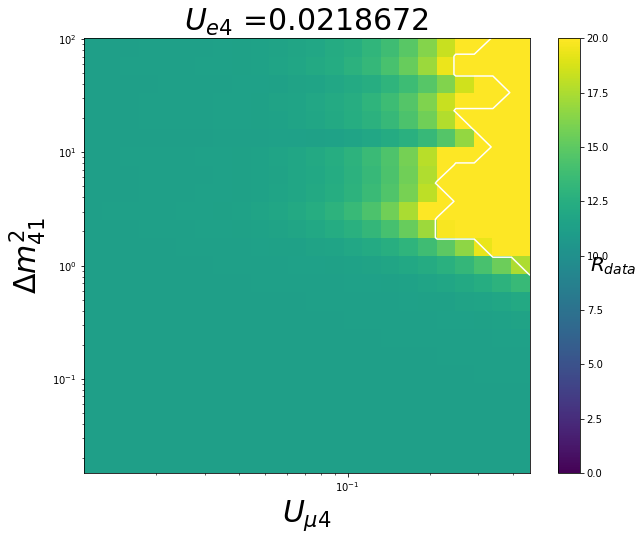

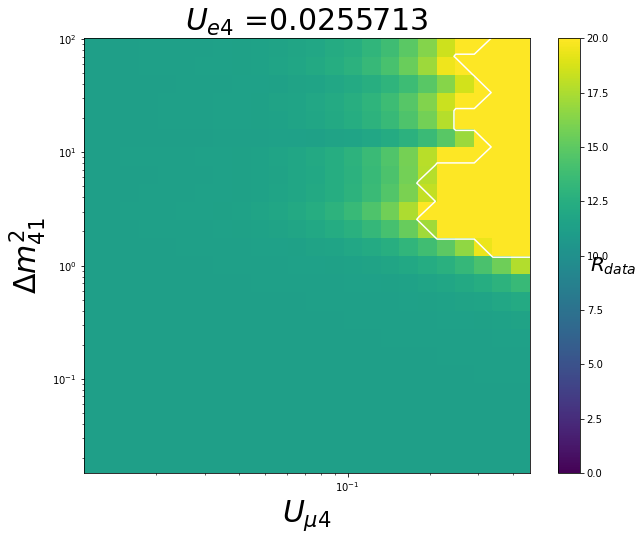

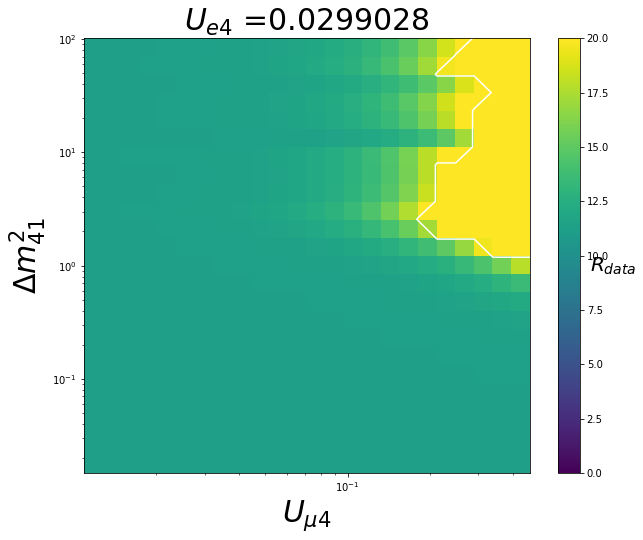

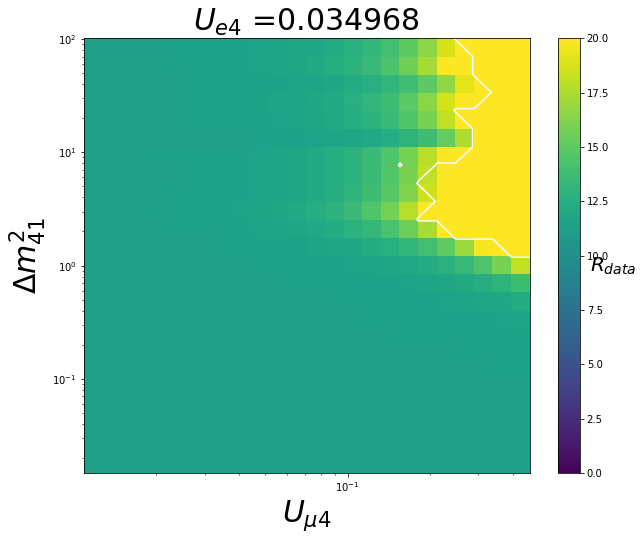

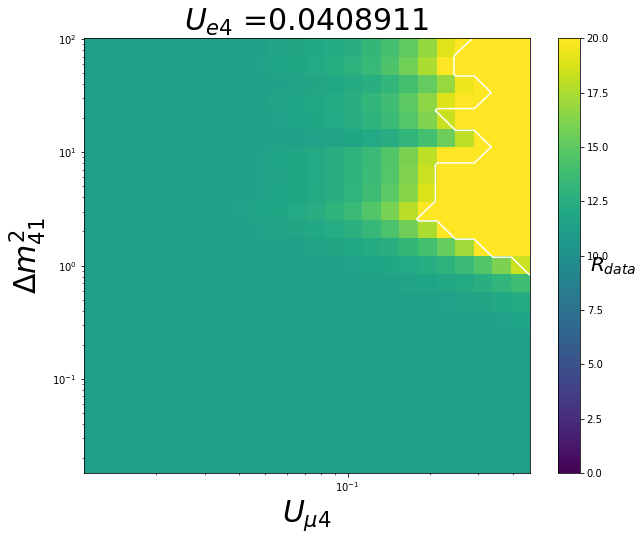

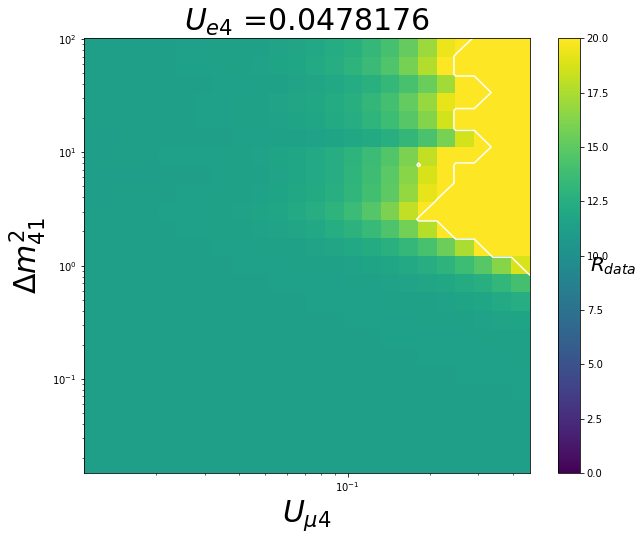

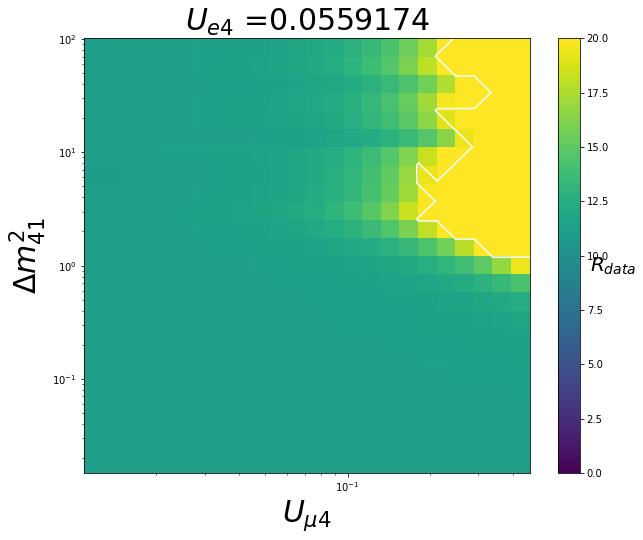

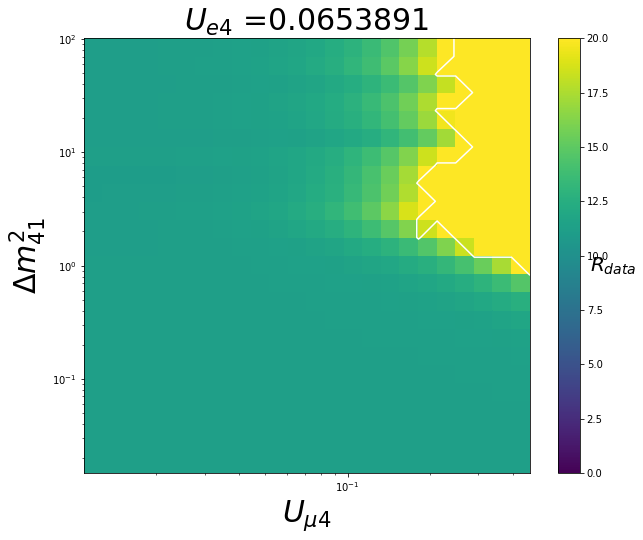

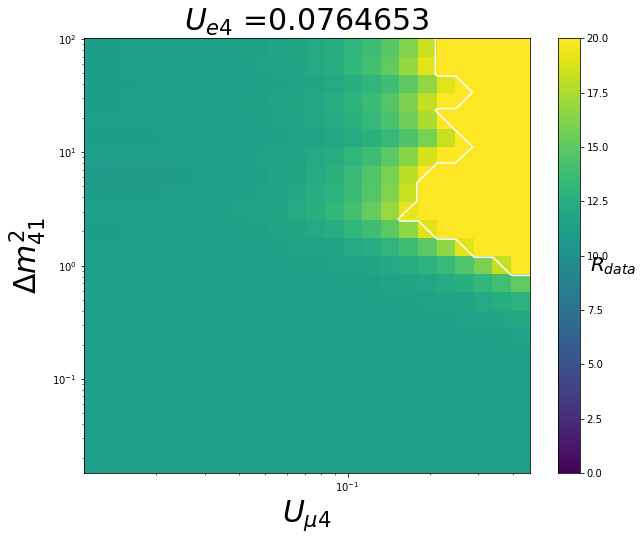

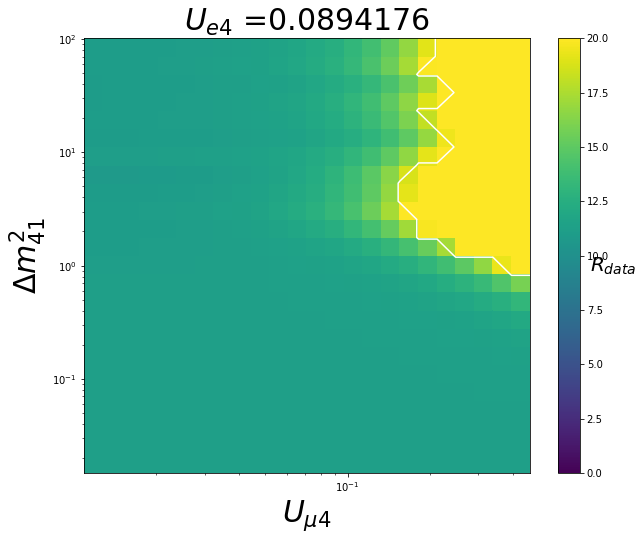

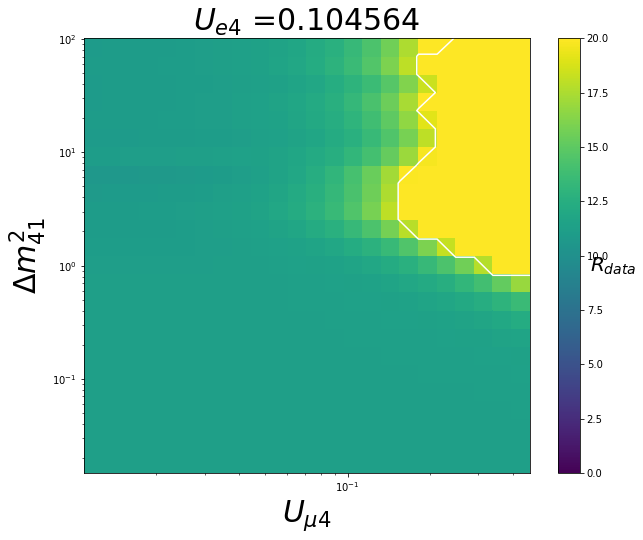

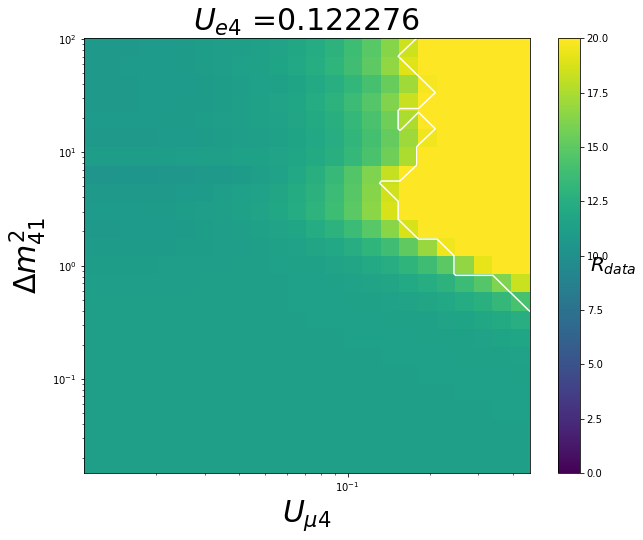

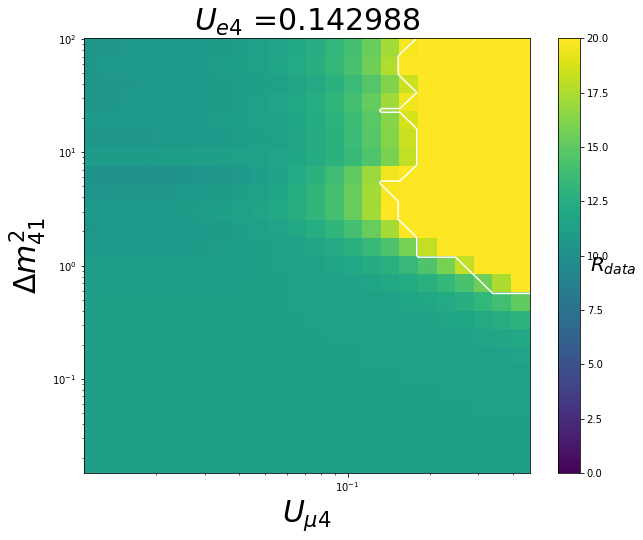

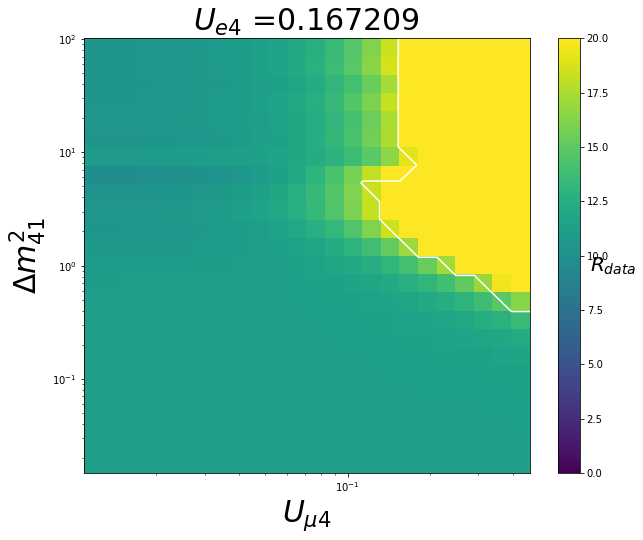

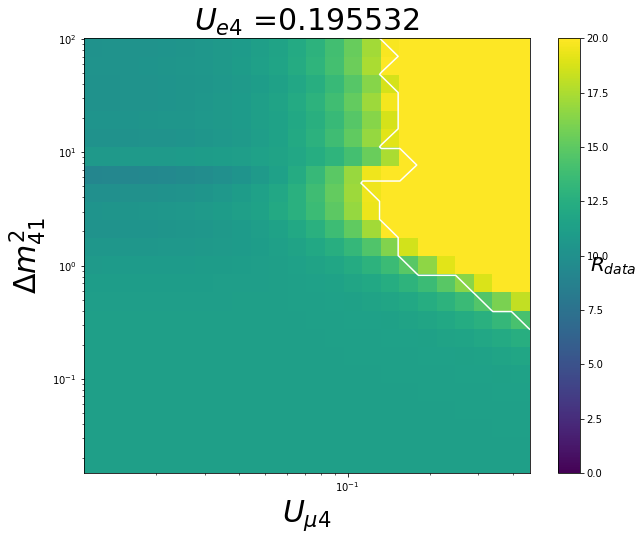

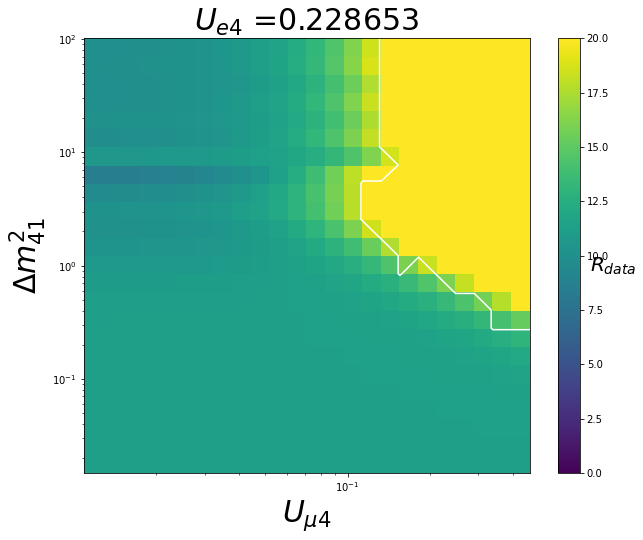

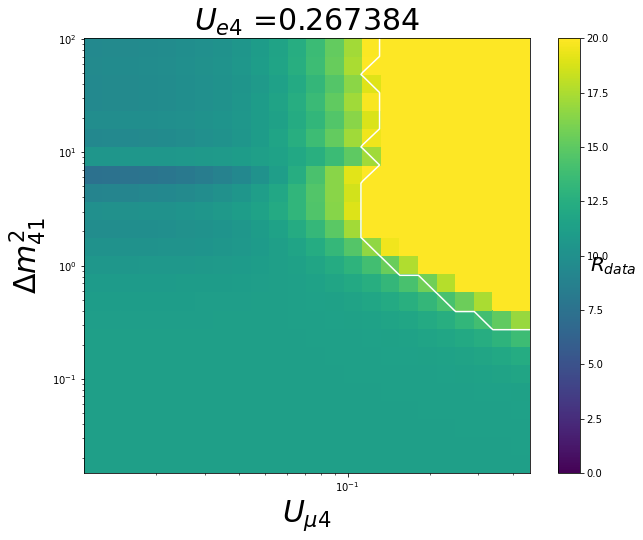

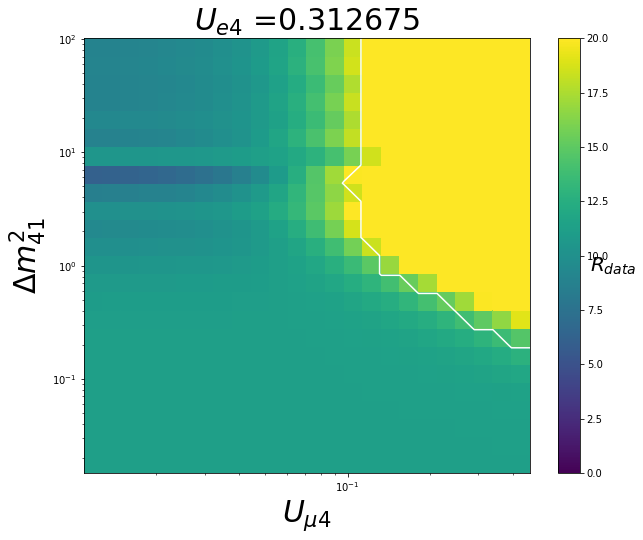

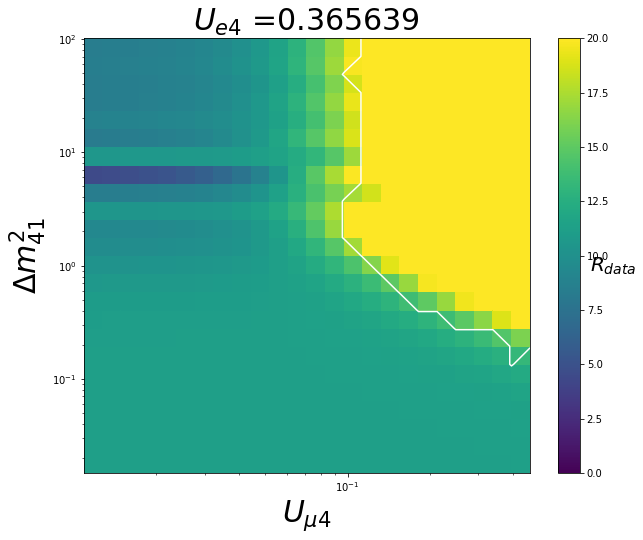

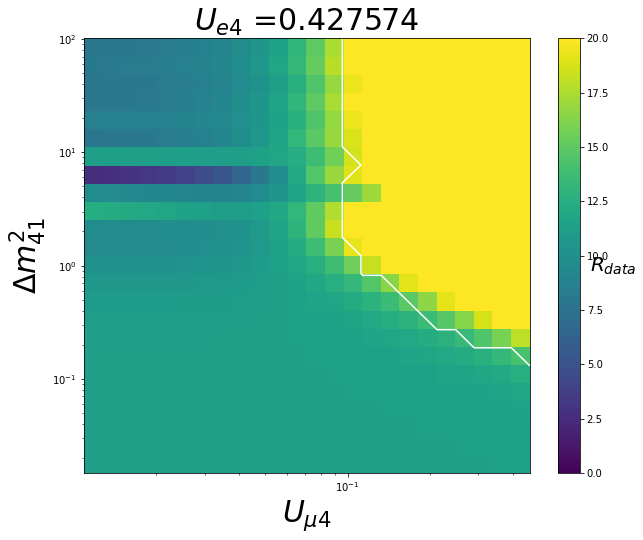

/usr/lib/python3/dist-packages/ipykernel_launcher.py:50: UserWarning: No contour levels were found within the data range.
/usr/lib/python3/dist-packages/ipykernel_launcher.py:50: UserWarning: The following kwargs were not used by contour: 'fontsize'


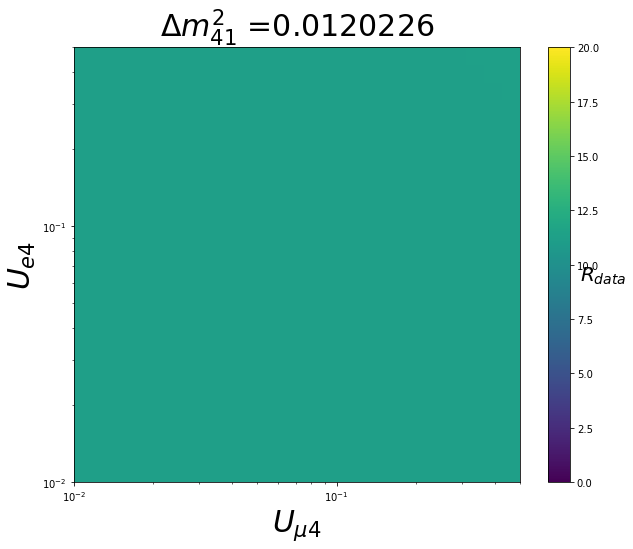

/usr/lib/python3/dist-packages/ipykernel_launcher.py:45: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


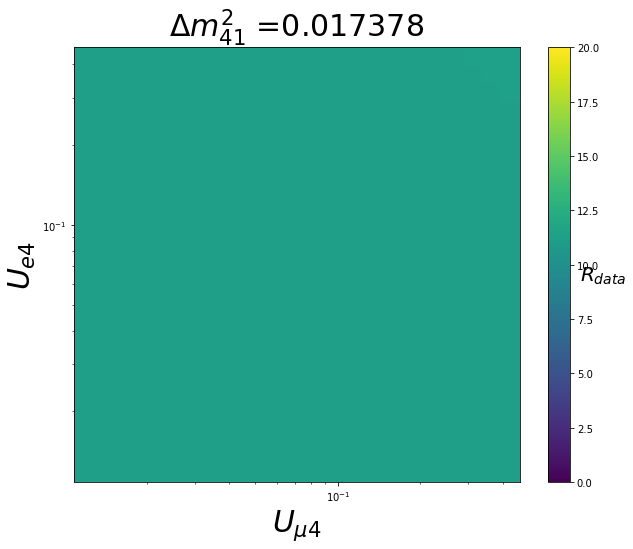

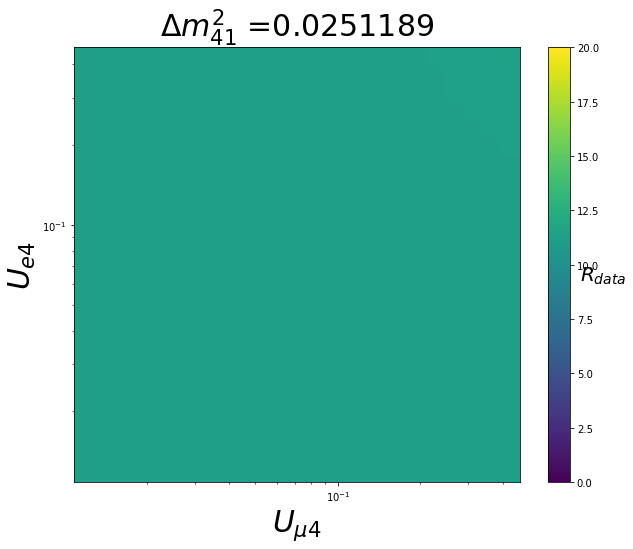

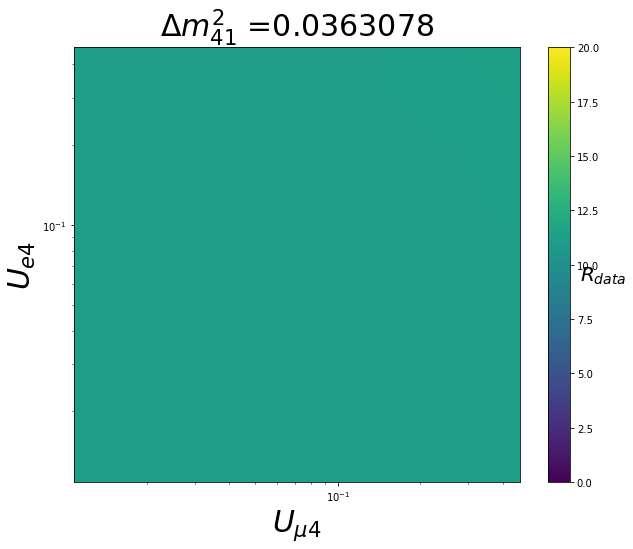

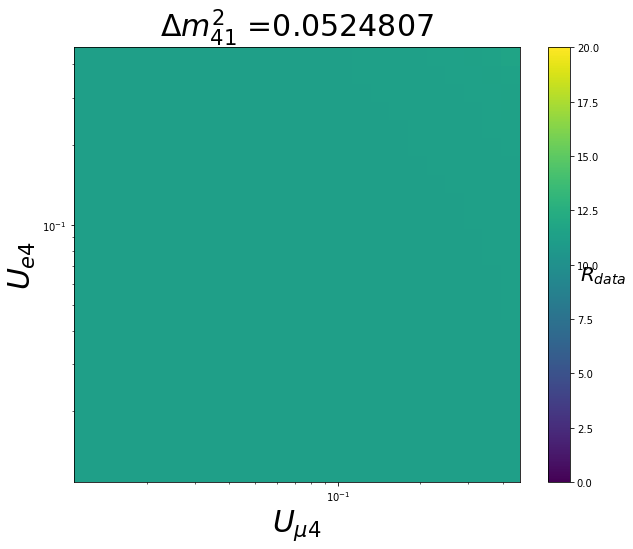

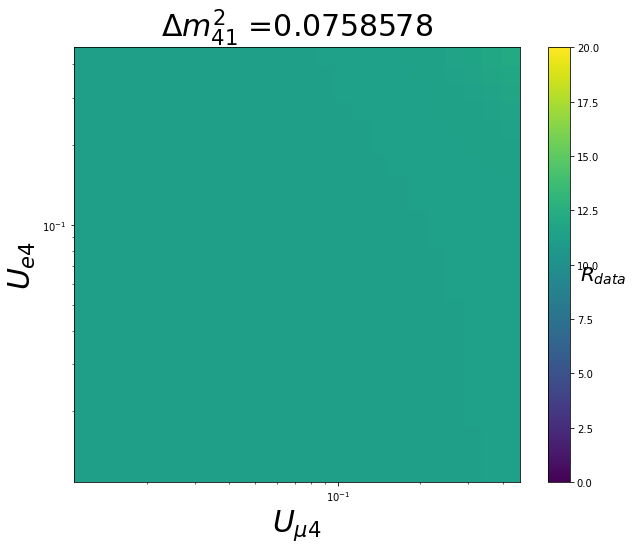

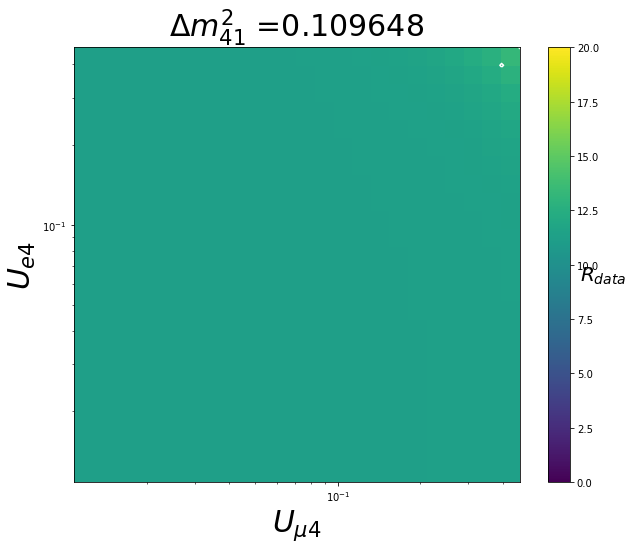

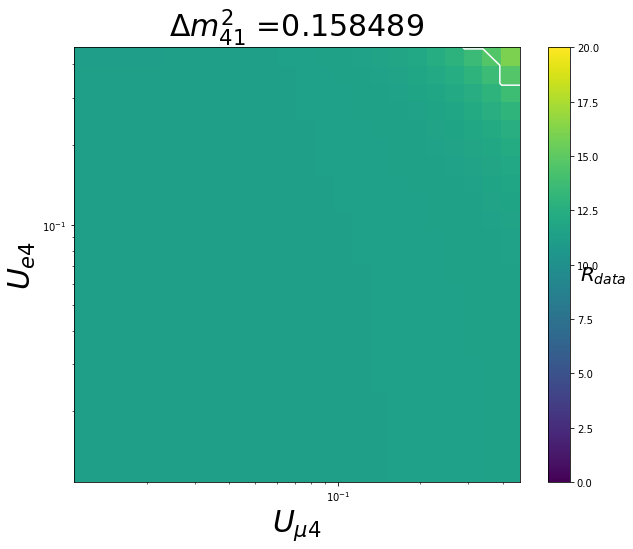

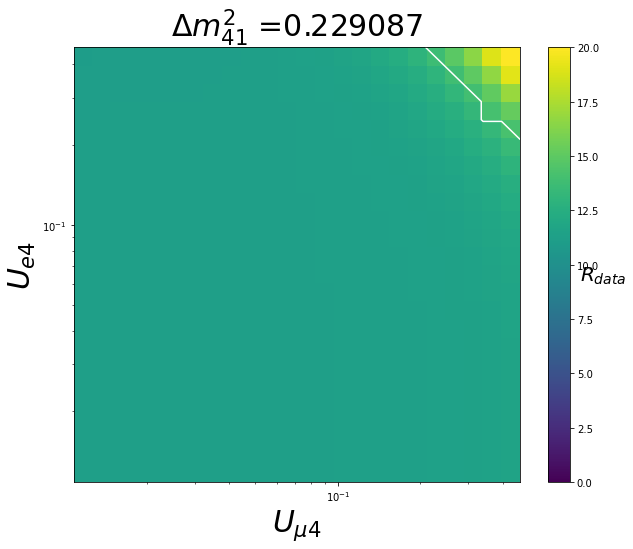

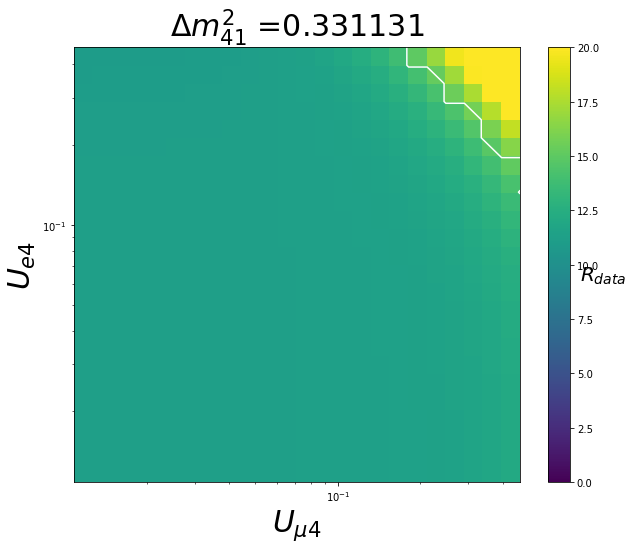

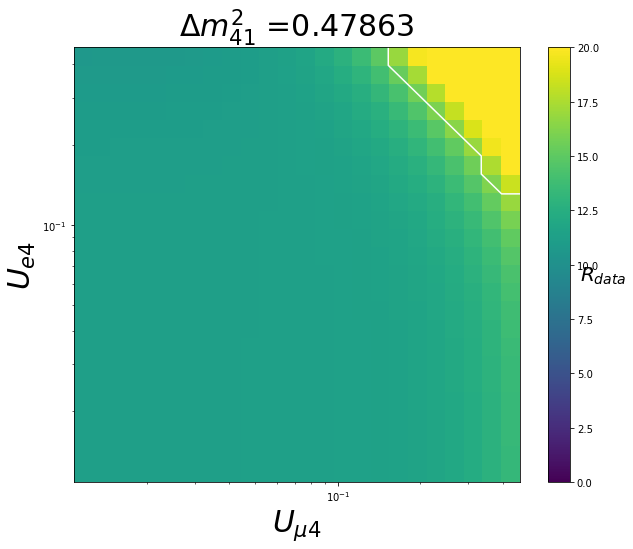

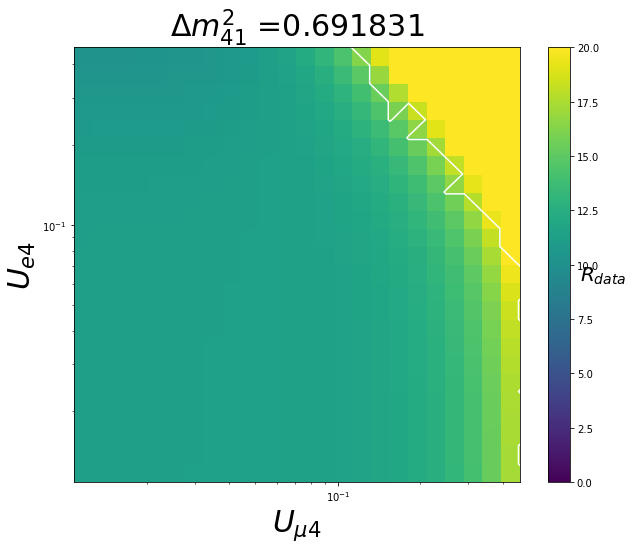

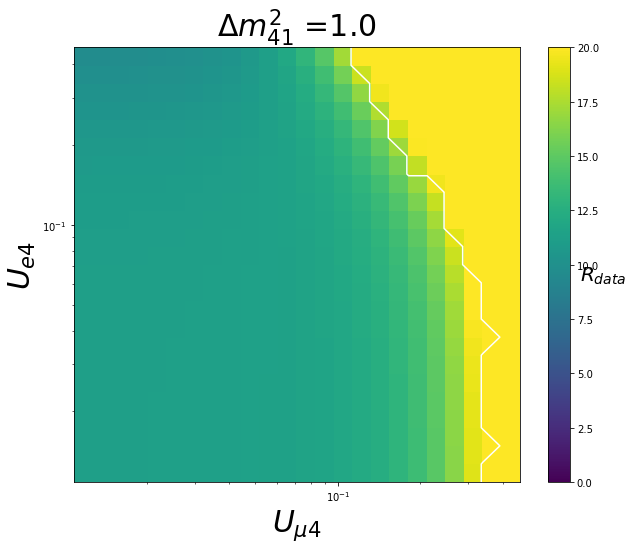

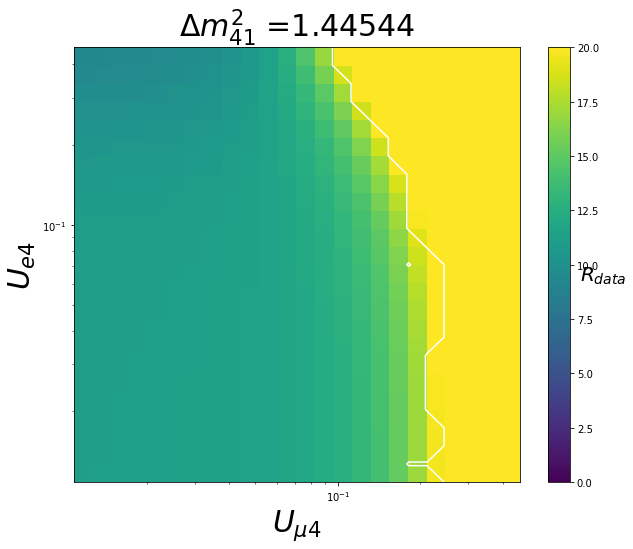

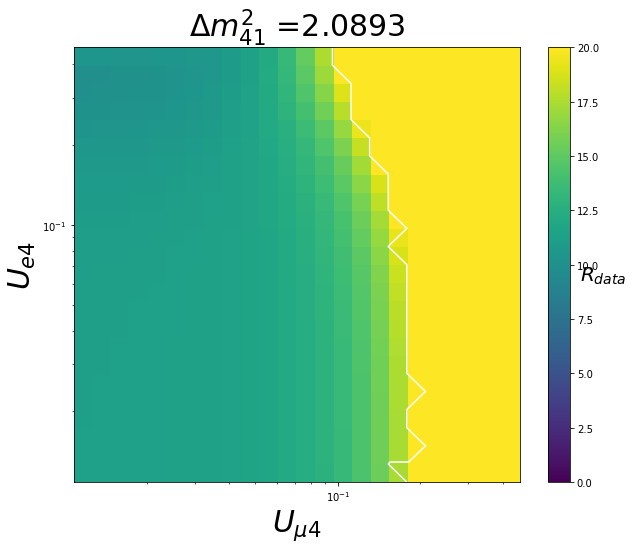

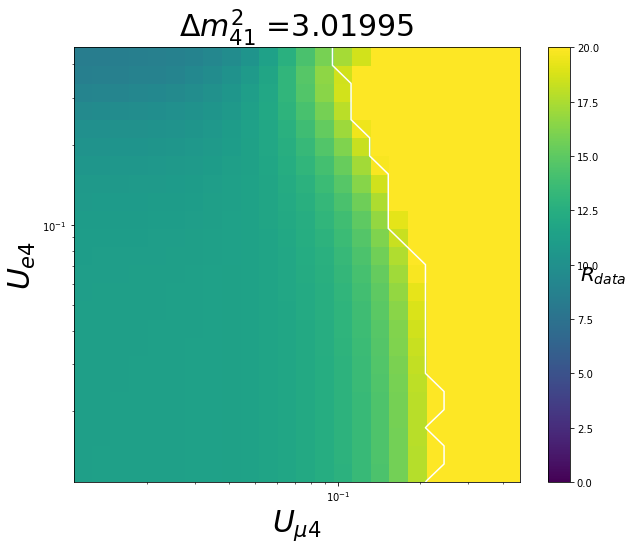

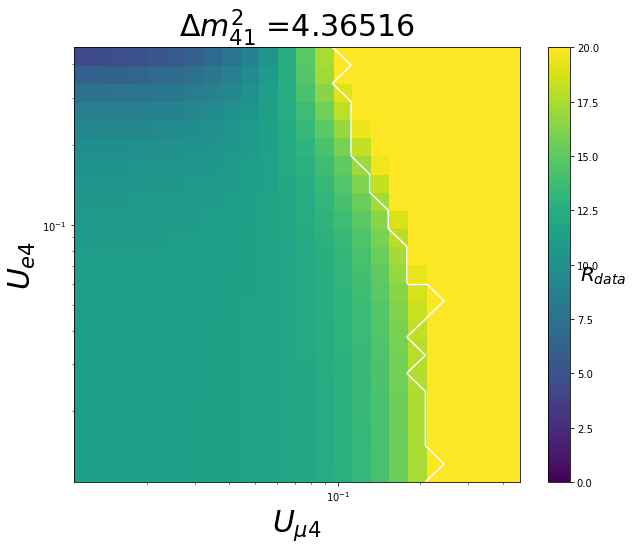

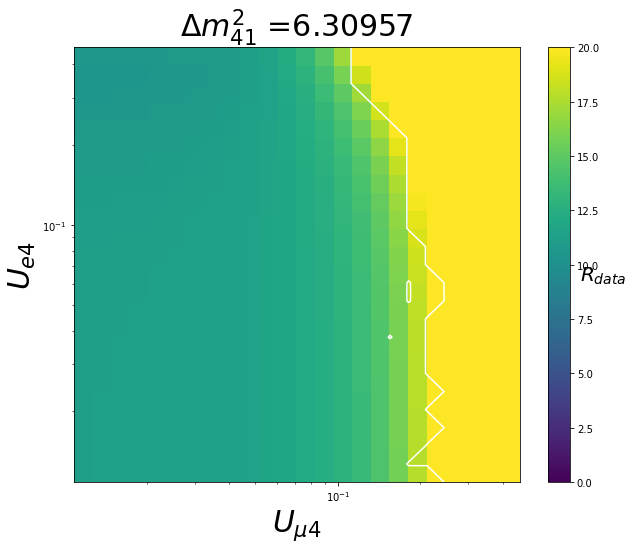

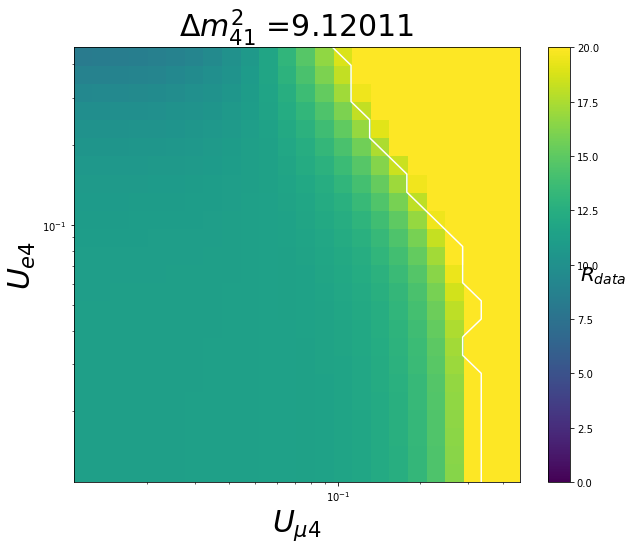

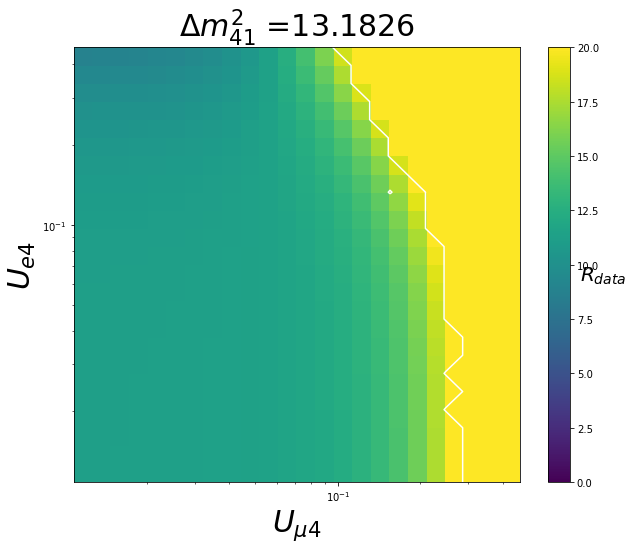

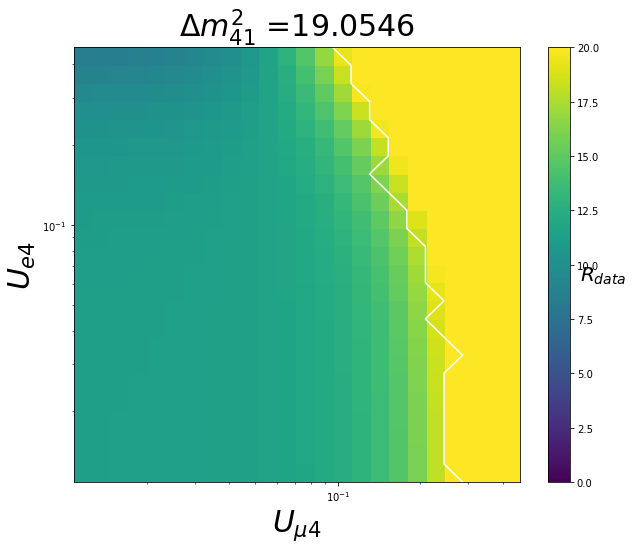

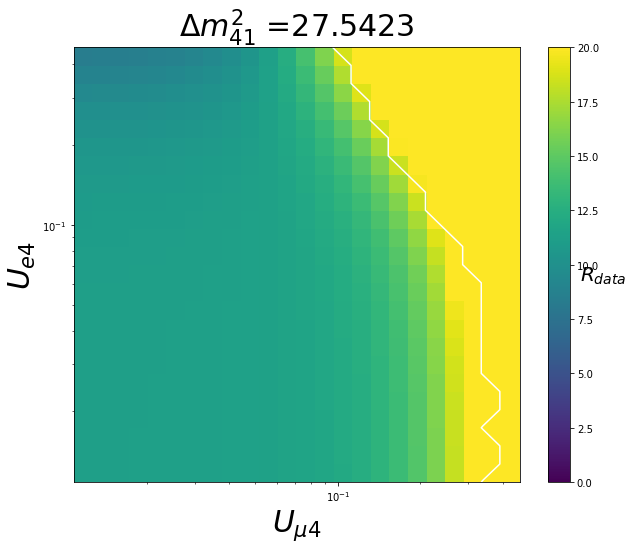

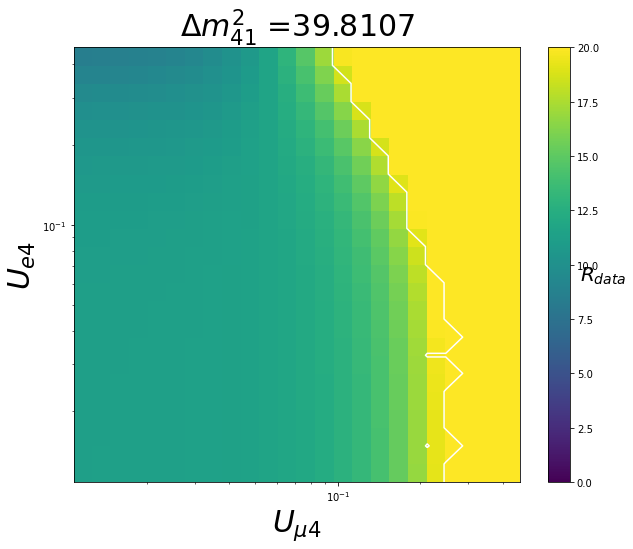

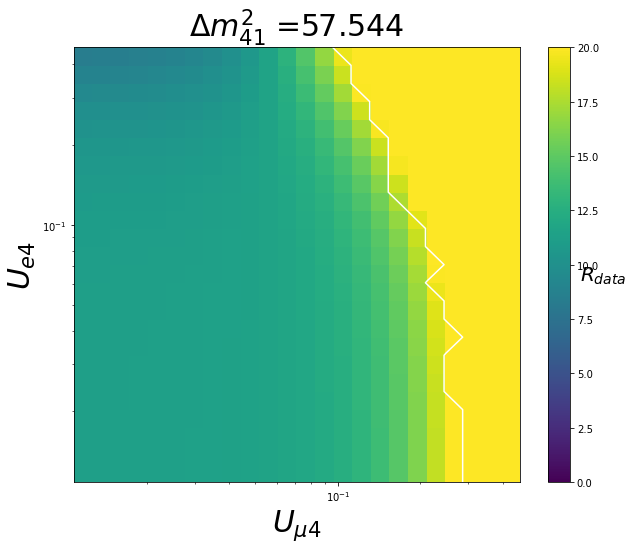

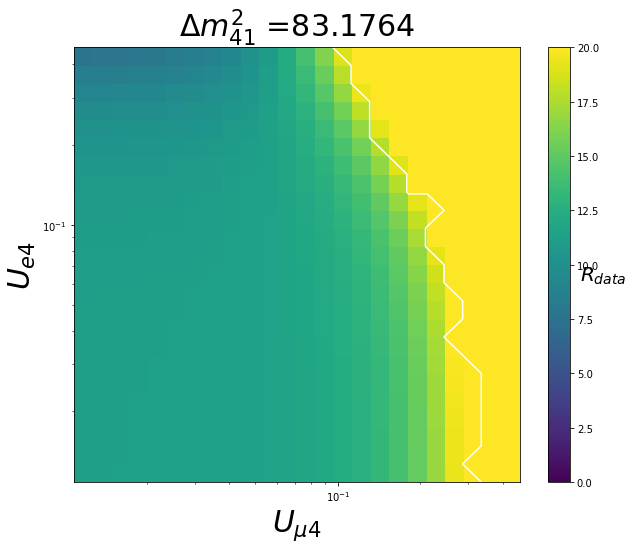

In [18]:
# now get all slices
y,x = np.meshgrid(m41_list, ue4_list)
for i in range(len(um4_center)):
    fig,ax = plt.subplots(figsize=(10,8))
    plt.pcolormesh(x, y, chi_arr_data[:,:,i],norm=colors.Normalize(vmin=1e-13, vmax=20))
    cbar = plt.colorbar()
    cbar.set_label(r'$R_{data}$',rotation=0,fontsize=20)
    #contour plots
    y,x = np.meshgrid(m41_center, ue4_center)
    contours = plt.contour(x, y, confidence_arr_data[:,:,i],[.9], colors='white',fontsize=20)
    plt.xlabel(r"$U_{e4}$",fontsize=30)
    plt.ylabel(r"$\Delta m^2_{41}$",fontsize=30)
    plt.title(r"$U_{\mu4}$ ="+str(um4_list[i]),fontsize=30)
    plt.xscale("log")
    plt.yscale("log")
    pkl.dump(fig,open("FC_data_umu4_"+str(i)+".p",'wb'))
    plt.savefig("FC_data_umu4_"+str(i)+".png")
    plt.show()
    plt.close()
    
# at ue4
y,x = np.meshgrid(m41_list, um4_list)
for i in range(len(ue4_center)):
    fig,ax = plt.subplots(figsize=(10,8))
    plt.pcolormesh(x, y, chi_arr_data[i,:,:].transpose(),norm=colors.Normalize(vmin=1e-13, vmax=20))
    cbar = plt.colorbar()
    cbar.set_label(r'$R_{data}$',rotation=0,fontsize=20)
    #contour plots
    y,x= np.meshgrid(m41_center, um4_center)
    contours = plt.contour(x, y, confidence_arr_data[i,:,:].transpose(),[.9], colors='white',fontsize=20)
    plt.xlabel(r"$U_{\mu 4}$",fontsize=30)
    plt.ylabel(r"$\Delta m^2_{41}$",fontsize=30)
    plt.title(r"$U_{e4}$ ="+str(ue4_list[i]),fontsize=30)
    plt.xscale("log")
    plt.yscale("log")
    pkl.dump(fig,open("FC_data_ue4_"+str(i)+".p",'wb'))
    plt.savefig("FC_data_ue4_"+str(i)+".png") 
    plt.show()
    plt.close()


x,y = np.meshgrid(ue4_list, um4_list)
for i in range(len(ue4_center)):
    fig,ax = plt.subplots(figsize=(10,8))
    plt.pcolormesh(x, y, chi_arr_data[:,i,:],norm=colors.Normalize(vmin=1e-13, vmax=20))
    cbar = plt.colorbar()
    cbar.set_label(r'$R_{data}$',rotation=0,fontsize=20)
    #contour plots
    x,y = np.meshgrid(ue4_center, um4_center)
    contours = plt.contour(x, y, confidence_arr_data[:,i,:],[.9], colors='white',fontsize=20);
    plt.ylabel(r"$U_{e4}$",fontsize=30)
    plt.xlabel(r"$U_{\mu4}$",fontsize=30)
    plt.title(r"$\Delta m^2_{41}$ ="+str(m41_list[i]),fontsize=30)
    plt.xscale("log")
    plt.yscale("log")
    pkl.dump(fig,open("FC_data_m41_"+str(i)+".p",'wb'))
    plt.savefig("FC_data_m41_"+str(i)+".png")
    plt.show()
    plt.close()
